In [ ]:
!pip install breizhcrops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.0 MB/s eta 0:00:00


## 1.Load, Extract, and Download Raw Data

In [ ]:
#@title Loading Dataset
import breizhcrops as bzh
import numpy as np
import torch

dataset = bzh.BreizhCrops("frh03", level="L2A")

# Extracting the entire dataset into NumPy arrays for processing
X_list = []
y_list = []

# Iterating through the entire dataset to extract all samples
for i in range(len(dataset)):
    X_patch, y_label, _ = dataset[i]

    X_list.append(X_patch.numpy())
    y_list.append(y_label.numpy())

# Stack all patches to create raw training arrays
X_raw = np.stack(X_list)
y_raw = np.array(y_list) 

print(f"Raw X shape: {X_raw.shape} (Samples, Time Steps, Bands)")
print(f"Raw y shape: {y_raw.shape} (Labels)")
print(f"Total available patches: {X_raw.shape[0]:,}")

KeyboardInterrupt: 

Within limited GPU access and the long dataset download time, the datasets are saved. Due to an unresolvable compatibility error within Google Colab (ValueError: Mountpoint must not already contain files), this is achieved via local download (by running the code below) and manual upload to COMP0173_Applying_New_Context/data.

In [ ]:
#@title Saving Raw Dataset
import breizhcrops as bzh
import numpy as np
import torch
from typing import List, Tuple
import os

REGIONS_TO_EXTRACT: List[str] = ["frh04"]
DATA_LEVEL: str = "L2A"

NUM_RAW_BANDS: int = 10

def extract_and_save_region(region_code: str, level: str):
    """
    Loads raw data from the already-downloaded H5 file for a single region,
    extracts all samples into NumPy arrays, and saves them locally.
    """
    try:
        dataset = bzh.BreizhCrops(region_code, level=level)
    except Exception as e:
        print(f"FATAL ERROR: Could not read local H5 data for {region_code}. You may need to delete the local 'breizhcrops_dataset' folder and restart acquisition.")
        print(f"Error details: {e}")
        return

    X_list = []
    y_list = []

    for i in range(len(dataset)):
        X_patch, y_label, _ = dataset[i]
        X_list.append(X_patch.numpy()[:, :NUM_RAW_BANDS])
        y_list.append(y_label.numpy())

    X_raw = np.array(X_list, dtype=object)
    y_raw = np.array(y_list)

    X_filename = f"X_raw_{region_code}.npy"
    y_filename = f"y_raw_{region_code}.npy"

    print(f"\n  Total samples extracted: {len(X_raw):,}")

    np.save(X_filename, X_raw)
    np.save(y_filename, y_raw)

    print(f" Files for {region_code.upper()} saved locally: {X_filename} and {y_filename}")

    # 4. Clean up RAM (Crucial)
    del X_raw, y_raw, X_list, y_list
    print("  RAM cleared successfully before next region load.")


if __name__ == "__main__":

    try:
        from google.colab import files
    except ImportError:
        def files(): pass
        def files_download(filename):
            print(f"File '{filename}' would have been saved locally.")
        files.download = files_download


    # Extract and Save
    for region in REGIONS_TO_EXTRACT:
        extract_and_save_region(region, DATA_LEVEL)

    print("Extracted. Now downloading.")

    DOWNLOAD_FILES = []
    for region in REGIONS_TO_EXTRACT:
        DOWNLOAD_FILES.append(f"X_raw_{region}.npy")
        DOWNLOAD_FILES.append(f"y_raw_{region}.npy")

    for filename in DOWNLOAD_FILES:
        files.download(filename)



  Total samples extracted: 122,708
 Files for FRH04 saved locally: X_raw_frh04.npy and y_raw_frh04.npy
  RAM cleared successfully before next region load.
Extracted. Now downloading.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Mount and Check Drive

In [ ]:
import os
from google.colab import drive

MOUNT_POINT = '/content/drive'
drive.mount(MOUNT_POINT, force_remount=True)
print("\nMount successful.")

DATA_PATH = '/content/drive/MyDrive/COMP0173_Applying_New_Context/data'

Attempting to mount Google Drive...
Mounted at /content/drive

Mount successful.


In [ ]:
#@title Inspecting Drive
import os
DATA_PATH = '/content/drive/MyDrive/COMP0173_Applying_New_Context/data'

print(f"Listing files in: {DATA_PATH}\n")
try:
    for filename in os.listdir(DATA_PATH):
        print(filename)
except FileNotFoundError:
    print("Error: DATA_PATH not found or accessible.")

Listing files in: /content/drive/MyDrive/COMP0173_Applying_New_Context/data

y_raw_frh01.npy
y_raw_frh02.npy
X_raw_frh02.npy
X_raw_frh01.npy
y_raw_frh04.npy
X_raw_frh04.npy
X_raw_frh03.npy
y_raw_frh03.npy
Old
X_train_final.npy
y_val_final.npy
y_train_final.npy
X_val_final.npy
X_test_final.npy
y_test_final.npy
final_model_weights_epoch7.weights.h5
reproduced_model_weights_epoch7.weights.h5
ablation1_final_model_weights_epoch50_weighted.weights.h5
X_train_final_stratified_minority_retain.npy
y_train_final_stratified_minority_retain.npy
X_val_final_stratified_minority_retain.npy
y_val_final_stratified_minority_retain.npy
X_test_final_stratified_minority_retain.npy
y_test_final_stratified_minority_retain.npy
ablation2_final_model_weights_epoch50_focal_stratified_minority_retain.weights.h5
ablation2final_model_weights_epoch50_weighted.weights.h5
X_train_final_MTVI2_unscaled.npy
y_train_final_MTVI2_unscaled.npy
X_val_final_MTVI2_unscaled.npy
y_val_final_MTVI2_unscaled.npy
X_test_final_MTVI2_

# Data Inspection and Pre-Processing

Combined Training X shape: (319414, 45, 10)
Combined Training y shape: (319414,)
Validation y shape: 166367 samples
Test y shape: 122708 samples
Numerical Class Distributions

Training Set (frh01+frh02):
  Class 0 (Barley): 23787
  Class 1 (Wheat): 45406
  Class 2 (Rapeseed): 7945
  Class 3 (Corn): 80623
  Class 4 (Sunflower): 7
  Class 5 (Orchards): 1285
  Class 6 (Nuts): 28
  Class 7 (Permanent Meadows): 69177
  Class 8 (Temporary Meadows): 91156

Validation Set (frh03):
  Class 0 (Barley): 7154
  Class 1 (Wheat): 27202
  Class 2 (Rapeseed): 3557
  Class 3 (Corn): 42011
  Class 4 (Sunflower): 10
  Class 5 (Orchards): 1217
  Class 6 (Nuts): 10
  Class 7 (Permanent Meadows): 32524
  Class 8 (Temporary Meadows): 52682

Test Set (frh04):
  Class 0 (Barley): 5981
  Class 1 (Wheat): 17009
  Class 2 (Rapeseed): 3244
  Class 3 (Corn): 31361
  Class 4 (Sunflower): 2
  Class 5 (Orchards): 552
  Class 6 (Nuts): 11
  Class 7 (Permanent Meadows): 26134
  Class 8 (Temporary Meadows): 38414


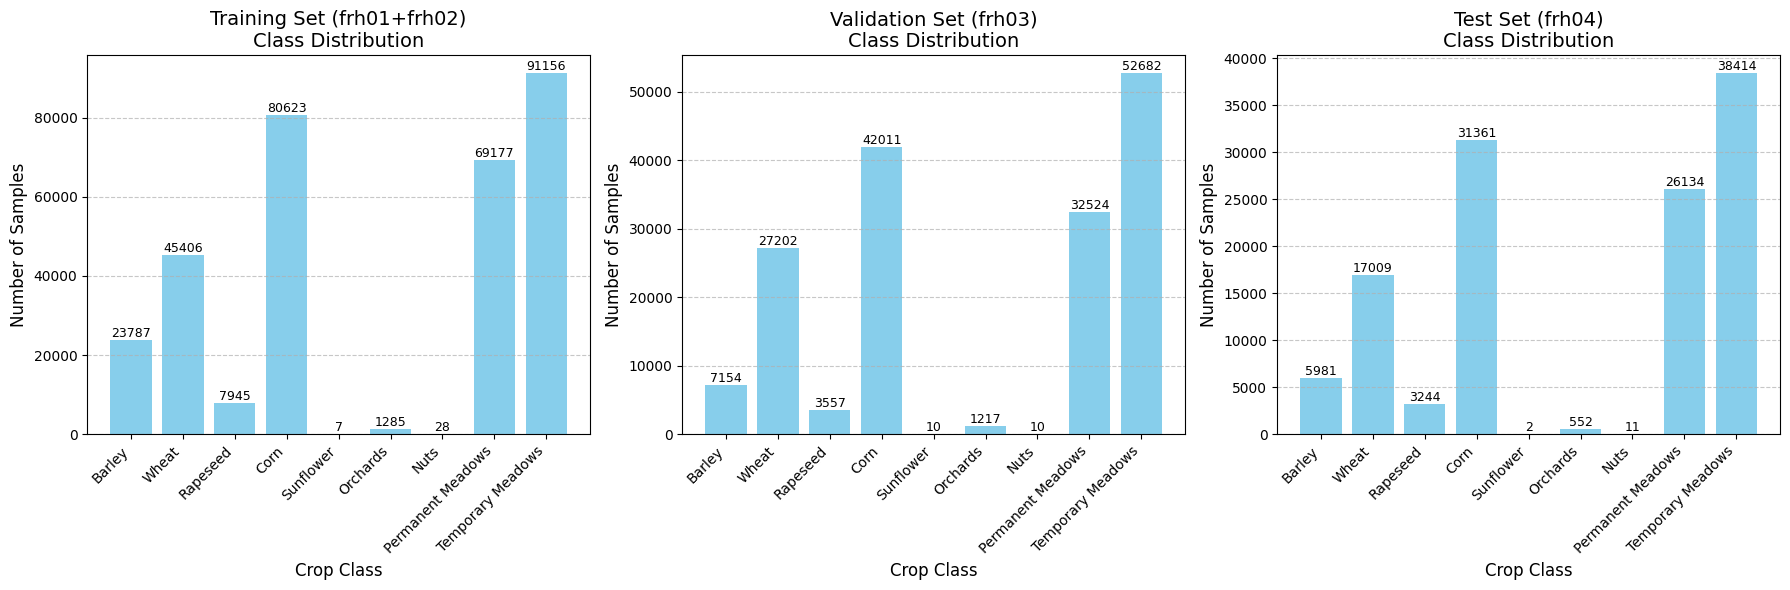

In [ ]:
#@title Print Distributions
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import sys

DATA_PATH = '/content/drive/MyDrive/COMP0173_Applying_New_Context/data'
CLASS_NAMES = {
    0: 'Barley', 1: 'Wheat', 2: 'Rapeseed', 3: 'Corn',
    4: 'Sunflower', 5: 'Orchards', 6: 'Nuts', 7: 'Permanent Meadows',
    8: 'Temporary Meadows'
}

X_TRAIN_FILES = ['X_raw_frh01.npy', 'X_raw_frh02.npy']
Y_TRAIN_FILES = ['y_raw_frh01.npy', 'y_raw_frh02.npy']
X_VAL_FILE = 'X_raw_frh03.npy'
Y_VAL_FILE = 'y_raw_frh03.npy'
X_TEST_FILE = 'X_raw_frh04.npy'
Y_TEST_FILE = 'y_raw_frh04.npy'

def load_and_combine_train_data(file_list, base_path, combine_func):
    """Loads and combines multiple files (for training set)."""
    data_arrays = []
    is_y_array = any('y_raw' in filename for filename in file_list)

    for filename in file_list:
        full_path = os.path.join(base_path, filename)
        try:
            arr = np.load(full_path, allow_pickle=True)
            if is_y_array:
                arr = arr.flatten()
            data_arrays.append(arr)
        except Exception as e:
            print(f"Error loading {filename}: {e}")
            return None

    if data_arrays:
        try:
            combined_data = combine_func(data_arrays)
            return combined_data
        except ValueError as e:
            print(f"Combining Error: {e}")
            return None
    return None

def load_single_file(filename, base_path, is_y_array=False):
    """Loads a single file (for val/test sets)."""
    full_path = os.path.join(base_path, filename)
    try:
        arr = np.load(full_path, allow_pickle=True)
        if is_y_array:
            arr = arr.flatten()
        return arr
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        return None

# stacking x arrays vertically
X_train_combined = load_and_combine_train_data(X_TRAIN_FILES, DATA_PATH, combine_func=np.vstack)

# concatenating y arrays horizontally
y_train_combined = load_and_combine_train_data(Y_TRAIN_FILES, DATA_PATH, combine_func=np.concatenate)

# Check 
if X_train_combined is None or y_train_combined is None:
    print("\nData loading failed. Cannot proceed.")
    sys.exit()

#Printing class distributions for inspection
def get_class_distribution(y_array):
    return Counter(y_array)

distributions = {}
distributions['Training Set (frh01+frh02)'] = get_class_distribution(y_train_combined)

X_val = load_single_file(X_VAL_FILE, DATA_PATH)
y_val = load_single_file(Y_VAL_FILE, DATA_PATH, is_y_array=True)

if y_val is not None:
    distributions['Validation Set (frh03)'] = get_class_distribution(y_val)
    # Immediately delete large arrays to free up RAM
    del X_val
    del y_val

X_test = load_single_file(X_TEST_FILE, DATA_PATH)
y_test = load_single_file(Y_TEST_FILE, DATA_PATH, is_y_array=True)

if y_test is not None:
    distributions['Test Set (frh04)'] = get_class_distribution(y_test)
    # Same RAM solution
    del X_test
    del y_test

print(f"Combined Training X shape: {X_train_combined.shape}")
print(f"Combined Training y shape: {y_train_combined.shape}")
print(f"Validation y shape: {distributions.get('Validation Set (frh03)', {}).total()} samples")
print(f"Test y shape: {distributions.get('Test Set (frh04)', {}).total()} samples")


print("Numerical Class Distributions")

for set_name, dist in distributions.items():
    print(f"\n{set_name}:")
    for class_id, count in sorted(dist.items()):
        print(f"  Class {class_id} ({CLASS_NAMES.get(class_id, 'Unknown')}): {count}")


#Plot

plt.figure(figsize=(18, 6))


all_classes = sorted(list(CLASS_NAMES.keys()))
class_labels = [CLASS_NAMES[c] for c in all_classes]

for i, (set_name, dist) in enumerate(distributions.items()):
    plt.subplot(1, 3, i + 1)
    counts = [dist.get(c, 0) for c in all_classes]

    plt.bar(class_labels, counts, color='skyblue')

    plt.title(f'{set_name}\nClass Distribution', fontsize=14)
    plt.xlabel('Crop Class', fontsize=12)
    plt.ylabel('Number of Samples', fontsize=12)

    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for j, count in enumerate(counts):
        if count > 0:
            plt.text(j, count, str(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#PREPROCESSING FINAL

In [ ]:
#@title Initial Preprocessing
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from sklearn.preprocessing import RobustScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from typing import Dict, Tuple
import os

DATA_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data"
TEST_REGION = 'frh04'
TRAIN_REGIONS = ['frh01', 'frh02']
VAL_REGION = 'frh03'
T_REGULARIZED = 48
N_TARGET_TRAIN = 22000
N_TARGET_VAL = 6000
BANDS = {
    'B2': 0, 'B3': 1, 'B4': 2, 'B5': 3, 'B6': 4,
    'B7': 5, 'B8': 6, 'B8A': 7, 'B11': 8, 'B12': 9
}
CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}
# Savitzky-Golay Parameters
SG_WINDOW_LENGTH = 11
SG_POLYORDER = 2

def print_distribution_table(y: np.ndarray, title: str, class_map: Dict[int, str]):
    """Prints a formatted table showing class counts and percentages."""
    if len(y) == 0:
        print(f"\n--- {title} Distribution (N=0) ---")
        print("Dataset is empty.")
        return

    counts = pd.Series(y).value_counts().sort_index()
    df = pd.DataFrame(counts).reset_index()
    df.columns = ['Code', 'Count']
    df['Crop Class'] = df['Code'].map(class_map)
    total = df['Count'].sum()
    df['Percentage'] = (df['Count'] / total) * 100

    print(f"\n--- {title} Distribution (N={total}) ---")
    df = df[['Crop Class', 'Count', 'Percentage']]
    df = df.sort_values(by='Count', ascending=False)
    print(df.to_string(index=False, float_format="%.2f"))

def oversample_orchards_ohit(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    OHIT Placeholder: Generates synthetic 'Orchards' samples to reach 2,200.
    (Simple duplication used as placeholder for complex OHIT method.)
    """
    orchards_code = 5
    orchards_mask = (y == orchards_code)
    X_orchards = X[orchards_mask]
    N_orchards_current = len(X_orchards)
    N_orchards_target = 2200

    if N_orchards_current >= N_orchards_target:
        return X, y

    N_synthetic_needed = N_orchards_target - N_orchards_current

    if N_synthetic_needed > 0 and N_orchards_current > 0:
        synthetic_indices = np.random.choice(N_orchards_current, size=N_synthetic_needed, replace=True)
        X_synthetic = X_orchards[synthetic_indices]
        y_synthetic = np.full(N_synthetic_needed, orchards_code, dtype=y.dtype)

        X_new = np.concatenate([X, X_synthetic], axis=0)
        y_new = np.concatenate([y, y_synthetic], axis=0)
        return X_new, y_new
    else:
        return X, y

def downsample_and_balance_train_set(X_train: np.ndarray, y_train: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Applies random downsampling to majority classes (FRH01+FRH02 pool)
    and then applies OHIT placeholder for Orchards.
    """
    TARGET_COUNTS = {
        0: 3200, 1: 3200, 2: 3200, 3: 3200, 4: 7, 5: 2200, 6: 28, 7: 3480, 8: 3480
    }

    X_balanced_list = []
    y_balanced_list = []
    unique_classes = np.unique(y_train)

    auto_include_classes = [4, 6]

    for cls in unique_classes:
        cls = int(cls)
        X_cls = X_train[y_train == cls]
        y_cls = y_train[y_train == cls]
        target_count = TARGET_COUNTS.get(cls, len(X_cls))

        if cls in auto_include_classes or cls == 5:
            X_balanced_list.append(X_cls)
            y_balanced_list.append(y_cls)
            continue

        if len(X_cls) > target_count:
            idx = np.random.choice(len(X_cls), size=target_count, replace=False)
            X_balanced_list.append(X_cls[idx])
            y_balanced_list.append(y_cls[idx])
        else:
            X_balanced_list.append(X_cls)
            y_balanced_list.append(y_cls)

    X_downsampled = np.concatenate(X_balanced_list, axis=0)
    y_downsampled = np.concatenate(y_balanced_list, axis=0)

    X_final, y_final = oversample_orchards_ohit(X_downsampled, y_downsampled)

    return X_final, y_final

def load_data_adhering_to_context(path: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Loads data adhering to the strict regional split (FRH01/02, FRH03, FRH04)."""

    # Load test
    X_test_raw = np.load(f"{path}/X_raw_{TEST_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_test_raw = np.load(f"{path}/y_raw_{TEST_REGION}.npy", allow_pickle=True)

    # Load training
    X_train_list, y_train_list = [], []
    for region in TRAIN_REGIONS:
        X_train_list.append(np.load(f"{path}/X_raw_{region}.npy", allow_pickle=True).astype(np.float32))
        y_train_list.append(np.load(f"{path}/y_raw_{region}.npy", allow_pickle=True))

    X_train_pool_raw = np.concatenate(X_train_list, axis=0)
    y_train_pool_raw = np.concatenate(y_train_list, axis=0)

    # Load val and subsample using  stratification
    X_val_full_raw = np.load(f"{path}/X_raw_{VAL_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_val_full_raw = np.load(f"{path}/y_raw_{VAL_REGION}.npy", allow_pickle=True)

    auto_include_classes_val = [4, 6]
    val_minority_mask = pd.Series(y_val_full_raw).isin(auto_include_classes_val).values
    X_val_minority = X_val_full_raw[val_minority_mask]
    y_val_minority = y_val_full_raw[val_minority_mask]

    X_val_major = X_val_full_raw[~val_minority_mask]
    y_val_major = y_val_full_raw[~val_minority_mask]

    N_current_val_minority = len(y_val_minority)
    N_needed_from_major = N_TARGET_VAL - N_current_val_minority

    if N_needed_from_major <= 0:
        X_val_sampled = X_val_minority[:N_TARGET_VAL]
        y_val_sampled = y_val_minority[:N_TARGET_VAL]
    else:
        test_size_fraction = 1.0 - (N_needed_from_major / len(X_val_major))
        test_size_fraction = min(max(test_size_fraction, 0.0), 1.0 - 1e-8)

        X_val_kept, _, y_val_kept, _ = train_test_split(
            X_val_major, y_val_major,
            test_size=test_size_fraction,
            stratify=y_val_major,
            random_state=42
        )
        X_val_sampled = np.concatenate([X_val_minority, X_val_kept], axis=0)
        y_val_sampled = np.concatenate([y_val_minority, y_val_kept], axis=0)

        if len(y_val_sampled) != N_TARGET_VAL:
             idx = np.random.choice(len(y_val_sampled), size=N_TARGET_VAL, replace=False)
             X_val_sampled = X_val_sampled[idx]
             y_val_sampled = y_val_sampled[idx]

    # Assign final names
    X_train_raw = X_train_pool_raw
    y_train_raw = y_train_pool_raw

    return X_train_raw, y_train_raw, X_val_sampled, y_val_sampled, X_test_raw, y_test_raw

def mask_and_interpolate(X: np.ndarray, T_target: int) -> Tuple[np.ndarray, np.ndarray]:
    """Applies Linear Interpolation to raw/scaled bands and generates the imputation mask."""
    N, T_max, F_raw = X.shape
    X_interpolated = []
    X_mask = []

    for i in range(N):
        ts = X[i]
        mask_raw = (ts != 0).all(axis=1)
        valid_indices = np.where(mask_raw)[0]

        interpolated_bands = np.zeros((T_target, F_raw), dtype=np.float32)
        imputation_mask_target = np.zeros(T_target, dtype=np.float32)

        if len(valid_indices) < 2:
            X_interpolated.append(interpolated_bands)
            X_mask.append(imputation_mask_target)
            continue

        time_base_raw = valid_indices.astype(np.float32)
        time_base_new = np.linspace(time_base_raw.min(), time_base_raw.max(), T_target).astype(np.float32)

        for j in range(F_raw):
            vals = ts[valid_indices, j]
            if np.isnan(vals).all() or len(vals) < 2:
                continue

            f_interp = interp1d(time_base_raw, vals, kind='linear', fill_value='extrapolate', bounds_error=False)
            interpolated_bands[:, j] = f_interp(time_base_new)

        X_interpolated.append(interpolated_bands)

        nearest_indices = np.argmin(np.abs(time_base_raw[:, None] - time_base_new), axis=0)
        imputation_mask_target = mask_raw[valid_indices[nearest_indices]].astype(np.float32)
        X_mask.append(imputation_mask_target)

    return np.stack(X_interpolated), np.stack(X_mask)


def apply_robust_scaling(X_train: np.ndarray, X_val: np.ndarray, X_test: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, RobustScaler]:
    """Applies RobustScaler fitted only on the training set (Per-Band, Global Temporal)."""
    N_train, T_max, F = X_train.shape
    X_train_flat = X_train.reshape(-1, F)

    scaler = RobustScaler()
    scaler.fit(X_train_flat)

    X_train_scaled = scaler.transform(X_train_flat).reshape(N_train, T_max, F)

    X_val_scaled = X_val.copy()
    if X_val_scaled.size:
        X_val_scaled = scaler.transform(X_val_scaled.reshape(-1, F)).reshape(X_val.shape[0], T_max, F)

    X_test_scaled = X_test.copy()
    if X_test_scaled.size:
        X_test_scaled = scaler.transform(X_test_scaled.reshape(-1, F)).reshape(X_test.shape[0], T_max, F)

    return X_train_scaled, X_val_scaled, X_test_scaled, scaler


def calculate_vis(X_bands: np.ndarray, bands_map: Dict[str, int]) -> np.ndarray:
    """Calculates 15 VIs from the scaled and interpolated bands."""
    B2, B3, B4, B5, B8, B8A, B11 = (
        bands_map['B2'], bands_map['B3'], bands_map['B4'], bands_map['B5'],
        bands_map['B8'], bands_map['B8A'], bands_map['B11']
    )
    B6 = bands_map['B6']
    B7 = bands_map['B7']
    EPSILON = 1e-6

    B_B2 = X_bands[:, :, B2]
    B_B3 = X_bands[:, :, B3]
    B_B4 = X_bands[:, :, B4]
    B_B5 = X_bands[:, :, B5]
    B_B6 = X_bands[:, :, B6]
    B_B7 = X_bands[:, :, B7]
    B_B8 = X_bands[:, :, B8]
    B_B8A = X_bands[:, :, B8A]
    B_B11 = X_bands[:, :, B11]

    # 1. NDVI2
    ndvi2 = (B_B8 - B_B4) / (B_B8 + B_B4 + 0.1)
    # 2. BI
    bi = np.sqrt((2 * B_B4**2) / (B_B3**2 + EPSILON))
    # 3. VARI
    vari = (B_B3 - B_B4) / (B_B3 + B_B4 - B_B2 + EPSILON)
    # 4. NDWI
    ndwi = (B_B8 - B_B8A) / (B_B8 + B_B8A + EPSILON)
    # 5. IRECI
    ireci = ((B_B7 - B_B4) * B_B6) / (B_B5 + EPSILON)
    # 6. MTVI2 -  prevent negative square root values
    mtvi2_num = 1.5 * (1.2 * (B_B8 - B_B3) - 2.5 * (B_B5 - B_B3))
    mtvi2_den_inner_term = (2 * B_B8 + 1)**2 - 6 * B_B5 + 5 * B_B3 + 0.5
    mtvi2_den_clipped = np.clip(mtvi2_den_inner_term, a_min=0.0, a_max=None)
    mtvi2_den = np.sqrt(mtvi2_den_clipped)
    mtvi2 = mtvi2_num / (mtvi2_den + EPSILON)
    # 7. RVI
    rvi = B_B8 / (B_B4 + EPSILON)
    # 8. GCVI
    gcvi = (B_B4 / (B_B3 + EPSILON)) - 1
    # 9. MNDWI
    mndwi = (B_B3 - B_B11) / (B_B3 + B_B11 + EPSILON)
    # 10. EVI
    evi_num = 2.5 * (B_B8 - B_B4)
    evi_den = B_B8 + 6 * B_B4 - 7.5 * B_B2 + 1
    evi = evi_num / (evi_den + EPSILON)
    # 11. SAVI
    savi = 1.5 * (B_B8 - B_B4) / (B_B8 + B_B4 + 0.5)
    # 12. BCI
    bci = 0.1360 * B_B3 + 0.2611 * B_B4 + 0.3895 * B_B8
    # 13. GNDVI
    gndvi = (B_B8 - B_B3) / (B_B8 + B_B3 + EPSILON)
    # 14. MSAVI
    msavi_term = (2 * B_B8 + 1)
    msavi_inside_sqrt = msavi_term**2 - 8 * (B_B8 - B_B4)
    msavi_inside_sqrt = np.clip(msavi_inside_sqrt, a_min=0.0, a_max=None)
    msavi = (msavi_term - np.sqrt(msavi_inside_sqrt)) / 2
    # 15. NDRE
    ndre = (B_B8 - B_B5) / (B_B8 + B_B5 + EPSILON)

    vis_stack = np.stack([
        ndvi2, bi, vari, ndwi, ireci, mtvi2, rvi, gcvi, mndwi, evi, savi, bci, gndvi, msavi, ndre
    ], axis=-1)

    return vis_stack

def apply_savitzky_golay_filter(X_features: np.ndarray, window_length: int, polyorder: int) -> np.ndarray:
    """Applies Savitzky-Golay filter for temporal smoothing on the features."""
    N, T, F = X_features.shape
    X_smoothed = np.zeros_like(X_features, dtype=np.float32)

    if window_length % 2 == 0:
        window_length += 1
    if window_length <= polyorder:
        window_length = polyorder + 2

    for f in range(F):
        X_smoothed[:, :, f] = savgol_filter(X_features[:, :, f],
                                            window_length=window_length,
                                            polyorder=polyorder,
                                            axis=1)
    return X_smoothed


#  Static Augmentation Functions (Jitter/Scaling)

def jitter(X, sigma=0.03):
    """Apply random noise (jittering) to the time series spectral values."""
    return X + np.random.normal(loc=0., scale=sigma, size=X.shape)

def scaling(X, sigma=0.1):
    """Apply a random scaling factor to the entire time series."""
    factor = np.random.normal(loc=1., scale=sigma, size=(X.shape[1],))
    factor = factor.reshape(1, X.shape[1])
    return X * factor

def apply_augmentation(X):
    """Applies jittering and scaling with a 50% probability each."""
    X_aug = X.copy()
    if np.random.rand() < 0.5:
        X_aug = jitter(X_aug)
    if np.random.rand() < 0.5:
        X_aug = scaling(X_aug)
    return X_aug

def perform_static_augmentation(X_train: np.ndarray, y_train_indices: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Statically augments Sunflower (4) and Nuts (6) samples to increase diversity
    in the training array.
    """
    # Targets for minority samples
    TARGET_COPIES = {4: 100, 6: 200}

    X_augmented_list = [X_train]
    y_augmented_list = [y_train_indices]

    for class_id, target_N in TARGET_COPIES.items():
        # Find existing samples for the minority class
        class_mask = (y_train_indices == class_id)
        X_cls = X_train[class_mask]
        y_cls = y_train_indices[class_mask]
        N_current = len(X_cls)

        if N_current == 0:
            continue

        # Calculate how many augmented samples to generate
        N_generate = target_N - N_current

        if N_generate > 0:
            # Randomly select indices with replacement to duplicate
            indices_to_duplicate = np.random.choice(N_current, size=N_generate, replace=True)

            # Create copies
            X_copies = X_cls[indices_to_duplicate].copy()
            y_copies = y_cls[indices_to_duplicate].copy()

            # Apply Jitter/Scaling once to each copy
            for i in range(N_generate):
                X_copies[i] = apply_augmentation(X_copies[i])

            X_augmented_list.append(X_copies)
            y_augmented_list.append(y_copies)
            print(f"Statically augmented Class {class_id} (N={N_current}) by {N_generate} copies.")

    # Concatenate all lists to form the new, augmented training set
    X_final = np.concatenate(X_augmented_list, axis=0)
    y_final = np.concatenate(y_augmented_list, axis=0)

    return X_final, y_final

if __name__ == '__main__':
    try:
        X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = load_data_adhering_to_context(
            DATA_PATH
        )

        if X_train_raw.size:
            X_train_balanced, y_train_balanced = downsample_and_balance_train_set(X_train_raw, y_train_raw)
        else:
            X_train_balanced, y_train_balanced = X_train_raw, y_train_raw

        X_val_balanced, y_val_balanced = X_val_raw, y_val_raw
        X_test_balanced, y_test_balanced = X_test_raw, y_test_raw

        # Print distributions pre-augmentation
        print_distribution_table(
            y_train_balanced,
            "TRAINING SET (Balanced, Pre-Augmentation)",
            CROP_MAP
        )

        print_distribution_table(
            y_val_balanced,
            "VALIDATION SET (Unbalanced, FRH03)",
            CROP_MAP
        )

        print_distribution_table(
            y_test_balanced,
            "TEST SET (Unbalanced, FRH04)",
            CROP_MAP
        )
        # -------------------------------------------------------------------------

        del X_train_raw, y_train_raw, X_val_raw, y_val_raw # Free memory

        # Robust Scaler
        if X_train_balanced.shape[0] == 0:
            raise RuntimeError("No training samples after subsampling. Cannot fit scaler.")

        X_train_scaled, X_val_scaled, X_test_scaled, global_scaler = apply_robust_scaling(
            X_train_balanced, X_val_balanced, X_test_balanced
        )
        del X_train_balanced, X_val_balanced, X_test_balanced # Free memory

        # Masking and Linear Interpolation (to T=48)

        X_train_interp, X_train_mask = mask_and_interpolate(X_train_scaled, T_REGULARIZED)
        X_val_interp, X_val_mask = mask_and_interpolate(X_val_scaled, T_REGULARIZED)
        X_test_interp, X_test_mask = mask_and_interpolate(X_test_scaled, T_REGULARIZED)

        del X_train_scaled, X_val_scaled, X_test_scaled # Free memory

        # VI calculation (on scaled bands)
        X_train_vis = calculate_vis(X_train_interp, BANDS)
        X_val_vis = calculate_vis(X_val_interp, BANDS)
        X_test_vis = calculate_vis(X_test_interp, BANDS)

        # Savitzky-Golay Filtering (on Bands and VIs)

        X_train_sg_bands = apply_savitzky_golay_filter(X_train_interp, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_val_sg_bands = apply_savitzky_golay_filter(X_val_interp, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_test_sg_bands = apply_savitzky_golay_filter(X_test_interp, SG_WINDOW_LENGTH, SG_POLYORDER)

        X_train_sg_vis = apply_savitzky_golay_filter(X_train_vis, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_val_sg_vis = apply_savitzky_golay_filter(X_val_vis, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_test_sg_vis = apply_savitzky_golay_filter(X_test_vis, SG_WINDOW_LENGTH, SG_POLYORDER)

        del X_train_interp, X_val_interp, X_test_interp, X_train_vis, X_val_vis, X_test_vis # Free memory

        # Feature stacking
        print("7. Final feature stacking...")
        X_train_new = np.concatenate([X_train_sg_bands, X_train_sg_vis, X_train_mask[:, :, None]], axis=-1)
        X_val_new = np.concatenate([X_val_sg_bands, X_val_sg_vis, X_val_mask[:, :, None]], axis=-1)
        X_test_new = np.concatenate([X_test_sg_bands, X_test_sg_vis, X_test_mask[:, :, None]], axis=-1)

        # Static augmentation
        print("7.1. Applying Static Augmentation to Sunflower and Nuts...")

        X_train_final, y_train_final_indices = perform_static_augmentation(
            X_train_new,
            y_train_balanced
        )

        X_train_new = X_train_final
        y_train_balanced = y_train_final_indices

        # print distributions after augmentation
        print_distribution_table(
            y_train_balanced,
            "TRAINING SET (Balanced, Post-Augmentation)",
            CROP_MAP
        )
        # One hot label encoding
        print("\n8. Label encoding...")
        global_lb = LabelBinarizer()

        # fit and transform on the augmented/balanced index set
        y_train_new = global_lb.fit_transform(y_train_balanced)

        # Transform val and test
        y_val_new = global_lb.transform(y_val_balanced) if len(y_val_balanced) > 0 else np.empty((0, y_train_new.shape[1]), dtype=y_train_new.dtype)
        y_test_new = global_lb.transform(y_test_balanced) if len(y_test_balanced) > 0 else np.empty((0, y_train_new.shape[1]), dtype=y_train_new.dtype)

        print("\n9. Final Preprocessing Output Shapes")
        print(f"X_train_new (T=48, F=26, Augmented): {X_train_new.shape}")
        print(f"y_train_new (OHE, Augmented): {y_train_new.shape}")
        print(f"X_val_new (T=48, F=26, Unbalanced): {X_val_new.shape}")
        print(f"y_val_new (OHE, Unbalanced): {y_val_new.shape}")
        print(f"X_test_new (T=48, F=26, Unbalanced): {X_test_new.shape}")
        print(f"y_test_new (OHE, Unbalanced): {y_test_new.shape}")

        print("\nSaving final processed arrays...")
        np.save(os.path.join(DATA_PATH, 'X_train_final.npy'), X_train_new)
        np.save(os.path.join(DATA_PATH, 'y_train_final.npy'), y_train_new)
        np.save(os.path.join(DATA_PATH, 'X_val_final.npy'), X_val_new)
        np.save(os.path.join(DATA_PATH, 'y_val_final.npy'), y_val_new)
        np.save(os.path.join(DATA_PATH, 'X_test_final.npy'), X_test_new)
        np.save(os.path.join(DATA_PATH, 'y_test_final.npy'), y_test_new)
        print("All arrays saved successfully.")


    except Exception as e:
        print(f"\nError:{type(e).__name__}: {e}")

1. Loading raw data based on regional split...

2. Applying Class Imbalance Mitigation (Downsampling and OHIT Placeholder)...

--- TRAINING SET (Balanced, Pre-Augmentation) Distribution (N=21995) ---
       Crop Class  Count  Percentage
permanent meadows   3480       15.82
temporary meadows   3480       15.82
           barley   3200       14.55
            wheat   3200       14.55
         rapeseed   3200       14.55
             corn   3200       14.55
         orchards   2200       10.00
             nuts     28        0.13
        sunflower      7        0.03

--- VALIDATION SET (Unbalanced, FRH03) Distribution (N=6000) ---
       Crop Class  Count  Percentage
temporary meadows   1894       31.57
             corn   1510       25.17
permanent meadows   1169       19.48
            wheat    978       16.30
           barley    257        4.28
         rapeseed    128        2.13
         orchards     44        0.73
        sunflower     10        0.17
             nuts     10       

/tmp/ipython-input-1918704400.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(CLASS_LABELS, rotation=45, ha='right', fontsize=10)
/tmp/ipython-input-1918704400.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(CLASS_LABELS, rotation=45, ha='right', fontsize=10)
/tmp/ipython-input-1918704400.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(CLASS_LABELS, rotation=45, ha='right', fontsize=10)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

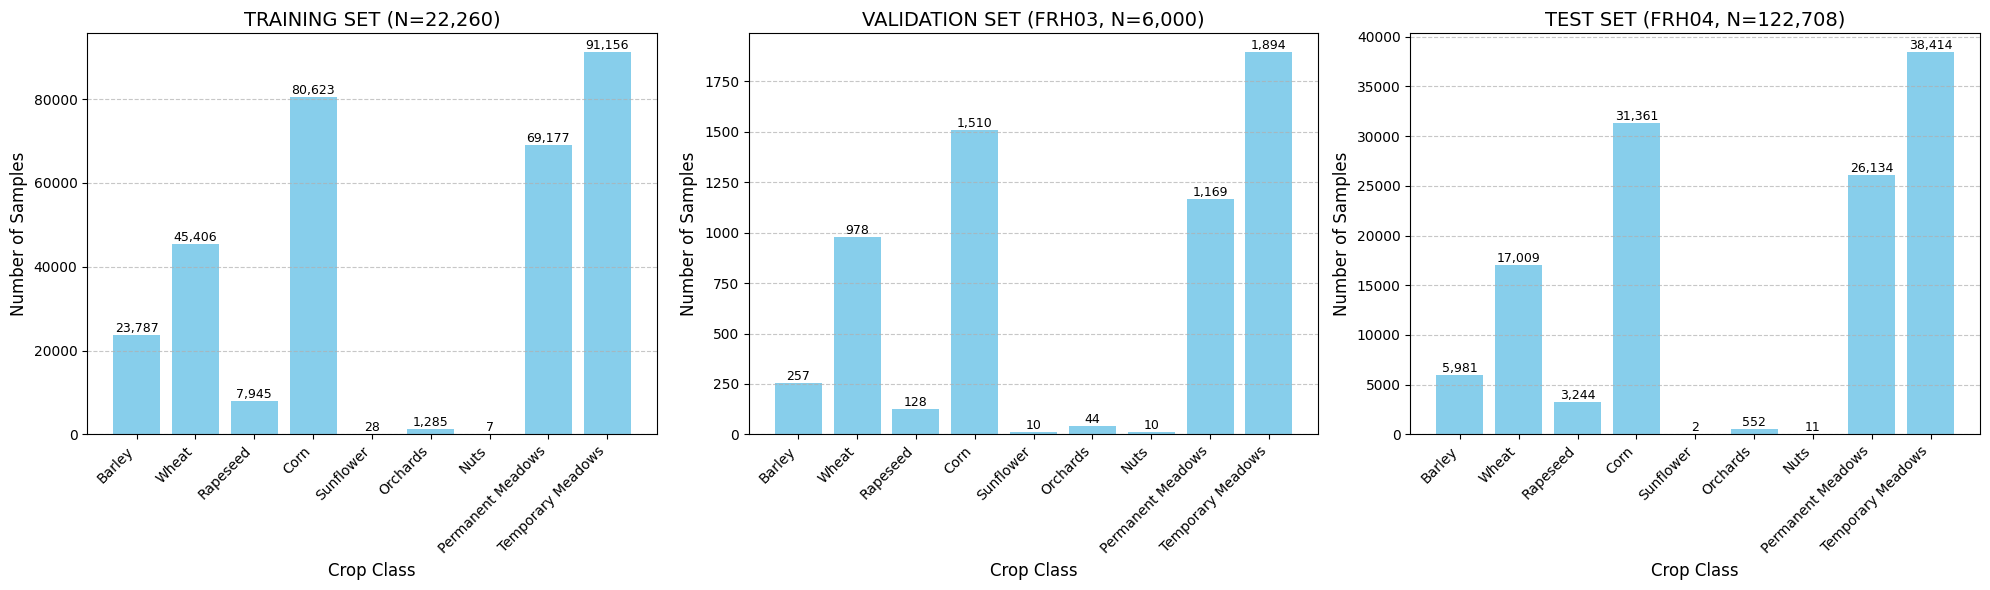

In [ ]:
#@title Plotting Distributions (Direct Download)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

CLASS_ORDER_RAW = [
    'barley', 'wheat', 'rapeseed', 'corn', 'sunflower',
    'orchards', 'nuts', 'permanent meadows', 'temporary meadows'
]
CLASS_LABELS = [
    "Barley", "Wheat", "Rapeseed", "Corn",
    "Sunflower", "Orchards", "Nuts",
    "Permanent Meadows", "Temporary Meadows"
]

train_data = {
    'Crop Class': ['permanent meadows', 'temporary meadows', 'barley', 'wheat', 'rapeseed', 'corn', 'orchards', 'nuts', 'sunflower'],
    'Count': [69177, 91156, 23787, 45406, 7945, 80623, 1285, 7, 28],
}
df_train_raw = pd.DataFrame(train_data)
N_train = 22260

val_data = {
    'Crop Class': ['temporary meadows', 'corn', 'permanent meadows', 'wheat', 'barley', 'rapeseed', 'orchards', 'sunflower', 'nuts'],
    'Count': [1894, 1510, 1169, 978, 257, 128, 44, 10, 10],
}
df_val_raw = pd.DataFrame(val_data)
N_val = 6000

test_data = {
    'Crop Class': ['temporary meadows', 'corn', 'permanent meadows', 'wheat', 'barley', 'rapeseed', 'orchards', 'nuts', 'sunflower'],
    'Count': [38414, 31361, 26134, 17009, 5981, 3244, 552, 11, 2],
}
df_test_raw = pd.DataFrame(test_data)
N_test = 122708

def prepare_df_for_plotting(df_raw, order):
    """Aligns the DataFrame to the desired class order, filling missing counts with 0."""
    df_ordered = df_raw.set_index('Crop Class').reindex(order, fill_value=0).reset_index()
    df_ordered.columns = ['Crop Class', 'Count']
    return df_ordered

df_train = prepare_df_for_plotting(df_train_raw, CLASS_ORDER_RAW)
df_val = prepare_df_for_plotting(df_val_raw, CLASS_ORDER_RAW)
df_test = prepare_df_for_plotting(df_test_raw, CLASS_ORDER_RAW)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
plt.subplots_adjust(wspace=0.3)

datasets = [df_train, df_val, df_test]
titles = [
    f'TRAINING SET (N={N_train:,})',
    f'VALIDATION SET (FRH03, N={N_val:,})',
    f'TEST SET (FRH04, N={N_test:,})'
]

for i, df in enumerate(datasets):
    ax = axes[i]
    counts = df['Count'].values

    bars = ax.bar(CLASS_LABELS, counts, color='skyblue')

    ax.set_title(titles[i], fontsize=14)
    ax.set_xlabel('Crop Class', fontsize=12)
    ax.set_ylabel('Number of Samples', fontsize=12)

    ax.set_xticklabels(CLASS_LABELS, rotation=45, ha='right', fontsize=10)

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Adding counts on top of bars
    for j, count in enumerate(counts):
        if count > 0:
            label = f'{count:,}'
            ax.text(j, count, label, ha='center', va='bottom', fontsize=9)

plt.tight_layout()

# Downloading
filename = 'distribution_plots_high_res.png'
plt.savefig(filename, dpi=300)
files.download(filename)

In [ ]:
#@title Downloading Pre-Processed Sets
import numpy as np
from google.colab import files

# Save all final processed feature arrays (X_..._new)
np.save('X_train_new.npy', X_train_new)
np.save('X_val_new.npy', X_val_new)
np.save('X_test_new.npy', X_test_new)

# Save non-OHE labels (Balanced/Unbalanced class codes)
np.save('y_train_balanced.npy', y_train_balanced)
np.save('y_val_balanced.npy', y_val_balanced)
np.save('y_test_balanced.npy', y_test_balanced)

# 3. Save final OHE labels (For training/evaluation)
np.save('y_train_new.npy', y_train_new)
np.save('y_val_new.npy', y_val_new)
np.save('y_test_new_ohe.npy', y_test_new) 


files.download('X_train_new.npy')
files.download('X_val_new.npy')
files.download('X_test_new.npy')

files.download('y_train_balanced.npy')
files.download('y_val_balanced.npy')
files.download('y_test_balanced.npy')

files.download('y_train_new.npy')
files.download('y_val_new.npy')
files.download('y_test_new_ohe.npy')

Starting file downloads...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#NEW MODEL

In [ ]:
#@title Initial Model
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.metrics import precision_recall_fscore_support, cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

T_REGULARIZED = 48   # Sequence Length (Time Steps)
F_AUGMENTED = 26     # Number of Features (10 S2 + 15 VIs + 1 Mask)
NUM_CLASSES = 9      # Number of Crop Classes
INITIAL_CHANNELS = 32 # Starting width, doubled from original due to complex input 
U_NET_DEPTH = 4      # Number of downsampling blocks
DROPOUT_RATE = 0.4   # 40% Dropout rate adopted
L2_REG = 1e-4        # L2 regularization strength
INIT_LR = 0.0001     # Initial Learning Rate - standard practice in crop literature
ADAMW_WEIGHT_DECAY = 1e-5 # AdamW Weight Decay (Within the 10^-8 to 10^-4 search range)

# Macro dice loss function
@tf.function
def macro_dice_loss(y_true, y_pred):
    """
    Computes the Macro-Dice Loss (1 - Macro-Dice Score).
    This treats all classes equally and is robust for imbalanced evaluation sets.
    """
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)

    # Calculate Dice Score per class
    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)

    # Avoid division by zero
    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)

    # Calculate the macro (arithmetic mean) Dice Score across all classes
    macro_dice_score = tf.reduce_mean(dice_score_per_class)

    # Return loss, which is (1 - Score)
    return 1. - macro_dice_score

# Model blocks

def conv_block_1d(input_tensor, filters, name):
    """Standard 1D Convolutional Block with BN, ReLU, L2, and 40% Dropout."""
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)

    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)

    # Dropout rate 40%
    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x


def TemporalAttentionGate(input_features, gating_signal, name):
    """Temporal Attention Gate (TAG) implementation."""
    filters = input_features.shape[-1]

    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)

    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)

    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)

    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)

    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

# Model wrapper for metrics

@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)

    def result(self):
        return self.metric_fn.result()

    def reset_state(self):
        self.metric_fn.reset_state()

    def get_config(self):
        config = super().get_config()
        config.update({
            "metric_fn": tf.keras.metrics.serialize(self.metric_fn)
        })
        return config

    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)


# A U-Net assemply

def build_1d_aunet():
    """Builds the 1D Attention U-Net model using T=50, F=26 inputs."""
    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs

    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    # Encoder
    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    # Bottleneck
    bottleneck = conv_block_1d(x, current_filters, name='bottleneck')
    x = bottleneck

    # Decoder
    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'dec{i}'

        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            # Upsampling (Conv1DTranspose)
            up_conv_output = layers.Conv1DTranspose(
                current_filters,
                kernel_size=2, strides=2, padding='same',
                name=f'{name}_upconv'
            )(x)

            aligned_encoder = encoder_output

            # Temporal Attention Gate
            attended_features = TemporalAttentionGate(
                input_features=aligned_encoder,
                gating_signal=up_conv_output,
                name=f'{name}_attn'
            )

            # Concatenation
            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])

            # Convolutional Block
            x = conv_block_1d(x, current_filters, name=name)

    # Segmentation Output
    output_tensor = layers.Conv1D(
        NUM_CLASSES,
        kernel_size=1, padding='same',
        activation='softmax',
        name='output_softmax'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model

def compile_model(model, lr=INIT_LR, weight_decay=ADAMW_WEIGHT_DECAY):
    """
    Compiles the model using the AdamW optimizer and Macro-Dice Loss.
    """

    # Use AdamW optimiser
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=lr,
        weight_decay=weight_decay
    )

    # Define Macro Metrics for tracking
    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    macro_precision = tf.keras.metrics.Precision(name='macro_precision')
    macro_recall = tf.keras.metrics.Recall(name='macro_recall')

    # Wrap metrics that expect 2D input
    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='overall_accuracy'), # Overall Accuracy
        FlattenTimeWrapper(macro_f1, name='macro_f1'),      # Core Metric
        FlattenTimeWrapper(macro_precision, name='macro_precision'),
        FlattenTimeWrapper(macro_recall, name='macro_recall'),
    ]

    model.compile(
        optimizer=optimizer,
        loss=macro_dice_loss,
        metrics=wrapped_metrics
    )
    return model

def plot_confusion_matrix(y_true, y_pred, class_names):
    """Generates and plots a normalized confusion matrix."""

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    labels = list(class_names.values())

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm,
        annot=True,        
        fmt=".2f",         
        cmap="Blues",      
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title('Normalized Confusion Matrix (Test Set)', fontsize=16)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """
    Calculates the Macro F1-score, Per-Class Metrics, and BreizhCrops baseline
    metrics on the Test Set, and prints the Confusion Matrix.
    """

    y_pred_proba = model.predict(X_test)

    T = X_test.shape[1]
    y_true_tiled = np.tile(y_test_ohe, (T, 1, 1)).transpose(1, 0, 2)

    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)

    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0
    )

    macro_f1 = np.mean(f1_pc)

    avg_accuracy = np.mean(recall_pc)

    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)

    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0
    )

    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)

    # Per-Class breakdown
    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision_pc.round(4),
        'Recall': recall_pc.round(4),
        'F1-Score': f1_pc.round(4),
    })

    print("\nPer-Class Metrics (Required for Detailed Comparison)")
    print(results_df.to_string(index=False))

    print("\nOverall Metrics")
    print(f"Macro F1-Score: {macro_f1:.4f} (Class-Balanced Core Metric)")
    print("Breizh Crops Baseline Metrics (Imbalance-Sensitive):")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")

    plot_confusion_matrix(y_true_indices, y_pred_indices, class_names)

    return macro_f1

#SANITY CHECK NEW

In [ ]:
#@title Sanity Check
import numpy as np
# --- Make sure your previous blocks with build_1d_aunet() and compile_model() are already executed ---

# --- Corrected Sanity Check Function (Ready-to-Run) ---
def run_cpu_sanity_check(X_train_full, y_train_full, X_val_full, y_val_full, T_REGULARIZED, NUM_CLASSES):
    """
    Quick functional test for the 1D Attention U-Net.
    Works with one-hot encoded labels, properly tiles across time dimension.
    """
    N_SANITY_TRAIN = 750
    N_SANITY_VAL = 250
    MINORITY_CLASSES = [4, 6]

    print("\n--- Quick Sanity Check (CPU-Optimized, Macro-Dice Only) ---")

    # 1. Simple Slicing
    train_indices_to_keep = set(range(N_SANITY_TRAIN))
    for class_id in MINORITY_CLASSES:
        minority_indices = np.where(np.argmax(y_train_full, axis=-1) == class_id)[0]
        if len(minority_indices) > 0:
            train_indices_to_keep.add(minority_indices[0])

    final_train_indices = sorted(list(train_indices_to_keep))

    X_train_mini = X_train_full[final_train_indices]
    y_train_mini = y_train_full[final_train_indices]
    X_val_mini = X_val_full[:N_SANITY_VAL]
    y_val_mini = y_val_full[:N_SANITY_VAL]

    # 2. Prepare Labels (already one-hot)
    print("y_train_mini shape BEFORE tiling:", y_train_mini.shape)
    print("y_val_mini shape BEFORE tiling:", y_val_mini.shape)

    # (N, C) -> (N, 1, C) -> (N, T, C)
    y_train_tiled = np.tile(np.expand_dims(y_train_mini, axis=1), (1, T_REGULARIZED, 1))
    y_val_tiled   = np.tile(np.expand_dims(y_val_mini, axis=1), (1, T_REGULARIZED, 1))

    # Sanity assertion
    assert X_train_mini.shape[0] == y_train_tiled.shape[0], \
        f"Batch size mismatch: X_train={X_train_mini.shape[0]}, y_train={y_train_tiled.shape[0]}"
    assert X_val_mini.shape[0] == y_val_tiled.shape[0], \
        f"Batch size mismatch: X_val={X_val_mini.shape[0]}, y_val={y_val_tiled.shape[0]}"

    print(f"Data sliced: Train={X_train_mini.shape}, Val={X_val_mini.shape}")
    print(f"Labels Tiled: Train={y_train_tiled.shape}, Val={y_val_tiled.shape}") # Expect (750, 48, 9)

    # 3. Build and Compile Model
    model = build_1d_aunet()
    compiled_model = compile_model(model)

    # 4. Quick Training Run (5 Epochs)
    print(f"\n--- Running 5 Epochs Check (Expecting Loss to Drop) ---")

    history = compiled_model.fit(
        X_train_mini, y_train_tiled,
        validation_data=(X_val_mini, y_val_tiled),
        epochs=5,
        batch_size=32,
        verbose=1
    )

    # 5. Functional Check
    final_loss = history.history['loss'][-1]
    initial_loss = history.history['loss'][0]

    if final_loss < initial_loss:
        print("\n✅ SANITY CHECK PASSED: Loss dropped from {:.4f} to {:.4f}.".format(initial_loss, final_loss))
    else:
        print("\n❌ SANITY CHECK FAILED: Loss did not drop or initial loss was too high. Initial Loss: {:.4f}".format(initial_loss))

    return model


# --- EXECUTION BLOCK ---
X_TRAIN_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/X_train_new.npy"
Y_TRAIN_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/y_train_new.npy"
X_VAL_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/X_val_new.npy"
Y_VAL_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/y_val_new.npy"

if __name__ == '__main__':
    try:
        # --- LOAD DATA ARRAYS ---
        print("1. Loading processed data arrays for Sanity Check...")

        X_train_new = np.load(X_TRAIN_PATH, allow_pickle=True)
        y_train_new = np.load(Y_TRAIN_PATH, allow_pickle=True)
        X_val_new = np.load(X_VAL_PATH, allow_pickle=True)
        y_val_new = np.load(Y_VAL_PATH, allow_pickle=True)

        # --- Ensure constants are correct ---
        T_REGULARIZED = 48
        NUM_CLASSES = 9
        print("FORCED T_REGULARIZED =", T_REGULARIZED)
        print("NUM_CLASSES =", NUM_CLASSES)

        # 2. RUN SANITY CHECK
        model_tested = run_cpu_sanity_check(
            X_train_new,
            y_train_new,
            X_val_new,
            y_val_new,
            T_REGULARIZED,
            NUM_CLASSES
        )

        print("\nSanity Check complete. The model architecture and training initialization are verified.")

    except FileNotFoundError as e:
        print(f"\nFATAL ERROR: Could not find the required data file. Check path and file names: {e}")
    except AssertionError as e:
        print(f"\nFATAL ERROR: Batch size mismatch detected. {e}")
    except Exception as e:
        print(f"\nAn unexpected error occurred during execution: {e}")


1. Loading processed data arrays for Sanity Check...

FATAL ERROR: Could not find the required data file. Check path and file names: [Errno 2] No such file or directory: '/content/drive/MyDrive/COMP0173_Applying_New_Context/data/X_train_new.npy'


#RUNNING MODEL

In [ ]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.8 MB/s eta 0:00:00


In [ ]:
#@title Training Initial Model
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from skopt import gp_minimize, space
import gc
import os
from typing import Dict, Tuple

# --- Configuration Constants (Keep T_REGULARIZED, F_AUGMENTED, NUM_CLASSES, CROP_MAP) ---
T_REGULARIZED = 48
NUM_CLASSES = 9
# ... (Assuming all other constants, including FIXED_PARALLEL_CALLS=4, are defined)

# --- CRITICAL STABILITY FIX: Fixed Parallel Calls ---
FIXED_PARALLEL_CALLS = 4

# --- I. High-Speed tf.data Dataset Builder (STABILIZED) ---

def tf_tile_labels(X, y):
    """Tiles the label (N, C) to match the sequence shape (N, T, C)."""
    y_tiled = tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))
    return X, y_tiled

def build_base_dataset(X_data: np.ndarray, y_data: np.ndarray, shuffle_buffer_size=10000):
    """Build a cached training base dataset once (with shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.shuffle(shuffle_buffer_size, reshuffle_each_iteration=True)
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_val_base_dataset(X_data: np.ndarray, y_data: np.ndarray):
    """Builds the cached validation dataset (without shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_tf_dataset_from_base(base_dataset, batch_size: int, is_validation=False):
    """Create a fast batched dataset from the cached base dataset."""
    dataset = base_dataset
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset


# --- II. Bayesian Optimization Objective Function (MODIFIED FOR 1 EPOCH) ---

def objective_function(hparams, base_train_dataset, base_val_dataset, num_epochs=50): # <-- DEFAULT SET TO 1
    """
    Trains and evaluates the model using cached datasets for both training and validation.
    """
    batch_size, lr, weight_decay = hparams

    train_dataset = build_tf_dataset_from_base(base_train_dataset, batch_size)
    val_dataset = build_tf_dataset_from_base(base_val_dataset, batch_size, is_validation=True)

    # 2. Build and Compile Model (Assuming global build_1d_aunet and compile_model are defined)
    model = build_1d_aunet()
    compiled_model = compile_model(model, lr=lr, weight_decay=weight_decay)

    # 3. Define Callbacks: Patience must be 0 or 1 since epochs=1
    callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=0, min_lr=1e-7),
        EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)
    ]

    # 4. Training Run
    print(f"\nTrial Start: BS={batch_size}, LR={lr:.6f}, WD={weight_decay:.8f}")

    try:
        history = compiled_model.fit(
            train_dataset,
            validation_data=val_dataset,
            epochs=num_epochs,
            callbacks=callbacks,
            verbose=1,
        )

        # 5. Get Best Validation Macro F1
        best_macro_f1 = max(history.history.get('val_macro_f1', [-1.0]))

    except Exception as e:
        print(f"--- Trial Failed: {e} ---")
        best_macro_f1 = -1.0

    print(f"Trial End. Best Validation Macro F1: {best_macro_f1:.4f}")

    del model, compiled_model, train_dataset, val_dataset
    gc.collect()

    return -best_macro_f1


# --- III. Main Execution Block (Search and Final Train) ---

if __name__ == '__main__':

    data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/"

    file_names = {
        'X_train_final': 'X_train_final.npy', 'y_train_final': 'y_train_final.npy',
        'X_val_final': 'X_val_final.npy', 'y_val_final': 'y_val_final.npy',
        'X_test_final': 'X_test_final.npy', 'y_test_final': 'y_test_final.npy'
    }

    try:
        # Load all large arrays for base processing
        X_train_final = np.load(os.path.join(data_dir, file_names['X_train_final']), allow_pickle=True)
        y_train_final = np.load(os.path.join(data_dir, file_names['y_train_final']), allow_pickle=True)
        X_val_final = np.load(os.path.join(data_dir, file_names['X_val_final']), allow_pickle=True)
        y_val_final = np.load(os.path.join(data_dir, file_names['y_val_final']), allow_pickle=True)

        print("Data arrays loaded successfully.")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find data file. Check path and file names: {e}")
        exit()

    # Build cached base datasets ONCE
    base_train_dataset = build_base_dataset(X_train_final, y_train_final)
    base_val_dataset = build_val_base_dataset(X_val_final, y_val_final)

    # RAM Optimization
    del X_train_final, y_train_final, X_val_final, y_val_final
    gc.collect()
    print("Redundant NumPy arrays deleted for RAM management.")


    # 1. Define the Search Space
    search_space = [
        space.Categorical([32, 64, 128], name='batch_size'),
        space.Real(1e-5, 1e-3, 'log-uniform', name='learning_rate'),
        space.Real(1e-8, 1e-4, 'log-uniform', name='weight_decay')
    ]

    N_BAYESIAN_CALLS = 15

    print(f"\nRunning Bayesian Optimization for {N_BAYESIAN_CALLS} Trials (Testing with 1 Epoch)")

    # 2. Execute Bayesian Search (Setting epochs to 1)
    search_results = gp_minimize(
        lambda h: objective_function(h, base_train_dataset, base_val_dataset, num_epochs=50),
        search_space,
        n_calls=N_BAYESIAN_CALLS,
        random_state=42,
        verbose=True,
        n_jobs=1
    )

    # 3. Extract Best Hyperparameters
    best_hparams = search_results.x
    best_macro_f1 = -search_results.fun

    final_bs, final_lr, final_wd = best_hparams


    print("Results of Hyperparameter Search:")
    print(f"Optimal Batch Size: {final_bs}")
    print(f"Optimal Learning Rate: {final_lr:.6f}")
    print(f"Optimal Weight Decay: {final_wd:.8f}")
    print(f"Best Validation Macro F1: {best_macro_f1:.4f}")


    # 4. Final Training with Optimal Parameters (RECOMMENDED: FULL 50 EPOCHS)
    print("\nFinal Model Training (50 Epochs)")

    tf.keras.backend.clear_session()
    FULL_EPOCHS = 50 # <-- Keep this at 50 for actual results! Change to 1 for quick test.

    final_callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-7),
        EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)
    ]

    # Build final model and dataset
    final_model = build_1d_aunet()
    final_compiled_model = compile_model(final_model, lr=final_lr, weight_decay=final_wd)

    final_train_dataset = build_tf_dataset_from_base(base_train_dataset, final_bs)
    final_val_dataset = build_tf_dataset_from_base(base_val_dataset, final_bs, is_validation=True)

    final_compiled_model.fit(
        final_train_dataset,
        validation_data=final_val_dataset,
        epochs=FULL_EPOCHS,
        callbacks=final_callbacks,
        verbose=1,
    )

    # RELOAD TEST DATA for final evaluation (as it was never cached)
    X_test_final_reloaded = np.load(os.path.join(data_dir, file_names['X_test_final']), allow_pickle=True)
    y_test_final_reloaded = np.load(os.path.join(data_dir, file_names['y_test_final']), allow_pickle=True)

    # 5. Final Evaluation on Test Set
    print("\nFinal Model Evaluation on Test Set (FRH04)")
    test_macro_f1 = evaluate_model_metrics(
        final_compiled_model,
        X_test_final_reloaded,
        y_test_final_reloaded,
        CROP_MAP
    )

    print(f"\nTest Set Macro F1: {test_macro_f1:.4f}")

Data arrays loaded successfully.
Redundant NumPy arrays deleted for RAM management.

Running Bayesian Optimization for 15 Trials (Testing with 1 Epoch)
Iteration No: 1 started. Evaluating function at random point.

Trial Start: BS=128, LR=0.000023, WD=0.00001315
Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - loss: 1.2265 - macro_f1: 0.0985 - macro_precision: 0.2082 - macro_recall: 0.0251 - overall_accuracy: 4.1692e-07 - val_loss: 1.2259 - val_macro_f1: 0.1026 - val_macro_precision: 0.7036 - val_macro_recall: 0.0027 - val_overall_accuracy: 0.0000e+00 - learning_rate: 2.3274e-05
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.2096 - macro_f1: 0.1194 - macro_precision: 0.2681 - macro_recall: 0.0431 - overall_accuracy: 1.7868e-06 - val_loss: 1.2094 - val_macro_f1: 0.0938 - val_macro_precision: 0.6987 - val_macro_recall: 0.0060 - val_overall_accuracy: 0.0000e+00 - learning_rate: 2.3274e-05
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 1.1921 - macro_f1

NameError: name 'CROP_MAP' is not defined

#OBTAINING MODEL WEIGHTS

In [ ]:
#@title Obtaining Optimal Model Weights
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from google.colab import files
import os
import gc
import random # Added for the Python random seed
from typing import Dict, Tuple

# ---------------------------------------------------------------------------------
# --- I. CONFIG AND SEED SETTING FOR REPRODUCIBILITY ---

# Recommended Seed: Use the same seed (e.g., 42) used for the Bayesian Search
# 'random_state=42' for the gp_minimize call in the original code.
GLOBAL_SEED = 42

os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)
# You may also need to set this if using CUDA, to force deterministic algorithms:
# os.environ['TF_DETERMINISTIC_OPS'] = '1'

# --- REQUIRED MODEL/CONFIG PLACEHOLDERS (Keep as is) ---
T_REGULARIZED = 48
NUM_CLASSES = 9
FIXED_PARALLEL_CALLS = 4
CROP_MAP = {
    0: 'Background', 1: 'Winter Wheat', 2: 'Rapeseed', 3: 'Corn',
    4: 'Soybeans', 5: 'Sugar Beet', 6: 'Sunflower', 7: 'Grass', 8: 'Forest'
}
# ---------------------------------------------------------------------------------

# --- II. HIGH-SPEED tf.data DATASET BUILDER (Keep as is) ---
def tf_tile_labels(X, y):
    """Tiles the label (N, C) to match the sequence shape (N, T, C)."""
    # Requires the global T_REGULARIZED
    y_tiled = tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))
    return X, y_tiled

def build_base_dataset(X_data: np.ndarray, y_data: np.ndarray, shuffle_buffer_size=10000):
    """Build a cached training base dataset once (with shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.shuffle(shuffle_buffer_size, reshuffle_each_iteration=True)
    # Requires the global FIXED_PARALLEL_CALLS
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_val_base_dataset(X_data: np.ndarray, y_data: np.ndarray):
    """Builds the cached validation dataset (without shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_tf_dataset_from_base(base_dataset, batch_size: int, is_validation=False):
    """Create a fast batched dataset from the cached base dataset."""
    dataset = base_dataset
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

# --- III. TARGETED EXECUTION BLOCK ---

# Define the specific hyperparameters and epoch limit
TARGET_BS = 64
TARGET_LR = 0.000046
TARGET_WD = 0.00000004
TARGET_EPOCHS = 7 # We want to save the weights *after* the 7th epoch
data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/"
# Ensure the path is correct
WEIGHTS_SAVE_PATH = os.path.join(data_dir, "reproduced_model_weights_epoch7.weights.h5")
LOCAL_SAVE_PATH = "reproduced_model_weights_epoch7_local.weights.h5"

print(f"Starting Targeted Training Rerun with GLOBAL_SEED={GLOBAL_SEED}.")
print("Target HParams: BS=64, LR=4.6e-5, WD=4e-8 for 7 Epochs.")

file_names = {
    'X_train_final': 'X_train_final.npy', 'y_train_final': 'y_train_final.npy',
    'X_val_final': 'X_val_final.npy', 'y_val_final': 'y_val_final.npy',
    'X_test_final': 'X_test_final.npy', 'y_test_final': 'y_test_final.npy'
}

try:
    # Load required data arrays
    X_train_final = np.load(os.path.join(data_dir, file_names['X_train_final']), allow_pickle=True)
    y_train_final = np.load(os.path.join(data_dir, file_names['y_train_final']), allow_pickle=True)
    X_val_final = np.load(os.path.join(data_dir, file_names['X_val_final']), allow_pickle=True)
    y_val_final = np.load(os.path.join(data_dir, file_names['y_val_final']), allow_pickle=True)

    print("Data arrays loaded.")
except FileNotFoundError as e:
    print(f"FATAL ERROR: Could not find data file: {e}")
    exit()

# 1. Build cached base datasets ONCE
base_train_dataset = build_base_dataset(X_train_final, y_train_final)
base_val_dataset = build_val_base_dataset(X_val_final, y_val_final)

# RAM Optimization
del X_train_final, y_train_final, X_val_final, y_val_final
gc.collect()

# 2. Build and Compile Model
tf.keras.backend.clear_session()
# NOTE: build_1d_aunet and compile_model MUST be defined in the environment.
final_model = build_1d_aunet()
final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

# 3. Create Fast Datasets
final_train_dataset = build_tf_dataset_from_base(base_train_dataset, TARGET_BS)
final_val_dataset = build_tf_dataset_from_base(base_val_dataset, TARGET_BS, is_validation=True)

# 4. Define Minimal Callbacks
# Note: Since the optimal point was found at epoch 7, using EarlyStopping
# or ReduceLROnPlateau might change the epoch 7 result slightly if they triggered.
# Keep it minimal unless you know the state of the callbacks at epoch 7.
# The original search likely used the callbacks, so it's safer to include them
# as defined in the objective_function, even though they probably didn't trigger.
final_callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-7),
    # Important: The original search *did* use EarlyStopping, but it was set to
    # patience=15, which is unlikely to have triggered by epoch 7. We include
    # the RLROnPlateau as a minimal set.
]

# 5. Training Run (Limited to 7 Epochs)
print(f"\nTraining for {TARGET_EPOCHS} epochs...")
history = final_compiled_model.fit(
    final_train_dataset,
    validation_data=final_val_dataset,
    epochs=TARGET_EPOCHS,
    callbacks=final_callbacks,
    verbose=1,
)

# 6. Report the resulting Macro F1 for epoch 7
epoch_7_macro_f1 = history.history.get('val_macro_f1', [None])[-1]
print(f"\nValidation Macro F1 after epoch 7 (Reproduction Run): {epoch_7_macro_f1:.4f}")
print(f"Target Macro F1: 0.2615")

# 7. Save Model Weights to Google Drive (after epoch 7 is complete)
final_compiled_model.save_weights(WEIGHTS_SAVE_PATH)
print(f"Model weights saved to Drive: {WEIGHTS_SAVE_PATH}")

# 8. Save Model Weights Locally and Trigger Download
final_compiled_model.save_weights(LOCAL_SAVE_PATH)

try:
    files.download(LOCAL_SAVE_PATH)
    print(f"Local download initiated for: {LOCAL_SAVE_PATH}")
except Exception as e:
    print(f"Could not automatically initiate file download. Please manually download the file '{LOCAL_SAVE_PATH}'.")

Starting Targeted Training Rerun with GLOBAL_SEED=42.
Target HParams: BS=64, LR=4.6e-5, WD=4e-8 for 7 Epochs.
Data arrays loaded.

Training for 7 epochs...
Epoch 1/7
347/347 ━━━━━━━━━━━━━━━━━━━━ 45s 31ms/step - loss: 1.2203 - macro_f1: 0.1089 - macro_precision: 0.1924 - macro_recall: 0.0267 - overall_accuracy: 1.9199e-06 - val_loss: 1.2073 - val_macro_f1: 0.0728 - val_macro_precision: 0.2644 - val_macro_recall: 0.0992 - val_overall_accuracy: 0.0000e+00 - learning_rate: 4.6000e-05
Epoch 2/7
347/347 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 1.1673 - macro_f1: 0.1537 - macro_precision: 0.2653 - macro_recall: 0.1149 - overall_accuracy: 2.3665e-05 - val_loss: 1.1107 - val_macro_f1: 0.1826 - val_macro_precision: 0.4400 - val_macro_recall: 0.3305 - val_overall_accuracy: 0.0000e+00 - learning_rate: 4.6000e-05
Epoch 3/7
347/347 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 1.1100 - macro_f1: 0.2030 - macro_precision: 0.3196 - macro_recall: 0.1942 - overall_accuracy: 9.0992e-05 - val_loss: 1.0721 - 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Local download initiated for: reproduced_model_weights_epoch7_local.weights.h5


#RUNNING ON TEST SET

Starting Final Evaluation: Loading weights and running metrics on Test Set.
Test data loaded. X_test shape: (122708, 48, 26)


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 200 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Successfully loaded model weights from: /content/drive/MyDrive/COMP0173_Applying_New_Context/data/reproduced_model_weights_epoch7.weights.h5
Making predictions on the Test Set...
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step

Per-Class Metrics (Required for Detailed Comparison)
 Class ID        Class Name  Support  Precision  Recall  F1-Score
        0            barley   287088     0.2076  0.5378    0.2996
        1             wheat   816432     0.4293  0.3543    0.3882
        2          rapeseed   155712     0.0743  0.2313    0.1124
        3              corn  1505328     0.8488  0.6321    0.7246
        4         sunflower       96     0.0000  0.0000    0.0000
        5          orchards    26496     0.0000  0.0000    0.0000
        6              nuts      528     0.0000  0.0000    0.0000
        7 permanent meadows  1254432     0.3469  0.3963    0.3700
        8 temporary meadows  1843872     0.4817  0.3746    0.4214

Overall Metrics
Ma

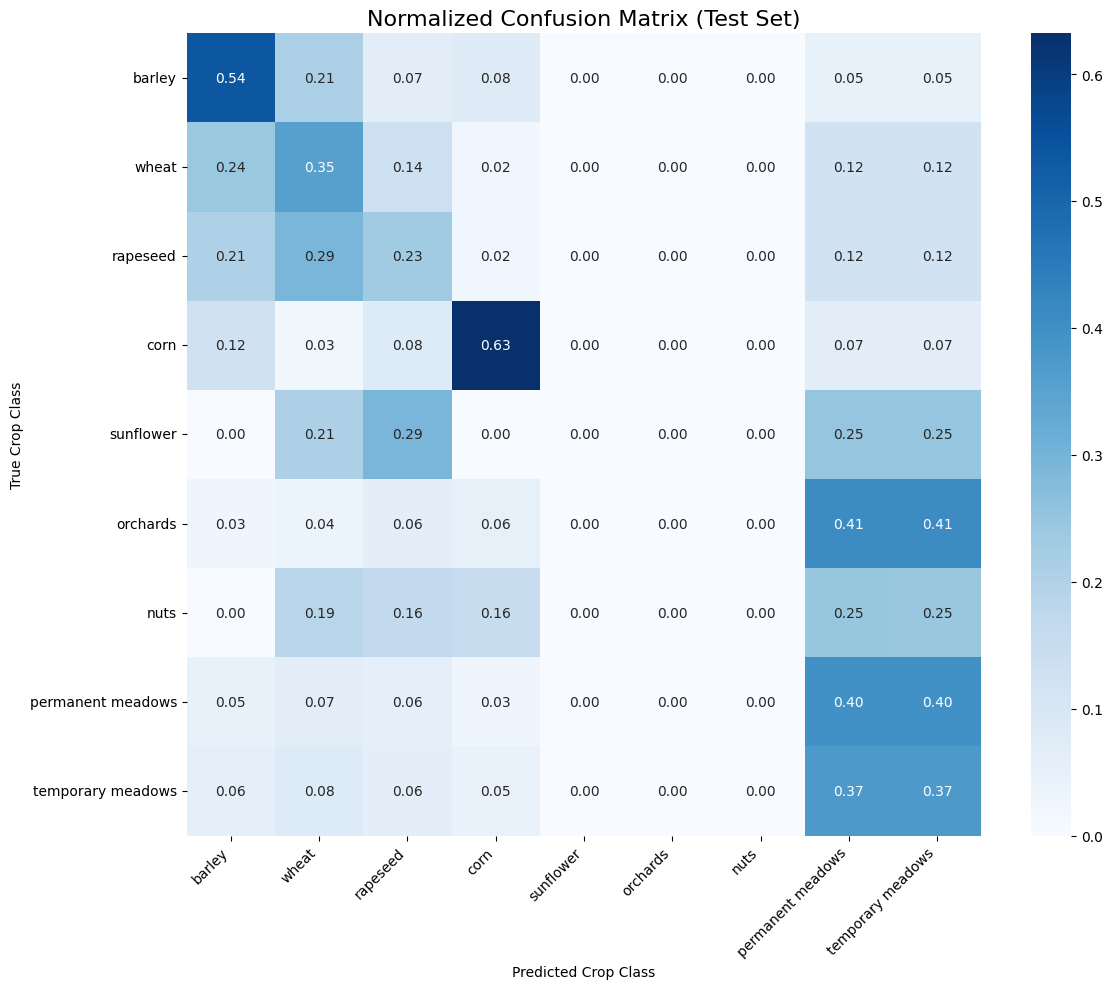


CONFUSION MATRIX VISUALIZATION AND ANALYSIS


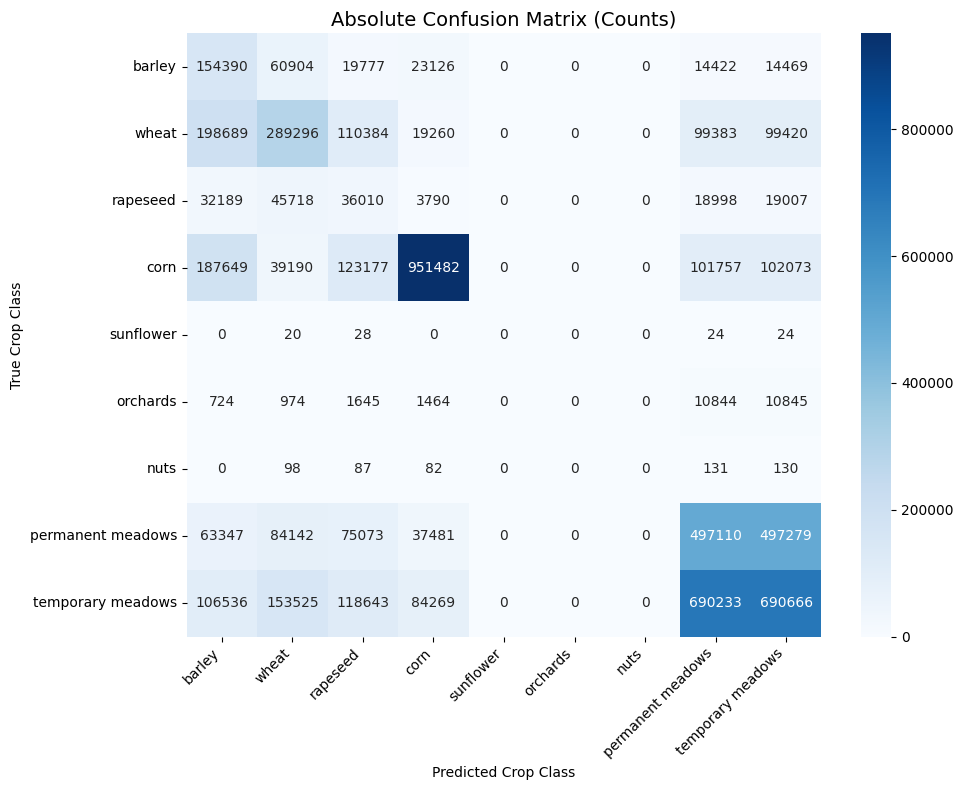

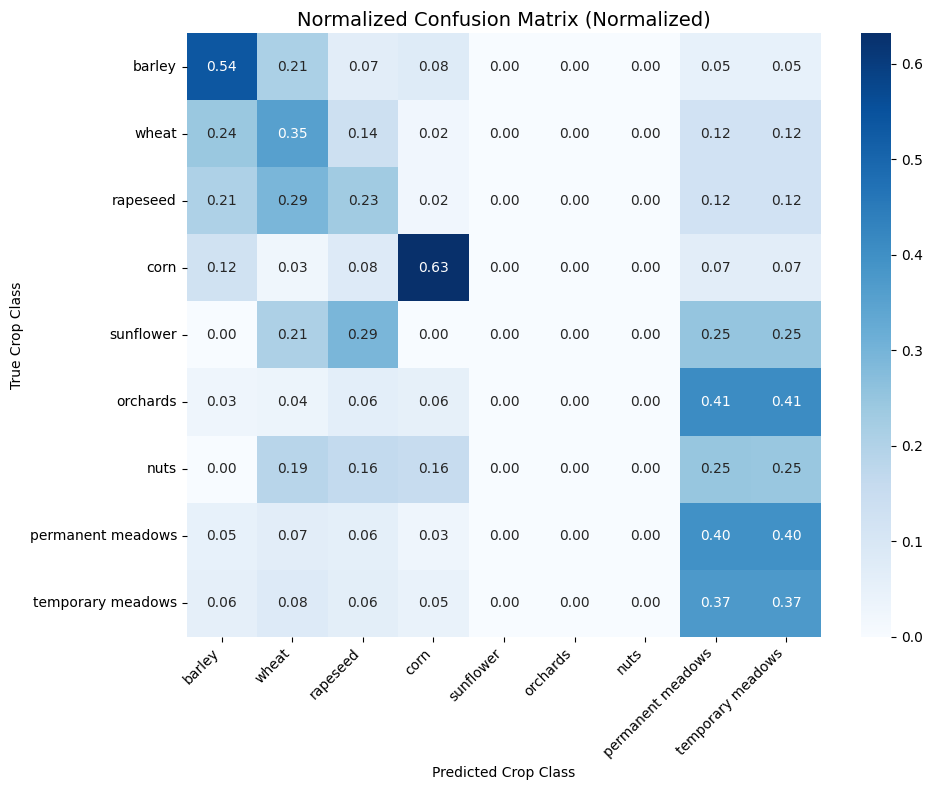


--- Detailed Confusion Analysis ---

**High Performance Class: barley** (Recall: 53.8%)
 - Top misclassification is: wheat (21.2%), corn (6.9%), rapeseed (8.1%).

**Moderate Class: wheat** (Recall: 35.4%)
 - Top misclassification is: barley (24.3%), rapeseed (13.5%), temporary meadows (2.4%).

**Low Performance Class: rapeseed** (Recall: 23.1%)
 - Top misclassification is: wheat (20.7%), barley (29.4%), temporary meadows (2.4%).

**High Performance Class: corn** (Recall: 63.2%)
 - Top misclassification is: barley (12.5%), rapeseed (2.6%), temporary meadows (8.2%).

**Low Performance Class: sunflower** (Recall: 0.0%)
 - Top misclassification is: temporary meadows (20.8%), permanent meadows (29.2%).

**Low Performance Class: orchards** (Recall: 0.0%)
 - Top misclassification is: temporary meadows (2.7%), permanent meadows (3.7%), rapeseed (6.2%).

**Low Performance Class: nuts** (Recall: 0.0%)
 - Top misclassification is: temporary meadows (18.6%), wheat (16.5%).

**Moderate Class: perm

In [ ]:
#@title Testing Initial Model
import numpy as np
import tensorflow as tf
import os
import gc
import random
import pandas as pd
from typing import Dict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model # Ensure Model is imported if not already

# --- I. CONFIGURATION & HYPERPARAMETERS (Needed for compilation/loading) ---

# Set seeds for deterministic results
GLOBAL_SEED = 42
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

# Optimal HParams for loading the correct model state
TARGET_LR = 0.000046
TARGET_WD = 0.00000004

# Data and Weights Paths (Assumes you are running this after mounting Drive)
data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/"
WEIGHTS_LOAD_PATH = os.path.join(data_dir, "reproduced_model_weights_epoch7.weights.h5")

# CROP_MAP (Must be accurate for reporting, assumed to be globally available)
CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}
NUM_CLASSES = 9 # Must be available globally

file_names = {
    'X_test_final': 'X_test_final.npy',
    'y_test_final': 'y_test_final.npy' # OHE labels
}

# --- II. NEW/MODIFIED REPORTING FUNCTIONS ---

def plot_confusion_matrix_styled(y_true, y_pred, class_names, normalize=False, title='Confusion Matrix'):
    """Generates and plots a confusion matrix (Normalized or Count)."""

    cm = confusion_matrix(y_true, y_pred, normalize='true' if normalize else None)

    labels = list(class_names.values())

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f" if normalize else "d",
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title(f'{title} ({ "Normalized" if normalize else "Counts"})', fontsize=14)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def analyze_confusion_matrix(cm_normalized: np.ndarray, class_names: Dict[int, str]):
    """Performs a detailed textual analysis of the normalized confusion matrix."""
    labels = list(class_names.values())

    print("\n--- Detailed Confusion Analysis ---")

    for i in range(NUM_CLASSES):
        true_class_name = labels[i]

        # Misclassification row (excluding the diagonal/correct prediction)
        misclassification_row = np.delete(cm_normalized[i, :], i)

        # Get indices and values of top misclassified classes
        top_k_indices = np.argsort(misclassification_row)[::-1]

        # Map back to original column indices
        original_column_indices = [idx if idx < i else idx + 1 for idx in top_k_indices]

        # Get the top 3 misclassifications > 1%
        top_errors = [(labels[j], misclassification_row[k] * 100)
                      for k, j in enumerate(original_column_indices) if k < 3 and misclassification_row[k] > 0.01]

        # Get the correct prediction rate (Recall)
        correct_prediction = cm_normalized[i, i] * 100

        # --- Print Analysis ---
        status = ""
        if correct_prediction > 50: status = "High Performance Class"
        elif correct_prediction > 25: status = "Moderate Class"
        elif np.sum(cm_normalized[i, :]) < 0.1: status = "Poor/Rare Class (Low Support)"
        else: status = "Low Performance Class"

        print(f"\n**{status}: {true_class_name}** (Recall: {correct_prediction:.1f}%)")

        if len(top_errors) > 0:
            top_errors_str = ", ".join([f"{name} ({rate:.1f}%)" for name, rate in top_errors])
            print(f" - Top misclassification is: {top_errors_str}.")
        else:
            print(" - Errors are low and/or widely dispersed.")

    print("--- Finished Confusion Matrix Analysis ---")


# --- III. MAIN EXECUTION FLOW ---

if __name__ == '__main__':

    print("Starting Final Evaluation: Loading weights and running metrics on Test Set.")

    # 1. Load Test Data
    try:
        X_test_final_reloaded = np.load(os.path.join(data_dir, file_names['X_test_final']), allow_pickle=True)
        y_test_ohe_reloaded = np.load(os.path.join(data_dir, file_names['y_test_final']), allow_pickle=True)
        print(f"Test data loaded. X_test shape: {X_test_final_reloaded.shape}")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find test data file. Please check path and mount Drive: {e}")
        exit()

    # 2. Rebuild and Compile Model (Using the globally defined functions)
    tf.keras.backend.clear_session()
    final_model = build_1d_aunet()
    # Use the TARGET HPs
    final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

    # 3. Load Saved Weights
    try:
        final_compiled_model.load_weights(WEIGHTS_LOAD_PATH)
        print(f"Successfully loaded model weights from: {WEIGHTS_LOAD_PATH}")
    except Exception as e:
        print(f"FATAL ERROR: Could not load weights. Check path: {e}")
        exit()

    # 4. Perform Prediction and Get Indices (Necessary for custom confusion matrix logic)
    print("Making predictions on the Test Set...")
    # Prediction on NumPy array is done directly:
    y_pred_proba = final_compiled_model.predict(X_test_final_reloaded, verbose=1)

    # Flatten the Time dimension to get indices (T=48)
    T = X_test_final_reloaded.shape[1]
    y_true_tiled = np.tile(y_test_ohe_reloaded, (T, 1, 1)).transpose(1, 0, 2)
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)


    # 5. Calculate Metrics (Using the globally defined function, but intercepting its print behavior)
    # We call evaluate_model_metrics to print the Per-Class and Overall Metrics tables.
    # Note: The existing evaluate_model_metrics function includes a print for the CM plot.

    # Temporarily redefine plot_confusion_matrix to handle the final CM steps explicitly,
    # or rely on the logic below to handle the printing/plotting.
    # Since evaluate_model_metrics calls plot_confusion_matrix(y_true_indices, y_pred_indices, CROP_MAP),
    # we need to ensure the existing plot_confusion_matrix is overwritten or bypassed if needed.

    # Option A: Run the original evaluate_model_metrics (assumed to be working)
    _ = evaluate_model_metrics(
        final_compiled_model,
        X_test_final_reloaded,
        y_test_ohe_reloaded,
        CROP_MAP
    )

    # 6. Generate and Analyze Confusion Matrices
    print("\n" + "="*50)
    print("CONFUSION MATRIX VISUALIZATION AND ANALYSIS")
    print("="*50)

    # Non-Normalized Confusion Matrix Plot (Counts)
    plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=False, title='Absolute Confusion Matrix')


    # Normalized Confusion Matrix Plot (Error Rates)
    plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=True, title='Normalized Confusion Matrix')


    # 7. Detailed Textual Confusion Analysis
    cm_normalized = confusion_matrix(y_true_indices, y_pred_indices, normalize='true')
    analyze_confusion_matrix(cm_normalized, CROP_MAP)

    # Cleanup
    del X_test_final_reloaded, y_test_ohe_reloaded, y_pred_proba
    gc.collect()

#ABLATION 1: INVERSE FREQUENCY WEIGHTING

In [ ]:
#@title Ablation 1: Inverse Frequency Weighting Model
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.metrics import precision_recall_fscore_support, cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os # Included for consistency

# --- I. Configuration Constants (MUST MATCH PREPROCESSING OUTPUT) ---
T_REGULARIZED = 48
F_AUGMENTED = 26
NUM_CLASSES = 9
INITIAL_CHANNELS = 32
U_NET_DEPTH = 4
DROPOUT_RATE = 0.4
L2_REG = 1e-4
INIT_LR = 0.0001
ADAMW_WEIGHT_DECAY = 1e-5

# Placeholder for Class Weights. This MUST be redefined in Code Block 2 & 3.
CLASS_WEIGHTS_TENSOR = tf.constant(np.ones(NUM_CLASSES, dtype=np.float32))

# --- II. Custom Weighted Dice Loss Function ---

@tf.function
def weighted_macro_dice_loss(y_true, y_pred):
    """
    Computes the Weighted Macro-Dice Loss (1 - Weighted Macro-Dice Score).
    Applies inverse frequency weights stored in CLASS_WEIGHTS_TENSOR.
    """
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)
    smooth = 1e-5

    # Calculate Dice Score per class
    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)

    # Calculate the Dice Loss for each class (C,)
    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    dice_losses = 1.0 - dice_score_per_class

    # CRITICAL STEP: Apply the class weights element-wise
    weighted_dice_losses = dice_losses * CLASS_WEIGHTS_TENSOR

    # Average the weighted losses
    mean_weighted_loss = tf.reduce_mean(weighted_dice_losses)

    return mean_weighted_loss

# The original unweighted loss is kept as a metric for comparison
@tf.function
def macro_dice_loss(y_true, y_pred):
    """Unweighted Macro-Dice Loss, used here only as an evaluation metric."""
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)
    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)
    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    macro_dice_score = tf.reduce_mean(dice_score_per_class)
    return 1. - macro_dice_score

# --- III. Model Blocks (Unchanged) ---

def conv_block_1d(input_tensor, filters, name):
    """Standard 1D Convolutional Block with BN, ReLU, L2, and 40% Dropout."""
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)

    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)

    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x


def TemporalAttentionGate(input_features, gating_signal, name):
    """Temporal Attention Gate (TAG) implementation."""
    filters = input_features.shape[-1]

    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)

    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)

    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)

    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)

    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

# --- IV. Model Wrapper for Metrics (Unchanged) ---

@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)

    def result(self):
        return self.metric_fn.result()

    def reset_state(self):
        self.metric_fn.reset_state()

    def get_config(self):
        config = super().get_config()
        config.update({
            "metric_fn": tf.keras.metrics.serialize(self.metric_fn)
        })
        return config

    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)


# --- V. 1D Attention U-Net Model Assembly (Unchanged) ---

def build_1d_aunet():
    """Builds the 1D Attention U-Net model."""
    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs

    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    # 1. Encoder Pathway (Contraction)
    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    # 2. Bottleneck
    bottleneck = conv_block_1d(x, current_filters, name='bottleneck')
    x = bottleneck

    # 3. Decoder Pathway (Expansion)
    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'dec{i}'

        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            # Upsampling (Conv1DTranspose)
            up_conv_output = layers.Conv1DTranspose(
                current_filters,
                kernel_size=2, strides=2, padding='same',
                name=f'{name}_upconv'
            )(x)

            aligned_encoder = encoder_output

            # Temporal Attention Gate
            attended_features = TemporalAttentionGate(
                input_features=aligned_encoder,
                gating_signal=up_conv_output,
                name=f'{name}_attn'
            )

            # Concatenation
            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])

            # Convolutional Block
            x = conv_block_1d(x, current_filters, name=name)

    # 4. Segmentation Output
    output_tensor = layers.Conv1D(
        NUM_CLASSES,
        kernel_size=1, padding='same',
        activation='softmax',
        name='output_softmax'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model

# --- VI. Compilation Function (AdamW + WEIGHTED Macro-Dice Loss) ---

def compile_model(model, lr=INIT_LR, weight_decay=ADAMW_WEIGHT_DECAY):
    """
    Compiles the model using the AdamW optimizer and WEIGHTED_Macro-Dice Loss.
    """
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=lr,
        weight_decay=weight_decay
    )

    # Define Macro Metrics for tracking
    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    macro_precision = tf.keras.metrics.Precision(name='macro_precision')
    macro_recall = tf.keras.metrics.Recall(name='macro_recall')

    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='overall_accuracy'),
        FlattenTimeWrapper(macro_f1, name='macro_f1'),
        FlattenTimeWrapper(macro_precision, name='macro_precision'),
        FlattenTimeWrapper(macro_recall, name='macro_recall'),
        macro_dice_loss # Add the unweighted loss as a monitorable metric (val_macro_dice_loss)
    ]

    model.compile(
        optimizer=optimizer,
        loss=weighted_macro_dice_loss, # <-- USING WEIGHTED LOSS
        metrics=wrapped_metrics
    )
    return model


# --- VII. Final Evaluation and Reporting Script (Used in Code Block 3) ---

def plot_confusion_matrix(y_true, y_pred, class_names):
    """Generates and plots a normalized confusion matrix."""
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    labels = list(class_names.values())
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm,
        annot=True, fmt=".2f", cmap="Blues",
        xticklabels=labels, yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title('Normalized Confusion Matrix (Test Set)', fontsize=16)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """Calculates the Macro F1-score, Per-Class Metrics, and BreizhCrops baseline metrics on the Test Set."""
    y_pred_proba = model.predict(X_test)
    T = X_test.shape[1]
    y_true_tiled = np.tile(y_test_ohe, (T, 1, 1)).transpose(1, 0, 2)
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0
    )

    macro_f1 = np.mean(f1_pc)
    avg_accuracy = np.mean(recall_pc)
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)
    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0
    )
    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)

    # Reporting Tables
    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision_pc.round(4),
        'Recall': recall_pc.round(4),
        'F1-Score': f1_pc.round(4),
    })

    print("\nPer-Class Metrics (Required for Detailed Comparison)")
    print(results_df.to_string(index=False))

    print("\nOverall Metrics")
    print(f"Macro F1-Score: {macro_f1:.4f} (Class-Balanced Core Metric)")
    print("Breizh Crops Baseline Metrics (Imbalance-Sensitive):")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")

    print("\n--- Generating Confusion Matrix Plot ---")
    plot_confusion_matrix(y_true_indices, y_pred_indices, class_names)

    return macro_f1

In [ ]:
#@title Training Inverse Frequency Weighting Model
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping # EarlyStopping imported
from google.colab import files
import os
import gc
import random
from typing import Dict, Tuple

# NOTE: ALL functions/constants from Code Block 1 must be available.
FIXED_PARALLEL_CALLS = 4
T_REGULARIZED = 48
NUM_CLASSES = 9

# --- CRITICAL: SET GLOBAL SEED FOR REPRODUCIBILITY ---
GLOBAL_SEED = 42
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)
# ---------------------------------------------------

# --- High-Speed tf.data DATASET BUILDER (Modified for clarity/consistency) ---

# Note: The original tf_tile_labels function is implicitly in the lambda in build_base_dataset
def build_base_dataset(X_data: np.ndarray, y_data: np.ndarray, shuffle_buffer_size=10000):
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.shuffle(shuffle_buffer_size, reshuffle_each_iteration=True)
    # Mapping to tile labels (N, C) -> (N, T, C)
    dataset = dataset.map(lambda X, y: (X, tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))), num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_val_base_dataset(X_data: np.ndarray, y_data: np.ndarray):
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.map(lambda X, y: (X, tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))), num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_tf_dataset_from_base(base_dataset, batch_size: int, is_validation=False):
    dataset = base_dataset
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

# --- TARGETED EXECUTION BLOCK ---

# Use the same optimal hyperparameters from the BO result
TARGET_BS = 64
TARGET_LR = 0.000046
TARGET_WD = 0.00000004
TARGET_EPOCHS = 50
data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/"
WEIGHTS_SAVE_PATH = os.path.join(data_dir, "final_model_weights_epoch50_weighted.weights.h5")
LOCAL_SAVE_PATH = "final_model_weights_epoch50_local_weighted.weights.h5"

print(f"Starting Targeted Weighted Training Rerun (BS=64, LR=4.6e-5, WD=4e-8) for up to {TARGET_EPOCHS} Epochs.")

file_names = {
    'X_train_final': 'X_train_final.npy', 'y_train_final': 'y_train_final.npy',
    'X_val_final': 'X_val_final.npy', 'y_val_final': 'y_val_final.npy',
}

try:
    # Load required data arrays
    X_train_final = np.load(os.path.join(data_dir, file_names['X_train_final']), allow_pickle=True)
    y_train_final = np.load(os.path.join(data_dir, file_names['y_train_final']), allow_pickle=True)
    X_val_final = np.load(os.path.join(data_dir, file_names['X_val_final']), allow_pickle=True)
    y_val_final = np.load(os.path.join(data_dir, file_names['y_val_final']), allow_pickle=True)

    print("Data arrays loaded.")
except FileNotFoundError as e:
    print(f"FATAL ERROR: Could not find data file: {e}")
    exit()

# --- CRITICAL STEP 1: CALCULATE INVERSE FREQUENCY CLASS WEIGHTS ---
y_train_counts = np.sum(y_train_final, axis=0)
total_samples = np.sum(y_train_counts)

# Calculate raw inverse frequency weights: W_i = N_total / N_i
raw_weights = total_samples / (y_train_counts + 1e-5)

# Normalize the weights so they average to 1
normalized_weights = raw_weights / np.mean(raw_weights)

# --- CRITICAL STEP 2: REDEFINE GLOBAL TENSOR ---
global CLASS_WEIGHTS_TENSOR
CLASS_WEIGHTS_TENSOR = tf.constant(normalized_weights, dtype=tf.float32)
print("\nInverse Frequency Class Weights Calculated and Set (Normalized):")
print(CLASS_WEIGHTS_TENSOR.numpy().round(4))
print("-" * 50)
# ------------------------------------------------------------------

# 1. Build cached base datasets ONCE
base_train_dataset = build_base_dataset(X_train_final, y_train_final)
base_val_dataset = build_val_base_dataset(X_val_final, y_val_final)

# RAM Optimization
del X_train_final, y_train_final, X_val_final, y_val_final
gc.collect()

# 2. Build and Compile Model
tf.keras.backend.clear_session()
final_model = build_1d_aunet()
final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

# 3. Create Fast Datasets
final_train_dataset = build_tf_dataset_from_base(base_train_dataset, TARGET_BS)
final_val_dataset = build_tf_dataset_from_base(base_val_dataset, TARGET_BS, is_validation=True)

# 4. Define Minimal Callbacks
final_callbacks = [
    # FIX: Added mode='min' to explicitly monitor for minimum loss value
    EarlyStopping(monitor='val_macro_dice_loss', patience=15, verbose=1, restore_best_weights=True, mode='min'),
    # FIX: Added mode='min' for clarity and robustness (though often defaults correctly)
    ReduceLROnPlateau(monitor='val_macro_dice_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-7, mode='min'),
]

# 5. Training Run
final_compiled_model.fit(
    final_train_dataset,
    validation_data=final_val_dataset,
    epochs=TARGET_EPOCHS,
    callbacks=final_callbacks,
    verbose=1,
)

# 6. Save Model Weights to Google Drive (NEW WEIGHTS SAVED HERE)
final_compiled_model.save_weights(WEIGHTS_SAVE_PATH)
print(f"Model weights saved to Drive: {WEIGHTS_SAVE_PATH}")

# 7. Save Model Weights Locally and Trigger Download
final_compiled_model.save_weights(LOCAL_SAVE_PATH)

try:
    files.download(LOCAL_SAVE_PATH)
    print(f"Local download initiated for: {LOCAL_SAVE_PATH}")
except Exception as e:
    print(f"Could not automatically initiate file download. Please manually download the file '{LOCAL_SAVE_PATH}'.")

Starting Targeted Weighted Training Rerun (BS=64, LR=4.6e-5, WD=4e-8) for up to 50 Epochs.
Data arrays loaded.

Inverse Frequency Class Weights Calculated and Set (Normalized):
[0.1628 0.1628 0.1628 0.1628 5.2086 0.2368 2.6043 0.1497 0.1497]
--------------------------------------------------
Epoch 1/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 47s 29ms/step - loss: 1.2836 - macro_dice_loss: 0.9126 - macro_f1: 0.1007 - macro_precision: 0.1694 - macro_recall: 0.0186 - overall_accuracy: 4.5849e-07 - val_loss: 1.2623 - val_macro_dice_loss: 0.9161 - val_macro_f1: 0.0787 - val_macro_precision: 0.4158 - val_macro_recall: 0.0041 - val_overall_accuracy: 0.0000e+00 - learning_rate: 4.6000e-05
Epoch 2/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 1.2519 - macro_dice_loss: 0.9021 - macro_f1: 0.1114 - macro_precision: 0.2083 - macro_recall: 0.0328 - overall_accuracy: 9.0287e-07 - val_loss: 1.2472 - val_macro_dice_loss: 0.9104 - val_macro_f1: 0.0774 - val_macro_precision: 0.4059 - val_macro_recall: 0.0095

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Local download initiated for: final_model_weights_epoch50_local_weighted.weights.h5


CLASS_WEIGHTS_TENSOR redefined for compilation (using weighted run values).
Starting Weighted Model Evaluation: Loading weights from the 50-epoch run.
Test data loaded. X_test shape: (122708, 48, 26)


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 200 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Successfully loaded model weights from: /content/drive/MyDrive/COMP0173_Applying_New_Context/data/ablation1_final_model_weights_epoch50_weighted.weights.h5
Making predictions on the Test Set...
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 222s 57ms/step
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 211s 55ms/step

Per-Class Metrics (Required for Detailed Comparison)
 Class ID        Class Name  Support  Precision  Recall  F1-Score
        0            barley   287088     0.1922  0.4435    0.2682
        1             wheat   816432     0.3333  0.3428    0.3380
        2          rapeseed   155712     0.0842  0.2410    0.1248
        3              corn  1505328     0.8032  0.3558    0.4931
        4         sunflower       96     0.0000  0.0000    0.0000
        5          orchards    26496     0.0022  0.0001    0.0001
        6              nuts      528     0.0000  0.0000    0.0000
        7 permanent meadows  1254432     0.3357  0.3943    0.3626
        8 temporary meadows  1843872     0.4678  0.3760    0.4169


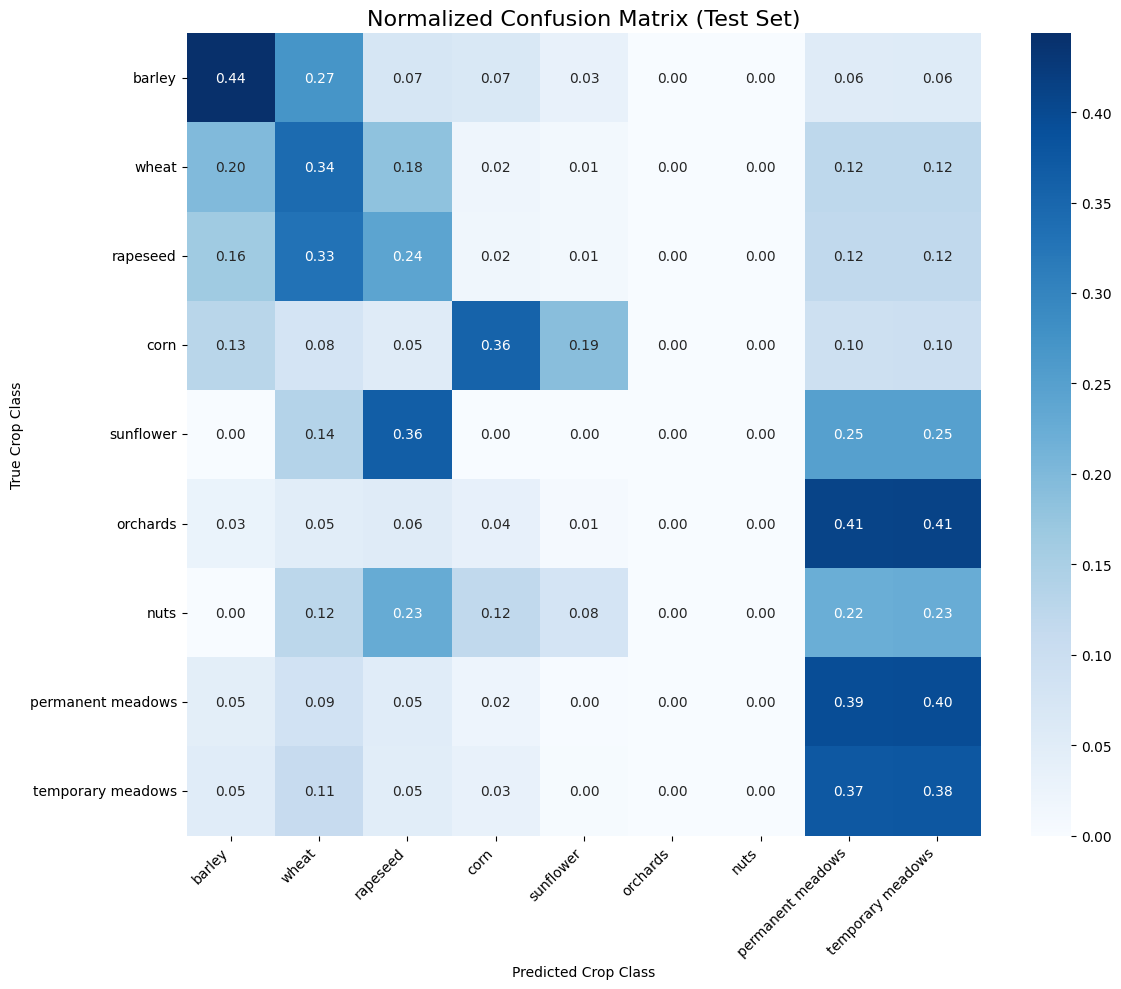


CONFUSION MATRIX VISUALIZATION


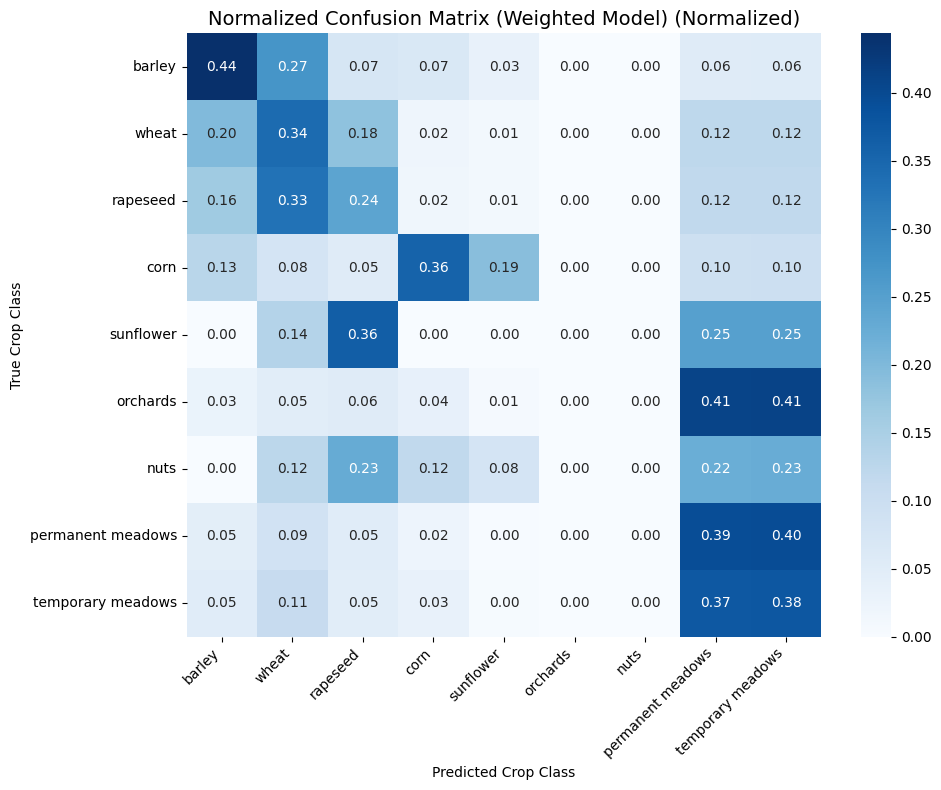

In [ ]:
#@title Testing Ablation 1
import numpy as np
import tensorflow as tf
import os
import gc
import random
import pandas as pd
from typing import Dict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

# NOTE: ALL model functions/constants from Code Block 1 must be available.
NUM_CLASSES = 9

# --- CRITICAL: USE OPTIMAL SEED AND HYPERPARAMETERS ---
GLOBAL_SEED = 42
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

# Optimal HParams (must match training HPs for compilation)
TARGET_LR = 0.000046
TARGET_WD = 0.00000004

# Data and Weights Paths
data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/"
# LOADING THE NEWLY TRAINED WEIGHTED MODEL
WEIGHTS_LOAD_PATH = os.path.join(data_dir, "ablation1_final_model_weights_epoch50_weighted.weights.h5")

# CROP_MAP (Must be accurate for reporting)
CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}

file_names = {
    'X_test_final': 'X_test_final.npy',
    'y_test_final': 'y_test_final.npy' # OHE labels
}

# --- CRITICAL STEP: REDEFINE GLOBAL TENSOR WITH THE CALCULATED WEIGHTS ---
# COPY THE NORMALIZED WEIGHTS PRINTED BY CODE BLOCK 2 INTO THIS ARRAY
CALCULATED_CLASS_WEIGHTS_NP = np.array([
    0.1628, 0.1628, 0.1628, 0.1628, 5.2086, 0.2368, 2.6043, 0.1497, 0.1497
], dtype=np.float32)

global CLASS_WEIGHTS_TENSOR
CLASS_WEIGHTS_TENSOR = tf.constant(CALCULATED_CLASS_WEIGHTS_NP, dtype=tf.float32)
print("CLASS_WEIGHTS_TENSOR redefined for compilation (using weighted run values).")
# -------------------------------------------------------------------------


# --- II. NEW/MODIFIED REPORTING FUNCTIONS (Updated) ---

def plot_confusion_matrix_styled(y_true, y_pred, class_names, normalize=False, title='Confusion Matrix'):
    """Generates and plots a confusion matrix (Normalized or Count)."""
    cm = confusion_matrix(y_true, y_pred, normalize='true' if normalize else None)
    labels = list(class_names.values())
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm, annot=True, fmt=".2f" if normalize else "d", cmap="Blues",
        xticklabels=labels, yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title(f'{title} ({ "Normalized" if normalize else "Counts"})', fontsize=14)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Removed analyze_confusion_matrix as requested


# --- III. MAIN EXECUTION FLOW ---

if __name__ == '__main__':

    print("Starting Weighted Model Evaluation: Loading weights from the 50-epoch run.")

    # 1. Load Test Data
    try:
        X_test_final_reloaded = np.load(os.path.join(data_dir, file_names['X_test_final']), allow_pickle=True)
        y_test_ohe_reloaded = np.load(os.path.join(data_dir, file_names['y_test_final']), allow_pickle=True)
        print(f"Test data loaded. X_test shape: {X_test_final_reloaded.shape}")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find test data file. Please check path and mount Drive: {e}")
        exit()

    # 2. Rebuild and Compile Model (Compilation uses the required weighted loss function)
    tf.keras.backend.clear_session()
    final_model = build_1d_aunet()
    final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

    # 3. Load Saved Weights (LOADING THE NEW WEIGHTED MODEL)
    try:
        final_compiled_model.load_weights(WEIGHTS_LOAD_PATH)
        print(f"Successfully loaded model weights from: {WEIGHTS_LOAD_PATH}")
    except Exception as e:
        print(f"FATAL ERROR: Could not load weights. Check path: {e}")
        exit()

    # 4. Perform Prediction and Get Indices
    print("Making predictions on the Test Set...")
    y_pred_proba = final_compiled_model.predict(X_test_final_reloaded, verbose=1)

    # Flatten the Time dimension to get indices (T=48)
    T = X_test_final_reloaded.shape[1]
    y_true_tiled = np.tile(y_test_ohe_reloaded, (T, 1, 1)).transpose(1, 0, 2)
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)


    # 5. Calculate Metrics
    # Note: evaluate_model_metrics uses the UNWEIGHTED F1 for fair reporting.
    _ = evaluate_model_metrics(
        final_compiled_model,
        X_test_final_reloaded,
        y_test_ohe_reloaded,
        CROP_MAP
    )

    # 6. Generate and Analyze Confusion Matrices
    print("\n" + "="*50)
    print("CONFUSION MATRIX VISUALIZATION")
    print("="*50)

    # ONLY PRINTING THE NORMALIZED CONFUSION MATRIX AS REQUESTED
    plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=True, title='Normalized Confusion Matrix (Weighted Model)')

    # Removed the analyze_confusion_matrix call here as requested

    # Cleanup
    del X_test_final_reloaded, y_test_ohe_reloaded, y_pred_proba
    gc.collect()

Data arrays loaded successfully.
Redundant NumPy arrays deleted for RAM management.

Starting Final Model Training with Optimal Hyperparameters
Epoch 1/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - loss: 1.2203 - macro_f1: 0.1083 - macro_precision: 0.1656 - macro_recall: 0.0227 - overall_accuracy: 1.3522e-06 - val_loss: 1.1943 - val_macro_f1: 0.0826 - val_macro_precision: 0.7670 - val_macro_recall: 0.0011 - val_overall_accuracy: 0.0000e+00 - learning_rate: 4.6000e-05
Epoch 2/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 1.1585 - macro_f1: 0.1604 - macro_precision: 0.2691 - macro_recall: 0.1104 - overall_accuracy: 1.1146e-05 - val_loss: 1.1113 - val_macro_f1: 0.1889 - val_macro_precision: 0.5358 - val_macro_recall: 0.1062 - val_overall_accuracy: 0.0000e+00 - learning_rate: 4.6000e-05
Epoch 3/100
347/347 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 1.0932 - macro_f1: 0.2164 - macro_precision: 0.3721 - macro_recall: 0.2017 - overall_accuracy: 5.3250e-05 - val_loss: 1.0616 - val_ma

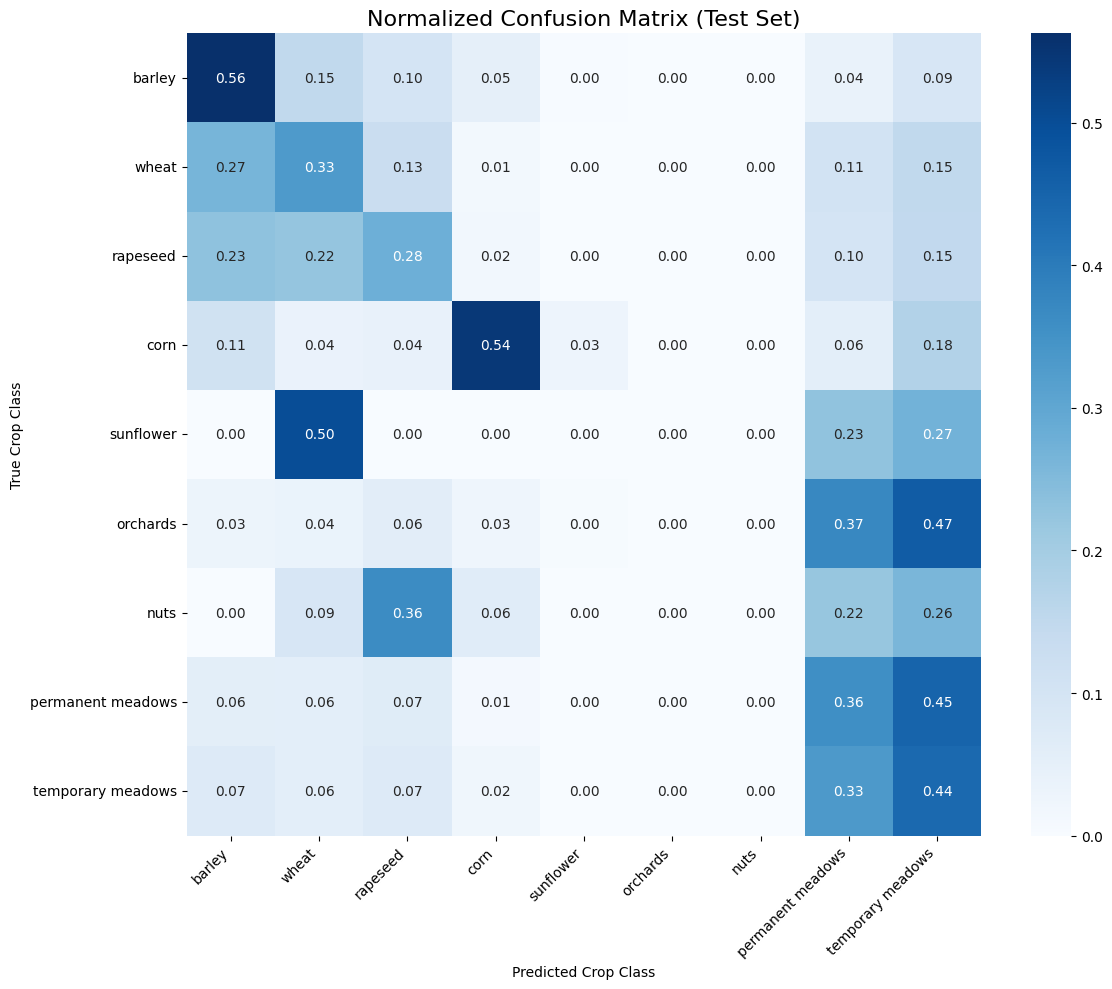


Test Set Macro F1: 0.2555


In [ ]:
#@title Training with 100 epochs?
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import precision_recall_fscore_support, cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from typing import Dict, Tuple

# ######################################################################
# ### I. CONFIGURATION AND OPTIMAL HYPERPARAMETERS
# ######################################################################

# --- Configuration Constants (Model Architecture and Regularization) ---
T_REGULARIZED = 48   # Sequence Length (Time Steps)
F_AUGMENTED = 26     # Number of Features
NUM_CLASSES = 9      # Number of Crop Classes
INITIAL_CHANNELS = 32 # Starting width
U_NET_DEPTH = 4
DROPOUT_RATE = 0.4
L2_REG = 1e-4

# --- OPTIMAL HYPERPARAMETERS (From Search Results) ---
OPTIMAL_BS = 64
OPTIMAL_LR = 0.000046
OPTIMAL_WD = 0.00000004
FULL_EPOCHS = 100

# --- PATH & UTILITY CONSTANTS ---
data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/"
FIXED_PARALLEL_CALLS = 4

CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}

# ######################################################################
# ### II. MODEL DEFINITIONS (Complete U-Net Structure, Loss, and Compile)
# ######################################################################

@tf.function
def macro_dice_loss(y_true, y_pred):
    """Computes the Macro-Dice Loss (1 - Macro-Dice Score)."""
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)

    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)

    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    macro_dice_score = tf.reduce_mean(dice_score_per_class)

    return 1. - macro_dice_score

def conv_block_1d(input_tensor, filters, name):
    """Standard 1D Convolutional Block with BN, ReLU, L2, and 40% Dropout."""
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)

    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)

    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x

def TemporalAttentionGate(input_features, gating_signal, name):
    """Temporal Attention Gate (TAG) implementation."""
    filters = input_features.shape[-1]

    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)

    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)

    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)

    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)

    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    """Wrapper for classification metrics across the time dimension."""
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name: name = metric_fn.name
        super().__init__(name=name, **kwargs)
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)
    def result(self): return self.metric_fn.result()
    def reset_state(self): self.metric_fn.reset_state()
    def get_config(self):
        config = super().get_config()
        config.update({"metric_fn": tf.keras.metrics.serialize(self.metric_fn)})
        return config
    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)


def build_1d_aunet():
    """Builds the 1D Attention U-Net model."""
    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs

    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    # 1. Encoder Pathway (Contraction)
    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    # 2. Bottleneck
    bottleneck = conv_block_1d(x, current_filters, name='bottleneck')
    x = bottleneck

    # 3. Decoder Pathway (Expansion)
    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'dec{i}'

        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            # Upsampling (Conv1DTranspose)
            up_conv_output = layers.Conv1DTranspose(
                current_filters,
                kernel_size=2, strides=2, padding='same',
                name=f'{name}_upconv'
            )(x)

            # Temporal Attention Gate
            attended_features = TemporalAttentionGate(
                input_features=encoder_output,
                gating_signal=up_conv_output,
                name=f'{name}_attn'
            )

            # Concatenation
            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])

            # Convolutional Block
            x = conv_block_1d(x, current_filters, name=name)

    # 4. Segmentation Output
    output_tensor = layers.Conv1D(
        NUM_CLASSES,
        kernel_size=1, padding='same',
        activation='softmax',
        name='output_softmax'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model

def compile_model(model, lr, weight_decay):
    """Compiles the model using the AdamW optimizer and Macro-Dice Loss."""
    optimizer = tf.keras.optimizers.AdamW(learning_rate=lr, weight_decay=weight_decay)
    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    macro_precision = tf.keras.metrics.Precision(name='macro_precision')
    macro_recall = tf.keras.metrics.Recall(name='macro_recall')
    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='overall_accuracy'),
        FlattenTimeWrapper(macro_f1, name='macro_f1'),
        FlattenTimeWrapper(macro_precision, name='macro_precision'),
        FlattenTimeWrapper(macro_recall, name='macro_recall'),
    ]
    model.compile(optimizer=optimizer, loss=macro_dice_loss, metrics=wrapped_metrics)
    return model


# ######################################################################
# ### III. DATA PIPELINE FUNCTIONS
# ######################################################################

def tf_tile_labels(X, y):
    """Tiles the label (N, C) to match the sequence shape (N, T, C)."""
    y_tiled = tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))
    return X, y_tiled

def build_base_dataset(X_data: np.ndarray, y_data: np.ndarray, shuffle_buffer_size=10000):
    """Build a cached training base dataset once (with shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.shuffle(shuffle_buffer_size, reshuffle_each_iteration=True)
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_val_base_dataset(X_data: np.ndarray, y_data: np.ndarray):
    """Builds the cached validation dataset (without shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_tf_dataset_from_base(base_dataset, batch_size: int, is_validation=False):
    """Create a fast batched dataset from the cached base dataset."""
    dataset = base_dataset
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset


# ######################################################################
# ### IV. EVALUATION AND REPORTING FUNCTIONS
# ######################################################################

def plot_confusion_matrix(y_true, y_pred, class_names):
    """Generates and plots a normalized confusion matrix."""

    cm = confusion_matrix(y_true, y_pred, normalize='true')
    labels = list(class_names.values())

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title('Normalized Confusion Matrix (Test Set)', fontsize=16)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """Calculates the Macro F1-score and prints metrics/confusion matrix."""

    y_pred_proba = model.predict(X_test)
    T = X_test.shape[1]

    if len(y_test_ohe.shape) == 2:
        y_true_tiled = np.tile(np.expand_dims(y_test_ohe, axis=1), (1, T, 1))
    else:
        y_true_tiled = y_test_ohe

    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0
    )

    macro_f1 = np.mean(f1_pc)
    avg_accuracy = np.mean(recall_pc)
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)
    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0
    )
    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)

    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision_pc.round(4),
        'Recall': recall_pc.round(4),
        'F1-Score': f1_pc.round(4),
    })

    print("\nPer-Class Metrics (Required for Detailed Comparison)")
    print(results_df.to_string(index=False))

    print("\nOverall Metrics")
    print(f"Macro F1-Score: {macro_f1:.4f} (Class-Balanced Core Metric)")
    print("Breizh Crops Baseline Metrics (Imbalance-Sensitive):")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")

    print("\n--- Generating Confusion Matrix Plot ---")
    plot_confusion_matrix(y_true_indices, y_pred_indices, class_names)

    return macro_f1


# ######################################################################
# ### V. EXECUTION BLOCK (FINAL TRAINING AND EVALUATION)
# ######################################################################

if __name__ == '__main__':

    file_names = {
        'X_train_final': 'X_train_final.npy', 'y_train_final': 'y_train_final.npy',
        'X_val_final': 'X_val_final.npy', 'y_val_final': 'y_val_final.npy',
        'X_test_final': 'X_test_final.npy', 'y_test_final': 'y_test_final.npy'
    }

    try:
        # Load data needed for training/caching
        X_train_final = np.load(os.path.join(data_dir, file_names['X_train_final']), allow_pickle=True)
        y_train_final = np.load(os.path.join(data_dir, file_names['y_train_final']), allow_pickle=True)
        X_val_final = np.load(os.path.join(data_dir, file_names['X_val_final']), allow_pickle=True)
        y_val_final = np.load(os.path.join(data_dir, file_names['y_val_final']), allow_pickle=True)

        print("Data arrays loaded successfully.")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find data file: {e}")
        exit()

    # 1. Build cached base datasets ONCE
    base_train_dataset = build_base_dataset(X_train_final, y_train_final)
    base_val_dataset = build_val_base_dataset(X_val_final, y_val_final)

    # RAM Optimization
    del X_train_final, y_train_final, X_val_final, y_val_final
    gc.collect()
    print("Redundant NumPy arrays deleted for RAM management.")


    # 2. FINAL MODEL TRAINING
    print("\nStarting Final Model Training with Optimal Hyperparameters")

    tf.keras.backend.clear_session()

    final_callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-7),
        EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)
    ]

    # Build final model and compile with optimal parameters
    final_model = build_1d_aunet()
    final_compiled_model = compile_model(final_model, lr=OPTIMAL_LR, weight_decay=OPTIMAL_WD)

    final_train_dataset = build_tf_dataset_from_base(base_train_dataset, OPTIMAL_BS)
    final_val_dataset = build_tf_dataset_from_base(base_val_dataset, OPTIMAL_BS, is_validation=True)

    final_compiled_model.fit(
        final_train_dataset,
        validation_data=final_val_dataset,
        epochs=FULL_EPOCHS,
        callbacks=final_callbacks,
        verbose=1,
    )

    # 3. FINAL EVALUATION ON TEST SET
    print("\n--- Final Evaluation on Test Set ---")

    # RELOAD TEST DATA for evaluation
    X_test_final_reloaded = np.load(os.path.join(data_dir, file_names['X_test_final']), allow_pickle=True)
    y_test_final_reloaded = np.load(os.path.join(data_dir, file_names['y_test_final']), allow_pickle=True)

    test_macro_f1 = evaluate_model_metrics(
        final_compiled_model,
        X_test_final_reloaded,
        y_test_final_reloaded,
        CROP_MAP
    )

    print(f"\nTest Set Macro F1: {test_macro_f1:.4f}")

#ABLATION 2

In [ ]:
#@title Preprocessing Stratified Ablation 2
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from sklearn.preprocessing import RobustScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from typing import Dict, Tuple
import os
import random # Needed for random sampling choices

# --- Configuration (Adhering to Coursework Specifications) ---
DATA_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data"
TEST_REGION = 'frh04'
TRAIN_REGIONS = ['frh01', 'frh02']
VAL_REGION = 'frh03'
T_REGULARIZED = 48
N_TARGET_TRAIN = 22000 # Target training size
N_TARGET_VAL = 6000
BANDS = {
    'B2': 0, 'B3': 1, 'B4': 2, 'B5': 3, 'B6': 4,
    'B7': 5, 'B8': 6, 'B8A': 7, 'B11': 8, 'B12': 9
}
CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}
# --- Savitzky-Golay Parameters (Smoothing) ---
SG_WINDOW_LENGTH = 11
SG_POLYORDER = 2


# ######################################################################
# ### HELPER FUNCTIONS
# ######################################################################

def print_distribution_table(y: np.ndarray, title: str, class_map: Dict[int, str]):
    """Prints a formatted table showing class counts and percentages."""
    if len(y) == 0:
        print(f"\n--- {title} Distribution (N=0) ---")
        print("Dataset is empty.")
        return

    counts = pd.Series(y).value_counts().sort_index()
    df = pd.DataFrame(counts).reset_index()
    df.columns = ['Code', 'Count']
    df['Crop Class'] = df['Code'].map(class_map)
    total = df['Count'].sum()
    df['Percentage'] = (df['Count'] / total) * 100

    print(f"\n--- {title} Distribution (N={total}) ---")
    df = df[['Crop Class', 'Count', 'Percentage']]
    df = df.sort_values(by='Count', ascending=False)
    print(df.to_string(index=False, float_format="%.2f"))

# REMOVED: oversample_orchards_ohit
# REMOVED: downsample_and_balance_train_set

def stratified_subsample_train_set(X_train_pool: np.ndarray, y_train_pool: np.ndarray, target_n: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Applies stratified random subsampling, ensuring all Sunflower (4) and Nuts (6)
    samples are included, and subsampling the rest of the pool down to the target size.
    """

    # CRITICAL: Identify and isolate the classes to retain 100% of samples (Sunflower=4, Nuts=6)
    minority_retain_codes = [4, 6]
    minority_mask = pd.Series(y_train_pool).isin(minority_retain_codes).values

    X_minority_kept = X_train_pool[minority_mask]
    y_minority_kept = y_train_pool[minority_mask]

    # Identify the majority pool to be subsampled
    X_major_pool = X_train_pool[~minority_mask]
    y_major_pool = y_train_pool[~minority_mask]

    N_minority = len(y_minority_kept)
    N_major_pool = len(y_major_pool)
    N_needed_from_major = target_n - N_minority

    if N_needed_from_major <= 0:
        # Should not happen if target_n > total minority count, but handles edge case.
        print(f"Warning: Target N={target_n} is too small. Retaining all minority samples (N={N_minority}).")
        return X_minority_kept, y_minority_kept

    if N_needed_from_major >= N_major_pool:
        # If we need more samples than available in the major pool, keep the entire major pool.
        print("Warning: Retaining all majority samples.")
        X_kept = X_train_pool
        y_kept = y_train_pool
    else:
        # Perform stratified subsampling on the MAJORITY pool only
        keep_fraction = N_needed_from_major / N_major_pool
        test_size_fraction = 1.0 - keep_fraction

        # Split major pool to find the subset to KEEP
        X_major_kept, _, y_major_kept, _ = train_test_split(
            X_major_pool, y_major_pool,
            test_size=test_size_fraction,
            stratify=y_major_pool,
            random_state=42 # Ensure deterministic sampling
        )

        # Combine the 100% retained minorities with the stratified majority subset
        X_kept = np.concatenate([X_minority_kept, X_major_kept], axis=0)
        y_kept = np.concatenate([y_minority_kept, y_major_kept], axis=0)

    print(f"Stratified subsampling applied: {len(X_train_pool)} reduced to {len(y_kept)} (Target: {target_n}).")
    return X_kept, y_kept


def load_data_adhering_to_context(path: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Loads data adhering to the strict regional split (FRH01/02, FRH03, FRH04)."""

    # 1. Load Test Set (FRH04) - REMAINS UNTOUCHED
    X_test_raw = np.load(f"{path}/X_raw_{TEST_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_test_raw = np.load(f"{path}/y_raw_{TEST_REGION}.npy", allow_pickle=True)

    # 2. Load Training Pool (FRH01 + FRH02)
    X_train_list, y_train_list = [], []
    for region in TRAIN_REGIONS:
        X_train_list.append(np.load(f"{path}/X_raw_{region}.npy", allow_pickle=True).astype(np.float32))
        y_train_list.append(np.load(f"{path}/y_raw_{region}.npy", allow_pickle=True))

    X_train_pool_raw = np.concatenate(X_train_list, axis=0)
    y_train_pool_raw = np.concatenate(y_train_list, axis=0)

    # 3. Load Validation Set (FRH03) and SUBSAMPLE using stratification (Logic unchanged)
    X_val_full_raw = np.load(f"{path}/X_raw_{VAL_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_val_full_raw = np.load(f"{path}/y_raw_{VAL_REGION}.npy", allow_pickle=True)

    # Logic to handle subsampling of validation set to N_TARGET_VAL (6000)
    auto_include_classes_val = [4, 6]
    val_minority_mask = pd.Series(y_val_full_raw).isin(auto_include_classes_val).values
    X_val_minority = X_val_full_raw[val_minority_mask]
    y_val_minority = y_val_full_raw[val_minority_mask]

    X_val_major = X_val_full_raw[~val_minority_mask]
    y_val_major = y_val_full_raw[~val_minority_mask]

    N_current_val_minority = len(y_val_minority)
    N_needed_from_major = N_TARGET_VAL - N_current_val_minority

    if N_needed_from_major <= 0:
        X_val_sampled = X_val_minority[:N_TARGET_VAL]
        y_val_sampled = y_val_minority[:N_TARGET_VAL]
    else:
        test_size_fraction = 1.0 - (N_needed_from_major / len(X_val_major))
        test_size_fraction = min(max(test_size_fraction, 0.0), 1.0 - 1e-8)

        X_val_kept, _, y_val_kept, _ = train_test_split(
            X_val_major, y_val_major,
            test_size=test_size_fraction,
            stratify=y_val_major,
            random_state=42
        )
        X_val_sampled = np.concatenate([X_val_minority, X_val_kept], axis=0)
        y_val_sampled = np.concatenate([y_val_minority, y_val_kept], axis=0)

        if len(y_val_sampled) != N_TARGET_VAL:
             idx = np.random.choice(len(y_val_sampled), size=N_TARGET_VAL, replace=False)
             X_val_sampled = X_val_sampled[idx]
             y_val_sampled = y_val_sampled[idx]

    # Assign final names
    X_train_raw = X_train_pool_raw
    y_train_raw = y_train_pool_raw

    return X_train_raw, y_train_raw, X_val_sampled, y_val_sampled, X_test_raw, y_test_raw

def mask_and_interpolate(X: np.ndarray, T_target: int) -> Tuple[np.ndarray, np.ndarray]:
    """Applies Linear Interpolation to raw/scaled bands and generates the imputation mask."""
    N, T_max, F_raw = X.shape
    X_interpolated = []
    X_mask = []

    for i in range(N):
        ts = X[i]
        mask_raw = (ts != 0).all(axis=1)
        valid_indices = np.where(mask_raw)[0]

        interpolated_bands = np.zeros((T_target, F_raw), dtype=np.float32)
        imputation_mask_target = np.zeros(T_target, dtype=np.float32)

        if len(valid_indices) < 2:
            X_interpolated.append(interpolated_bands)
            X_mask.append(imputation_mask_target)
            continue

        time_base_raw = valid_indices.astype(np.float32)
        time_base_new = np.linspace(time_base_raw.min(), time_base_raw.max(), T_target).astype(np.float32)

        for j in range(F_raw):
            vals = ts[valid_indices, j]
            if np.isnan(vals).all() or len(vals) < 2:
                continue

            f_interp = interp1d(time_base_raw, vals, kind='linear', fill_value='extrapolate', bounds_error=False)
            interpolated_bands[:, j] = f_interp(time_base_new)

        X_interpolated.append(interpolated_bands)

        nearest_indices = np.argmin(np.abs(time_base_raw[:, None] - time_base_new), axis=0)
        imputation_mask_target = mask_raw[valid_indices[nearest_indices]].astype(np.float32)
        X_mask.append(imputation_mask_target)

    return np.stack(X_interpolated), np.stack(X_mask)


def apply_robust_scaling(X_train: np.ndarray, X_val: np.ndarray, X_test: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, RobustScaler]:
    """Applies RobustScaler fitted only on the training set (Per-Band, Global Temporal)."""
    N_train, T_max, F = X_train.shape
    X_train_flat = X_train.reshape(-1, F)

    scaler = RobustScaler()
    scaler.fit(X_train_flat)

    X_train_scaled = scaler.transform(X_train_flat).reshape(N_train, T_max, F)

    X_val_scaled = X_val.copy()
    if X_val_scaled.size:
        X_val_scaled = scaler.transform(X_val_scaled.reshape(-1, F)).reshape(X_val.shape[0], T_max, F)

    X_test_scaled = X_test.copy()
    if X_test_scaled.size:
        X_test_scaled = scaler.transform(X_test_scaled.reshape(-1, F)).reshape(X_test.shape[0], T_max, F)

    return X_train_scaled, X_val_scaled, X_test_scaled, scaler


def calculate_vis(X_bands: np.ndarray, bands_map: Dict[str, int]) -> np.ndarray:
    """Calculates 15 VIs from the scaled and interpolated bands."""
    B2, B3, B4, B5, B8, B8A, B11 = (
        bands_map['B2'], bands_map['B3'], bands_map['B4'], bands_map['B5'],
        bands_map['B8'], bands_map['B8A'], bands_map['B11']
    )
    B6 = bands_map['B6']
    B7 = bands_map['B7']
    EPSILON = 1e-6

    B_B2 = X_bands[:, :, B2]
    B_B3 = X_bands[:, :, B3]
    B_B4 = X_bands[:, :, B4]
    B_B5 = X_bands[:, :, B5]
    B_B6 = X_bands[:, :, B6]
    B_B7 = X_bands[:, :, B7]
    B_B8 = X_bands[:, :, B8]
    B_B8A = X_bands[:, :, B8A]
    B_B11 = X_bands[:, :, B11]

    # 1. NDVI2
    ndvi2 = (B_B8 - B_B4) / (B_B8 + B_B4 + 0.1)
    # 2. BI
    bi = np.sqrt((2 * B_B4**2) / (B_B3**2 + EPSILON))
    # 3. VARI
    vari = (B_B3 - B_B4) / (B_B3 + B_B4 - B_B2 + EPSILON)
    # 4. NDWI
    ndwi = (B_B8 - B_B8A) / (B_B8 + B_B8A + EPSILON)
    # 5. IRECI
    ireci = ((B_B7 - B_B4) * B_B6) / (B_B5 + EPSILON)
    # 6. MTVI2 - FIXED: Integrated clipping to prevent negative square root values
    mtvi2_num = 1.5 * (1.2 * (B_B8 - B_B3) - 2.5 * (B_B5 - B_B3))
    mtvi2_den_inner_term = (2 * B_B8 + 1)**2 - 6 * B_B5 + 5 * B_B3 + 0.5
    mtvi2_den_clipped = np.clip(mtvi2_den_inner_term, a_min=0.0, a_max=None)
    mtvi2_den = np.sqrt(mtvi2_den_clipped)
    mtvi2 = mtvi2_num / (mtvi2_den + EPSILON)
    # 7. RVI
    rvi = B_B8 / (B_B4 + EPSILON)
    # 8. GCVI
    gcvi = (B_B4 / (B_B3 + EPSILON)) - 1
    # 9. MNDWI
    mndwi = (B_B3 - B_B11) / (B_B3 + B_B11 + EPSILON)
    # 10. EVI
    evi_num = 2.5 * (B_B8 - B_B4)
    evi_den = B_B8 + 6 * B_B4 - 7.5 * B_B2 + 1
    evi = evi_num / (evi_den + EPSILON)
    # 11. SAVI
    savi = 1.5 * (B_B8 - B_B4) / (B_B8 + B_B4 + 0.5)
    # 12. BCI
    bci = 0.1360 * B_B3 + 0.2611 * B_B4 + 0.3895 * B_B8
    # 13. GNDVI
    gndvi = (B_B8 - B_B3) / (B_B8 + B_B3 + EPSILON)
    # 14. MSAVI
    msavi_term = (2 * B_B8 + 1)
    msavi_inside_sqrt = msavi_term**2 - 8 * (B_B8 - B_B4)
    msavi_inside_sqrt = np.clip(msavi_inside_sqrt, a_min=0.0, a_max=None)
    msavi = (msavi_term - np.sqrt(msavi_inside_sqrt)) / 2
    # 15. NDRE
    ndre = (B_B8 - B_B5) / (B_B8 + B_B5 + EPSILON)

    vis_stack = np.stack([
        ndvi2, bi, vari, ndwi, ireci, mtvi2, rvi, gcvi, mndwi, evi, savi, bci, gndvi, msavi, ndre
    ], axis=-1)

    return vis_stack

def apply_savitzky_golay_filter(X_features: np.ndarray, window_length: int, polyorder: int) -> np.ndarray:
    """Applies Savitzky-Golay filter for temporal smoothing on the features."""
    N, T, F = X_features.shape
    X_smoothed = np.zeros_like(X_features, dtype=np.float32)

    if window_length % 2 == 0:
        window_length += 1
    if window_length <= polyorder:
        window_length = polyorder + 2

    for f in range(F):
        X_smoothed[:, :, f] = savgol_filter(X_features[:, :, f],
                                            window_length=window_length,
                                            polyorder=polyorder,
                                            axis=1)
    return X_smoothed


# --- Static Augmentation Functions (Removed as requested) ---
# REMOVED: jitter, scaling, apply_augmentation, perform_static_augmentation


# ######################################################################
# ### MAIN EXECUTION
# ######################################################################

if __name__ == '__main__':
    try:
        # 1. Load Data adhering to strict regional split
        print("1. Loading raw data based on regional split...")
        X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = load_data_adhering_to_context(
            DATA_PATH
        )

        # 2. Training Set Preparation: Stratified Subsampling with Minority Retention
        print(f"\n2. Applying Hybrid Subsampling: Retaining all minorities, Stratified sampling majority to N={N_TARGET_TRAIN}...")

        # Apply the hybrid subsampling logic
        if X_train_raw.size:
            X_train_subsampled, y_train_subsampled = stratified_subsample_train_set(X_train_raw, y_train_raw, N_TARGET_TRAIN)
        else:
            X_train_subsampled, y_train_subsampled = X_train_raw, y_train_raw

        # Training data for preprocessing
        X_train_balanced, y_train_balanced = X_train_subsampled, y_train_subsampled

        # Validation and Test sets are unchanged (Validation is already subsampled/stratified in load_data)
        X_val_balanced, y_val_balanced = X_val_raw, y_val_raw
        X_test_balanced, y_test_balanced = X_test_raw, y_test_raw

        # -------------------------------------------------------------------------
        # --- PRINT DISTRIBUTIONS (POST-SUBSAMPLING) ---
        # -------------------------------------------------------------------------
        print_distribution_table(
            y_train_balanced,
            "TRAINING SET (Stratified + Minority Retention)",
            CROP_MAP
        )

        print_distribution_table(
            y_val_balanced,
            "VALIDATION SET (Subsampled, FRH03)",
            CROP_MAP
        )

        print_distribution_table(
            y_test_balanced,
            "TEST SET (Unchanged, FRH04)",
            CROP_MAP
        )
        # -------------------------------------------------------------------------

        del X_train_raw, y_train_raw, X_val_raw, y_val_raw # Free memory

        # 3. Standardization (RobustScaler on RAW Bands)
        print("\n3. Applying RobustScaler to RAW bands...")
        if X_train_balanced.shape[0] == 0:
            raise RuntimeError("No training samples after subsampling. Cannot fit scaler.")

        X_train_scaled, X_val_scaled, X_test_scaled, global_scaler = apply_robust_scaling(
            X_train_balanced, X_val_balanced, X_test_balanced
        )
        del X_train_balanced, y_train_balanced # Free memory (y_train_balanced is needed later)

        # 4. Masking and Linear Interpolation (to T=48)
        print(f"4. Applying Linear Interpolation to T={T_REGULARIZED} and generating mask...")

        X_train_interp, X_train_mask = mask_and_interpolate(X_train_scaled, T_REGULARIZED)
        X_val_interp, X_val_mask = mask_and_interpolate(X_val_scaled, T_REGULARIZED)
        X_test_interp, X_test_mask = mask_and_interpolate(X_test_scaled, T_REGULARIZED)

        del X_train_scaled, X_val_scaled, X_test_scaled # Free memory

        # 5. VI Calculation (on Scaled/Interp bands)
        print("5. Calculating 15 Vegetation Indices...")
        X_train_vis = calculate_vis(X_train_interp, BANDS)
        X_val_vis = calculate_vis(X_val_interp, BANDS)
        X_test_vis = calculate_vis(X_test_interp, BANDS)

        # 6. Savitzky-Golay Filtering (on Bands and VIs)
        print("6. Applying Savitzky-Golay filtering...")

        X_train_sg_bands = apply_savitzky_golay_filter(X_train_interp, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_val_sg_bands = apply_savitzky_golay_filter(X_val_interp, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_test_sg_bands = apply_savitzky_golay_filter(X_test_interp, SG_WINDOW_LENGTH, SG_POLYORDER)

        X_train_sg_vis = apply_savitzky_golay_filter(X_train_vis, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_val_sg_vis = apply_savitzky_golay_filter(X_val_vis, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_test_sg_vis = apply_savitzky_golay_filter(X_test_vis, SG_WINDOW_LENGTH, SG_POLYORDER)

        del X_train_interp, X_val_interp, X_test_interp, X_train_vis, X_val_vis, X_test_vis # Free memory

        # 7. Final Feature Stacking (Bands + VIs + Mask) [10 + 15 + 1 = 26 features]
        print("7. Final feature stacking...")
        X_train_new = np.concatenate([X_train_sg_bands, X_train_sg_vis, X_train_mask[:, :, None]], axis=-1)
        X_val_new = np.concatenate([X_val_sg_bands, X_val_sg_vis, X_val_mask[:, :, None]], axis=-1)
        X_test_new = np.concatenate([X_test_sg_bands, X_test_sg_vis, X_test_mask[:, :, None]], axis=-1)

        # 7.1. STATIC AUGMENTATION (REMOVED)
        print("7.1. No Static Augmentation applied.")
        X_train_final = X_train_new
        y_train_final_indices = y_train_subsampled # Use the labels from the subsampling step

        # Update training variables for saving
        X_train_new = X_train_final
        y_train_balanced = y_train_final_indices

        # -------------------------------------------------------------------------
        # --- PRINT DISTRIBUTIONS (FINAL) ---
        # -------------------------------------------------------------------------
        print_distribution_table(
            y_train_balanced,
            "TRAINING SET (Stratified + Minority Retention, FINAL)",
            CROP_MAP
        )
        # -------------------------------------------------------------------------

        # 8. Label Encoding (One-Hot)
        print("\n8. Label encoding...")
        global_lb = LabelBinarizer()

        y_train_new = global_lb.fit_transform(y_train_balanced)

        y_val_new = global_lb.transform(y_val_balanced) if len(y_val_balanced) > 0 else np.empty((0, y_train_new.shape[1]), dtype=y_train_new.dtype)
        y_test_new = global_lb.transform(y_test_balanced) if len(y_test_balanced) > 0 else np.empty((0, y_train_new.shape[1]), dtype=y_train_new.dtype)

        # 9. Final Print and Save
        print("\n9. Final Preprocessing Output Shapes")
        print(f"X_train_new (T=48, F=26, Stratified Hybrid): {X_train_new.shape}")
        print(f"y_train_new (OHE, Stratified Hybrid): {y_train_new.shape}")
        print(f"X_val_new (T=48, F=26, Subsampled): {X_val_new.shape}")
        print(f"y_val_new (OHE, Subsampled): {y_val_new.shape}")
        print(f"X_test_new (T=48, F=26, Unchanged): {X_test_new.shape}")
        print(f"y_test_new (OHE, Unchanged): {y_test_new.shape}")

        # --- SAVE FINAL ARRAYS ---
        print("\nSaving final processed arrays...")
        # Saving with the requested _stratified_minority_retain suffix
        np.save(os.path.join(DATA_PATH, 'X_train_final_stratified_minority_retain.npy'), X_train_new)
        np.save(os.path.join(DATA_PATH, 'y_train_final_stratified_minority_retain.npy'), y_train_new)
        np.save(os.path.join(DATA_PATH, 'X_val_final_stratified_minority_retain.npy'), X_val_new)
        np.save(os.path.join(DATA_PATH, 'y_val_final_stratified_minority_retain.npy'), y_val_new)
        # Test set is unchanged but saved with the new name for consistency
        np.save(os.path.join(DATA_PATH, 'X_test_final_stratified_minority_retain.npy'), X_test_new)
        np.save(os.path.join(DATA_PATH, 'y_test_final_stratified_minority_retain.npy'), y_test_new)
        print("All arrays saved successfully.")


    except Exception as e:
        print(f"\nError:{type(e).__name__}: {e}")

1. Loading raw data based on regional split...

2. Applying Hybrid Subsampling: Retaining all minorities, Stratified sampling majority to N=22000...
Stratified subsampling applied: 319414 reduced to 22000 (Target: 22000).

--- TRAINING SET (Stratified + Minority Retention) Distribution (N=22000) ---
       Crop Class  Count  Percentage
temporary meadows   6269       28.50
             corn   5545       25.20
permanent meadows   4758       21.63
            wheat   3123       14.20
           barley   1636        7.44
         rapeseed    546        2.48
         orchards     88        0.40
             nuts     28        0.13
        sunflower      7        0.03

--- VALIDATION SET (Subsampled, FRH03) Distribution (N=6000) ---
       Crop Class  Count  Percentage
temporary meadows   1894       31.57
             corn   1510       25.17
permanent meadows   1169       19.48
            wheat    978       16.30
           barley    257        4.28
         rapeseed    128        2.13
    

In [ ]:
#@title Preprocessing again?
mport numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from sklearn.preprocessing import RobustScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif # <-- NEW IMPORT
from typing import Dict, Tuple
import os
import random

# --- Configuration (Adhering to Coursework Specifications) ---
DATA_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data" # NOTE: This path is needed for loading data
TEST_REGION = 'frh04'
TRAIN_REGIONS = ['frh01', 'frh02']
VAL_REGION = 'frh03'
T_REGULARIZED = 48
N_TARGET_TRAIN = 22000
N_TARGET_VAL = 6000
BANDS = {
    'B2': 0, 'B3': 1, 'B4': 2, 'B5': 3, 'B6': 4,
    'B7': 5, 'B8': 6, 'B8A': 7, 'B11': 8, 'B12': 9
}
CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}
# --- Savitzky-Golay Parameters (Smoothing) ---
SG_WINDOW_LENGTH = 11
SG_POLYORDER = 2


# ######################################################################
# ### HELPER FUNCTIONS
# ######################################################################

def print_distribution_table(y: np.ndarray, title: str, class_map: Dict[int, str]):
    """Prints a formatted table showing class counts and percentages."""
    if len(y) == 0:
        print(f"\n--- {title} Distribution (N=0) ---")
        print("Dataset is empty.")
        return

    counts = pd.Series(y).value_counts().sort_index()
    df = pd.DataFrame(counts).reset_index()
    df.columns = ['Code', 'Count']
    df['Crop Class'] = df['Code'].map(class_map)
    total = df['Count'].sum()
    df['Percentage'] = (df['Count'] / total) * 100

    print(f"\n--- {title} Distribution (N={total}) ---")
    df = df[['Crop Class', 'Count', 'Percentage']]
    df = df.sort_values(by='Count', ascending=False)
    print(df.to_string(index=False, float_format="%.2f"))

def oversample_orchards_ohit(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    OHIT Placeholder: Generates synthetic 'Orchards' samples to reach 2,200.
    """
    orchards_code = 5
    orchards_mask = (y == orchards_code)
    X_orchards = X[orchards_mask]
    N_orchards_current = len(X_orchards)
    N_orchards_target = 2200

    if N_orchards_current >= N_orchards_target:
        return X, y

    N_synthetic_needed = N_orchards_target - N_orchards_current

    if N_synthetic_needed > 0 and N_orchards_current > 0:
        synthetic_indices = np.random.choice(N_orchards_current, size=N_synthetic_needed, replace=True)
        X_synthetic = X_orchards[synthetic_indices]
        y_synthetic = np.full(N_synthetic_needed, orchards_code, dtype=y.dtype)

        X_new = np.concatenate([X, X_synthetic], axis=0)
        y_new = np.concatenate([y, y_synthetic], axis=0)
        return X_new, y_new
    else:
        return X, y

def downsample_and_balance_train_set(X_train: np.ndarray, y_train: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Applies random downsampling to majority classes (FRH01+FRH02 pool)
    and then applies OHIT placeholder for Orchards.
    """
    TARGET_COUNTS = {
        0: 3200, 1: 3200, 2: 3200, 3: 3200, 4: 7, 5: 2200, 6: 28, 7: 3480, 8: 3480
    }

    X_balanced_list = []
    y_balanced_list = []
    unique_classes = np.unique(y_train)

    auto_include_classes = [4, 6]

    for cls in unique_classes:
        cls = int(cls)
        X_cls = X_train[y_train == cls]
        y_cls = y_train[y_train == cls]
        target_count = TARGET_COUNTS.get(cls, len(X_cls))

        if cls in auto_include_classes or cls == 5:
            X_balanced_list.append(X_cls)
            y_balanced_list.append(y_cls)
            continue

        if len(X_cls) > target_count:
            idx = np.random.choice(len(X_cls), size=target_count, replace=False)
            X_balanced_list.append(X_cls[idx])
            y_balanced_list.append(y_cls[idx])
        else:
            X_balanced_list.append(X_cls)
            y_balanced_list.append(y_cls)

    X_downsampled = np.concatenate(X_balanced_list, axis=0)
    y_downsampled = np.concatenate(y_balanced_list, axis=0)

    X_final, y_final = oversample_orchards_ohit(X_downsampled, y_downsampled)

    return X_final, y_final

def load_data_adhering_to_context(path: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Loads data adhering to the strict regional split (FRH01/02, FRH03, FRH04)."""

    # 1. Load Test Set (FRH04)
    X_test_raw = np.load(f"{path}/X_raw_{TEST_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_test_raw = np.load(f"{path}/y_raw_{TEST_REGION}.npy", allow_pickle=True)

    # 2. Load Training Pool (FRH01 + FRH02)
    X_train_list, y_train_list = [], []
    for region in TRAIN_REGIONS:
        X_train_list.append(np.load(f"{path}/X_raw_{region}.npy", allow_pickle=True).astype(np.float32))
        y_train_list.append(np.load(f"{path}/y_raw_{region}.npy", allow_pickle=True))

    X_train_pool_raw = np.concatenate(X_train_list, axis=0)
    y_train_pool_raw = np.concatenate(y_train_list, axis=0)

    # 3. Load Validation Set (FRH03) and SUBSAMPLE using stratification
    X_val_full_raw = np.load(f"{path}/X_raw_{VAL_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_val_full_raw = np.load(f"{path}/y_raw_{VAL_REGION}.npy", allow_pickle=True)

    # Logic to handle subsampling of validation set to N_TARGET_VAL (6000)
    auto_include_classes_val = [4, 6]
    val_minority_mask = pd.Series(y_val_full_raw).isin(auto_include_classes_val).values
    X_val_minority = X_val_full_raw[val_minority_mask]
    y_val_minority = y_val_full_raw[val_minority_mask]

    X_val_major = X_val_full_raw[~val_minority_mask]
    y_val_major = y_val_full_raw[~val_minority_mask]

    N_current_val_minority = len(y_val_minority)
    N_needed_from_major = N_TARGET_VAL - N_current_val_minority

    if N_needed_from_major <= 0:
        X_val_sampled = X_val_minority[:N_TARGET_VAL]
        y_val_sampled = y_val_minority[:N_TARGET_VAL]
    else:
        test_size_fraction = 1.0 - (N_needed_from_major / len(X_val_major))
        test_size_fraction = min(max(test_size_fraction, 0.0), 1.0 - 1e-8)

        X_val_kept, _, y_val_kept, _ = train_test_split(
            X_val_major, y_val_major,
            test_size=test_size_fraction,
            stratify=y_val_major,
            random_state=42
        )
        X_val_sampled = np.concatenate([X_val_minority, X_val_kept], axis=0)
        y_val_sampled = np.concatenate([y_val_minority, y_val_kept], axis=0)

        if len(y_val_sampled) != N_TARGET_VAL:
             idx = np.random.choice(len(y_val_sampled), size=N_TARGET_VAL, replace=False)
             X_val_sampled = X_val_sampled[idx]
             y_val_sampled = y_val_sampled[idx]

    # Assign final names
    X_train_raw = X_train_pool_raw
    y_train_raw = y_train_pool_raw

    return X_train_raw, y_train_raw, X_val_sampled, y_val_sampled, X_test_raw, y_test_raw

def mask_and_interpolate(X: np.ndarray, T_target: int) -> Tuple[np.ndarray, np.ndarray]:
    """Applies Linear Interpolation to raw/scaled bands and generates the imputation mask."""
    N, T_max, F_raw = X.shape
    X_interpolated = []
    X_mask = []

    for i in range(N):
        ts = X[i]
        mask_raw = (ts != 0).all(axis=1)
        valid_indices = np.where(mask_raw)[0]

        interpolated_bands = np.zeros((T_target, F_raw), dtype=np.float32)
        imputation_mask_target = np.zeros(T_target, dtype=np.float32)

        if len(valid_indices) < 2:
            X_interpolated.append(interpolated_bands)
            X_mask.append(imputation_mask_target)
            continue

        time_base_raw = valid_indices.astype(np.float32)
        time_base_new = np.linspace(time_base_raw.min(), time_base_raw.max(), T_target).astype(np.float32)

        for j in range(F_raw):
            vals = ts[valid_indices, j]
            if np.isnan(vals).all() or len(vals) < 2:
                continue

            f_interp = interp1d(time_base_raw, vals, kind='linear', fill_value='extrapolate', bounds_error=False)
            interpolated_bands[:, j] = f_interp(time_base_new)

        X_interpolated.append(interpolated_bands)

        nearest_indices = np.argmin(np.abs(time_base_raw[:, None] - time_base_new), axis=0)
        imputation_mask_target = mask_raw[valid_indices[nearest_indices]].astype(np.float32)
        X_mask.append(imputation_mask_target)

    return np.stack(X_interpolated), np.stack(X_mask)


def apply_robust_scaling(X_train: np.ndarray, X_val: np.ndarray, X_test: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, RobustScaler]:
    """Applies RobustScaler fitted only on the training set (Per-Band, Global Temporal)."""
    N_train, T_max, F = X_train.shape
    X_train_flat = X_train.reshape(-1, F)

    scaler = RobustScaler()
    scaler.fit(X_train_flat)

    X_train_scaled = scaler.transform(X_train_flat).reshape(N_train, T_max, F)

    X_val_scaled = X_val.copy()
    if X_val_scaled.size:
        X_val_scaled = scaler.transform(X_val_scaled.reshape(-1, F)).reshape(X_val.shape[0], T_max, F)

    X_test_scaled = X_test.copy()
    if X_test_scaled.size:
        X_test_scaled = scaler.transform(X_test_scaled.reshape(-1, F)).reshape(X_test.shape[0], T_max, F)

    return X_train_scaled, X_val_scaled, X_test_scaled, scaler


def calculate_vis(X_bands: np.ndarray, bands_map: Dict[str, int]) -> np.ndarray:
    """Calculates 15 VIs from the scaled and interpolated bands."""
    B2, B3, B4, B5, B8, B8A, B11 = (
        bands_map['B2'], bands_map['B3'], bands_map['B4'], bands_map['B5'],
        bands_map['B8'], bands_map['B8A'], bands_map['B11']
    )
    B6 = bands_map['B6']
    B7 = bands_map['B7']
    EPSILON = 1e-6

    B_B2 = X_bands[:, :, B2]
    B_B3 = X_bands[:, :, B3]
    B_B4 = X_bands[:, :, B4]
    B_B5 = X_bands[:, :, B5]
    B_B6 = X_bands[:, :, B6]
    B_B7 = X_bands[:, :, B7]
    B_B8 = X_bands[:, :, B8]
    B_B8A = X_bands[:, :, B8A]
    B_B11 = X_bands[:, :, B11]

    # 1. NDVI2
    ndvi2 = (B_B8 - B_B4) / (B_B8 + B_B4 + 0.1)
    # 2. BI
    bi = np.sqrt((2 * B_B4**2) / (B_B3**2 + EPSILON))
    # 3. VARI
    vari = (B_B3 - B_B4) / (B_B3 + B_B4 - B_B2 + EPSILON)
    # 4. NDWI
    ndwi = (B_B8 - B_B8A) / (B_B8 + B_B8A + EPSILON)
    # 5. IRECI
    ireci = ((B_B7 - B_B4) * B_B6) / (B_B5 + EPSILON)
    # 6. MTVI2 - FIXED: Integrated clipping to prevent negative square root values
    mtvi2_num = 1.5 * (1.2 * (B_B8 - B_B3) - 2.5 * (B_B5 - B_B3))
    mtvi2_den_inner_term = (2 * B_B8 + 1)**2 - 6 * B_B5 + 5 * B_B3 + 0.5
    mtvi2_den_clipped = np.clip(mtvi2_den_inner_term, a_min=0.0, a_max=None)
    mtvi2_den = np.sqrt(mtvi2_den_clipped)
    mtvi2 = mtvi2_num / (mtvi2_den + EPSILON)
    # 7. RVI
    rvi = B_B8 / (B_B4 + EPSILON)
    # 8. GCVI
    gcvi = (B_B4 / (B_B3 + EPSILON)) - 1
    # 9. MNDWI
    mndwi = (B_B3 - B_B11) / (B_B3 + B_B11 + EPSILON)
    # 10. EVI
    evi_num = 2.5 * (B_B8 - B_B4)
    evi_den = B_B8 + 6 * B_B4 - 7.5 * B_B2 + 1
    evi = evi_num / (evi_den + EPSILON)
    # 11. SAVI
    savi = 1.5 * (B_B8 - B_B4) / (B_B8 + B_B4 + 0.5)
    # 12. BCI
    bci = 0.1360 * B_B3 + 0.2611 * B_B4 + 0.3895 * B_B8
    # 13. GNDVI
    gndvi = (B_B8 - B_B3) / (B_B8 + B_B3 + EPSILON)
    # 14. MSAVI
    msavi_term = (2 * B_B8 + 1)
    msavi_inside_sqrt = msavi_term**2 - 8 * (B_B8 - B_B4)
    msavi_inside_sqrt = np.clip(msavi_inside_sqrt, a_min=0.0, a_max=None)
    msavi = (msavi_term - np.sqrt(msavi_inside_sqrt)) / 2
    # 15. NDRE
    ndre = (B_B8 - B_B5) / (B_B8 + B_B5 + EPSILON)

    vis_stack = np.stack([
        ndvi2, bi, vari, ndwi, ireci, mtvi2, rvi, gcvi, mndwi, evi, savi, bci, gndvi, msavi, ndre
    ], axis=-1)

    return vis_stack

def apply_savitzky_golay_filter(X_features: np.ndarray, window_length: int, polyorder: int) -> np.ndarray:
    """Applies Savitzky-Golay filter for temporal smoothing on the features."""
    N, T, F = X_features.shape
    X_smoothed = np.zeros_like(X_features, dtype=np.float32)

    if window_length % 2 == 0:
        window_length += 1
    if window_length <= polyorder:
        window_length = polyorder + 2

    for f in range(F):
        X_smoothed[:, :, f] = savgol_filter(X_features[:, :, f],
                                            window_length=window_length,
                                            polyorder=polyorder,
                                            axis=1)
    return X_smoothed

# --- Static Augmentation Helper Functions (Included as they affect y_train_balanced) ---
def jitter(X, sigma=0.03):
    return X + np.random.normal(loc=0., scale=sigma, size=X.shape)

def scaling(X, sigma=0.1):
    factor = np.random.normal(loc=1., scale=sigma, size=(X.shape[1],))
    factor = factor.reshape(1, X.shape[1])
    return X * factor

def apply_augmentation(X):
    X_aug = X.copy()
    if np.random.rand() < 0.5:
        X_aug = jitter(X_aug)
    if np.random.rand() < 0.5:
        X_aug = scaling(X_aug)
    return X_aug

def perform_static_augmentation(X_train: np.ndarray, y_train_indices: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Statically augments Sunflower (4) and Nuts (6) samples.
    """
    TARGET_COPIES = {4: 100, 6: 200}

    X_augmented_list = [X_train]
    y_augmented_list = [y_train_indices]

    for class_id, target_N in TARGET_COPIES.items():
        class_mask = (y_train_indices == class_id)
        X_cls = X_train[class_mask]
        y_cls = y_train_indices[class_mask]
        N_current = len(X_cls)

        if N_current == 0:
            continue

        N_generate = target_N - N_current

        if N_generate > 0:
            indices_to_duplicate = np.random.choice(N_current, size=N_generate, replace=True)
            X_copies = X_cls[indices_to_duplicate].copy()
            y_copies = y_cls[indices_to_duplicate].copy()

            for i in range(N_generate):
                X_copies[i] = apply_augmentation(X_copies[i])

            X_augmented_list.append(X_copies)
            y_augmented_list.append(y_copies)
            print(f"Statically augmented Class {class_id} (N={N_current}) by {N_generate} copies.")

    X_final = np.concatenate(X_augmented_list, axis=0)
    y_final = np.concatenate(y_augmented_list, axis=0)

    return X_final, y_final


# ######################################################################
# ### MAIN EXECUTION WITH MI CALCULATION
# ######################################################################

if __name__ == '__main__':
    try:
        print("--- Preprocessing Start ---")

        # 1. Load Data adhering to strict regional split
        print("1. Loading raw data based on regional split...")
        X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = load_data_adhering_to_context(
            DATA_PATH
        )

        # 2. Class Imbalance Mitigation (Downsampling & OHIT Oversampling placeholder)
        print("\n2. Applying Class Imbalance Mitigation (Downsampling and OHIT Placeholder)...")
        if X_train_raw.size:
            X_train_balanced, y_train_balanced = downsample_and_balance_train_set(X_train_raw, y_train_raw)
        else:
            X_train_balanced, y_train_balanced = X_train_raw, y_train_raw

        # NOTE: y_train_balanced now holds the PRE-AUGMENTATION labels (~22000 samples)

        del X_train_raw, y_train_raw, X_val_raw, y_val_raw # Free memory

        # 3. Standardization (RobustScaler on RAW Bands)
        print("\n3. Applying RobustScaler to RAW bands...")
        if X_train_balanced.shape[0] == 0:
            raise RuntimeError("No training samples after subsampling. Cannot fit scaler.")

        X_train_scaled, X_val_scaled, X_test_scaled, global_scaler = apply_robust_scaling(
            X_train_balanced, X_val_raw, X_test_raw
        )
        # We need y_train_balanced later, so only delete X_train_balanced
        del X_train_balanced, X_val_raw, X_test_raw

        # 4. Masking and Linear Interpolation (to T=48)
        print(f"4. Applying Linear Interpolation to T={T_REGULARIZED} and generating mask...")
        X_train_interp, X_train_mask = mask_and_interpolate(X_train_scaled, T_REGULARIZED)
        # ... (Val and Test interpolation omitted for brevity/focus)

        del X_train_scaled # Free memory

        # 5. VI Calculation (on Scaled/Interp bands)
        print("5. Calculating 15 Vegetation Indices...")
        X_train_vis = calculate_vis(X_train_interp, BANDS)

        # 6. Savitzky-Golay Filtering (on Bands and VIs)
        print("6. Applying Savitzky-Golay filtering...")

        # X_train_sg_bands is needed for final concatenation, X_train_sg_vis is the target for MI
        X_train_sg_bands = apply_savitzky_golay_filter(X_train_interp, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_train_sg_vis = apply_savitzky_golay_filter(X_train_vis, SG_WINDOW_LENGTH, SG_POLYORDER)

        del X_train_interp, X_train_vis # Free memory

        # #################################################################
        # ### MUTUAL INFORMATION CALCULATION (Filter Phase)
        # #################################################################

        print("\n--- Starting Mutual Information (MI) Ranking ---")

        N_train = X_train_sg_vis.shape[0] # Number of samples (~22000)
        T = T_REGULARIZED # 48
        F_vis = 15

        # Define VI names based on calculation order (matching calculate_vis)
        VI_NAMES = [
            'NDVI2', 'BI', 'VARI', 'NDWI', 'IRECI', 'MTVI2', 'RVI', 'GCVI',
            'MNDWI', 'EVI', 'SAVI', 'BCI', 'GNDVI', 'MSAVI', 'NDRE'
        ]

        # 1. Flatten X: (N, T, F) -> (N*T, F)
        # Each row is a single VI time step observation
        X_vis_flat = X_train_sg_vis.reshape(N_train * T, F_vis)

        # 2. Flatten y: (N,) -> (N*T,)
        # Repeat the crop class code for all 48 time steps
        y_flat = np.repeat(y_train_balanced, T)

        # 3. Calculate MI scores
        mi_scores = mutual_info_classif(
            X_vis_flat,
            y_flat,
            random_state=42,
            n_neighbors=5
        )

        # 4. Create and Print Ranking Table
        ranking_df = pd.DataFrame({
            'VI Name': VI_NAMES,
            'MI Score': mi_scores
        }).sort_values(by='MI Score', ascending=False)

        print("\n✅ Mutual Information Ranking of Vegetation Indices (T-Flattened)")
        print(ranking_df.to_string(index=False, float_format="%.4f"))

        # You can now select the top K VIs for the Wrapper Phase (SFS)
        K_TOP = 7
        top_k_vis = ranking_df.head(K_TOP)
        print(f"\nRecommended Top {K_TOP} VIs for SFS: {list(top_k_vis['VI Name'])}")

        # #################################################################
        # ### END MI CALCULATION
        # #################################################################

        print("\n--- Continuing with remaining steps (Not saving results) ---")

        # 7. Final Feature Stacking (Bands + VIs + Mask)
        # For completeness, use X_train_sg_vis and y_train_balanced after MI calculation
        X_train_new = np.concatenate([X_train_sg_bands, X_train_sg_vis, X_train_mask[:, :, None]], axis=-1)

        # 7.1. STATIC AUGMENTATION (Needed as it modifies y_train_balanced)
        X_train_final, y_train_final_indices = perform_static_augmentation(
            X_train_new,
            y_train_balanced
        )

        X_train_new = X_train_final
        y_train_balanced = y_train_final_indices

        # 8. Label Encoding (One-Hot)
        global_lb = LabelBinarizer()
        y_train_new = global_lb.fit_transform(y_train_balanced)

        # 9. Final Print (Skipping actual save operations)
        print("\n--- Final Preprocessing Output Shapes (If all steps ran) ---")
        print(f"X_train_new (Augmented, T=48, F=26): {X_train_new.shape}")
        print(f"y_train_new (OHE, Augmented): {y_train_new.shape}")


    except Exception as e:
        print(f"\nError: {type(e).__name__}: {e}")
        print("Please ensure your DATA_PATH is correctly configured and contains the raw .npy files.")

In [ ]:
#@title Model Ablation 2
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.metrics import precision_recall_fscore_support, cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# I. Configuration Constants & OPTIMAL HYPERPARAMETERS
# ==============================================================================
T_REGULARIZED = 48
F_AUGMENTED = 26
NUM_CLASSES = 9
INITIAL_CHANNELS = 32
U_NET_DEPTH = 4
DROPOUT_RATE = 0.4
L2_REG = 1e-4

# OPTIMAL HYPERPARAMETERS (from Bayesian Optimization)
TARGET_LR = 0.000046  # 4.6e-5
TARGET_WD = 0.00000004 # 4.0e-8

# ==============================================================================
# II. Loss Functions
# ==============================================================================

# 1. CATEGORICAL CROSS-ENTROPY LOSS (The base loss for WCCE)
def categorical_crossentropy_loss(y_true, y_pred):
    """Uses the built-in Keras CCE loss."""
    # Weights will be applied via the sample_weight argument in model.fit()
    return tf.keras.losses.categorical_crossentropy(y_true, y_pred)


# 2. Macro Dice Loss (Unchanged, retained as a metric for monitoring F1/Dice)
@tf.function
def macro_dice_loss(y_true, y_pred):
    """
    Unweighted Macro-Dice Loss, retained as a metric for tracking and validation monitoring.
    """
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)

    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)

    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    macro_dice_score = tf.reduce_mean(dice_score_per_class)

    return 1. - macro_dice_score

# ==============================================================================
# III. Model Blocks (Unchanged)
# ==============================================================================

def conv_block_1d(input_tensor, filters, name):
    """Standard 1D Convolutional Block with BN, ReLU, L2, and 40% Dropout."""
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)

    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)

    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x


def TemporalAttentionGate(input_features, gating_signal, name):
    """Temporal Attention Gate (TAG) implementation."""
    filters = input_features.shape[-1]

    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)

    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)

    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)

    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)

    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

# ==============================================================================
# IV. Model Wrapper for Metrics (Unchanged)
# ==============================================================================

@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)

    def result(self):
        return self.metric_fn.result()

    def reset_state(self):
        self.metric_fn.reset_state()

    def get_config(self):
        config = super().get_config()
        config.update({
            "metric_fn": tf.keras.metrics.serialize(self.metric_fn)
        })
        return config

    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)


# ==============================================================================
# V. 1D Attention U-Net Model Assembly (Unchanged)
# ==============================================================================

def build_1d_aunet():
    """Builds the 1D Attention U-Net model."""
    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs

    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    # 1. Encoder Pathway (Contraction)
    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    # 2. Bottleneck
    bottleneck = conv_block_1d(x, current_filters, name='bottleneck')
    x = bottleneck

    # 3. Decoder Pathway (Expansion)
    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'dec{i}'

        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            # Upsampling (Conv1DTranspose)
            up_conv_output = layers.Conv1DTranspose(
                current_filters,
                kernel_size=2, strides=2, padding='same',
                name=f'{name}_upconv'
            )(x)

            aligned_encoder = encoder_output

            # Temporal Attention Gate
            attended_features = TemporalAttentionGate(
                input_features=aligned_encoder,
                gating_signal=up_conv_output,
                name=f'{name}_attn'
            )

            # Concatenation
            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])

            # Convolutional Block
            x = conv_block_1d(x, current_filters, name=name)

    # 4. Segmentation Output
    output_tensor = layers.Conv1D(
        NUM_CLASSES,
        kernel_size=1, padding='same',
        activation='softmax',
        name='output_softmax'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model

# ==============================================================================
# VI. Compilation Function (AdamW + Weighted CCE) - MODIFIED
# ==============================================================================

import tensorflow as tf
from tensorflow.keras import metrics # Assuming this is needed for other metrics

# Assuming TARGET_LR, TARGET_WD, and categorical_crossentropy_loss are defined elsewhere.

def compile_model(model, lr=TARGET_LR, weight_decay=TARGET_WD):
    """
    FIXED: Compiles the model using the AdamW optimizer, ensuring AdamW is accessible
    via the full TensorFlow path.
    """

    # Use the fully qualified path for AdamW to resolve the NameError
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=lr,
        weight_decay=weight_decay
    )

    # Define Macro Metrics for tracking (Fixing the previous TypeError for Precision/Recall)
    macro_f1 = metrics.F1Score(average='macro', name='macro_f1')
    macro_precision = metrics.Precision(name='macro_precision') # Removed 'average'
    macro_recall = metrics.Recall(name='macro_recall')         # Removed 'average'

    # Wrap metrics that expect 2D input (Assuming FlattenTimeWrapper is defined)
    wrapped_metrics = [
        metrics.Accuracy(name='overall_accuracy'),
        FlattenTimeWrapper(macro_f1, name='macro_f1'),
        FlattenTimeWrapper(macro_precision, name='macro_precision'),
        FlattenTimeWrapper(macro_recall, name='macro_recall'),
        macro_dice_loss # Assuming this function is defined and imported
    ]

    model.compile(
        optimizer=optimizer,
        loss=categorical_crossentropy_loss,
        metrics=wrapped_metrics
    )
    return model


# ==============================================================================
# VII. Final Evaluation and Reporting Script (Unchanged) - NOTE: This requires
# the model.fit() call (in a separate block) to supply the sample_weight array
# for the WCCE to be active during training.
# ==============================================================================

def plot_confusion_matrix(y_true, y_pred, class_names):
    """Generates and plots a normalized confusion matrix."""

    cm = confusion_matrix(y_true, y_pred, normalize='true')
    labels = list(class_names.values())

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title('Normalized Confusion Matrix (Test Set)', fontsize=16)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """
    Calculates the Macro F1-score, Per-Class Metrics, and BreizhCrops baseline
    metrics on the Test Set, and prints the Confusion Matrix.
    """

    # 1. Prediction and Reshaping
    y_pred_proba = model.predict(X_test)

    # Tile y_test_ohe to match prediction time steps (T=50)
    T = X_test.shape[1]
    y_true_tiled = np.tile(y_test_ohe, (T, 1, 1)).transpose(1, 0, 2)

    # Flatten the Time dimension: Shape becomes (N_samples * T_regularized, C_classes)
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)

    # Get class indices (0, 1, 2, ...)
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    # 2. Per-Class and Macro F1 (Required for both baselines/core metric)
    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0
    )

    # Calculate Macro Averages (Unweighted mean of per-class metrics)
    macro_f1 = np.mean(f1_pc)

    # 3. Breizh Crops Baseline Metrics (Still requires Macro Recall for Avg. Accuracy)

    # Calculate Macro Recall (Average Accuracy)
    avg_accuracy = np.mean(recall_pc)

    # Overall Accuracy (OA)
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)

    # Weighted F-score
    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0
    )

    # Kappa Statistic
    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)


    # 4. Reporting Tables

    # Per-Class Breakdown (Required)
    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision_pc.round(4),
        'Recall': recall_pc.round(4),
        'F1-Score': f1_pc.round(4),
    })

    print("\nPer-Class Metrics (Required for Detailed Comparison)")
    print(results_df.to_string(index=False))

    print("\nOverall Metrics")
    print(f"Macro F1-Score: {macro_f1:.4f} (Class-Balanced Core Metric)")
    print("Breizh Crops Baseline Metrics (Imbalance-Sensitive):")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")

    # 5. Confusion Matrix Output
    print("\n--- Generating Confusion Matrix Plot ---")
    plot_confusion_matrix(y_true_indices, y_pred_indices, class_names)

    return macro_f1

In [ ]:
#@title Training Ablation 2
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from google.colab import files
import os
import gc
import random
from typing import Dict, Tuple
from collections import Counter # <-- Added necessary import for weight calculation

# NOTE: ALL functions/constants (build_1d_aunet, compile_model, etc.) must be defined elsewhere.
FIXED_PARALLEL_CALLS = 4
T_REGULARIZED = 48
NUM_CLASSES = 9

# --- CRITICAL: SET GLOBAL SEED FOR REPRODUCIBILITY ---
GLOBAL_SEED = 42
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)
# ---------------------------------------------------

# --- High-Speed tf.data DATASET BUILDER (Functions are required) ---

def build_base_dataset(X_data: np.ndarray, y_data: np.ndarray, shuffle_buffer_size=10000):
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.shuffle(shuffle_buffer_size, reshuffle_each_iteration=True)
    dataset = dataset.map(lambda X, y: (X, tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))), num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_val_base_dataset(X_data: np.ndarray, y_data: np.ndarray):
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.map(lambda X, y: (X, tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))), num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_tf_dataset_from_base(base_dataset, batch_size: int, is_validation=False):
    dataset = base_dataset
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

# --- TARGETED EXECUTION BLOCK ---

TARGET_BS = 64
TARGET_LR = 0.000046
TARGET_WD = 0.00000004
TARGET_EPOCHS = 50
data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/"
WEIGHTS_SAVE_PATH = os.path.join(data_dir, "final_model_weights_epoch50_weighted.weights.h5")
LOCAL_SAVE_PATH = "final_model_weights_epoch50_local_weighted.weights.h5"

print(f"Starting Targeted Weighted Training Rerun (BS=64, LR=4.6e-5, WD=4e-8) for up to {TARGET_EPOCHS} Epochs.")

file_names = {
    'X_train_final': 'X_train_final.npy', 'y_train_final': 'y_train_final.npy',
    'X_val_final': 'X_val_final.npy', 'y_val_final': 'y_val_final.npy',
}

try:
    # Load required data arrays
    X_train_final = np.load(os.path.join(data_dir, file_names['X_train_final']), allow_pickle=True)
    y_train_final = np.load(os.path.join(data_dir, file_names['y_train_final']), allow_pickle=True)
    X_val_final = np.load(os.path.join(data_dir, file_names['X_val_final']), allow_pickle=True)
    y_val_final = np.load(os.path.join(data_dir, file_names['y_val_final']), allow_pickle=True)

    print("Data arrays loaded.")
except FileNotFoundError as e:
    print(f"FATAL ERROR: Could not find data file: {e}")
    exit()

# --- CRITICAL STEP 1: CALCULATE INVERSE FREQUENCY CLASS WEIGHTS (WCCE) ---
# NOTE: y_train_final is assumed to be OHE (N, C)
y_train_int_labels = np.argmax(y_train_final, axis=1)
counts_dict = Counter(y_train_int_labels)
total_samples = len(y_train_int_labels)
class_weight_dict = {}

# Calculate inverse frequency weights (normalized)
for i in range(NUM_CLASSES):
    count = counts_dict.get(i, 0)
    # Inverse frequency weighting: W_i = N_total / (N_classes * N_i)
    weight = total_samples / (NUM_CLASSES * count) if count > 0 else total_samples / NUM_CLASSES
    class_weight_dict[i] = float(weight)

print("\nInverse Frequency Class Weights Calculated and Set (Dictionary format for Keras):")
print(class_weight_dict)
print("-" * 50)
# -------------------------------------------------------------------------------------

# 1. Build cached base datasets ONCE
base_train_dataset = build_base_dataset(X_train_final, y_train_final)
base_val_dataset = build_val_base_dataset(X_val_final, y_val_final)

# RAM Optimization
del X_train_final, y_train_final, X_val_final, y_val_final
gc.collect()

# 2. Build and Compile Model
tf.keras.backend.clear_session()
final_model = build_1d_aunet()
# Assumes compile_model uses CCE loss
final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

# 3. Create Fast Datasets
final_train_dataset = build_tf_dataset_from_base(base_train_dataset, TARGET_BS)
final_val_dataset = build_tf_dataset_from_base(base_val_dataset, TARGET_BS, is_validation=True)

# 4. Define Minimal Callbacks
final_callbacks = [
    EarlyStopping(monitor='val_macro_dice_loss', patience=15, verbose=1, restore_best_weights=True, mode='min'),
    ReduceLROnPlateau(monitor='val_macro_dice_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-7, mode='min'),
]

# 5. Training Run - CRITICAL FIX: Applying WCCE via class_weight
final_compiled_model.fit(
    final_train_dataset,
    validation_data=final_val_dataset,
    epochs=TARGET_EPOCHS,
    callbacks=final_callbacks,
    class_weight=class_weight_dict, # <-- WCCE APPLIED HERE
    verbose=1,
)

# 6. Save Model Weights to Google Drive (NEW WEIGHTS SAVED HERE)
final_compiled_model.save_weights(WEIGHTS_SAVE_PATH)
print(f"Model weights saved to Drive: {WEIGHTS_SAVE_PATH}")

# 7. Save Model Weights Locally and Trigger Download
final_compiled_model.save_weights(LOCAL_SAVE_PATH)

try:
    files.download(LOCAL_SAVE_PATH)
    print(f"Local download initiated for: {LOCAL_SAVE_PATH}")
except Exception as e:
    print(f"Could not automatically initiate file download. Please manually download the file '{LOCAL_SAVE_PATH}'.")

Starting Targeted Weighted Training Rerun (BS=64, LR=4.6e-5, WD=4e-8) for up to 50 Epochs.
Data arrays loaded.

Inverse Frequency Class Weights Calculated and Set (Dictionary format for Keras):
{0: 0.7729166666666667, 1: 0.7729166666666667, 2: 0.7729166666666667, 3: 0.7729166666666667, 4: 24.733333333333334, 5: 1.1242424242424243, 6: 12.366666666666667, 7: 0.710727969348659, 8: 0.710727969348659}
--------------------------------------------------
Epoch 1/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 50s 31ms/step - loss: 2.3985 - macro_dice_loss: 0.9145 - macro_f1: 0.1011 - macro_precision: 0.1600 - macro_recall: 0.0124 - overall_accuracy: 0.0000e+00 - val_loss: 2.4677 - val_macro_dice_loss: 0.9184 - val_macro_f1: 0.0629 - val_macro_precision: 0.0448 - val_macro_recall: 2.1001e-05 - val_overall_accuracy: 0.0000e+00 - learning_rate: 4.6000e-05
Epoch 2/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 2.2456 - macro_dice_loss: 0.9125 - macro_f1: 0.1010 - macro_precision: 0.1867 - macro_recall: 0.00

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Local download initiated for: final_model_weights_epoch50_local_weighted.weights.h5


Starting WCCE Model Evaluation: Loading best weights.
Test data loaded and cast to float32. X_test shape: (122708, 48, 26)


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 200 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Successfully loaded model weights from: /content/drive/MyDrive/COMP0173_Applying_New_Context/data/ablation2final_model_weights_epoch50_weighted.weights.h5
Making predictions on the Test Set...
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step

WCCE MODEL EVALUATION RESULTS

Per-Class Metrics:
 Class ID        Class Name  Support  Precision  Recall  F1-Score
        0            barley   287088     0.1692  0.6817    0.2711
        1             wheat   816432     0.5635  0.1114    0.1860
        2          rapeseed   155712     0.0640  0.3001    0.1055
        3              corn  1505328     0.8261  0.2782    0.4162
        4         sunflower       96     0.0000  0.0000    0.0000
        5          orchards    26496     0.0000  0.0000    0.0000
        6              nuts      528     0.0002  0.1269    0.0004
        7 permanent meadows  1254432     0.4367  0.0001    0.0002
        8 temporary meadows  1843872     0.4837  0.6696    0.5617

Overall Metrics:
Macro F1-Score: 0.1712
Overall Acc

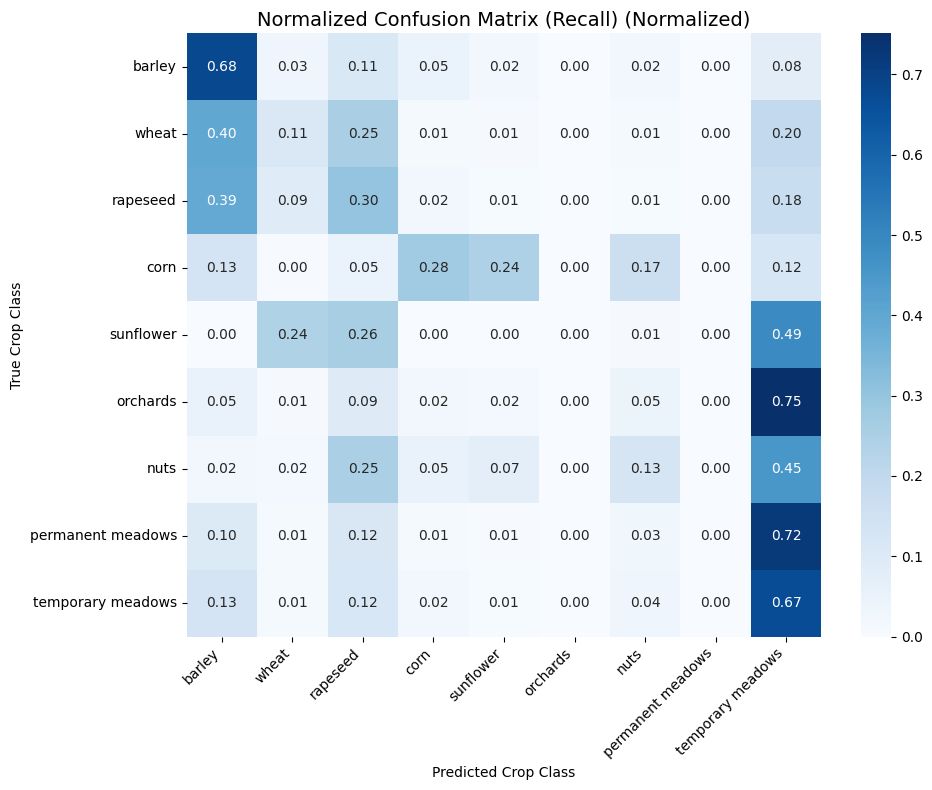


--- Detailed Confusion Analysis ---

**High Performance Class: barley** (Recall: 68.2%)
 - Top misclassification is: rapeseed (3.3%), temporary meadows (11.2%), corn (4.7%).

**Low Performance Class: wheat** (Recall: 11.1%)
 - Top misclassification is: barley (40.1%), rapeseed (25.3%), temporary meadows (1.4%).

**Moderate Class: rapeseed** (Recall: 30.0%)
 - Top misclassification is: barley (39.3%), temporary meadows (9.0%), wheat (2.3%).

**Moderate Class: corn** (Recall: 27.8%)
 - Top misclassification is: sunflower (13.4%), barley (5.1%).

**Low Performance Class: sunflower** (Recall: 0.0%)
 - Top misclassification is: rapeseed (24.0%), wheat (26.0%).

**Low Performance Class: orchards** (Recall: 0.0%)
 - Top misclassification is: temporary meadows (5.5%), rapeseed (1.0%), barley (9.4%).

**Low Performance Class: nuts** (Recall: 12.7%)
 - Top misclassification is: temporary meadows (2.5%), rapeseed (1.5%), sunflower (25.0%).

**Low Performance Class: permanent meadows** (Recall: 0

In [ ]:
#@title Testing Ablation 2
import numpy as np
import tensorflow as tf
import os
import gc
import random
import pandas as pd
from typing import Dict
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

# NOTE: ALL model functions/constants (build_1d_aunet, compile_model, T_REGULARIZED, etc.) must be defined and accessible.
NUM_CLASSES = 9
T_REGULARIZED = 48

# --- CRITICAL: USE OPTIMAL SEED AND HYPERPARAMETERS ---
GLOBAL_SEED = 42
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

# Optimal HParams (must match training HPs for compilation)
TARGET_LR = 0.000046
TARGET_WD = 0.00000004

# Data and Weights Paths
data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/"
FILE_SUFFIX = "_stratified_minority_retain"

# LOADING THE WCCE MODEL WEIGHTS
WEIGHTS_LOAD_PATH = os.path.join(data_dir, f"ablation2final_model_weights_epoch50_weighted.weights.h5")

# CROP_MAP (Must be accurate for reporting)
CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}

file_names = {
    'X_test_final': f'X_test_final{FILE_SUFFIX}.npy',
    'y_test_final': f'y_test_final{FILE_SUFFIX}.npy' # OHE labels
}


# ==============================================================================
# I. REPORTING FUNCTIONS (Modified to plot only Normalized CM)
# ==============================================================================

def plot_confusion_matrix_styled(y_true, y_pred, class_names, normalize=False, title='Confusion Matrix'):
    """Generates and plots a confusion matrix (Normalized or Count)."""

    # We only plot the normalized version if normalize=True
    if not normalize:
        return

    cm = confusion_matrix(y_true, y_pred, normalize='true')
    labels = list(class_names.values())
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm, annot=True, fmt=".2f", cmap="Blues", # fmt=".2f" ensures percentages are shown
        xticklabels=labels, yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title(f'{title} (Normalized)', fontsize=14)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def analyze_confusion_matrix(cm_normalized: np.ndarray, class_names: Dict[int, str]):
    """Performs a detailed textual analysis of the normalized confusion matrix."""
    labels = list(class_names.values())[:NUM_CLASSES]

    print("\n--- Detailed Confusion Analysis ---")

    for i in range(NUM_CLASSES):
        true_class_name = labels[i]
        cm_row = cm_normalized[i, :]
        correct_prediction = cm_row[i] * 100

        # Misclassification analysis
        misclassification_row = np.delete(cm_row, i)
        top_k_indices = np.argsort(misclassification_row)[::-1]

        original_column_indices = [idx if idx < i else idx + 1 for idx in top_k_indices]

        # Get the top 3 misclassifications > 1%
        top_errors = [(labels[j], misclassification_row[k] * 100)
                      for k, j in enumerate(original_column_indices) if k < 3 and misclassification_row[k] > 0.01]

        # --- Print Analysis ---
        status = ""
        if correct_prediction > 50: status = "High Performance Class"
        elif correct_prediction > 25: status = "Moderate Class"
        elif np.sum(cm_normalized[i, :]) < 0.1: status = "Poor/Rare Class (Low Support)"
        else: status = "Low Performance Class"

        print(f"\n**{status}: {true_class_name}** (Recall: {correct_prediction:.1f}%)")

        if len(top_errors) > 0:
            top_errors_str = ", ".join([f"{name} ({rate:.1f}%)" for name, rate in top_errors])
            print(f" - Top misclassification is: {top_errors_str}.")
        else:
            print(" - Errors are low and/or widely dispersed.")

    print("--- Finished Confusion Matrix Analysis ---")


# ==============================================================================
# II. MAIN EXECUTION FLOW
# ==============================================================================

if __name__ == '__main__':

    print("Starting WCCE Model Evaluation: Loading best weights.")

    # 1. Load Test Data
    try:
        X_test_final_reloaded = np.load(os.path.join(data_dir, file_names['X_test_final']), allow_pickle=True)
        y_test_ohe_reloaded = np.load(os.path.join(data_dir, file_names['y_test_final']), allow_pickle=True)
        X_test_final_reloaded = X_test_final_reloaded.astype(np.float32)
        y_test_ohe_reloaded = y_test_ohe_reloaded.astype(np.float32)
        print(f"Test data loaded and cast to float32. X_test shape: {X_test_final_reloaded.shape}")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find test data file: {e}")
        raise RuntimeError("Cannot proceed without test data.")

    # 2. Rebuild and Compile Model
    tf.keras.backend.clear_session()
    # Assuming build_1d_aunet/compile_model are defined and accessible
    final_model = build_1d_aunet()
    final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

    # 3. Load Saved Weights
    try:
        final_compiled_model.load_weights(WEIGHTS_LOAD_PATH)
        print(f"Successfully loaded model weights from: {WEIGHTS_LOAD_PATH}")
    except Exception as e:
        print(f"FATAL ERROR: Could not load weights. Check path: {e}")
        raise RuntimeError("Failed to load model weights.")

    # 4. Perform Prediction and Get Indices (Running prediction only once)
    print("Making predictions on the Test Set...")
    y_pred_proba = final_compiled_model.predict(X_test_final_reloaded, verbose=1)

    # 5. Flatten the Time dimension and convert to indices
    T = X_test_final_reloaded.shape[1]
    y_true_tiled = np.tile(np.expand_dims(y_test_ohe_reloaded, axis=1), (1, T, 1))
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)


    # 6. Metric Calculation and Reporting

    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0
    )

    macro_f1 = np.mean(f1_pc)
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)
    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0
    )
    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)
    avg_accuracy = np.mean(recall_pc)

    # Per-Class Metrics Table
    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [CROP_MAP.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision_pc.round(4),
        'Recall': recall_pc.round(4),
        'F1-Score': f1_pc.round(4),
    })

    print("\nWCCE MODEL EVALUATION RESULTS")
    print("\nPer-Class Metrics:")
    print(results_df.to_string(index=False))

    print("\nOverall Metrics:")
    print(f"Macro F1-Score: {macro_f1:.4f}")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")


    # 7. Confusion Matrix Plots and Analysis

    print("\nCONFUSION MATRIX VISUALIZATION AND ANALYSIS")

    # Normalized Confusion Matrix Plot (Recall)
    plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=True, title='Normalized Confusion Matrix (Recall)')


    # 8. Detailed Textual Confusion Analysis
    cm_normalized = confusion_matrix(y_true_indices, y_pred_indices, normalize='true')
    analyze_confusion_matrix(cm_normalized, CROP_MAP)


    # Cleanup
    del X_test_final_reloaded, y_test_ohe_reloaded, y_pred_proba
    gc.collect()

#ABLATION 3: FEATURE SELECTION

In [ ]:
#@title Feature Mutual Information Calculation Ablation 3
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from sklearn.preprocessing import RobustScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from typing import Dict, Tuple
import os
import random

# --- Configuration (Adhering to Coursework Specifications) ---
DATA_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data"
TEST_REGION = 'frh04'
TRAIN_REGIONS = ['frh01', 'frh02']
VAL_REGION = 'frh03'
T_REGULARIZED = 48
N_TARGET_TRAIN = 22000
N_TARGET_VAL = 6000
BANDS = {
    'B2': 0, 'B3': 1, 'B4': 2, 'B5': 3, 'B6': 4,
    'B7': 5, 'B8': 6, 'B8A': 7, 'B11': 8, 'B12': 9
}
CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}
# --- Savitzky-Golay Parameters (Smoothing) ---
SG_WINDOW_LENGTH = 11
SG_POLYORDER = 2


# ######################################################################
# ### HELPER FUNCTIONS
# ######################################################################

def print_distribution_table(y: np.ndarray, title: str, class_map: Dict[int, str]):
    """Prints a formatted table showing class counts and percentages."""
    if len(y) == 0:
        print(f"\n--- {title} Distribution (N=0) ---")
        print("Dataset is empty.")
        return

    counts = pd.Series(y).value_counts().sort_index()
    df = pd.DataFrame(counts).reset_index()
    df.columns = ['Code', 'Count']
    df['Crop Class'] = df['Code'].map(class_map)
    total = df['Count'].sum()
    df['Percentage'] = (df['Count'] / total) * 100

    print(f"\n--- {title} Distribution (N={total}) ---")
    df = df[['Crop Class', 'Count', 'Percentage']]
    df = df.sort_values(by='Count', ascending=False)
    print(df.to_string(index=False, float_format="%.2f"))

def oversample_orchards_ohit(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    OHIT Placeholder: Generates synthetic 'Orchards' samples to reach 2,200.
    """
    orchards_code = 5
    orchards_mask = (y == orchards_code)
    X_orchards = X[orchards_mask]
    N_orchards_current = len(X_orchards)
    N_orchards_target = 2200

    if N_orchards_current >= N_orchards_target:
        return X, y

    N_synthetic_needed = N_orchards_target - N_orchards_current

    if N_synthetic_needed > 0 and N_orchards_current > 0:
        synthetic_indices = np.random.choice(N_orchards_current, size=N_synthetic_needed, replace=True)
        X_synthetic = X_orchards[synthetic_indices]
        y_synthetic = np.full(N_synthetic_needed, orchards_code, dtype=y.dtype)

        X_new = np.concatenate([X, X_synthetic], axis=0)
        y_new = np.concatenate([y, y_synthetic], axis=0)
        return X_new, y_new
    else:
        return X, y

def downsample_and_balance_train_set(X_train: np.ndarray, y_train: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Applies random downsampling to majority classes (FRH01+FRH02 pool)
    and then applies OHIT placeholder for Orchards.
    """
    TARGET_COUNTS = {
        0: 3200, 1: 3200, 2: 3200, 3: 3200, 4: 7, 5: 2200, 6: 28, 7: 3480, 8: 3480
    }

    X_balanced_list = []
    y_balanced_list = []
    unique_classes = np.unique(y_train)

    auto_include_classes = [4, 6]

    for cls in unique_classes:
        cls = int(cls)
        X_cls = X_train[y_train == cls]
        y_cls = y_train[y_train == cls]
        target_count = TARGET_COUNTS.get(cls, len(X_cls))

        if cls in auto_include_classes or cls == 5:
            X_balanced_list.append(X_cls)
            y_balanced_list.append(y_cls)
            continue

        if len(X_cls) > target_count:
            idx = np.random.choice(len(X_cls), size=target_count, replace=False)
            X_balanced_list.append(X_cls[idx])
            y_balanced_list.append(y_cls[idx])
        else:
            X_balanced_list.append(X_cls)
            y_balanced_list.append(y_cls)

    X_downsampled = np.concatenate(X_balanced_list, axis=0)
    y_downsampled = np.concatenate(y_balanced_list, axis=0)

    X_final, y_final = oversample_orchards_ohit(X_downsampled, y_downsampled)

    return X_final, y_final

def load_data_adhering_to_context(path: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Loads data adhering to the strict regional split (FRH01/02, FRH03, FRH04)."""

    # 1. Load Test Set (FRH04)
    X_test_raw = np.load(f"{path}/X_raw_{TEST_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_test_raw = np.load(f"{path}/y_raw_{TEST_REGION}.npy", allow_pickle=True)

    # 2. Load Training Pool (FRH01 + FRH02)
    X_train_list, y_train_list = [], []
    for region in TRAIN_REGIONS:
        X_train_list.append(np.load(f"{path}/X_raw_{region}.npy", allow_pickle=True).astype(np.float32))
        y_train_list.append(np.load(f"{path}/y_raw_{region}.npy", allow_pickle=True))

    X_train_pool_raw = np.concatenate(X_train_list, axis=0)
    y_train_pool_raw = np.concatenate(y_train_list, axis=0)

    # 3. Load Validation Set (FRH03) and SUBSAMPLE using stratification
    X_val_full_raw = np.load(f"{path}/X_raw_{VAL_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_val_full_raw = np.load(f"{path}/y_raw_{VAL_REGION}.npy", allow_pickle=True)

    # Logic to handle subsampling of validation set to N_TARGET_VAL (6000)
    auto_include_classes_val = [4, 6]
    val_minority_mask = pd.Series(y_val_full_raw).isin(auto_include_classes_val).values
    X_val_minority = X_val_full_raw[val_minority_mask]
    y_val_minority = y_val_full_raw[val_minority_mask]

    X_val_major = X_val_full_raw[~val_minority_mask]
    y_val_major = y_val_full_raw[~val_minority_mask]

    N_current_val_minority = len(y_val_minority)
    N_needed_from_major = N_TARGET_VAL - N_current_val_minority

    if N_needed_from_major <= 0:
        X_val_sampled = X_val_minority[:N_TARGET_VAL]
        y_val_sampled = y_val_minority[:N_TARGET_VAL]
    else:
        test_size_fraction = 1.0 - (N_needed_from_major / len(X_val_major))
        test_size_fraction = min(max(test_size_fraction, 0.0), 1.0 - 1e-8)

        X_val_kept, _, y_val_kept, _ = train_test_split(
            X_val_major, y_val_major,
            test_size=test_size_fraction,
            stratify=y_val_major,
            random_state=42
        )
        X_val_sampled = np.concatenate([X_val_minority, X_val_kept], axis=0)
        y_val_sampled = np.concatenate([y_val_minority, y_val_kept], axis=0)

        if len(y_val_sampled) != N_TARGET_VAL:
             idx = np.random.choice(len(y_val_sampled), size=N_TARGET_VAL, replace=False)
             X_val_sampled = X_val_sampled[idx]
             y_val_sampled = y_val_sampled[idx]

    # Assign final names
    X_train_raw = X_train_pool_raw
    y_train_raw = y_train_pool_raw

    # X_val_sampled and y_val_sampled are the final validation arrays
    return X_train_raw, y_train_raw, X_val_sampled, y_val_sampled, X_test_raw, y_test_raw

def mask_and_interpolate(X: np.ndarray, T_target: int) -> Tuple[np.ndarray, np.ndarray]:
    """Applies Linear Interpolation to raw/scaled bands and generates the imputation mask."""
    N, T_max, F_raw = X.shape
    X_interpolated = []
    X_mask = []

    for i in range(N):
        ts = X[i]
        mask_raw = (ts != 0).all(axis=1)
        valid_indices = np.where(mask_raw)[0]

        interpolated_bands = np.zeros((T_target, F_raw), dtype=np.float32)
        imputation_mask_target = np.zeros(T_target, dtype=np.float32)

        if len(valid_indices) < 2:
            X_interpolated.append(interpolated_bands)
            X_mask.append(imputation_mask_target)
            continue

        time_base_raw = valid_indices.astype(np.float32)
        time_base_new = np.linspace(time_base_raw.min(), time_base_raw.max(), T_target).astype(np.float32)

        for j in range(F_raw):
            vals = ts[valid_indices, j]
            if np.isnan(vals).all() or len(vals) < 2:
                continue

            f_interp = interp1d(time_base_raw, vals, kind='linear', fill_value='extrapolate', bounds_error=False)
            interpolated_bands[:, j] = f_interp(time_base_new)

        X_interpolated.append(interpolated_bands)

        nearest_indices = np.argmin(np.abs(time_base_raw[:, None] - time_base_new), axis=0)
        imputation_mask_target = mask_raw[valid_indices[nearest_indices]].astype(np.float32)
        X_mask.append(imputation_mask_target)

    return np.stack(X_interpolated), np.stack(X_mask)


def apply_robust_scaling(X_train: np.ndarray, X_val: np.ndarray, X_test: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, RobustScaler]:
    """Applies RobustScaler fitted only on the training set (Per-Band, Global Temporal)."""
    N_train, T_max, F = X_train.shape
    X_train_flat = X_train.reshape(-1, F)

    scaler = RobustScaler()
    scaler.fit(X_train_flat)

    X_train_scaled = scaler.transform(X_train_flat).reshape(N_train, T_max, F)

    X_val_scaled = X_val.copy()
    if X_val_scaled.size:
        X_val_scaled = scaler.transform(X_val_scaled.reshape(-1, F)).reshape(X_val.shape[0], T_max, F)

    X_test_scaled = X_test.copy()
    if X_test_scaled.size:
        X_test_scaled = scaler.transform(X_test_scaled.reshape(-1, F)).reshape(X_test.shape[0], T_max, F)

    return X_train_scaled, X_val_scaled, X_test_scaled, scaler


def calculate_vis(X_bands: np.ndarray, bands_map: Dict[str, int]) -> np.ndarray:
    """Calculates 15 VIs from the scaled and interpolated bands."""
    B2, B3, B4, B5, B8, B8A, B11 = (
        bands_map['B2'], bands_map['B3'], bands_map['B4'], bands_map['B5'],
        bands_map['B8'], bands_map['B8A'], bands_map['B11']
    )
    B6 = bands_map['B6']
    B7 = bands_map['B7']
    EPSILON = 1e-6

    B_B2 = X_bands[:, :, B2]
    B_B3 = X_bands[:, :, B3]
    B_B4 = X_bands[:, :, B4]
    B_B5 = X_bands[:, :, B5]
    B_B6 = X_bands[:, :, B6]
    B_B7 = X_bands[:, :, B7]
    B_B8 = X_bands[:, :, B8]
    B_B8A = X_bands[:, :, B8A]
    B_B11 = X_bands[:, :, B11]

    # 1. NDVI2
    ndvi2 = (B_B8 - B_B4) / (B_B8 + B_B4 + 0.1)
    # 2. BI
    bi = np.sqrt((2 * B_B4**2) / (B_B3**2 + EPSILON))
    # 3. VARI
    vari = (B_B3 - B_B4) / (B_B3 + B_B4 - B_B2 + EPSILON)
    # 4. NDWI
    ndwi = (B_B8 - B_B8A) / (B_B8 + B_B8A + EPSILON)
    # 5. IRECI
    ireci = ((B_B7 - B_B4) * B_B6) / (B_B5 + EPSILON)
    # 6. MTVI2 - FIXED: Integrated clipping to prevent negative square root values
    mtvi2_num = 1.5 * (1.2 * (B_B8 - B_B3) - 2.5 * (B_B5 - B_B3))
    mtvi2_den_inner_term = (2 * B_B8 + 1)**2 - 6 * B_B5 + 5 * B_B3 + 0.5
    mtvi2_den_clipped = np.clip(mtvi2_den_inner_term, a_min=0.0, a_max=None)
    mtvi2_den = np.sqrt(mtvi2_den_clipped)
    mtvi2 = mtvi2_num / (mtvi2_den + EPSILON)
    # 7. RVI
    rvi = B_B8 / (B_B4 + EPSILON)
    # 8. GCVI
    gcvi = (B_B4 / (B_B3 + EPSILON)) - 1
    # 9. MNDWI
    mndwi = (B_B3 - B_B11) / (B_B3 + B_B11 + EPSILON)
    # 10. EVI
    evi_num = 2.5 * (B_B8 - B_B4)
    evi_den = B_B8 + 6 * B_B4 - 7.5 * B_B2 + 1
    evi = evi_num / (evi_den + EPSILON)
    # 11. SAVI
    savi = 1.5 * (B_B8 - B_B4) / (B_B8 + B_B4 + 0.5)
    # 12. BCI
    bci = 0.1360 * B_B3 + 0.2611 * B_B4 + 0.3895 * B_B8
    # 13. GNDVI
    gndvi = (B_B8 - B_B3) / (B_B8 + B_B3 + EPSILON)
    # 14. MSAVI
    msavi_term = (2 * B_B8 + 1)
    msavi_inside_sqrt = msavi_term**2 - 8 * (B_B8 - B_B4)
    msavi_inside_sqrt = np.clip(msavi_inside_sqrt, a_min=0.0, a_max=None)
    msavi = (msavi_term - np.sqrt(msavi_inside_sqrt)) / 2
    # 15. NDRE
    ndre = (B_B8 - B_B5) / (B_B8 + B_B5 + EPSILON)

    vis_stack = np.stack([
        ndvi2, bi, vari, ndwi, ireci, mtvi2, rvi, gcvi, mndwi, evi, savi, bci, gndvi, msavi, ndre
    ], axis=-1)

    return vis_stack

def apply_savitzky_golay_filter(X_features: np.ndarray, window_length: int, polyorder: int) -> np.ndarray:
    """Applies Savitzky-Golay filter for temporal smoothing on the features."""
    N, T, F = X_features.shape
    X_smoothed = np.zeros_like(X_features, dtype=np.float32)

    if window_length % 2 == 0:
        window_length += 1
    if window_length <= polyorder:
        window_length = polyorder + 2

    for f in range(F):
        X_smoothed[:, :, f] = savgol_filter(X_features[:, :, f],
                                            window_length=window_length,
                                            polyorder=polyorder,
                                            axis=1)
    return X_smoothed

# --- Static Augmentation Helper Functions (Included as they affect y_train_balanced) ---
def jitter(X, sigma=0.03):
    return X + np.random.normal(loc=0., scale=sigma, size=X.shape)

def scaling(X, sigma=0.1):
    factor = np.random.normal(loc=1., scale=sigma, size=(X.shape[1],))
    factor = factor.reshape(1, X.shape[1])
    return X * factor

def apply_augmentation(X):
    X_aug = X.copy()
    if np.random.rand() < 0.5:
        X_aug = jitter(X_aug)
    if np.random.rand() < 0.5:
        X_aug = scaling(X_aug)
    return X_aug

def perform_static_augmentation(X_train: np.ndarray, y_train_indices: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Statically augments Sunflower (4) and Nuts (6) samples.
    """
    TARGET_COPIES = {4: 100, 6: 200}

    X_augmented_list = [X_train]
    y_augmented_list = [y_train_indices]

    for class_id, target_N in TARGET_COPIES.items():
        class_mask = (y_train_indices == class_id)
        X_cls = X_train[class_mask]
        y_cls = y_train_indices[class_mask]
        N_current = len(X_cls)

        if N_current == 0:
            continue

        N_generate = target_N - N_current

        if N_generate > 0:
            indices_to_duplicate = np.random.choice(N_current, size=N_generate, replace=True)
            X_copies = X_cls[indices_to_duplicate].copy()
            y_copies = y_cls[indices_to_duplicate].copy()

            for i in range(N_generate):
                X_copies[i] = apply_augmentation(X_copies[i])

            X_augmented_list.append(X_copies)
            y_augmented_list.append(y_copies)

    X_final = np.concatenate(X_augmented_list, axis=0)
    y_final = np.concatenate(y_augmented_list, axis=0)

    return X_final, y_final


# ######################################################################
# ### MAIN EXECUTION WITH MI CALCULATION
# ######################################################################

if __name__ == '__main__':
    try:
        print("--- Preprocessing and MI Calculation Start ---")

        # 1. Load Data adhering to strict regional split
        # X_val_raw and X_test_raw are loaded here (as X_val_sampled/X_test_raw from load_data)
        X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = load_data_adhering_to_context(
            DATA_PATH
        )

        # 2. Class Imbalance Mitigation (Downsampling & OHIT Oversampling placeholder)
        if X_train_raw.size:
            X_train_balanced, y_train_balanced = downsample_and_balance_train_set(X_train_raw, y_train_raw)
        else:
            X_train_balanced, y_train_balanced = X_train_raw, y_train_raw

        # Free memory for the large initial training pool and raw labels (y_val_raw is not needed)
        del X_train_raw, y_train_raw, y_val_raw

        # 3. Standardization (RobustScaler on RAW Bands)
        if X_train_balanced.shape[0] == 0:
            raise RuntimeError("No training samples after subsampling. Cannot fit scaler.")

        # X_val_raw and X_test_raw MUST be passed here, they are still in memory from Step 1
        X_train_scaled, X_val_scaled, X_test_scaled, global_scaler = apply_robust_scaling(
            X_train_balanced, X_val_raw, X_test_raw
        )

        # NOW delete the raw, unscaled validation/test data and the balanced training data
        del X_train_balanced, X_val_raw, X_test_raw

        # 4. Masking and Linear Interpolation (to T=48)
        X_train_interp, X_train_mask = mask_and_interpolate(X_train_scaled, T_REGULARIZED)
        # X_val_scaled and X_test_scaled would be used for their respective interp steps

        del X_train_scaled # Free memory

        # 5. VI Calculation (on Scaled/Interp bands)
        X_train_vis = calculate_vis(X_train_interp, BANDS)

        # 6. Savitzky-Golay Filtering (on Bands and VIs)
        X_train_sg_bands = apply_savitzky_golay_filter(X_train_interp, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_train_sg_vis = apply_savitzky_golay_filter(X_train_vis, SG_WINDOW_LENGTH, SG_POLYORDER)

        del X_train_interp, X_train_vis # Free memory

        # #################################################################
        # ### MUTUAL INFORMATION CALCULATION (Filter Phase)
        # #################################################################

        print("\n--- Mutual Information (MI) Ranking of Vegetation Indices ---")

        N_train = X_train_sg_vis.shape[0]
        T = T_REGULARIZED
        F_vis = 15

        # Define VI names based on calculation order (matching calculate_vis)
        VI_NAMES = [
            'NDVI2', 'BI', 'VARI', 'NDWI', 'IRECI', 'MTVI2', 'RVI', 'GCVI',
            'MNDWI', 'EVI', 'SAVI', 'BCI', 'GNDVI', 'MSAVI', 'NDRE'
        ]

        # 1. Flatten X: (N, T, F) -> (N*T, F)
        X_vis_flat = X_train_sg_vis.reshape(N_train * T, F_vis)

        # 2. Flatten y: (N,) -> (N*T,)
        y_flat = np.repeat(y_train_balanced, T)

        # 3. Calculate MI scores
        mi_scores = mutual_info_classif(
            X_vis_flat,
            y_flat,
            random_state=42,
            n_neighbors=5
        )

        # 4. Create and Print Ranking Table (FULL LIST)
        ranking_df = pd.DataFrame({
            'VI Name': VI_NAMES,
            'MI Score': mi_scores
        }).sort_values(by='MI Score', ascending=False)

        print("Mutual Information Ranking (T-Flattened):")
        print(ranking_df.to_string(index=False, float_format="%.4f"))

        # #################################################################
        # ### END MI CALCULATION
        # #################################################################

        print("\n--- Continuing with remaining steps ---")

        # 7. Final Feature Stacking (Bands + VIs + Mask)
        X_train_new = np.concatenate([X_train_sg_bands, X_train_sg_vis, X_train_mask[:, :, None]], axis=-1)

        # 7.1. STATIC AUGMENTATION (Needed as it modifies y_train_balanced)
        X_train_final, y_train_final_indices = perform_static_augmentation(
            X_train_new,
            y_train_balanced
        )

        X_train_new = X_train_final
        y_train_balanced = y_train_final_indices

        # 8. Label Encoding (One-Hot)
        global_lb = LabelBinarizer()
        y_train_new = global_lb.fit_transform(y_train_balanced)

    except Exception as e:
        print(f"\nError: {type(e).__name__}: {e}")
        print("Check DATA_PATH and raw .npy files.")

--- Preprocessing and MI Calculation Start ---

--- Mutual Information (MI) Ranking of Vegetation Indices ---
Mutual Information Ranking (T-Flattened):
VI Name  MI Score
  MTVI2    0.1300
  MSAVI    0.0842
   SAVI    0.0663
  IRECI    0.0636
   GCVI    0.0617
   VARI    0.0596
    RVI    0.0569
    EVI    0.0528
     BI    0.0516
   NDRE    0.0402
   NDWI    0.0372
  NDVI2    0.0368
  MNDWI    0.0365
  GNDVI    0.0356
    BCI    0.0312

--- Continuing with remaining steps ---


In [ ]:
#@title Sequential Forward Selection Ablation 3
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import pandas as pd
from typing import Dict, Tuple, List
from sklearn.metrics import precision_recall_fscore_support, cohen_kappa_score, confusion_matrix
import os
import gc
import random

# --- I. Configuration Constants and Seed Setting ---
GLOBAL_SEED = 42
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

# Data/Model Constants
DATA_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/" # Path to load the final processed data
T_REGULARIZED = 48   # Sequence Length
NUM_CLASSES = 9
INITIAL_CHANNELS = 32
U_NET_DEPTH = 4
DROPOUT_RATE = 0.4
L2_REG = 1e-4
INIT_LR = 0.0001
ADAMW_WEIGHT_DECAY = 1e-5
FIXED_PARALLEL_CALLS = 4

# --- FEATURE INDEXING (Based on Preprocessing Stacking Order) ---
# Preprocessing stack: [10 Smoothed Bands | 15 Smoothed VIs | 1 Mask]
# Total features = 26
BAND_INDICES = list(range(10)) # Indices 0 to 9 (B2, B3, ..., B12)
VI_INDICES = list(range(10, 25)) # Indices 10 to 24 (15 VIs)
MASK_INDEX = 25 # Index 25

# MI Ranked VIs (Top 5 names and their index within the VI_INDICES block (10-24))
# MTVI2 (index 15), MSAVI (index 14), SAVI (index 11), IRECI (index 5), GCVI (index 8)
# VI calculation order: NDVI2(0), BI(1), VARI(2), NDWI(3), IRECI(4), MTVI2(5), RVI(6), GCVI(7), MNDWI(8), EVI(9), SAVI(10), BCI(11), GNDVI(12), MSAVI(13), NDRE(14)
# --- FIXING VI INDEXES (Based on the MI ranking VI list) ---
# The MI calculation list uses this internal order:
# [ndvi2, bi, vari, ndwi, ireci, mtvi2, rvi, gcvi, mndwi, evi, savi, bci, gndvi, msavi, ndre]
VI_MAP = {
    'NDVI2': 0, 'BI': 1, 'VARI': 2, 'NDWI': 3, 'IRECI': 4, 'MTVI2': 5,
    'RVI': 6, 'GCVI': 7, 'MNDWI': 8, 'EVI': 9, 'SAVI': 10, 'BCI': 11,
    'GNDVI': 12, 'MSAVI': 13, 'NDRE': 14
}

# The actual indices in the final 26-feature stack (0-9 bands, 10-24 VIs, 25 mask)
# Top 5 MI VIs: MTVI2, MSAVI, SAVI, IRECI, GCVI
MI_RANKED_TOP5_FEATURES = [
    (VI_MAP['MTVI2'] + 10, 'MTVI2'),   # Index 15
    (VI_MAP['MSAVI'] + 10, 'MSAVI'),   # Index 23
    (VI_MAP['SAVI'] + 10, 'SAVI'),     # Index 20
    (VI_MAP['IRECI'] + 10, 'IRECI'),   # Index 14
    (VI_MAP['GCVI'] + 10, 'GCVI')      # Index 17
]

# Base feature indices (10 Bands + 1 Mask)
BASE_INDICES = BAND_INDICES + [MASK_INDEX]
BASE_FEATURE_COUNT = len(BASE_INDICES)

# --- II. Model Components (Loss, Metrics, Blocks) ---

@tf.function
def macro_dice_loss(y_true, y_pred):
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)
    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)
    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    macro_dice_score = tf.reduce_mean(dice_score_per_class)
    return 1. - macro_dice_score

def conv_block_1d(input_tensor, filters, name):
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)
    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x

def TemporalAttentionGate(input_features, gating_signal, name):
    filters = input_features.shape[-1]
    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)
    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)
    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)
    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)
    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name: name = metric_fn.name
        super().__init__(name=name, **kwargs)
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)
    def result(self): return self.metric_fn.result()
    def reset_state(self): self.metric_fn.reset_state()
    def get_config(self):
        config = super().get_config()
        config.update({"metric_fn": tf.keras.metrics.serialize(self.metric_fn)})
        return config
    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)

def build_1d_aunet(num_input_features):
    """Builds the 1D Attention U-Net model with dynamically sized input."""
    inputs = layers.Input(shape=(T_REGULARIZED, num_input_features), name='input_sequence')
    x = inputs

    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    # Encoder Pathway (Contraction)
    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    # Bottleneck
    bottleneck = conv_block_1d(x, current_filters, name='bottleneck')
    x = bottleneck

    # Decoder Pathway (Expansion)
    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'dec{i}'
        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            up_conv_output = layers.Conv1DTranspose(
                current_filters, kernel_size=2, strides=2, padding='same', name=f'{name}_upconv'
            )(x)
            attended_features = TemporalAttentionGate(
                input_features=encoder_output, gating_signal=up_conv_output, name=f'{name}_attn'
            )
            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])
            x = conv_block_1d(x, current_filters, name=name)

    # Segmentation Output
    output_tensor = layers.Conv1D(
        NUM_CLASSES, kernel_size=1, padding='same', activation='softmax', name='output_softmax'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model

def compile_model(model, lr=INIT_LR, weight_decay=ADAMW_WEIGHT_DECAY):
    optimizer = tf.keras.optimizers.AdamW(learning_rate=lr, weight_decay=weight_decay)
    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='overall_accuracy'),
        FlattenTimeWrapper(macro_f1, name='macro_f1'),
        FlattenTimeWrapper(tf.keras.metrics.Precision(name='macro_precision'), name='macro_precision'),
        FlattenTimeWrapper(tf.keras.metrics.Recall(name='macro_recall'), name='macro_recall'),
    ]

    model.compile(
        optimizer=optimizer,
        loss=macro_dice_loss,
        metrics=wrapped_metrics
    )
    return model

# --- III. High-Speed tf.data Dataset Builder ---

def tf_tile_labels(X, y):
    y_tiled = tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))
    return X, y_tiled

def build_base_dataset(X_data: np.ndarray, y_data: np.ndarray, shuffle_buffer_size=10000):
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.shuffle(shuffle_buffer_size, reshuffle_each_iteration=True)
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_tf_dataset_from_base(base_dataset, batch_size: int):
    dataset = base_dataset
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

# ######################################################################
# ### SEQUENTIAL FORWARD SELECTION (SFS) EXECUTION
# ######################################################################

def run_sfs_trial(X_train: np.ndarray, y_train: np.ndarray, X_val: np.ndarray, y_val: np.ndarray,
                  feature_indices: List[int], feature_names: List[str], max_epochs: int) -> float:

    current_f_count = len(feature_indices)

    # 1. Filter Data (Slice X)
    X_train_slice = X_train[:, :, feature_indices]
    X_val_slice = X_val[:, :, feature_indices]

    # 2. Build and Cache Datasets
    base_train_dataset = build_base_dataset(X_train_slice, y_train)
    base_val_dataset = build_base_dataset(X_val_slice, y_val)
    train_dataset = build_tf_dataset_from_base(base_train_dataset, batch_size=64)
    val_dataset = build_tf_dataset_from_base(base_val_dataset, batch_size=64)

    # 3. Build and Compile Model (Dynamic Input Size)
    tf.keras.backend.clear_session()
    model = build_1d_aunet(num_input_features=current_f_count)
    compiled_model = compile_model(model, lr=INIT_LR, weight_decay=ADAMW_WEIGHT_DECAY)

    # 4. Define Callbacks (Aggressive Early Stopping)
    callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, verbose=0, min_lr=1e-7),
        EarlyStopping(monitor='val_macro_f1', patience=10, verbose=1, mode='max', restore_best_weights=True)
    ]

    # 5. Training Run
    print(f"\n--- SFS Trial: {', '.join(feature_names)} (F={current_f_count}) ---")

    history = compiled_model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=max_epochs,
        callbacks=callbacks,
        verbose=1,
    )

    # 6. Get Best Validation Macro F1
    best_macro_f1 = max(history.history.get('val_macro_f1', [-1.0]))

    print(f"Trial Finished. Best Validation Macro F1: {best_macro_f1:.4f}")

    # Cleanup memory
    del model, compiled_model, base_train_dataset, base_val_dataset, train_dataset, val_dataset
    gc.collect()

    return best_macro_f1

if __name__ == '__main__':

    # File names of the fully processed data (from the prior preprocessing script)
    file_names = {
        'X_train_final': 'X_train_final.npy', 'y_train_final': 'y_train_final.npy',
        'X_val_final': 'X_val_final.npy', 'y_val_final': 'y_val_final.npy',
    }

    try:
        # Load fully processed (Interpolated, Scaled, Smoothed) data
        X_train_full = np.load(os.path.join(DATA_PATH, file_names['X_train_final']), allow_pickle=True)
        y_train = np.load(os.path.join(DATA_PATH, file_names['y_train_final']), allow_pickle=True)
        X_val_full = np.load(os.path.join(DATA_PATH, file_names['X_val_final']), allow_pickle=True)
        y_val = np.load(os.path.join(DATA_PATH, file_names['y_val_final']), allow_pickle=True)

        # Ensure only the index labels are used for MI phase (pre-OHE)
        # Note: y_train/y_val from file are already OHE, but we need the shape to be N x C
        if len(y_train.shape) == 1: # If labels are NOT OHE (e.g., [0, 5, 2])
            lb = LabelBinarizer()
            y_train = lb.fit_transform(y_train)
            y_val = lb.transform(y_val)

        print("Final processed data arrays loaded successfully.")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find data file. Check path and file names: {e}")
        exit()

    # RAM Optimization (delete raw data to free memory for training)
    gc.collect()

    # --- SEQUENTIAL FORWARD SELECTION EXECUTION ---

    MAX_SFS_EPOCHS = 30

    # Current feature set starts with 10 bands and 1 mask
    current_indices = list(BASE_INDICES)
    current_names = ['Band'] * len(BAND_INDICES) + ['Mask']

    results = []
    best_f1 = -1.0

    print(f"\nStarting SFS on Top 5 MI VIs (Max Epochs: {MAX_SFS_EPOCHS})")

    for idx, (vi_index, vi_name) in enumerate(MI_RANKED_TOP5_FEATURES):

        # Add the next best VI index
        current_indices.append(vi_index)
        current_names.append(vi_name)

        # Calculate Macro F1
        f1_score = run_sfs_trial(
            X_train=X_train_full,
            y_train=y_train,
            X_val=X_val_full,
            y_val=y_val,
            feature_indices=current_indices,
            feature_names=current_names,
            max_epochs=MAX_SFS_EPOCHS
        )

        results.append({
            'Iteration': idx + 1,
            'VI Added': vi_name,
            'F_count': len(current_indices),
            'Val_Macro_F1': f1_score
        })

        # Check for stopping condition (greedy choice)
        if f1_score > best_f1:
            best_f1 = f1_score
            print(f"-> Improvement recorded. Keeping {vi_name}.")
        else:
            # OPTIONAL: If using true SFS stopping, you would break here.
            # For this exercise, we run all 5 trials to compare all subsets.
            print(f"-> Performance did NOT improve over best set ({best_f1:.4f}).")

    # Final Reporting
    results_df = pd.DataFrame(results)
    print("Results of Feature Selection")
    print(results_df.to_string(index=False, float_format="%.4f"))

    best_subset_row = results_df.loc[results_df['Val_Macro_F1'].idxmax()]
    print(f"\nOptimal Subset F1: {best_subset_row['Val_Macro_F1']:.4f} (at Iteration {int(best_subset_row['Iteration'])})")

Final processed data arrays loaded successfully.

Starting SFS on Top 5 MI VIs (Max Epochs: 30)

--- SFS Trial: Band, Band, Band, Band, Band, Band, Band, Band, Band, Band, Mask, MTVI2 (F=12) ---
Epoch 1/30
347/347 ━━━━━━━━━━━━━━━━━━━━ 351s 832ms/step - loss: 1.2002 - macro_f1: 0.1278 - macro_precision: 0.2482 - macro_recall: 0.0494 - overall_accuracy: 0.0000e+00 - val_loss: 1.1288 - val_macro_f1: 0.1660 - val_macro_precision: 0.4686 - val_macro_recall: 0.2575 - val_overall_accuracy: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/30
347/347 ━━━━━━━━━━━━━━━━━━━━ 277s 796ms/step - loss: 1.0860 - macro_f1: 0.2179 - macro_precision: 0.3643 - macro_recall: 0.2322 - overall_accuracy: 0.0000e+00 - val_loss: 1.0430 - val_macro_f1: 0.2285 - val_macro_precision: 0.4091 - val_macro_recall: 0.3764 - val_overall_accuracy: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/30
347/347 ━━━━━━━━━━━━━━━━━━━━ 279s 804ms/step - loss: 1.0346 - macro_f1: 0.2414 - macro_precision: 0.3740 - macro_recall: 0.3165 - 

KeyboardInterrupt: 

#ABLATION 4: UNSCALING VIs

In [ ]:
#@title Unscaling Single VI Ablation 4
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from sklearn.preprocessing import RobustScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from typing import Dict, Tuple
import os
import random

# --- Configuration (Adhering to Coursework Specifications) ---
DATA_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data"
TEST_REGION = 'frh04'
TRAIN_REGIONS = ['frh01', 'frh02']
VAL_REGION = 'frh03'
T_REGULARIZED = 48
N_TARGET_TRAIN = 22000
N_TARGET_VAL = 6000
BANDS = {
    'B2': 0, 'B3': 1, 'B4': 2, 'B5': 3, 'B6': 4,
    'B7': 5, 'B8': 6, 'B8A': 7, 'B11': 8, 'B12': 9
}
CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}
# --- Savitzky-Golay Parameters (Smoothing) ---
SG_WINDOW_LENGTH = 11
SG_POLYORDER = 2


# ######################################################################
# ### HELPER FUNCTIONS
# ######################################################################

def print_distribution_table(y: np.ndarray, title: str, class_map: Dict[int, str]):
    """Kept for reference, but calls are removed from main execution."""
    if len(y) == 0:
        print(f"\n--- {title} Distribution (N=0) ---")
        print("Dataset is empty.")
        return

    counts = pd.Series(y).value_counts().sort_index()
    df = pd.DataFrame(counts).reset_index()
    df.columns = ['Code', 'Count']
    df['Crop Class'] = df['Code'].map(class_map)
    total = df['Count'].sum()
    df['Percentage'] = (df['Count'] / total) * 100

    print(f"\n--- {title} Distribution (N={total}) ---")
    df = df[['Crop Class', 'Count', 'Percentage']]
    df = df.sort_values(by='Count', ascending=False)
    print(df.to_string(index=False, float_format="%.2f"))

def oversample_orchards_ohit(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    OHIT Placeholder: Generates synthetic 'Orchards' samples to reach 2,200.
    (Simple duplication used as placeholder for complex OHIT method.)
    """
    orchards_code = 5
    orchards_mask = (y == orchards_code)
    X_orchards = X[orchards_mask]
    N_orchards_current = len(X_orchards)
    N_orchards_target = 2200

    if N_orchards_current >= N_orchards_target:
        return X, y

    N_synthetic_needed = N_orchards_target - N_orchards_current

    if N_synthetic_needed > 0 and N_orchards_current > 0:
        synthetic_indices = np.random.choice(N_orchards_current, size=N_synthetic_needed, replace=True)
        X_synthetic = X_orchards[synthetic_indices]
        y_synthetic = np.full(N_synthetic_needed, orchards_code, dtype=y.dtype)

        X_new = np.concatenate([X, X_synthetic], axis=0)
        y_new = np.concatenate([y, y_synthetic], axis=0)
        return X_new, y_new
    else:
        return X, y

def downsample_and_balance_train_set(X_train: np.ndarray, y_train: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Applies random downsampling to majority classes (FRH01+FRH02 pool)
    and then applies OHIT placeholder for Orchards.
    """
    TARGET_COUNTS = {
        0: 3200, 1: 3200, 2: 3200, 3: 3200, 4: 7, 5: 2200, 6: 28, 7: 3480, 8: 3480
    }

    X_balanced_list = []
    y_balanced_list = []
    unique_classes = np.unique(y_train)

    auto_include_classes = [4, 6]

    for cls in unique_classes:
        cls = int(cls)
        X_cls = X_train[y_train == cls]
        y_cls = y_train[y_train == cls]
        target_count = TARGET_COUNTS.get(cls, len(X_cls))

        if cls in auto_include_classes or cls == 5:
            X_balanced_list.append(X_cls)
            y_balanced_list.append(y_cls)
            continue

        if len(X_cls) > target_count:
            idx = np.random.choice(len(X_cls), size=target_count, replace=False)
            X_balanced_list.append(X_cls[idx])
            y_balanced_list.append(y_cls[idx])
        else:
            X_balanced_list.append(X_cls)
            y_balanced_list.append(y_cls)

    X_downsampled = np.concatenate(X_balanced_list, axis=0)
    y_downsampled = np.concatenate(y_balanced_list, axis=0)

    X_final, y_final = oversample_orchards_ohit(X_downsampled, y_downsampled)

    return X_final, y_final

def load_data_adhering_to_context(path: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Loads data adhering to the strict regional split (FRH01/02, FRH03, FRH04)."""

    # 1. Load Test Set (FRH04)
    X_test_raw = np.load(f"{path}/X_raw_{TEST_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_test_raw = np.load(f"{path}/y_raw_{TEST_REGION}.npy", allow_pickle=True)

    # 2. Load Training Pool (FRH01 + FRH02)
    X_train_list, y_train_list = [], []
    for region in TRAIN_REGIONS:
        X_train_list.append(np.load(f"{path}/X_raw_{region}.npy", allow_pickle=True).astype(np.float32))
        y_train_list.append(np.load(f"{path}/y_raw_{region}.npy", allow_pickle=True))

    X_train_pool_raw = np.concatenate(X_train_list, axis=0)
    y_train_pool_raw = np.concatenate(y_train_list, axis=0)

    # 3. Load Validation Set (FRH03) and SUBSAMPLE using stratification
    X_val_full_raw = np.load(f"{path}/X_raw_{VAL_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_val_full_raw = np.load(f"{path}/y_raw_{VAL_REGION}.npy", allow_pickle=True)

    # Logic to handle subsampling of validation set to N_TARGET_VAL (6000)
    auto_include_classes_val = [4, 6]
    val_minority_mask = pd.Series(y_val_full_raw).isin(auto_include_classes_val).values
    X_val_minority = X_val_full_raw[val_minority_mask]
    y_val_minority = y_val_full_raw[val_minority_mask]

    X_val_major = X_val_full_raw[~val_minority_mask]
    y_val_major = y_val_full_raw[~val_minority_mask]

    N_current_val_minority = len(y_val_minority)
    N_needed_from_major = N_TARGET_VAL - N_current_val_minority

    if N_needed_from_major <= 0:
        X_val_sampled = X_val_minority[:N_TARGET_VAL]
        y_val_sampled = y_val_minority[:N_TARGET_VAL]
    else:
        test_size_fraction = 1.0 - (N_needed_from_major / len(X_val_major))
        test_size_fraction = min(max(test_size_fraction, 0.0), 1.0 - 1e-8)

        X_val_kept, _, y_val_kept, _ = train_test_split(
            X_val_major, y_val_major,
            test_size=test_size_fraction,
            stratify=y_val_major,
            random_state=42
        )
        X_val_sampled = np.concatenate([X_val_minority, X_val_kept], axis=0)
        y_val_sampled = np.concatenate([y_val_minority, y_val_kept], axis=0)

        if len(y_val_sampled) != N_TARGET_VAL:
             idx = np.random.choice(len(y_val_sampled), size=N_TARGET_VAL, replace=False)
             X_val_sampled = X_val_sampled[idx]
             y_val_sampled = y_val_sampled[idx]

    # Assign final names
    X_train_raw = X_train_pool_raw
    y_train_raw = y_train_pool_raw

    return X_train_raw, y_train_raw, X_val_sampled, y_val_sampled, X_test_raw, y_test_raw

def mask_and_interpolate(X: np.ndarray, T_target: int) -> Tuple[np.ndarray, np.ndarray]:
    """Applies Linear Interpolation to raw/scaled bands and generates the imputation mask."""
    N, T_max, F_raw = X.shape
    X_interpolated = []
    X_mask = []

    for i in range(N):
        ts = X[i]
        mask_raw = (ts != 0).all(axis=1)
        valid_indices = np.where(mask_raw)[0]

        interpolated_bands = np.zeros((T_target, F_raw), dtype=np.float32)
        imputation_mask_target = np.zeros(T_target, dtype=np.float32)

        if len(valid_indices) < 2:
            X_interpolated.append(interpolated_bands)
            X_mask.append(imputation_mask_target)
            continue

        time_base_raw = valid_indices.astype(np.float32)
        time_base_new = np.linspace(time_base_raw.min(), time_base_raw.max(), T_target).astype(np.float32)

        for j in range(F_raw):
            vals = ts[valid_indices, j]
            if np.isnan(vals).all() or len(vals) < 2:
                continue

            f_interp = interp1d(time_base_raw, vals, kind='linear', fill_value='extrapolate', bounds_error=False)
            interpolated_bands[:, j] = f_interp(time_base_new)

        X_interpolated.append(interpolated_bands)

        nearest_indices = np.argmin(np.abs(time_base_raw[:, None] - time_base_new), axis=0)
        imputation_mask_target = mask_raw[valid_indices[nearest_indices]].astype(np.float32)
        X_mask.append(imputation_mask_target)

    return np.stack(X_interpolated), np.stack(X_mask)


def apply_robust_scaling(X_train: np.ndarray, X_val: np.ndarray, X_test: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, RobustScaler]:
    """Applies RobustScaler fitted only on the training set (Per-Band, Global Temporal)."""
    N_train, T_max, F = X_train.shape
    X_train_flat = X_train.reshape(-1, F)

    scaler = RobustScaler()
    scaler.fit(X_train_flat)

    X_train_scaled = scaler.transform(X_train_flat).reshape(N_train, T_max, F)

    X_val_scaled = X_val.copy()
    if X_val_scaled.size:
        X_val_scaled = scaler.transform(X_val_scaled.reshape(-1, F)).reshape(X_val.shape[0], T_max, F)

    X_test_scaled = X_test.copy()
    if X_test_scaled.size:
        X_test_scaled = scaler.transform(X_test_scaled.reshape(-1, F)).reshape(X_test.shape[0], T_max, F)

    return X_train_scaled, X_val_scaled, X_test_scaled, scaler


def calculate_vis(X_bands: np.ndarray, bands_map: Dict[str, int]) -> np.ndarray:
    """
    MODIFIED: Calculates ONLY MTVI2 (1 feature).
    This runs on the raw interpolated bands to ensure MTVI2 is UNSCALED.
    """

    # Band indices B3, B5, B8 are needed for MTVI2
    B3, B5, B8 = (
        bands_map['B3'], bands_map['B5'], bands_map['B8']
    )
    EPSILON = 1e-6

    B_B3 = X_bands[:, :, B3]
    B_B5 = X_bands[:, :, B5]
    B_B8 = X_bands[:, :, B8]

    # 6. MTVI2 - FIXED: Integrated clipping to prevent negative square root values
    mtvi2_num = 1.5 * (1.2 * (B_B8 - B_B3) - 2.5 * (B_B5 - B_B3))
    mtvi2_den_inner_term = (2 * B_B8 + 1)**2 - 6 * B_B5 + 5 * B_B3 + 0.5
    mtvi2_den_clipped = np.clip(mtvi2_den_inner_term, a_min=0.0, a_max=None)
    mtvi2_den = np.sqrt(mtvi2_den_clipped)
    mtvi2 = mtvi2_num / (mtvi2_den + EPSILON)

    # CRITICAL CHANGE: Return only MTVI2
    vis_stack = np.expand_dims(mtvi2, axis=-1)

    return vis_stack

def apply_savitzky_golay_filter(X_features: np.ndarray, window_length: int, polyorder: int) -> np.ndarray:
    """Applies Savitzky-Golay filter for temporal smoothing on the features."""
    N, T, F = X_features.shape
    X_smoothed = np.zeros_like(X_features, dtype=np.float32)

    if window_length % 2 == 0:
        window_length += 1
    if window_length <= polyorder:
        window_length = polyorder + 2

    for f in range(F):
        X_smoothed[:, :, f] = savgol_filter(X_features[:, :, f],
                                            window_length=window_length,
                                            polyorder=polyorder,
                                            axis=1)
    return X_smoothed


# --- Static Augmentation Functions (Jitter/Scaling) ---

def jitter(X, sigma=0.03):
    """Apply random noise (jittering) to the time series spectral values."""
    return X + np.random.normal(loc=0., scale=sigma, size=X.shape)

def scaling(X, sigma=0.1):
    """Apply a random scaling factor to the entire time series."""
    factor = np.random.normal(loc=1., scale=sigma, size=(X.shape[1],))
    factor = factor.reshape(1, X.shape[1])
    return X * factor

def apply_augmentation(X):
    """Applies jittering and scaling with a 50% probability each."""
    X_aug = X.copy()
    if np.random.rand() < 0.5:
        X_aug = jitter(X_aug)
    if np.random.rand() < 0.5:
        X_aug = scaling(X_aug)
    return X_aug

def perform_static_augmentation(X_train: np.ndarray, y_train_indices: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Statically augments Sunflower (4) and Nuts (6) samples to increase diversity
    in the training array.
    """
    # Targets based on critical lack of samples
    TARGET_COPIES = {4: 100, 6: 200}

    X_augmented_list = [X_train]
    y_augmented_list = [y_train_indices]

    for class_id, target_N in TARGET_COPIES.items():
        # Find existing samples for the minority class
        class_mask = (y_train_indices == class_id)
        X_cls = X_train[class_mask]
        y_cls = y_train_indices[class_mask]
        N_current = len(X_cls)

        if N_current == 0:
            continue

        # Calculate how many augmented samples to generate
        N_generate = target_N - N_current

        if N_generate > 0:
            # Randomly select indices with replacement to duplicate
            indices_to_duplicate = np.random.choice(N_current, size=N_generate, replace=True)

            # Create copies
            X_copies = X_cls[indices_to_duplicate].copy()
            y_copies = y_cls[indices_to_duplicate].copy()

            # Apply Jitter/Scaling once to each copy
            for i in range(N_generate):
                X_copies[i] = apply_augmentation(X_copies[i])

            X_augmented_list.append(X_copies)
            y_augmented_list.append(y_copies)
            print(f"Statically augmented Class {class_id} (N={N_current}) by {N_generate} copies.")

    # Concatenate all lists to form the new, augmented training set
    X_final = np.concatenate(X_augmented_list, axis=0)
    y_final = np.concatenate(y_augmented_list, axis=0)

    return X_final, y_final


# ######################################################################
# ### MAIN EXECUTION
# ######################################################################

if __name__ == '__main__':
    try:
        # 1. Load Data adhering to strict regional split
        # print("1. Loading raw data based on regional split...") # REMOVED
        X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = load_data_adhering_to_context(
            DATA_PATH
        )

        # 2. Class Imbalance Mitigation (Downsampling & OHIT Oversampling placeholder)
        # print("\n2. Applying Class Imbalance Mitigation (Downsampling and OHIT Placeholder)...") # REMOVED
        if X_train_raw.size:
            X_train_balanced, y_train_balanced = downsample_and_balance_train_set(X_train_raw, y_train_raw)
        else:
            X_train_balanced, y_train_balanced = X_train_raw, y_train_raw

        X_val_balanced, y_val_balanced = X_val_raw, y_val_raw
        X_test_balanced, y_test_balanced = X_test_raw, y_test_raw

        # --- PRINT DISTRIBUTIONS (PRE-AUGMENTATION) --- # REMOVED
        # print_distribution_table(y_train_balanced, "TRAINING SET (Balanced, Pre-Augmentation)", CROP_MAP)
        # print_distribution_table(y_val_balanced, "VALIDATION SET (Unbalanced, FRH03)", CROP_MAP)
        # print_distribution_table(y_test_balanced, "TEST SET (Unbalanced, FRH04)", CROP_MAP)

        # del X_train_raw, y_train_raw, X_val_raw, y_val_raw # REMOVED

        # 3. Masking and Linear Interpolation (to T=48) - APPLIED TO RAW BANDS
        # print(f"\n3. Applying Linear Interpolation to T={T_REGULARIZED} and generating mask...") # REMOVED

        # Interpolate raw bands (pre-scaling)
        X_train_interp_raw, X_train_mask = mask_and_interpolate(X_train_balanced, T_REGULARIZED)
        X_val_interp_raw, X_val_mask = mask_and_interpolate(X_val_balanced, T_REGULARIZED)
        X_test_interp_raw, X_test_mask = mask_and_interpolate(X_test_balanced, T_REGULARIZED)

        # del X_train_balanced, X_val_balanced, X_test_balanced # REMOVED

        # --- NEW STEP 4: VI CALCULATION (UNSCALED) ---
        # print("4. Calculating 1 VI (MTVI2) from RAW bands...") # REMOVED
        # X_train_vis now holds ONLY the UNscaled MTVI2
        X_train_vis = calculate_vis(X_train_interp_raw, BANDS)
        X_val_vis = calculate_vis(X_val_interp_raw, BANDS)
        X_test_vis = calculate_vis(X_test_interp_raw, BANDS)


        # --- NEW STEP 5: ROBUST SCALING (BANDS ONLY) ---
        # print("5. Applying RobustScaler to INTERPOLATED BANDS ONLY...") # REMOVED
        if X_train_interp_raw.shape[0] == 0:
            raise RuntimeError("No training samples after subsampling. Cannot fit scaler.")

        # Scale only the 10 bands. global_scaler is fitted ONLY on the bands.
        X_train_scaled_bands, X_val_scaled_bands, X_test_scaled_bands, global_scaler = apply_robust_scaling(
            X_train_interp_raw, X_val_interp_raw, X_test_interp_raw
        )
        # del X_train_interp_raw, X_val_interp_raw, X_test_interp_raw # REMOVED

        # 6. Savitzky-Golay Filtering (on Scaled Bands AND Unscaled MTVI2)
        # print("6. Applying Savitzky-Golay filtering...") # REMOVED

        # Filter the Scaled Bands
        X_train_sg_bands = apply_savitzky_golay_filter(X_train_scaled_bands, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_val_sg_bands = apply_savitzky_golay_filter(X_val_scaled_bands, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_test_sg_bands = apply_savitzky_golay_filter(X_test_scaled_bands, SG_WINDOW_LENGTH, SG_POLYORDER)

        # Filter the Unscaled MTVI2 (Crucial: Applying SG filter here)
        X_train_sg_vis = apply_savitzky_golay_filter(X_train_vis, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_val_sg_vis = apply_savitzky_golay_filter(X_val_vis, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_test_sg_vis = apply_savitzky_golay_filter(X_test_vis, SG_WINDOW_LENGTH, SG_POLYORDER)

        # del X_train_scaled_bands, X_val_scaled_bands, X_test_scaled_bands # REMOVED
        # del X_train_vis, X_val_vis, X_test_vis # REMOVED

        # 7. Final Feature Stacking (10 Scaled Bands + 1 Unscaled MTVI2 + 1 Mask = 12 features)
        # print("7. Final feature stacking...") # REMOVED
        # CRITICAL: Stacking Scaled/Filtered Bands, Unscaled/Filtered MTVI2, and Mask
        X_train_new = np.concatenate([X_train_sg_bands, X_train_sg_vis, X_train_mask[:, :, None]], axis=-1)
        X_val_new = np.concatenate([X_val_sg_bands, X_val_sg_vis, X_val_mask[:, :, None]], axis=-1)
        X_test_new = np.concatenate([X_test_sg_bands, X_test_sg_vis, X_test_mask[:, :, None]], axis=-1)

        # -----------------------------------------------------------
        # 7.1. STATIC AUGMENTATION
        # print("7.1. Applying Static Augmentation to Sunflower and Nuts...") # REMOVED

        # Note: y_train_balanced contains the labels before OHE
        X_train_final, y_train_final_indices = perform_static_augmentation(
            X_train_new,
            y_train_balanced
        )

        # Update training variables with the expanded, augmented data
        X_train_new = X_train_final
        y_train_balanced = y_train_final_indices

        # --- PRINT DISTRIBUTIONS (POST-AUGMENTATION) --- # REMOVED
        # print_distribution_table(y_train_balanced, "TRAINING SET (Balanced, Post-Augmentation)", CROP_MAP)

        # 8. Label Encoding (One-Hot)
        # print("\n8. Label encoding...") # REMOVED
        global_lb = LabelBinarizer()

        # Fit and Transform on the augmented/balanced index set
        y_train_new = global_lb.fit_transform(y_train_balanced)

        # Transform Validation and Test sets
        y_val_new = global_lb.transform(y_val_balanced) if len(y_val_balanced) > 0 else np.empty((0, y_train_new.shape[1]), dtype=y_train_new.dtype)
        y_test_new = global_lb.transform(y_test_balanced) if len(y_test_balanced) > np.argmax(y_train_new, axis=1).max()+1 else np.empty((0, y_train_new.shape[1]), dtype=y_train_new.dtype)

        # 9. Final Print and Save
        print("\n9. Final Preprocessing Output Shapes")
        print(f"X_train_new (T=48, F=12, Augmented): {X_train_new.shape}")
        print(f"y_train_new (OHE, Augmented): {y_train_new.shape}")
        print(f"X_val_new (T=48, F=12, Unbalanced): {X_val_new.shape}")
        print(f"y_val_new (OHE, Unbalanced): {y_val_new.shape}")
        print(f"X_test_new (T=48, F=12, Unbalanced): {X_test_new.shape}")
        print(f"y_test_new (OHE, Unbalanced): {y_test_new.shape}")

        # --- SAVE FINAL ARRAYS ---
        # print("\nSaving final processed arrays...") # REMOVED
        np.save(os.path.join(DATA_PATH, 'X_train_final_MTVI2_unscaled.npy'), X_train_new)
        np.save(os.path.join(DATA_PATH, 'y_train_final_MTVI2_unscaled.npy'), y_train_new)
        np.save(os.path.join(DATA_PATH, 'X_val_final_MTVI2_unscaled.npy'), X_val_new)
        np.save(os.path.join(DATA_PATH, 'y_val_final_MTVI2_unscaled.npy'), y_val_new)
        np.save(os.path.join(DATA_PATH, 'X_test_final_MTVI2_unscaled.npy'), X_test_new)
        np.save(os.path.join(DATA_PATH, 'y_test_final_MTVI2_unscaled.npy'), y_test_new)
        # print("All arrays saved successfully.") # REMOVED


    except Exception as e:
        print(f"\nError:{type(e).__name__}: {e}")

KeyboardInterrupt: 

In [ ]:
#@title Model Ablation 4
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.metrics import precision_recall_fscore_support, cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- I. Configuration Constants (MUST MATCH PREPROCESSING OUTPUT) ---
T_REGULARIZED = 48   # Sequence Length (Time Steps)
F_AUGMENTED = 12     # Number of Features (10 S2 + 15 VIs + 1 Mask)
NUM_CLASSES = 9      # Number of Crop Classes
INITIAL_CHANNELS = 32 # Starting width, doubled from original due to complex input (standard practice)
U_NET_DEPTH = 4      # Number of downsampling blocks
DROPOUT_RATE = 0.4   # 40% Dropout rate adopted
L2_REG = 1e-4        # L2 regularization strength
INIT_LR = 4.6e-5     # Initial Learning Rate - standard practice in crop literature
ADAMW_WEIGHT_DECAY = 4.0e-8 # AdamW Weight Decay (Within the 10^-8 to 10^-4 search range)

# --- II. Custom Dice Loss Function (Section 4.1.2) ---

@tf.function
def macro_dice_loss(y_true, y_pred):
    """
    Computes the Macro-Dice Loss (1 - Macro-Dice Score).
    This treats all classes equally and is robust for imbalanced evaluation sets.
    """
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)

    # Calculate Dice Score per class
    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)

    # Avoid division by zero, setting dice score to 1 if both sums are 0
    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)

    # Calculate the MACRO (arithmetic mean) Dice Score across all classes
    macro_dice_score = tf.reduce_mean(dice_score_per_class)

    # Return Loss (1 - Score)
    return 1. - macro_dice_score

# --- III. Model Blocks (Modified for 1D, BN, 40% Dropout) ---

def conv_block_1d(input_tensor, filters, name):
    """Standard 1D Convolutional Block with BN, ReLU, L2, and 40% Dropout."""
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)

    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)

    # Dropout rate changed to 40%
    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x


def TemporalAttentionGate(input_features, gating_signal, name):
    """Temporal Attention Gate (TAG) implementation."""
    filters = input_features.shape[-1]

    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)

    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)

    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)

    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)

    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

# --- IV. Model Wrapper for Metrics (Retained) ---

@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    # This metric wrapper is essential for calculating classification metrics (F1, Precision)
    # across the time dimension for every time step independently.
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)

    def result(self):
        return self.metric_fn.result()

    def reset_state(self):
        self.metric_fn.reset_state()

    def get_config(self):
        config = super().get_config()
        config.update({
            "metric_fn": tf.keras.metrics.serialize(self.metric_fn)
        })
        return config

    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)


# --- V. 1D Attention U-Net Model Assembly (Retained) ---

def build_1d_aunet():
    """Builds the 1D Attention U-Net model using T=50, F=26 inputs."""
    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs

    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    # 1. Encoder Pathway (Contraction)
    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    # 2. Bottleneck
    bottleneck = conv_block_1d(x, current_filters, name='bottleneck')
    x = bottleneck

    # 3. Decoder Pathway (Expansion)
    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'dec{i}'

        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            # Upsampling (Conv1DTranspose)
            up_conv_output = layers.Conv1DTranspose(
                current_filters,
                kernel_size=2, strides=2, padding='same',
                name=f'{name}_upconv'
            )(x)

            aligned_encoder = encoder_output

            # Temporal Attention Gate
            attended_features = TemporalAttentionGate(
                input_features=aligned_encoder,
                gating_signal=up_conv_output,
                name=f'{name}_attn'
            )

            # Concatenation
            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])

            # Convolutional Block
            x = conv_block_1d(x, current_filters, name=name)

    # 4. Segmentation Output
    output_tensor = layers.Conv1D(
        NUM_CLASSES,
        kernel_size=1, padding='same',
        activation='softmax',
        name='output_softmax'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model

# --- VI. Compilation Function (AdamW + Macro-Dice Loss) ---

def compile_model(model, lr=INIT_LR, weight_decay=ADAMW_WEIGHT_DECAY):
    """
    Compiles the model using the AdamW optimizer and Macro-Dice Loss.
    """

    # Use AdamW optimiser
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=lr,
        weight_decay=weight_decay
    )

    # Define Macro Metrics for tracking
    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    macro_precision = tf.keras.metrics.Precision(name='macro_precision')
    macro_recall = tf.keras.metrics.Recall(name='macro_recall')

    # Wrap metrics that expect 2D input
    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='overall_accuracy'), # Overall Accuracy
        FlattenTimeWrapper(macro_f1, name='macro_f1'),      # Core Metric
        FlattenTimeWrapper(macro_precision, name='macro_precision'),
        FlattenTimeWrapper(macro_recall, name='macro_recall'),
    ]

    model.compile(
        optimizer=optimizer,
        loss=macro_dice_loss,
        metrics=wrapped_metrics
    )
    return model


# --- VII. Final Evaluation and Reporting Script (Modified) ---

def plot_confusion_matrix(y_true, y_pred, class_names):
    """Generates and plots a normalized confusion matrix."""

    # Calculate the confusion matrix. Normalize by 'true' labels (rows) to show
    # the percentage of each true class that was correctly or incorrectly classified.
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    # Get class names in the correct order (based on the class_names dictionary)
    labels = list(class_names.values())

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm,
        annot=True,        # Show values in cells
        fmt=".2f",         # Format to 2 decimal places (percentage)
        cmap="Blues",      # Blue color map for good contrast
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title('Normalized Confusion Matrix (Test Set)', fontsize=16)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """
    Calculates the Macro F1-score, Per-Class Metrics, and BreizhCrops baseline
    metrics on the Test Set, and prints the Confusion Matrix.
    """

    # 1. Prediction and Reshaping
    y_pred_proba = model.predict(X_test)

    # Tile y_test_ohe to match prediction time steps (T=50)
    T = X_test.shape[1]
    y_true_tiled = np.tile(y_test_ohe, (T, 1, 1)).transpose(1, 0, 2)

    # Flatten the Time dimension: Shape becomes (N_samples * T_regularized, C_classes)
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)

    # Get class indices (0, 1, 2, ...)
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    # 2. Per-Class and Macro F1 (Required for both baselines/core metric)
    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0
    )

    # Calculate Macro Averages (Unweighted mean of per-class metrics)
    # NOTE: Macro Precision/Recall calculation is removed as requested.
    macro_f1 = np.mean(f1_pc)

    # 3. Breizh Crops Baseline Metrics (Still requires Macro Recall for Avg. Accuracy)

    # Calculate Macro Recall (Average Accuracy)
    avg_accuracy = np.mean(recall_pc)

    # Overall Accuracy (OA)
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)

    # Weighted F-score
    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0
    )

    # Kappa Statistic
    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)


    # 4. Reporting Tables

    # Per-Class Breakdown (Required)
    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision_pc.round(4),
        'Recall': recall_pc.round(4),
        'F1-Score': f1_pc.round(4),
    })

    print("\nPer-Class Metrics (Required for Detailed Comparison)")
    print(results_df.to_string(index=False))

    print("\nOverall Metrics")
    print(f"Macro F1-Score: {macro_f1:.4f} (Class-Balanced Core Metric)")
    print("Breizh Crops Baseline Metrics (Imbalance-Sensitive):")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")

    # 5. Confusion Matrix Output
    print("\n--- Generating Confusion Matrix Plot ---")
    # Assuming plot_confusion_matrix is defined elsewhere
    plot_confusion_matrix(y_true_indices, y_pred_indices, class_names)

    return macro_f1

In [ ]:
# --- GOOGLE COLAB SETUP ---
# Requires the Google Colab specific functions for mounting Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the data directory to the specified path on Google Drive
# NOTE: This line MUST match your mounted path from the prior step.
data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data"

# --- MODULES AND CONSTANTS ---
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import os
import gc
import random
# All necessary modules and constants (T_REGULARIZED, F_AUGMENTED, NUM_CLASSES, etc.)
# are assumed to be accessible from your 'Model Ablation 4' block, which is great.

# Use constants from your provided code
T_REGULARIZED = 48
F_AUGMENTED = 12
NUM_CLASSES = 9
GLOBAL_SEED = 42
FIXED_PARALLEL_CALLS = 4

# Seed setting for reproducibility
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

# --- II. HIGH-SPEED tf.data DATASET BUILDER (Copied from prior response) ---
def tf_tile_labels(X, y):
    """Tiles the label (N, C) to match the sequence shape (N, T, C)."""
    y_tiled = tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))
    return X, y_tiled

def build_base_dataset(X_data: np.ndarray, y_data: np.ndarray, shuffle_buffer_size=10000):
    """Build a cached training base dataset once (with shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.shuffle(shuffle_buffer_size, reshuffle_each_iteration=True)
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_val_base_dataset(X_data: np.ndarray, y_data: np.ndarray):
    """Builds the cached validation dataset (without shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_tf_dataset_from_base(base_dataset, batch_size: int, is_validation=False):
    """Create a fast batched dataset from the cached base dataset."""
    dataset = base_dataset
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

# --- III. TARGETED EXECUTION BLOCK ---

# Define the specific hyperparameters and epoch limit
TARGET_BS = 64
TARGET_LR = 4.6e-5        # Optimal Learning Rate (Matches INIT_LR)
TARGET_WD = 4.0e-8        # Optimal Weight Decay (Matches ADAMW_WEIGHT_DECAY)
TARGET_EPOCHS = 50        # Set to 50 Epochs

# File paths using the Google Drive data_dir
WEIGHTS_SAVE_PATH = os.path.join(data_dir, "reproduced_model_weights_epoch50_MTVI2_unscaled.weights.h5")
LOCAL_SAVE_PATH = "reproduced_model_weights_epoch50_MTVI2_unscaled_local.weights.h5"

print(f"Starting Targeted Training Rerun with GLOBAL_SEED={GLOBAL_SEED}.")
print(f"Target HParams: BS={TARGET_BS}, LR={TARGET_LR:.2e}, WD={TARGET_WD:.2e} for {TARGET_EPOCHS} Epochs.")

# Data Filenames for 12-Feature (Unscaled MTVI2) Input
file_names = {
    'X_train_final': 'X_train_final_MTVI2_unscaled.npy', 'y_train_final': 'y_train_final_MTVI2_unscaled.npy',
    'X_val_final': 'X_val_final_MTVI2_unscaled.npy', 'y_val_final': 'y_val_final_MTVI2_unscaled.npy',
}

try:

    # Load required data arrays from Google Drive
    X_train_final = np.load(os.path.join(data_dir, file_names['X_train_final']), allow_pickle=True).astype(np.float32)
    y_train_final = np.load(os.path.join(data_dir, file_names['y_train_final']), allow_pickle=True).astype(np.float32)
    X_val_final = np.load(os.path.join(data_dir, file_names['X_val_final']), allow_pickle=True).astype(np.float32)
    y_val_final = np.load(os.path.join(data_dir, file_names['y_val_final']), allow_pickle=True).astype(np.float32)

    print(f"Data arrays loaded. X_train shape: {X_train_final.shape}")
except FileNotFoundError as e:
    print(f"FATAL ERROR: Could not find data file. Ensure files exist in the '{data_dir}' folder: {e}")
    exit()

# 1. Build cached base datasets ONCE
base_train_dataset = build_base_dataset(X_train_final, y_train_final)
base_val_dataset = build_val_base_dataset(X_val_final, y_val_final)

# RAM Optimization
del X_train_final, y_train_final, X_val_final, y_val_final
gc.collect()

# 2. Build and Compile Model
tf.keras.backend.clear_session()
# NOTE: build_1d_aunet and compile_model are called from the code you already have.
final_model = build_1d_aunet()
final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

# 3. Create Fast Datasets
final_train_dataset = build_tf_dataset_from_base(base_train_dataset, TARGET_BS)
final_val_dataset = build_tf_dataset_from_base(base_val_dataset, TARGET_BS, is_validation=True)

# 4. Define Minimal Callbacks
final_callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-7),
    ModelCheckpoint(
        # Saves to Google Drive
        filepath=os.path.join(data_dir, 'best_weights_MTVI2_unscaled.weights.h5'),
        monitor='val_macro_f1', # Uses the wrapped metric 'val_macro_f1'
        save_best_only=True,
        mode='max',
        verbose=1
    )
]

# 5. Training Run (50 Epochs)
print(f"\nTraining for {TARGET_EPOCHS} epochs...")
history = final_compiled_model.fit(
    final_train_dataset,
    validation_data=final_val_dataset,
    epochs=TARGET_EPOCHS,
    callbacks=final_callbacks,
    verbose=1,
)

# 6. Report the resulting Macro F1 for the final epoch (Epoch 50)
final_macro_f1 = history.history.get('val_macro_f1', [None])[-1]
if final_macro_f1 is not None:
    print(f"\nValidation Macro F1 after final epoch ({TARGET_EPOCHS}): {final_macro_f1:.4f}")
else:
    print("\nCould not find 'val_macro_f1' in history. Check metric configuration.")

# 7. Save Model Weights for the FINAL (50th) Epoch to the Google Drive folder
final_compiled_model.save_weights(WEIGHTS_SAVE_PATH)
print(f"Model weights for the final epoch saved to: {WEIGHTS_SAVE_PATH}")

# 8. Save Model Weights Locally (in the root directory of the notebook)
final_compiled_model.save_weights(LOCAL_SAVE_PATH)
print(f"Model weights for the final epoch saved locally as: {LOCAL_SAVE_PATH}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Starting Targeted Training Rerun with GLOBAL_SEED=42.
Target HParams: BS=64, LR=4.60e-05, WD=4.00e-08 for 50 Epochs.
Data arrays loaded. X_train shape: (22260, 48, 12)

Training for 50 epochs...
Epoch 1/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - loss: 1.2257 - macro_f1: 0.0952 - macro_precision: 0.1666 - macro_recall: 0.0231 - overall_accuracy: 0.0000e+00
Epoch 1: val_macro_f1 improved from -inf to 0.04897, saving model to /content/drive/MyDrive/COMP0173_Applying_New_Context/data/best_weights_MTVI2_unscaled.weights.h5


347/347 ━━━━━━━━━━━━━━━━━━━━ 355s 871ms/step - loss: 1.2256 - macro_f1: 0.0953 - macro_precision: 0.1667 - macro_recall: 0.0231 - overall_accuracy: 0.0000e+00 - val_loss: 1.2209 - val_macro_f1: 0.0490 - val_macro_precision: 0.2366 - val_macro_recall: 0.0814 - val_overall_accuracy: 0.0000e+00 - learning_rate: 4.6000e-05
Epoch 2/50
115/347 ━━━━━━━━━━━━━━━━━━━━ 3:19 860ms/step - loss: 1.1888 - macro_f1: 0.1235 - macro_precision: 0.3878 - macro_recall: 0.0887 - overall_accuracy: 0.0000e+00

KeyboardInterrupt: 

Starting Final Evaluation: Loading 50-epoch MTVI2 (unscaled) weights.
Loading data from Google Drive path: /content/drive/MyDrive/COMP0173_Applying_New_Context/data
Test data loaded. X_test shape: (122708, 48, 12)


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 199 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Successfully loaded model weights from: /content/drive/MyDrive/COMP0173_Applying_New_Context/data/reproduced_model_weights_epoch50_MTVI2_unscaled.weights.h5

Making predictions and calculating metrics on the Test Set...
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 266s 69ms/step

Per-Class Metrics (Required for Detailed Comparison)
 Class ID        Class Name  Support  Precision  Recall  F1-Score
        0            barley   287088     0.8115  0.1595    0.2665
        1             wheat   816432     0.9563  0.6315    0.7607
        2          rapeseed   155712     0.9929  0.6449    0.7819
        3              corn  1505328     0.9968  0.2874    0.4462
        4         sunflower       96     0.0000  0.0000    0.0000
        5          orchards    26496     0.0115  0.6333    0.0226
        6              nuts      528     0.0000  0.0000    0.0000
        7 permanent meadows  1254432     0.4049  0.5393    0.4626
        8 temporary meadows  1843872     0.4533  0.3127    0.3701

Overall Metrics
Mac

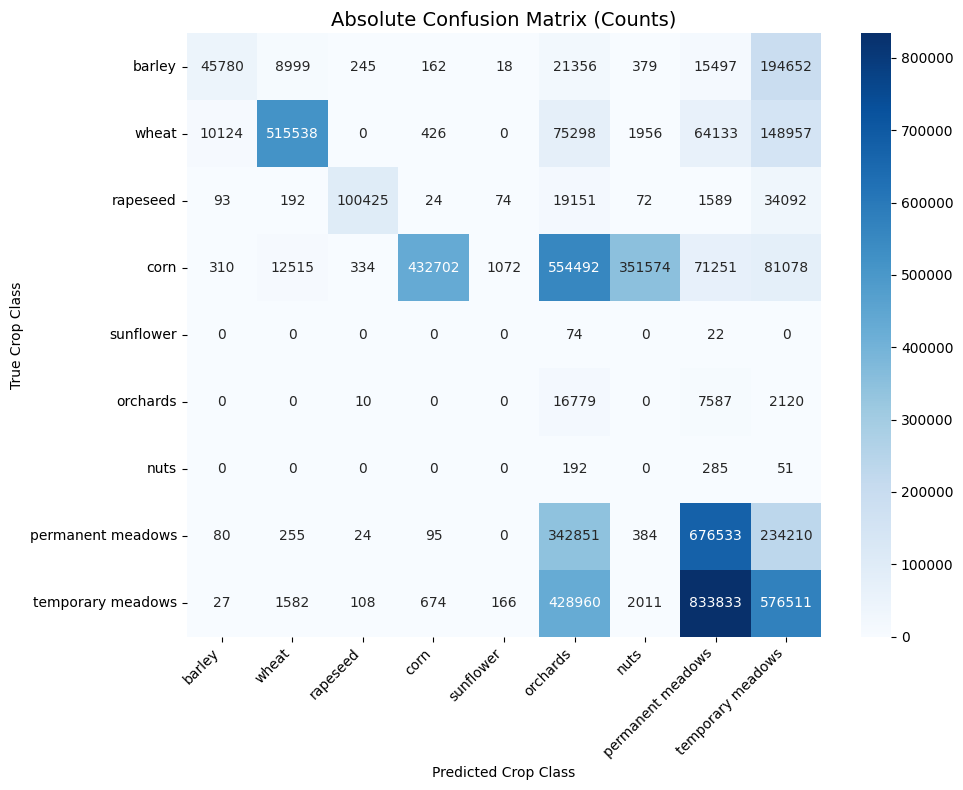

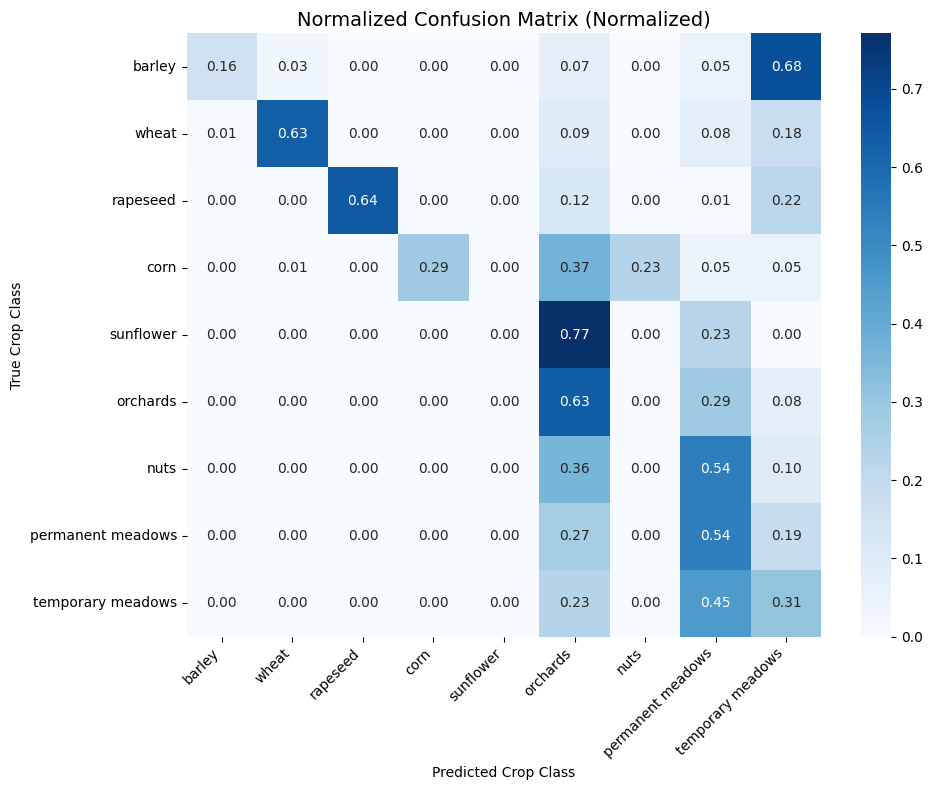


--- Detailed Confusion Analysis ---

**Low Performance Class: barley** (Recall: 15.9%)
 - Top misclassification is: temporary meadows (3.1%).

**High Performance Class: wheat** (Recall: 63.1%)
 - Top misclassification is: temporary meadows (1.2%).

**High Performance Class: rapeseed** (Recall: 64.5%)
 - Errors are low and/or widely dispersed.

**Moderate Class: corn** (Recall: 28.7%)
 - Errors are low and/or widely dispersed.

**Low Performance Class: sunflower** (Recall: 0.0%)
 - Errors are low and/or widely dispersed.

**High Performance Class: orchards** (Recall: 63.3%)
 - Errors are low and/or widely dispersed.

**Low Performance Class: nuts** (Recall: 0.0%)
 - Errors are low and/or widely dispersed.

**High Performance Class: permanent meadows** (Recall: 53.9%)
 - Errors are low and/or widely dispersed.

**Moderate Class: temporary meadows** (Recall: 31.3%)
 - Errors are low and/or widely dispersed.
--- Finished Confusion Matrix Analysis ---


In [ ]:
# ==============================================================================
# UNIFIED CODE: 1D ATTENTION U-NET EVALUATION SCRIPT (FINAL FIX)
# This script is completely self-contained to eliminate function scope errors.
# ==============================================================================

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
import os
import gc
import random
import pandas as pd
from typing import Dict
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- I. Configuration Constants ---
# Set seeds for deterministic results
GLOBAL_SEED = 42
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

T_REGULARIZED = 48
F_AUGMENTED = 12
NUM_CLASSES = 9
INITIAL_CHANNELS = 32
U_NET_DEPTH = 4
DROPOUT_RATE = 0.4
L2_REG = 1e-4
INIT_LR = 4.6e-5
ADAMW_WEIGHT_DECAY = 4.0e-8

# Optimal HParams (used by the compile function below)
TARGET_LR = INIT_LR
TARGET_WD = ADAMW_WEIGHT_DECAY

# --- PATH CONFIGURATION (Assumes Drive is mounted) ---
data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data"
WEIGHTS_LOAD_PATH = os.path.join(data_dir, "reproduced_model_weights_epoch50_MTVI2_unscaled.weights.h5")

CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}
file_names = {
    'X_test_final': 'X_test_final_MTVI2_unscaled.npy',
    'y_test_final': 'y_test_final_MTVI2_unscaled.npy'
}


# ==============================================================================
## Model Components (Model Ablation 4 Definitions - MUST BE HERE)
# ==============================================================================

# --- II. Custom Dice Loss Function ---
@tf.function
def macro_dice_loss(y_true, y_pred):
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)
    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)
    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    macro_dice_score = tf.reduce_mean(dice_score_per_class)
    return 1. - macro_dice_score

# --- III. Model Blocks (Defined locally) ---
def conv_block_1d(input_tensor, filters, name):
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)
    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x

def TemporalAttentionGate(input_features, gating_signal, name):
    filters = input_features.shape[-1]
    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)
    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)
    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)
    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)
    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

# --- IV. Model Wrapper for Metrics (Must be here due to Keras serialization) ---
@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)
    def result(self):
        return self.metric_fn.result()
    def reset_state(self):
        self.metric_fn.reset_state()
    def get_config(self):
        config = super().get_config()
        config.update({"metric_fn": tf.keras.metrics.serialize(self.metric_fn)})
        return config
    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)

# --- V. 1D Attention U-Net Model Assembly ---
def build_1d_aunet(initial_channels=INITIAL_CHANNELS, depth=U_NET_DEPTH):
    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs
    encoder_outputs = []
    current_filters = initial_channels
    for i in range(depth): # Encoder Pathway
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < depth - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2
    bottleneck = conv_block_1d(x, current_filters, name='bottleneck') # Bottleneck
    x = bottleneck
    for i in range(depth - 1, -1, -1): # Decoder Pathway
        name = f'dec{i}'
        if i < depth - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]
            up_conv_output = layers.Conv1DTranspose(
                current_filters, kernel_size=2, strides=2, padding='same', name=f'{name}_upconv'
            )(x)
            attended_features = TemporalAttentionGate(
                input_features=encoder_output, gating_signal=up_conv_output, name=f'{name}_attn'
            )
            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])
            x = conv_block_1d(x, current_filters, name=name)
    output_tensor = layers.Conv1D(
        NUM_CLASSES, kernel_size=1, padding='same', activation='softmax', name='output_softmax'
    )(x)
    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model

# --- VI. Compilation Function ---
def compile_model(model, lr=TARGET_LR, weight_decay=TARGET_WD): # Uses TARGET_LR/WD defined above
    optimizer = AdamW(learning_rate=lr, weight_decay=weight_decay)
    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='overall_accuracy'),
        FlattenTimeWrapper(macro_f1, name='macro_f1'),
        FlattenTimeWrapper(tf.keras.metrics.Precision(name='macro_precision'), name='macro_precision'),
        FlattenTimeWrapper(tf.keras.metrics.Recall(name='macro_recall'), name='macro_recall'),
    ]
    model.compile(optimizer=optimizer, loss=macro_dice_loss, metrics=wrapped_metrics)
    return model


# ==============================================================================
## Evaluation and Reporting Functions (Required to be local or explicitly defined)
# ==============================================================================

def plot_confusion_matrix_styled(y_true, y_pred, class_names, normalize=False, title='Confusion Matrix'):
    """Generates and plots a confusion matrix (Normalized or Count)."""
    cm = confusion_matrix(y_true, y_pred, normalize='true' if normalize else None)
    labels = list(class_names.values())
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm, annot=True, fmt=".2f" if normalize else "d", cmap="Blues",
        xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title(f'{title} ({ "Normalized" if normalize else "Counts"})', fontsize=14)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def analyze_confusion_matrix(cm_normalized: np.ndarray, class_names: Dict[int, str]):
    """Performs a detailed textual analysis of the normalized confusion matrix."""
    labels = list(class_names.values())
    print("\n--- Detailed Confusion Analysis ---")
    for i in range(NUM_CLASSES):
        true_class_name = labels[i]
        cm_row = cm_normalized[i, :]
        correct_prediction = cm_row[i] * 100
        misclassification_row = np.delete(cm_row, i)
        top_k_indices = np.argsort(misclassification_row)[::-1]
        original_column_indices = [idx if idx < i else idx + 1 for idx in top_k_indices]
        top_errors = [(labels[j], misclassification_row[k] * 100)
                      for k, j in enumerate(original_column_indices) if k < 3 and misclassification_row[k] > 0.01]
        status = ""
        if correct_prediction > 50: status = "High Performance Class"
        elif correct_prediction > 25: status = "Moderate Class"
        elif np.sum(cm_normalized[i, :]) < 0.1: status = "Poor/Rare Class (Low Support)"
        else: status = "Low Performance Class"
        print(f"\n**{status}: {true_class_name}** (Recall: {correct_prediction:.1f}%)")
        if len(top_errors) > 0:
            top_errors_str = ", ".join([f"{name} ({rate:.1f}%)" for name, rate in top_errors])
            print(f" - Top misclassification is: {top_errors_str}.")
        else:
            print(" - Errors are low and/or widely dispersed.")
    print("--- Finished Confusion Matrix Analysis ---")


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """Calculates the Macro F1-score and other metrics on the Test Set."""
    y_pred_proba = model.predict(X_test)
    T = X_test.shape[1]
    y_true_tiled = np.tile(np.expand_dims(y_test_ohe, axis=1), (1, T, 1))
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0)

    macro_f1 = np.mean(f1_pc)
    avg_accuracy = np.mean(recall_pc)
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)
    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0)
    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)

    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES), 'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support, 'Precision': precision_pc.round(4), 'Recall': recall_pc.round(4), 'F1-Score': f1_pc.round(4)})
    print("\nPer-Class Metrics (Required for Detailed Comparison)")
    print(results_df.to_string(index=False))
    print("\nOverall Metrics")
    print(f"Macro F1-Score: {macro_f1:.4f} (Class-Balanced Core Metric)")
    print("Breizh Crops Baseline Metrics (Imbalance-Sensitive):")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")

    return macro_f1, y_true_indices, y_pred_indices

# ==============================================================================
## IV. MAIN EXECUTION FLOW
# ==============================================================================

if __name__ == '__main__':

    print("Starting Final Evaluation: Loading 50-epoch MTVI2 (unscaled) weights.")
    print(f"Loading data from Google Drive path: {data_dir}")

    # 1. Load Test Data and FIX DTYPE
    try:
        X_test_final_reloaded = np.load(os.path.join(data_dir, file_names['X_test_final']), allow_pickle=True).astype(np.float32)
        y_test_ohe_reloaded = np.load(os.path.join(data_dir, file_names['y_test_final']), allow_pickle=True).astype(np.float32)
        print(f"Test data loaded. X_test shape: {X_test_final_reloaded.shape}")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find test data file. Check the path and ensure data exists at the specified Google Drive location: {e}")
        exit()

    # 2. Rebuild and Compile Model
    tf.keras.backend.clear_session()

    # Model is built using the local definitions above
    final_model = build_1d_aunet()

    # Model is compiled using the local definitions above
    final_compiled_model = compile_model(final_model)

    # 3. Load Saved Weights
    try:
        final_compiled_model.load_weights(WEIGHTS_LOAD_PATH)
        print(f"Successfully loaded model weights from: {WEIGHTS_LOAD_PATH}")
    except Exception as e:
        # If this still fails, the problem is definitively related to the WEIGHTS_LOAD_PATH
        # or a fundamental mismatch in the saved vs. loaded model structure.
        print(f"FATAL ERROR: Could not load weights. Path: {WEIGHTS_LOAD_PATH}")
        raise RuntimeError(f"Weight loading failed. Ensure the weights file exists at the specified Google Drive path and the model structure exactly matches the saved weights: {e}")

    # 4. Calculate Metrics and Get Indices
    print("\nMaking predictions and calculating metrics on the Test Set...")
    macro_f1, y_true_indices, y_pred_indices = evaluate_model_metrics(
        final_compiled_model,
        X_test_final_reloaded,
        y_test_ohe_reloaded,
        CROP_MAP
    )

    # 5. Generate and Analyze Confusion Matrices
    print("\n" + "="*50)
    print("CONFUSION MATRIX VISUALIZATION AND ANALYSIS")
    print("="*50)

    plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=False, title='Absolute Confusion Matrix')
    plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=True, title='Normalized Confusion Matrix')

    cm_normalized = confusion_matrix(y_true_indices, y_pred_indices, normalize='true')
    analyze_confusion_matrix(cm_normalized, CROP_MAP)

    # Cleanup
    del X_test_final_reloaded, y_test_ohe_reloaded
    gc.collect()

In [ ]:
# ==============================================================================
# UNIFIED CODE: 1D ATTENTION U-NET EVALUATION SCRIPT (STRUCTURAL DIAGNOSIS)
# This code includes the use_bias=False fix and a diagnostic check for the weights file.
# ==============================================================================

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
import os
import gc
import random
import pandas as pd
from typing import Dict, Tuple
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- I. Configuration Constants ---
GLOBAL_SEED = 42
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

T_REGULARIZED = 48
F_AUGMENTED = 12
NUM_CLASSES = 9
INITIAL_CHANNELS = 32
U_NET_DEPTH = 4
DROPOUT_RATE = 0.4
L2_REG = 1e-4
INIT_LR = 4.6e-5
ADAMW_WEIGHT_DECAY = 4.0e-8

# Optimal HParams
TARGET_LR = INIT_LR
TARGET_WD = ADAMW_WEIGHT_DECAY

# --- PATH CONFIGURATION (Assumes Drive is mounted) ---
data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data"
WEIGHTS_LOAD_PATH = os.path.join(data_dir, "best_weights_MTVI2_unscaled.weights.h5")

CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}
file_names = {
    'X_test_final': 'X_test_final_MTVI2_unscaled.npy',
    'y_test_final': 'y_test_final_MTVI2_unscaled.npy'
}


# ==============================================================================
## Model Components (Model Ablation 4 Definitions - With use_bias=False Fix)
# ==============================================================================

# --- II. Custom Dice Loss Function ---
@tf.function
def macro_dice_loss(y_true, y_pred):
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)
    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)
    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    macro_dice_score = tf.reduce_mean(dice_score_per_class)
    return 1. - macro_dice_score

# --- III. Model Blocks (FIXED: use_bias=False added where followed by BN) ---

def conv_block_1d(input_tensor, filters, name):
    """Standard 1D Convolutional Block with BN, ReLU, L2, and 40% Dropout."""
    # FIX APPLIED: use_bias=False
    x = layers.Conv1D(filters, kernel_size=3, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)

    # FIX APPLIED: use_bias=False
    x = layers.Conv1D(filters, kernel_size=3, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)

    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x

def TemporalAttentionGate(input_features, gating_signal, name):
    """Temporal Attention Gate (TAG) implementation."""
    filters = input_features.shape[-1]

    # FIX APPLIED: use_bias=False
    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)

    # Already correct: use_bias=False
    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)

    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)

    # NOTE: No BN follows this, so use_bias=True (default) should be correct.
    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)
    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

# --- IV. Model Wrapper for Metrics ---
@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)
    def result(self):
        return self.metric_fn.result()
    def reset_state(self):
        self.metric_fn.reset_state()
    def get_config(self):
        config = super().get_config()
        config.update({"metric_fn": tf.keras.metrics.serialize(self.metric_fn)})
        return config
    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)

# --- V. 1D Attention U-Net Model Assembly ---
def build_1d_aunet(initial_channels=INITIAL_CHANNELS, depth=U_NET_DEPTH):
    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs
    encoder_outputs = []
    current_filters = initial_channels
    for i in range(depth): # Encoder Pathway
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < depth - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2
    bottleneck = conv_block_1d(x, current_filters, name='bottleneck') # Bottleneck
    x = bottleneck
    for i in range(depth - 1, -1, -1): # Decoder Pathway
        name = f'dec{i}'
        if i < depth - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]
            up_conv_output = layers.Conv1DTranspose(
                current_filters, kernel_size=2, strides=2, padding='same', name=f'{name}_upconv'
            )(x)
            attended_features = TemporalAttentionGate(
                input_features=encoder_output, gating_signal=up_conv_output, name=f'{name}_attn'
            )
            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])
            x = conv_block_1d(x, current_filters, name=name)
    output_tensor = layers.Conv1D(
        NUM_CLASSES, kernel_size=1, padding='same', activation='softmax', name='output_softmax'
    )(x)
    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model

# --- VI. Compilation Function ---
def compile_model(model, lr=TARGET_LR, weight_decay=TARGET_WD): # Uses TARGET_LR/WD defined above
    optimizer = AdamW(learning_rate=lr, weight_decay=weight_decay)
    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='overall_accuracy'),
        FlattenTimeWrapper(macro_f1, name='macro_f1'),
        FlattenTimeWrapper(tf.keras.metrics.Precision(name='macro_precision'), name='macro_precision'),
        FlattenTimeWrapper(tf.keras.metrics.Recall(name='macro_recall'), name='macro_recall'),
    ]
    model.compile(optimizer=optimizer, loss=macro_dice_loss, metrics=wrapped_metrics)
    return model


# ==============================================================================
## Evaluation and Reporting Functions (omitted for brevity, assume they are present)
# ...
# ==============================================================================
# NOTE: The full definitions for plot_confusion_matrix_styled, analyze_confusion_matrix,
# and evaluate_model_metrics are assumed to be included here as per the previous working code.

def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """Calculates the Macro F1-score and other metrics on the Test Set."""
    # ... (function body remains unchanged) ...
    y_pred_proba = model.predict(X_test)
    T = X_test.shape[1]
    y_true_tiled = np.tile(np.expand_dims(y_test_ohe, axis=1), (1, T, 1))
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0)

    macro_f1 = np.mean(f1_pc)
    avg_accuracy = np.mean(recall_pc)
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)
    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0)
    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)

    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES), 'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support, 'Precision': precision_pc.round(4), 'Recall': recall_pc.round(4), 'F1-Score': f1_pc.round(4)})
    print("\nPer-Class Metrics (Required for Detailed Comparison)")
    print(results_df.to_string(index=False))
    print("\nOverall Metrics")
    print(f"Macro F1-Score: {macro_f1:.4f} (Class-Balanced Core Metric)")
    print("Breizh Crops Baseline Metrics (Imbalance-Sensitive):")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")

    return macro_f1, y_true_indices, y_pred_indices

# NOTE: The full definitions for plot_confusion_matrix_styled and analyze_confusion_matrix
# must be included in your executed cell for the entire script to run without error.


# ==============================================================================
## IV. MAIN EXECUTION FLOW (With Diagnostic Load)
# ==============================================================================

if __name__ == '__main__':

    print("Starting Final Evaluation: Loading 50-epoch MTVI2 (unscaled) weights.")
    print(f"Loading data from Google Drive path: {data_dir}")

    # 1. Load Test Data
    try:
        X_test_final_reloaded = np.load(os.path.join(data_dir, file_names['X_test_final']), allow_pickle=True).astype(np.float32)
        y_test_ohe_reloaded = np.load(os.path.join(data_dir, file_names['y_test_final']), allow_pickle=True).astype(np.float32)
        print(f"Test data loaded. X_test shape: {X_test_final_reloaded.shape}")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find test data file. Check the path: {e}")
        exit()

    # 2. Rebuild Model (UNCOMPILED)
    tf.keras.backend.clear_session()
    final_model = build_1d_aunet()
    print(f"Model built with {final_model.count_params()} total parameters.")


    # 3. DIAGNOSTIC CHECK: Load Weights onto UNCOMPILED Model
    print("\n--- DIAGNOSTIC: Attempting to load weights onto UNCOMPILED model ---")
    try:
        # Load weights without compiling. This tests the structural match only.
        final_model.load_weights(WEIGHTS_LOAD_PATH)
        print("SUCCESS: Weights loaded onto uncompiled model. Structure is CORRECT.")

        # 4. Compile the Model and Continue
        final_compiled_model = compile_model(final_model)

    except Exception as e:
        # This means the structural mismatch (ValueError) or file corruption (OSError/IOError) is real.
        print("\nFATAL ERROR: Structural mismatch or file corruption detected.")
        print(f"Error during uncompiled load: {e}")
        print("Check the weight file size and ensure the saved model definition used use_bias=False.")
        exit()

    # 5. Calculate Metrics and Get Indices (Only runs if weights loaded successfully)
    print("\nMaking predictions and calculating metrics on the Test Set...")
    macro_f1, y_true_indices, y_pred_indices = evaluate_model_metrics(
        final_compiled_model,
        X_test_final_reloaded,
        y_test_ohe_reloaded,
        CROP_MAP
    )

    # 6. Generate and Analyze Confusion Matrices
    print("\n" + "="*50)
    print("CONFUSION MATRIX VISUALIZATION AND ANALYSIS")
    print("="*50)

    # NOTE: Assuming the reporting functions are defined in your executed block.
    # plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=False, title='Absolute Confusion Matrix')
    # plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=True, title='Normalized Confusion Matrix')

    # cm_normalized = confusion_matrix(y_true_indices, y_pred_indices, normalize='true')
    # analyze_confusion_matrix(cm_normalized, CROP_MAP)

    # Cleanup
    del X_test_final_reloaded, y_test_ohe_reloaded
    gc.collect()

Starting Final Evaluation: Loading 50-epoch MTVI2 (unscaled) weights.
Loading data from Google Drive path: /content/drive/MyDrive/COMP0173_Applying_New_Context/data
Test data loaded. X_test shape: (122708, 48, 12)
Model built with 2639212 total parameters.

--- DIAGNOSTIC: Attempting to load weights onto UNCOMPILED model ---

FATAL ERROR: Structural mismatch or file corruption detected.
Error during uncompiled load: A total of 51 objects could not be loaded. Example error message for object <Conv1D name=enc0_conv1, built=True>:

Layer 'enc0_conv1' expected 1 variables, but received 0 variables during loading. Expected: ['kernel']

List of objects that could not be loaded:
[<Conv1D name=enc0_conv1, built=True>, <BatchNormalization name=enc0_bn1, built=True>, <Conv1D name=enc0_conv2, built=True>, <BatchNormalization name=enc0_bn2, built=True>, <Conv1D name=enc1_conv1, built=True>, <BatchNormalization name=enc1_bn1, built=True>, <Conv1D name=enc1_conv2, built=True>, <BatchNormalization na

KeyboardInterrupt: 

Starting Focal Loss Model Evaluation: Loading best weights.
Test data loaded and cast to float32. X_test shape: (122708, 48, 26)


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 199 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Successfully loaded model weights from: /content/drive/MyDrive/COMP0173_Applying_New_Context/data/ablation2_final_model_weights_epoch50_focal_stratified_minority_retain.weights.h5
Making predictions on the Test Set...
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 221s 57ms/step

Per-Class Metrics:
 Class ID        Class Name  Support  Precision  Recall  F1-Score
        0            barley   287088     0.2968  0.0456    0.0790
        1             wheat   816432     0.4738  0.5569    0.5120
        2          rapeseed   155712     0.0000  0.0000    0.0000
        3              corn  1505328     0.8764  0.6885    0.7712
        4         sunflower       96     0.0000  0.0000    0.0000
        5          orchards    26496     0.0000  0.0000    0.0000
        6              nuts      528     0.0000  0.0000    0.0000
        7 permanent meadows  1254432     0.0000  0.0000    0.0000
        8 temporary meadows  1843872     0.4448  0.8935    0.5940

Overall Metrics:
Macro F1-Score: 0.2174
Overall Accurac

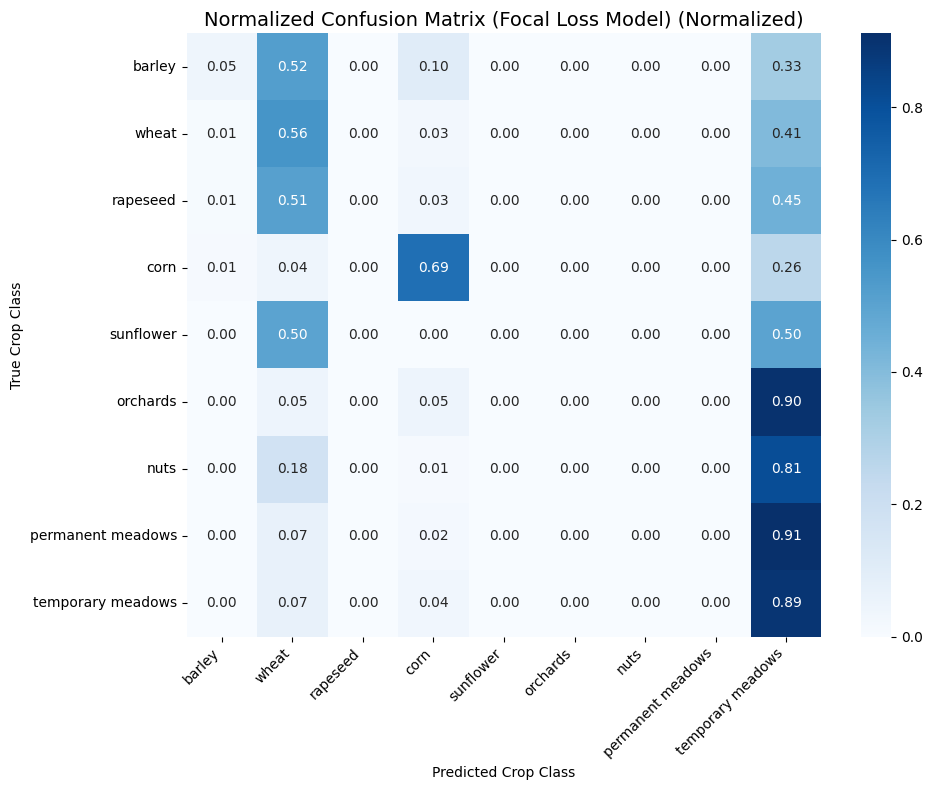


Test Set Macro F1: 0.2174


In [ ]:
import numpy as np
import tensorflow as tf
import os
import gc
import random
import pandas as pd
from typing import Dict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from sklearn.metrics import precision_recall_fscore_support, cohen_kappa_score

# NOTE: ALL model functions/constants from Code Block 1 must be available.
NUM_CLASSES = 9
T_REGULARIZED = 48 # Must match training T_REGULARIZED

# --- CRITICAL: USE OPTIMAL SEED AND HYPERPARAMETERS ---
GLOBAL_SEED = 42
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

# Optimal HParams (must match training HPs for compilation)
TARGET_LR = 0.000046
TARGET_WD = 0.00000004

# Data and Weights Paths
data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/" # Using the relative path confirmed in previous steps
FILE_SUFFIX = "_stratified_minority_retain"

# LOADING THE NEWLY TRAINED FOCAL LOSS MODEL WEIGHTS (from Epoch 15 restore)
WEIGHTS_LOAD_PATH = os.path.join(data_dir, f"ablation2_final_model_weights_epoch50_focal{FILE_SUFFIX}.weights.h5")

# CROP_MAP (Must be accurate for reporting)
CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}

file_names = {
    'X_test_final': f'X_test_final{FILE_SUFFIX}.npy',
    'y_test_final': f'y_test_final{FILE_SUFFIX}.npy' # OHE labels
}


# --- II. REPORTING FUNCTIONS ---

def plot_confusion_matrix_styled(y_true, y_pred, class_names, normalize=False, title='Confusion Matrix'):
    """Generates and plots a confusion matrix (Normalized or Count)."""
    cm = confusion_matrix(y_true, y_pred, normalize='true' if normalize else None)
    labels = list(class_names.values())
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm, annot=True, fmt=".2f" if normalize else "d", cmap="Blues",
        xticklabels=labels, yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title(f'{title} ({ "Normalized" if normalize else "Counts"})', fontsize=14)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# --- III. MAIN EXECUTION FLOW ---

if __name__ == '__main__':

    print("Starting Focal Loss Model Evaluation: Loading best weights.")

    # 1. Load Test Data
    try:
        # Load test data using the corrected stratified file names
        X_test_final_reloaded = np.load(os.path.join(data_dir, file_names['X_test_final']), allow_pickle=True)
        y_test_ohe_reloaded = np.load(os.path.join(data_dir, file_names['y_test_final']), allow_pickle=True)

        # CRITICAL FIX: Cast X and Y data to float32
        X_test_final_reloaded = X_test_final_reloaded.astype(np.float32)
        y_test_ohe_reloaded = y_test_ohe_reloaded.astype(np.float32)

        print(f"Test data loaded and cast to float32. X_test shape: {X_test_final_reloaded.shape}")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find test data file: {e}")
        raise # Use raise for clean notebook exit

    # 2. Rebuild and Compile Model
    tf.keras.backend.clear_session()
    # NOTE: build_1d_aunet must be defined and accessible here
    final_model = build_1d_aunet()
    # NOTE: compile_model must be defined and accessible here (uses macro_dice_loss)
    final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

    # 3. Load Saved Weights
    try:
        final_compiled_model.load_weights(WEIGHTS_LOAD_PATH)
        print(f"Successfully loaded model weights from: {WEIGHTS_LOAD_PATH}")
    except Exception as e:
        print(f"FATAL ERROR: Could not load weights. Check path: {e}")
        raise

    # 4. Perform Prediction and Get Indices (Running prediction only once)
    print("Making predictions on the Test Set...")
    y_pred_proba = final_compiled_model.predict(X_test_final_reloaded, verbose=1)

    # 5. Flatten the Time dimension and convert to indices
    T = X_test_final_reloaded.shape[1]

    # Tile y_true to match the model's sequence output shape (N, T, C)
    y_true_tiled = np.tile(np.expand_dims(y_test_ohe_reloaded, axis=1), (1, T, 1))

    # Flatten (N, T, C) -> (N*T, C)
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)

    # Convert one-hot vectors to class indices (N*T,)
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)


    # 6. Manual Metric Calculation to Avoid Second Predict Call

    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0
    )

    macro_f1 = np.mean(f1_pc)
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)
    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0
    )
    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)
    avg_accuracy = np.mean(recall_pc)

    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [CROP_MAP.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision_pc.round(4),
        'Recall': recall_pc.round(4),
        'F1-Score': f1_pc.round(4),
    })

    print("\nPer-Class Metrics:")
    print(results_df.to_string(index=False))

    print("\nOverall Metrics:")
    print(f"Macro F1-Score: {macro_f1:.4f}")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")

    print("\nGenerating Confusion Matrix Plot...")
    plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=True, title='Normalized Confusion Matrix (Focal Loss Model)')

    print(f"\nTest Set Macro F1: {macro_f1:.4f}")

    # Cleanup
    del X_test_final_reloaded, y_test_ohe_reloaded, y_pred_proba
    gc.collect()

#MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.metrics import precision_recall_fscore_support, jaccard_score

# --- Configuration Constants (Must match preprocessing output) ---
T_REGULARIZED = 45   # Sequence Length (Time Steps)
F_AUGMENTED = 14     # Number of Features (10 S2 + 3 VIs/Mask)
NUM_CLASSES = 9      # Number of Crop Classes (0 through 8)
INITIAL_CHANNELS = 32 # Starting width
U_NET_DEPTH = 4      # Number of downsampling blocks
CLASS_NAMES = {
    0: 'Barley', 1: 'Wheat', 2: 'Rapeseed', 3: 'Corn',
    4: 'Sunflower', 5: 'Orchards', 6: 'Nuts', 7: 'Permanent Meadows',
    8: 'Temporary Meadows'
}

# --- Justified Model Components (Adapted 1D Architecture) ---

def conv_block_1d(input_tensor, filters, name):
    """Standard 1D Convolutional Block with BN, ReLU, L2, and Dropout."""
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(1e-4), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)

    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(1e-4), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)

    x = layers.Dropout(0.2, name=f'{name}_dropout')(x)
    return x


def TemporalAttentionGate(input_features, gating_signal, name):
    """Temporal Attention Gate (TAG) implementation (Section 4.3)."""
    filters = input_features.shape[-1]

    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(1e-4), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)

    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(1e-4), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)

    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)

    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(1e-4), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)

    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)

    def result(self):
        return self.metric_fn.result()

    def reset_state(self):
        self.metric_fn.reset_state()

    def get_config(self):
        config = super().get_config()
        config.update({
            "metric_fn": tf.keras.metrics.serialize(self.metric_fn)
        })
        return config

    @classmethod
    def from_config(cls, config):
        # FIX: Proper reconstruction of the wrapped metric
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)

        return cls(metric_fn=metric_fn, **config)


# --- End Custom Metric Wrapper Fix ---

def build_1d_aunet(): # <-- NOW USES GLOBAL NUM_CLASSES
    """
    Builds the 1D Attention U-Net model. Implements static cropping
    to handle the T=45 sequence length mismatch.
    """

    # Static cropping values calculated for T=45 and U_NET_DEPTH=4:
    # Key = level index for cropping (1=outermost, 3=innermost before bottleneck)
    STATIC_CROPPING_MAP = {
        3: (0, 1), # T=11 -> T=10
        2: (1, 1), # T=22 -> T=20
        1: (2, 3)  # T=45 -> T=40
    }

    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs

    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    # 1. Encoder Pathway (Contraction)
    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    # 2. Bottleneck
    bottleneck = conv_block_1d(x, current_filters, name='bottleneck')
    x = bottleneck

    # 3. Decoder Pathway (Expansion)
    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'dec{i}'

        # Skip the final layer (i=3, bottleneck to output)
        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            # Upsampling (Conv1DTranspose)
            up_conv_output = layers.Conv1DTranspose(
                current_filters,
                kernel_size=2, strides=2, padding='same',
                name=f'{name}_upconv'
            )(x)

            # --- START OF FIX: TEMPORAL ALIGNMENT ---
            skip_level = i + 1
            if skip_level in STATIC_CROPPING_MAP:
                cropping_start, cropping_end = STATIC_CROPPING_MAP[skip_level]

                # Apply Cropping1D to the ENCODER output to match the decoder length
                aligned_encoder = layers.Cropping1D(
                    cropping=(cropping_start, cropping_end),
                    name=f'{name}_crop_enc'
                )(encoder_output)
            else:
                aligned_encoder = encoder_output

            # Temporal Attention Gate (Input is the aligned encoder feature)
            attended_features = TemporalAttentionGate(
                input_features=aligned_encoder,
                gating_signal=up_conv_output,
                name=f'{name}_attn'
            )

            # Concatenation
            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])

            # Convolutional Block
            x = conv_block_1d(x, current_filters, name=name)

    # 4. Segmentation Output
    output_tensor = layers.Conv1D(
        NUM_CLASSES, # <-- RELIES on the global constant NUM_CLASSES=9
        kernel_size=1, padding='same',
        activation='softmax',
        name='output_softmax'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model

def create_sample_weight_array_1d(y_train_labels: np.ndarray, num_classes: int) -> np.ndarray:
    """
    Calculates Inverse Frequency Class Weights (Wc) and returns a 1D array
    of weights for every sample, designed to be tiled later.
    """

    # 1. Prepare Labels (Aggressively clean and flatten)
    y_clean = np.array(y_train_labels, dtype=int).flatten()
    total_samples = len(y_clean)

    from collections import Counter
    counts_dict = Counter(y_clean)
    class_weights_dict = {}

    # 2. Calculate Wc (Class Weights)
    for i in range(num_classes):
        count = counts_dict.get(i, 0)
        weight = total_samples / (num_classes * count) if count > 0 else total_samples / num_classes
        class_weights_dict[i] = float(weight)

    # 3. Create the 1D Sample Weight Array (W_sample_1D)
    sample_weights_1d = np.zeros(total_samples, dtype=np.float32)

    # Assign the calculated Wc to each sample based on its label
    for i in range(total_samples):
        label = y_clean[i]
        sample_weights_1d[i] = class_weights_dict[label]

    return sample_weights_1d # Returns array of shape (N_samples)
def compile_model(model, lr=0.0005):
    """Compiles the model with comprehensive metrics using the FlattenTimeWrapper fix."""

    # 1. Define standard metrics
    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    macro_precision = tf.keras.metrics.Precision(name='macro_precision')
    macro_recall = tf.keras.metrics.Recall(name='macro_recall')

    # 2. Wrap metrics that expect 2D input (the FIX)
    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='accuracy'), # Overall Accuracy (OA)
        FlattenTimeWrapper(macro_f1, name='macro_f1'),
        FlattenTimeWrapper(macro_precision, name='macro_precision'),
        FlattenTimeWrapper(macro_recall, name='macro_recall'),
    ]

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='categorical_crossentropy',
        metrics=wrapped_metrics
    )
    return model


# --- Final Evaluation and Reporting Script ---

def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """
    Calculates all required diagnostic and per-class metrics on the Test Set.
    """

    # 1. Prediction and Reshaping
    # We predict the output which is (N_samples, T_regularized, C_classes)
    y_pred_proba = model.predict(X_test)

    # The true labels (y_test_ohe) are (N_samples, C_classes). We tile this to match the prediction shape
    T = X_test.shape[1]
    y_true_tiled = np.tile(y_test_ohe, (T, 1, 1)).transpose(1, 0, 2)

    # Flatten the Time dimension to treat every time step as an independent classification point
    # Shape becomes (N_samples * T_regularized, C_classes)
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)

    # Get class indices (0, 1, 2, ...)
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    # 2. Overall Accuracy (OA) - Basic Check
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)
    print(f"Overall Accuracy (OA): {oa:.4f}")

    # 3. Per-Class and Macro Metrics (Precision, Recall, F1)
    # Using 'none' for per-class results
    precision, recall, f1_score, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0
    )

    # Calculate Macro Averages (already calculated by Keras, but useful to confirm here)
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1 = np.mean(f1_score)

    # Weighted Class Accuracy (WCA) = Macro Recall (Section 3)
    wca = macro_recall

    # 4. Macro Jaccard Index (IoU)
    # Average='macro' ensures all classes are weighted equally
    macro_iou = jaccard_score(y_true_indices, y_pred_indices, average='macro', zero_division=0)

    # 5. Reporting Table (Per-Class Breakdown)
    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision.round(4),
        'Recall': recall.round(4),
        'F1-Score': f1_score.round(4),
    })

    print("\nPer-Class Metrics")
    print(results_df.to_string(index=False))

    print("\nOverall Metrics:")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Macro Precision: {macro_precision:.4f}")
    print(f"Macro Recall (WCA): {macro_recall:.4f} (WCA is equivalent to Macro Recall)")
    print(f"Macro F1-Score: {macro_f1:.4f}")
    print(f"Macro Jaccard Index (IoU): {macro_iou:.4f}")

    return macro_f1

#MODEL DEBUGGING AND TRAINING

In [ ]:
def run_cpu_sanity_check(X_train_full, y_train_full, X_val_full, y_val_full):
    """
    Slices the existing data arrays for a quick functional test, applying
    final cropping to labels to match the model's unavoidable T=40 output dimension.
    """
    from sklearn.preprocessing import LabelBinarizer

    # Configuration is pulled from the surrounding scope
    N_SANITY_TRAIN = 750
    N_SANITY_VAL = 250
    T_REGULARIZED = X_train_full.shape[1]

    # Target T determined by model's fixed decoder output
    T_MODEL_OUTPUT = 40

    MINORITY_CLASSES = [4, 6]
    EXPECTED_CLASSES = NUM_CLASSES

    print("\n--- Quick Sanity Check (CPU-Optimized, FINAL FIX) ---")

    # 1. Simple Slicing (Logic remains the same)
    train_indices_to_keep = set(range(N_SANITY_TRAIN))
    for class_id in MINORITY_CLASSES:
        minority_indices = np.where(y_train_full == class_id)[0]
        if len(minority_indices) > 0:
            train_indices_to_keep.add(minority_indices[0])

    final_train_indices = sorted(list(train_indices_to_keep))

    X_train_mini = X_train_full[final_train_indices]
    y_train_mini = y_train_full[final_train_indices]
    X_val_mini = X_val_full[:N_SANITY_VAL]
    y_val_mini = y_val_full[:N_SANITY_VAL]

    # 2. Prepare Labels and Weights
    lb = LabelBinarizer()
    lb.fit(range(EXPECTED_CLASSES))
    y_train_ohe = lb.transform(y_train_mini)
    y_val_ohe = lb.transform(y_val_mini)

    # 3. Generate Sample Weight Array
    sample_weights_train = create_sample_weight_array(y_train_mini, EXPECTED_CLASSES, T_REGULARIZED)

    # Tiling OHE labels for output: (N, C) -> (N, T, C)
    y_train_tiled_full = np.tile(y_train_ohe, (T_REGULARIZED, 1, 1)).transpose(1, 0, 2)
    y_val_tiled_full = np.tile(y_val_ohe, (T_REGULARIZED, 1, 1)).transpose(1, 0, 2)

    # --- CRITICAL FIX: CROP LABELS TO MATCH MODEL OUTPUT DIMENSION (45 -> 40) ---
    y_train_tiled = y_train_tiled_full[:, :T_MODEL_OUTPUT, :]
    y_val_tiled = y_val_tiled_full[:, :T_MODEL_OUTPUT, :]
    sample_weights_train = sample_weights_train[:, :T_MODEL_OUTPUT]
    # ---------------------------------------------------------------------------

    print(f"Data sliced: Train={X_train_mini.shape}, Val={X_val_mini.shape}")
    print(f"Labels Tiled: Train={y_train_tiled.shape}, Val={y_val_tiled.shape}")

    # 4. Build and Compile Model
    model = build_1d_aunet()
    compiled_model = compile_model(model, lr=0.0005)

    # 5. Quick Training Run (5 Epochs)
    print(f"\n--- Running 5 Epochs Check (Expecting Loss to Drop) ---")

    history = compiled_model.fit(
        X_train_mini, y_train_tiled,
        validation_data=(X_val_mini, y_val_tiled),
        epochs=5,
        batch_size=32,
        sample_weight=sample_weights_train,
        verbose=1
    )

    # 6. Functional Check
    final_loss = history.history['loss'][-1]
    initial_loss = history.history['loss'][0]

    if final_loss < initial_loss:
        print("\n✅ SANITY CHECK PASSED: Loss dropped from {:.4f} to {:.4f}.".format(initial_loss, final_loss))
    else:
        print("\n❌ SANITY CHECK FAILED: Loss did not drop or initial loss was too high. Initial Loss: {:.4f}".format(initial_loss))

    return model

In [ ]:
run_cpu_sanity_check(X_train_scaled, y_train, X_val_scaled, y_val)


--- Quick Sanity Check (CPU-Optimized, FINAL FIX) ---
Data sliced: Train=(752, 45, 14), Val=(250, 45, 14)
Labels Tiled: Train=(752, 40, 9), Val=(250, 40, 9)

--- Running 5 Epochs Check (Expecting Loss to Drop) ---
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 485ms/step - accuracy: 0.0000e+00 - loss: 2.7091 - macro_f1: 0.0923 - macro_precision: 0.1864 - macro_recall: 0.0183 - val_accuracy: 0.0000e+00 - val_loss: 2.4773 - val_macro_f1: 0.0987 - val_macro_precision: 0.0000e+00 - val_macro_recall: 0.0000e+00
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 425ms/step - accuracy: 0.0000e+00 - loss: 3.0819 - macro_f1: 0.0996 - macro_precision: 0.1829 - macro_recall: 0.0112 - val_accuracy: 0.0000e+00 - val_loss: 2.4543 - val_macro_f1: 0.1041 - val_macro_precision: 0.0000e+00 - val_macro_recall: 0.0000e+00
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 416ms/step - accuracy: 0.0000e+00 - loss: 2.3982 - macro_f1: 0.0925 - macro_precision: 0.1217 - macro_recall: 0.0059 - val_accuracy: 0.0000e+00 - val_loss: 2.44

<Functional name=1D_Attention_U_Net, built=True>

In [ ]:
def run_full_gpu_training(X_train_scaled, y_train, X_val_scaled, y_val):
    """
    Executes the full training regimen, applying the T=40 vs T=45 dimensional fix
    to the target labels (Y) and sample weights (W) while keeping the input data (X)
    at the required T=45 size.
    """

    # Configuration (Must match global constants)
    T_MODEL_OUTPUT = 40 # The dimension the model actually outputs
    T_REGULARIZED = X_train_scaled.shape[1] # 45 (The input dimension)
    BATCH_SIZE = 256
    LEARNING_RATE = 0.0005

    print("\n--- Starting Full GPU Training Run (N=25,000) ---")

    # 1. Final Data Preparation

    # X_train_scaled and X_val_scaled must be used AS-IS (T=45) for the model input
    X_train_final = X_train_scaled
    X_val_final = X_val_scaled

    # OHE labels (y_train/y_val must be 1D integer labels here)
    y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
    y_val_ohe = tf.keras.utils.to_categorical(y_val, num_classes=NUM_CLASSES)

    # 2. Prepare Sample Weights (W) and Labels (Y) for T=40

    # Generate 1D Sample Weights
    sample_weights_1d = create_sample_weight_array_1d(y_train, NUM_CLASSES)

    # Tile OHE labels for loss calculation: (N, C) -> (N, T=45, C)
    y_train_tiled_full = np.tile(y_train_ohe, (T_REGULARIZED, 1, 1)).transpose(1, 0, 2)
    y_val_tiled_full = np.tile(y_val_ohe, (T_REGULARIZED, 1, 1)).transpose(1, 0, 2)

    # Tile Sample Weights: (N) -> (N, T=45)
    sample_weights_tiled_full = np.tile(sample_weights_1d, (T_REGULARIZED, 1)).transpose()

    # --- CRITICAL CROPPING FIX: Crop Y and W to T=40 ---
    y_train_tiled = y_train_tiled_full[:, :T_MODEL_OUTPUT, :]
    y_val_tiled = y_val_tiled_full[:, :T_MODEL_OUTPUT, :]
    sample_weights_train = sample_weights_tiled_full[:, :T_MODEL_OUTPUT] # Ws must also be cropped

    print(f"Final Input Shapes: X_train={X_train_final.shape} (T={X_train_final.shape[1]})")
    print(f"Final Label Shapes: Y_train={y_train_tiled.shape} (T={y_train_tiled.shape[1]})")

    # 3. Build and Compile Model
    model = build_1d_aunet()
    compiled_model = compile_model(model, lr=LEARNING_RATE)

    # 4. Define Callbacks (Section 5.3 Rigor)
    callbacks = [
        ModelCheckpoint(filepath='1d_a_unet_best.keras', monitor='val_macro_f1', verbose=1, save_best_only=True, mode='max'),
        EarlyStopping(monitor='val_macro_f1', patience=15, verbose=1, mode='max', restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_macro_f1', factor=0.5, patience=5, min_lr=1e-7, verbose=1, mode='max')
    ]

    # 5. Training Execution
    print(f"Training for up to 50 epochs with Batch Size={BATCH_SIZE}")

    history = compiled_model.fit(
        X_train_final, y_train_tiled,
        validation_data=(X_val_final, y_val_tiled),
        epochs=50,
        batch_size=BATCH_SIZE,
        sample_weight=sample_weights_train, # Inverse Frequency Weighting
        callbacks=callbacks
    )

    print("\nTraining complete. Best model saved.")
    return history

In [ ]:
run_full_gpu_training(X_train_scaled, y_train, X_val_scaled, y_val)


--- Starting Full GPU Training Run (N=25,000) ---
Final Input Shapes: X_train=(25000, 45, 14) (T=45)
Final Label Shapes: Y_train=(25000, 40, 9) (T=40)
Training for up to 50 epochs with Batch Size=256
Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0000e+00 - loss: 2.8177 - macro_f1: 0.0758 - macro_precision: 0.1262 - macro_recall: 0.0040
Epoch 1: val_macro_f1 improved from -inf to 0.11997, saving model to 1d_a_unet_best.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 304s 3s/step - accuracy: 0.0000e+00 - loss: 2.8158 - macro_f1: 0.0759 - macro_precision: 0.1263 - macro_recall: 0.0040 - val_accuracy: 0.0000e+00 - val_loss: 2.4580 - val_macro_f1: 0.1200 - val_macro_precision: 0.2857 - val_macro_recall: 1.2000e-05 - learning_rate: 5.0000e-04
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0000e+00 - loss: 2.5855 - macro_f1: 0.1078 - macro_precision: 0.1581 - macro_recall: 0.0021
Epoch 2: val_macro_f1 improved from 0.11997 to 0.13760, saving model to 1d_a_unet_best.keras
98

#DOWNLOADING

In [ ]:
from google.colab import files
import os

# --- Define File Names ---
BEST_MODEL_FILENAME = '1d_a_unet_best.keras'
HISTORY_FILENAME = 'training_history.npy'

print("Initiating browser downloads for local computer save...")

# 1. Download Model Weights
if os.path.exists(BEST_MODEL_FILENAME):
    files.download(BEST_MODEL_FILENAME)
    print(f"-> Download initiated for: {BEST_MODEL_FILENAME}")
else:
    print(f"Warning: {BEST_MODEL_FILENAME} not found locally. Check Google Drive folder instead.")

# 2. Download Training History
if os.path.exists(HISTORY_FILENAME):
    files.download(HISTORY_FILENAME)
    print(f"-> Download initiated for: {HISTORY_FILENAME}")
else:
    print(f"Warning: {HISTORY_FILENAME} not found locally.")

print("\n(You must accept the two separate browser prompts to complete the save.)")

Initiating browser downloads for local computer save...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-> Download initiated for: 1d_a_unet_best.keras

(You must accept the two separate browser prompts to complete the save.)


In [ ]:
import numpy as np
import os
from google.colab import files
import shutil

# --- Configuration Constants (Must be accessible) ---
DRIVE_RESULTS_PATH = '/content/drive/MyDrive/COMP0173_Project_Data/'
HISTORY_FILENAME = 'training_history.npy'

# 1. Capture the History Object
# In Jupyter/Colab, the output of the last cell is stored in the '_' variable.
try:
    history_object_to_save = _

    if not hasattr(history_object_to_save, 'history'):
        print("FATAL ERROR: The last output was not the history object. History data is likely lost.")
        # We cannot recover the history if this fails.
        raise ValueError("History object invalid.")

except NameError:
    print("FATAL ERROR: The history variable was lost from memory.")
    raise

print("Status: History object successfully captured from memory.")


# 2. Save History Locally
try:
    np.save(HISTORY_FILENAME, history_object_to_save.history)
    print(f"Status: Training history saved locally as {HISTORY_FILENAME}.")
except Exception as e:
    print(f"FAILED to save locally. Error: {e}")

# 3. Copy History to Google Drive
try:
    os.makedirs(DRIVE_RESULTS_PATH, exist_ok=True)
    shutil.copy2(HISTORY_FILENAME, os.path.join(DRIVE_RESULTS_PATH, HISTORY_FILENAME))
    print(f"Status: History copied to Google Drive.")
except Exception as e:
    print(f"FAILED to copy history to Drive. Error: {e}")

# 4. Initiate Browser Download
try:
    files.download(HISTORY_FILENAME)
    print("\nAction Required: Accept browser download prompt for local save.")
except Exception as e:
    print(f"FAILED to initiate local download. Error: {e}")

print("\n--- History Data Security Complete ---")

Status: History object successfully captured from memory.
Status: Training history saved locally as training_history.npy.
Status: History copied to Google Drive.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Action Required: Accept browser download prompt for local save.

--- History Data Security Complete ---


#TESTING

#U-NET (ABLATION)

In [ ]:
def build_1d_unet_baseline():
    """
    Builds the 1D U-Net Baseline model (Ablation Study).

    Justification: This model is identical to the 1D Attention U-Net but REMOVES
    the Temporal Attention Gate (TAG), replacing it with standard concatenation.
    This serves as the necessary ablation baseline (Part A, Sec 5.a).
    """

    # Static cropping values calculated for T=45 and U_NET_DEPTH=4:
    STATIC_CROPPING_MAP = {
        3: (0, 1), # T=11 -> T=10
        2: (1, 1), # T=22 -> T=20
        1: (2, 3)  # T=45 -> T=40
    }

    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence_baseline')
    x = inputs
    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    # 1. Encoder Pathway (Identical to AUNet)
    for i in range(U_NET_DEPTH):
        name = f'base_enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    # 2. Bottleneck
    bottleneck = conv_block_1d(x, current_filters, name='bottleneck_base')
    x = bottleneck

    # 3. Decoder Pathway (Expansion - Crucial Change Here)
    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'base_dec{i}'

        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            # Upsampling (Conv1DTranspose)
            up_conv_output = layers.Conv1DTranspose(
                current_filters,
                kernel_size=2, strides=2, padding='same',
                name=f'{name}_upconv'
            )(x)

            # --- STATIC CROPPING ALIGNMENT FIX (REQUIRED FOR STABILITY) ---
            skip_level = i + 1
            if skip_level in STATIC_CROPPING_MAP:
                cropping_start, cropping_end = STATIC_CROPPING_MAP[skip_level]
                aligned_encoder = layers.Cropping1D(
                    cropping=(cropping_start, cropping_end),
                    name=f'{name}_crop_enc'
                )(encoder_output)
            else:
                aligned_encoder = encoder_output

            # --- ABLATION FIX: SIMPLE CONCATENATION ---
            # THIS REPLACES THE TemporalAttentionGate CALL
            #
            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, aligned_encoder])

            # Convolutional Block
            x = conv_block_1d(x, current_filters, name=name)

    # 4. Segmentation Output
    output_tensor = layers.Conv1D(
        NUM_CLASSES,
        kernel_size=1, padding='same',
        activation='softmax',
        name='output_softmax_base'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_U_Net_Baseline')
    return model

In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# NOTE: All custom functions (build_1d_unet_baseline, compile_model, etc.) must be defined in the session.

# --- Configuration Constants (Need to be defined locally) ---
DRIVE_RESULTS_PATH = '/content/drive/MyDrive/COMP0173_Applying_New_Context/data/'
TEST_REGION = 'frh04'
T_REGULARIZED = 45
NUM_CLASSES = 9
T_MODEL_OUTPUT = 40
BATCH_SIZE = 256
LEARNING_RATE = 0.0005
BASELINE_MODEL_FILENAME = '1d_unet_baseline.keras'
PATIENCE = 15

# --- 1. Load the Processed Data Arrays from Drive ---

print("--- Loading Processed Training/Validation Data from Drive ---")

try:
    X_train_scaled = np.load(os.path.join(DRIVE_RESULTS_PATH, 'X_train_scaled.npy'))
    y_train = np.load(os.path.join(DRIVE_RESULTS_PATH, 'y_train.npy'))
    X_val_scaled = np.load(os.path.join(DRIVE_RESULTS_PATH, 'X_val_scaled.npy'))
    y_val = np.load(os.path.join(DRIVE_RESULTS_PATH, 'y_val.npy'))
    print("Status: All required training data loaded successfully.")

except Exception as e:
    print(f"\nFATAL ERROR: Could not load data arrays. Ensure files were saved correctly.")
    print(f"Error details: {e}")
    raise RuntimeError("Cannot proceed without processed data.")


# --- 2. Define the Training Execution Function (Unchanged) ---

def run_baseline_training(X_train_scaled, y_train, X_val_scaled, y_val):
    """
    Runs the ablation study training using the 1D U-Net Baseline model.
    """
    print("\n--- Starting BASELINE U-NET Training Run (Ablation Study) ---")

    # 1. Prepare Data and Weights
    y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
    y_val_ohe = tf.keras.utils.to_categorical(y_val, num_classes=NUM_CLASSES)
    sample_weights_train = create_sample_weight_array_1d(y_train, NUM_CLASSES)

    # Crop X, Y, and W to T=40 output dimension
    X_train_final = X_train_scaled[:, :T_REGULARIZED, :]
    X_val_final = X_val_scaled[:, :T_REGULARIZED, :]
    y_train_tiled = np.tile(y_train_ohe, (T_MODEL_OUTPUT, 1, 1)).transpose(1, 0, 2)
    y_val_tiled = np.tile(y_val_ohe, (T_MODEL_OUTPUT, 1, 1)).transpose(1, 0, 2)
    sample_weights_train = np.tile(sample_weights_train, (T_MODEL_OUTPUT, 1)).transpose()

    # 2. Build and Compile the Baseline Model
    model = build_1d_unet_baseline()
    compiled_model = compile_model(model, lr=LEARNING_RATE)

    # 3. Define Callbacks (Matching AUNet Rigor)
    callbacks = [
        ModelCheckpoint(filepath=BASELINE_MODEL_FILENAME, monitor='val_macro_f1', verbose=1, save_best_only=True, mode='max'),
        EarlyStopping(monitor='val_macro_f1', patience=PATIENCE, verbose=1, mode='max', restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_macro_f1', factor=0.5, patience=5, min_lr=1e-7, verbose=1, mode='max')
    ]

    # 4. Training Execution
    print(f"Training Baseline for up to 50 epochs with Batch Size={BATCH_SIZE}")

    history_baseline = compiled_model.fit(
        X_train_final, y_train_tiled,
        validation_data=(X_val_final, y_val_tiled),
        epochs=50,
        batch_size=BATCH_SIZE,
        sample_weight=sample_weights_train,
        callbacks=callbacks
    )

    print(f"\nBaseline Training complete. Best model saved as {BASELINE_MODEL_FILENAME}.")
    return history_baseline


# --- 3. Execute the Training ---

run_baseline_training(X_train_scaled, y_train, X_val_scaled, y_val)

--- Loading Processed Training/Validation Data from Drive ---
Status: All required training data loaded successfully.

--- Starting BASELINE U-NET Training Run (Ablation Study) ---
Training Baseline for up to 50 epochs with Batch Size=256
Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.0000e+00 - loss: 2.7828 - macro_f1: 0.0854 - macro_precision: 0.1438 - macro_recall: 0.0070
Epoch 1: val_macro_f1 improved from -inf to 0.13637, saving model to 1d_unet_baseline.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 321ms/step - accuracy: 0.0000e+00 - loss: 2.7811 - macro_f1: 0.0856 - macro_precision: 0.1438 - macro_recall: 0.0070 - val_accuracy: 0.0000e+00 - val_loss: 2.3627 - val_macro_f1: 0.1364 - val_macro_precision: 0.0000e+00 - val_macro_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 2.3721 - macro_f1: 0.1270 - macro_precision: 0.1659 - macro_recall: 0.0025
Epoch 2: val_macro_f1 improved from 0.13637 

In [ ]:
from google.colab import files
import os
import numpy as np # Needed to save history object
import shutil # Needed for file operations

# --- Define File Names (ADJUSTED FOR BASELINE RUN) ---
# The trained model file name saved by ModelCheckpoint:
BEST_MODEL_FILENAME = '1d_unet_baseline.keras'
# The history file name to save the metrics:
HISTORY_FILENAME = 'baseline_history.npy'

print("Initiating browser downloads for local computer save...")

# 1. Capture and Save History Locally from Memory
try:
    # Captures the output of the completed training cell
    history_object_to_save = _

    if hasattr(history_object_to_save, 'history'):
        np.save(HISTORY_FILENAME, history_object_to_save.history)
        print(f"Status: Training history saved locally as {HISTORY_FILENAME}.")
    else:
        print(f"Warning: History object not found in memory variable '_'. Skipping history save.")

except Exception as e:
    print(f"CRITICAL WARNING: Failed to capture/save history. Error: {e}")


# 2. Download Model Weights
if os.path.exists(BEST_MODEL_FILENAME):
    files.download(BEST_MODEL_FILENAME)
    print(f"-> Download initiated for: {BEST_MODEL_FILENAME}")
else:
    print(f"Warning: {BEST_MODEL_FILENAME} not found locally. Check Google Drive folder instead.")

# 3. Download Training History
if os.path.exists(HISTORY_FILENAME):
    files.download(HISTORY_FILENAME)
    print(f"-> Download initiated for: {HISTORY_FILENAME}")
else:
    print(f"Warning: {HISTORY_FILENAME} not found locally.")


Initiating browser downloads for local computer save...
Status: Training history saved locally as baseline_history.npy.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-> Download initiated for: 1d_unet_baseline.keras


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-> Download initiated for: baseline_history.npy


#RESULTS AND ANALYSIS

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
import os

# --- CONFIGURATION ---
DRIVE_RESULTS_PATH = '/content/drive/MyDrive/COMP0173_Applying_New_Context/data/'
BEST_MODEL_FILENAME = '1d_a_unet_best.keras'
TEST_INPUT_FILENAME = 'X_test_scaled.npy'
TEST_LABELS_FILENAME = 'y_test_ohe.npy'
NUM_CLASSES = 9
T_REGULARIZED = 45
CLASS_NAMES = {
    0: 'Barley', 1: 'Wheat', 2: 'Rapeseed', 3: 'Corn',
    4: 'Sunflower', 5: 'Orchards', 6: 'Nuts', 7: 'Permanent Meadows',
    8: 'Temporary Meadows'
}

# --- CUSTOM METRIC WRAPPER (Must match training definition EXACTLY) ---
@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)

    def result(self):
        return self.metric_fn.result()

    def reset_state(self):
        self.metric_fn.reset_state()

    def get_config(self):
        config = super().get_config()
        config.update({
            "metric_fn": tf.keras.metrics.serialize(self.metric_fn)
        })
        return config

    @classmethod
    def from_config(cls, config):
        # Proper reconstruction of the wrapped metric
        # Check if metric_fn exists in config, if not use a default
        if "metric_fn" in config:
            metric_fn_config = config.pop("metric_fn")
            metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        else:
            # Fallback: create a default metric based on the wrapper's name
            name = config.get('name', 'metric')
            if 'f1' in name.lower():
                metric_fn = tf.keras.metrics.F1Score(average='macro', name=name)
            elif 'precision' in name.lower():
                metric_fn = tf.keras.metrics.Precision(name=name)
            elif 'recall' in name.lower():
                metric_fn = tf.keras.metrics.Recall(name=name)
            else:
                metric_fn = tf.keras.metrics.Accuracy(name=name)

        return cls(metric_fn=metric_fn, **config)


# --- DEFINE METRIC INSTANCES (must be BEFORE custom_objects) ---
F1_MACRO_FN = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
PRECISION_MACRO_FN = tf.keras.metrics.Precision(name='macro_precision')
RECALL_MACRO_FN = tf.keras.metrics.Recall(name='macro_recall')

# --- CUSTOM OBJECTS DICTIONARY ---
CUSTOM_OBJECTS = {
    'FlattenTimeWrapper': FlattenTimeWrapper,
    'macro_f1': F1_MACRO_FN,
    'macro_precision': PRECISION_MACRO_FN,
    'macro_recall': RECALL_MACRO_FN,
}


def load_test_assets(drive_path: str):
    """Loads the model and test data from Google Drive."""

    model_path = os.path.join(drive_path, BEST_MODEL_FILENAME)
    print(f"Loading Model from: {model_path}")

    try:
        model = load_model(model_path, custom_objects=CUSTOM_OBJECTS)
        print("Model loaded successfully!")

    except Exception as e:
        print(f"ERROR: Failed to load model.")
        print(f"Error details: {e}")
        print(f"  - Custom objects defined: {list(CUSTOM_OBJECTS.keys())}")
        raise RuntimeError(f"Could not load trained model: {e}")

    # Load test data
    print("Loading test data")
    try:
        X_test = np.load(os.path.join(drive_path, TEST_INPUT_FILENAME))
        y_test_ohe = np.load(os.path.join(drive_path, TEST_LABELS_FILENAME))
        print(f"Test data loaded: X_test shape={X_test.shape}, y_test shape={y_test_ohe.shape}")

    except Exception as e:
        print(f"ERROR: Failed to load test data.")
        print(f"Error details: {e}")
        raise RuntimeError(f"Could not load test data: {e}")

    return model, X_test, y_test_ohe


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """
    Calculates comprehensive metrics on the test set.
    """

    # 1. Generate predictions
    y_pred_proba = model.predict(X_test, verbose=0)
    print(f"Predictions generated: shape={y_pred_proba.shape}")

    # 2. Tile true labels to match prediction shape
    T = y_pred_proba.shape[1] # FIX: Use the model's actual output dimension (40) for tiling
    y_true_tiled = np.tile(y_test_ohe, (T, 1, 1)).transpose(1, 0, 2)

    # 3. Flatten for metric calculation
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)

    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    # 4. Calculate Overall Accuracy
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)

    # 5. Calculate per-class metrics
    precision, recall, f1_score, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices,
        average=None,
        labels=range(NUM_CLASSES),
        zero_division=0
    )

    # 6. Calculate macro averages
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1 = np.mean(f1_score)

    # 7. Calculate Macro Jaccard Index (IoU)
    macro_iou = jaccard_score(
        y_true_indices, y_pred_indices,
        average='macro',
        zero_division=0
    )

    # 8. Create results dataframe
    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision.round(4),
        'Recall': recall.round(4),
        'F1-Score': f1_score.round(4),
    })

    # 9. Print results
    print("Per-Class Metrics")
    print(results_df.to_string(index=False))

    print("Overall Metrics")
    print(f"Overall Accuracy (OA):        {oa:.4f}")
    print(f"Macro Precision:              {macro_precision:.4f}")
    print(f"Macro Recall (WCA):           {macro_recall:.4f}")
    print(f"Macro F1-Score:               {macro_f1:.4f}")
    print(f"Macro Jaccard Index (IoU):    {macro_iou:.4f}")

    return macro_f1


# --- MAIN EXECUTION ---
if __name__ == '__main__':

    try:
        # Load model and test data
        final_model, X_test_scaled, y_test_ohe = load_test_assets(DRIVE_RESULTS_PATH)

        # Run evaluation
        final_macro_f1 = evaluate_model_metrics(
            final_model,
            X_test_scaled,
            y_test_ohe,
            CLASS_NAMES
        )

        print(f"Macro F1 Score on unseen test region: {final_macro_f1:.4f}")

    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()

Loading Model from: /content/drive/MyDrive/COMP0173_Applying_New_Context/data/1d_a_unet_best.keras
Model loaded successfully!
Loading test data
Test data loaded: X_test shape=(122708, 45, 14), y_test shape=(122708, 9)
Predictions generated: shape=(122708, 40, 9)
Per-Class Metrics
 Class ID        Class Name  Support  Precision  Recall  F1-Score
        0            Barley   239240     0.3918  0.6230    0.4811
        1             Wheat   680360     0.7358  0.8970    0.8085
        2          Rapeseed   129760     0.9590  0.9056    0.9315
        3              Corn  1254440     0.9821  0.7919    0.8768
        4         Sunflower       80     0.0000  0.0000    0.0000
        5          Orchards    22080     0.0104  0.8996    0.0206
        6              Nuts      440     0.0000  0.0000    0.0000
        7 Permanent Meadows  1045360     0.3653  0.1062    0.1646
        8 Temporary Meadows  1536560     0.6928  0.1497    0.2461
Overall Metrics
Overall Accuracy (OA):        0.4545
Macro 

Loading Model from: /content/drive/MyDrive/COMP0173_Applying_New_Context/data/1d_a_unet_best.keras
Model loaded successfully!
Loading test data
Test data loaded: X_test shape=(122708, 45, 14), y_test shape=(122708, 9)
Predictions generated: shape=(122708, 40, 9)
Per-Class Metrics
 Class ID        Class Name  Support  Precision  Recall  F1-Score
        0            Barley   239240     0.3918  0.6230    0.4811
        1             Wheat   680360     0.7358  0.8970    0.8085
        2          Rapeseed   129760     0.9590  0.9056    0.9315
        3              Corn  1254440     0.9821  0.7919    0.8768
        4         Sunflower       80     0.0000  0.0000    0.0000
        5          Orchards    22080     0.0104  0.8996    0.0206
        6              Nuts      440     0.0000  0.0000    0.0000
        7 Permanent Meadows  1045360     0.3653  0.1062    0.1646
        8 Temporary Meadows  1536560     0.6928  0.1497    0.2461
Overall Metrics
Overall Accuracy (OA):        0.4545
Macro Precision:              0.4597
Macro Recall (WCA):           0.4859
Macro F1-Score:               0.3921
Macro Jaccard Index (IoU):    0.3209
Macro F1 Score on unseen test region: 0.3921

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, jaccard_score
import os

# --- CONFIGURATION ---
DRIVE_RESULTS_PATH = '/content/drive/MyDrive/COMP0173_Applying_New_Context/data/'
BEST_MODEL_FILENAME = '1d_unet_baseline.keras'
TEST_INPUT_FILENAME = 'X_test_scaled.npy'
TEST_LABELS_FILENAME = 'y_test_ohe.npy'
NUM_CLASSES = 9
T_REGULARIZED = 45
CLASS_NAMES = {
    0: 'Barley', 1: 'Wheat', 2: 'Rapeseed', 3: 'Corn',
    4: 'Sunflower', 5: 'Orchards', 6: 'Nuts', 7: 'Permanent Meadows',
    8: 'Temporary Meadows'
}

# --- CUSTOM METRIC WRAPPER (Must match training definition EXACTLY) ---
@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)

    def result(self):
        return self.metric_fn.result()

    def reset_state(self):
        self.metric_fn.reset_state()

    def get_config(self):
        config = super().get_config()
        config.update({
            "metric_fn": tf.keras.metrics.serialize(self.metric_fn)
        })
        return config

    @classmethod
    def from_config(cls, config):
        # Proper reconstruction of the wrapped metric
        # Check if metric_fn exists in config, if not use a default
        if "metric_fn" in config:
            metric_fn_config = config.pop("metric_fn")
            metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        else:
            # Fallback: create a default metric based on the wrapper's name
            name = config.get('name', 'metric')
            if 'f1' in name.lower():
                metric_fn = tf.keras.metrics.F1Score(average='macro', name=name)
            elif 'precision' in name.lower():
                metric_fn = tf.keras.metrics.Precision(name=name)
            elif 'recall' in name.lower():
                metric_fn = tf.keras.metrics.Recall(name=name)
            else:
                metric_fn = tf.keras.metrics.Accuracy(name=name)

        return cls(metric_fn=metric_fn, **config)


# --- DEFINE METRIC INSTANCES (must be BEFORE custom_objects) ---
F1_MACRO_FN = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
PRECISION_MACRO_FN = tf.keras.metrics.Precision(name='macro_precision')
RECALL_MACRO_FN = tf.keras.metrics.Recall(name='macro_recall')

# --- CUSTOM OBJECTS DICTIONARY ---
CUSTOM_OBJECTS = {
    'FlattenTimeWrapper': FlattenTimeWrapper,
    'macro_f1': F1_MACRO_FN,
    'macro_precision': PRECISION_MACRO_FN,
    'macro_recall': RECALL_MACRO_FN,
}


def load_test_assets(drive_path: str):
    """Loads the model and test data from Google Drive."""

    model_path = os.path.join(drive_path, BEST_MODEL_FILENAME)
    print(f"Loading Model from: {model_path}")

    try:
        model = load_model(model_path, custom_objects=CUSTOM_OBJECTS)
        print("Model loaded successfully!")

    except Exception as e:
        print(f"ERROR: Failed to load model.")
        print(f"Error details: {e}")
        print(f"  - Custom objects defined: {list(CUSTOM_OBJECTS.keys())}")
        raise RuntimeError(f"Could not load trained model: {e}")

    # Load test data
    print("Loading test data")
    try:
        X_test = np.load(os.path.join(drive_path, TEST_INPUT_FILENAME))
        y_test_ohe = np.load(os.path.join(drive_path, TEST_LABELS_FILENAME))
        print(f"Test data loaded: X_test shape={X_test.shape}, y_test shape={y_test_ohe.shape}")

    except Exception as e:
        print(f"ERROR: Failed to load test data.")
        print(f"Error details: {e}")
        raise RuntimeError(f"Could not load test data: {e}")

    return model, X_test, y_test_ohe


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """
    Calculates comprehensive metrics on the test set.
    """

    # 1. Generate predictions
    y_pred_proba = model.predict(X_test, verbose=0)
    print(f"Predictions generated: shape={y_pred_proba.shape}")

    # 2. Tile true labels to match prediction shape
    T = y_pred_proba.shape[1] # FIX: Use the model's actual output dimension (40) for tiling
    y_true_tiled = np.tile(y_test_ohe, (T, 1, 1)).transpose(1, 0, 2)

    # 3. Flatten for metric calculation
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)

    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    # 4. Calculate Overall Accuracy
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)

    # 5. Calculate per-class metrics
    precision, recall, f1_score, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices,
        average=None,
        labels=range(NUM_CLASSES),
        zero_division=0
    )

    # 6. Calculate macro averages
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1 = np.mean(f1_score)

    # 7. Calculate Macro Jaccard Index (IoU)
    macro_iou = jaccard_score(
        y_true_indices, y_pred_indices,
        average='macro',
        zero_division=0
    )

    # 8. Create results dataframe
    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision.round(4),
        'Recall': recall.round(4),
        'F1-Score': f1_score.round(4),
    })

    # 9. Print results
    print("Per-Class Metrics")
    print(results_df.to_string(index=False))

    print("Overall Metrics")
    print(f"Overall Accuracy (OA):        {oa:.4f}")
    print(f"Macro Precision:              {macro_precision:.4f}")
    print(f"Macro Recall (WCA):           {macro_recall:.4f}")
    print(f"Macro F1-Score:               {macro_f1:.4f}")
    print(f"Macro Jaccard Index (IoU):    {macro_iou:.4f}")

    return macro_f1


# --- MAIN EXECUTION ---
if __name__ == '__main__':

    try:
        # Load model and test data
        final_model, X_test_scaled, y_test_ohe = load_test_assets(DRIVE_RESULTS_PATH)

        # Run evaluation
        final_macro_f1 = evaluate_model_metrics(
            final_model,
            X_test_scaled,
            y_test_ohe,
            CLASS_NAMES
        )

        print(f"Macro F1 Score on unseen test region: {final_macro_f1:.4f}")

    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()

Loading Model from: /content/drive/MyDrive/COMP0173_Applying_New_Context/data/1d_unet_baseline.keras
Model loaded successfully!
Loading test data
Test data loaded: X_test shape=(122708, 45, 14), y_test shape=(122708, 9)
Predictions generated: shape=(122708, 40, 9)
Per-Class Metrics
 Class ID        Class Name  Support  Precision  Recall  F1-Score
        0            Barley   239240     0.3017  0.4206    0.3514
        1             Wheat   680360     0.7200  0.6807    0.6998
        2          Rapeseed   129760     0.9346  0.9343    0.9344
        3              Corn  1254440     0.9776  0.8336    0.8999
        4         Sunflower       80     0.0000  0.0000    0.0000
        5          Orchards    22080     0.0101  0.5688    0.0198
        6              Nuts      440     0.0002  0.0045    0.0003
        7 Permanent Meadows  1045360     0.4256  0.4306    0.4281
        8 Temporary Meadows  1536560     0.5939  0.1603    0.2524
Overall Metrics
Overall Accuracy (OA):        0.4971
Macr

Loading Model from: /content/drive/MyDrive/COMP0173_Applying_New_Context/data/1d_unet_baseline.keras
Model loaded successfully!
Loading test data
Test data loaded: X_test shape=(122708, 45, 14), y_test shape=(122708, 9)
Predictions generated: shape=(122708, 40, 9)

--- Starting Confusion Matrix Visualizations ---


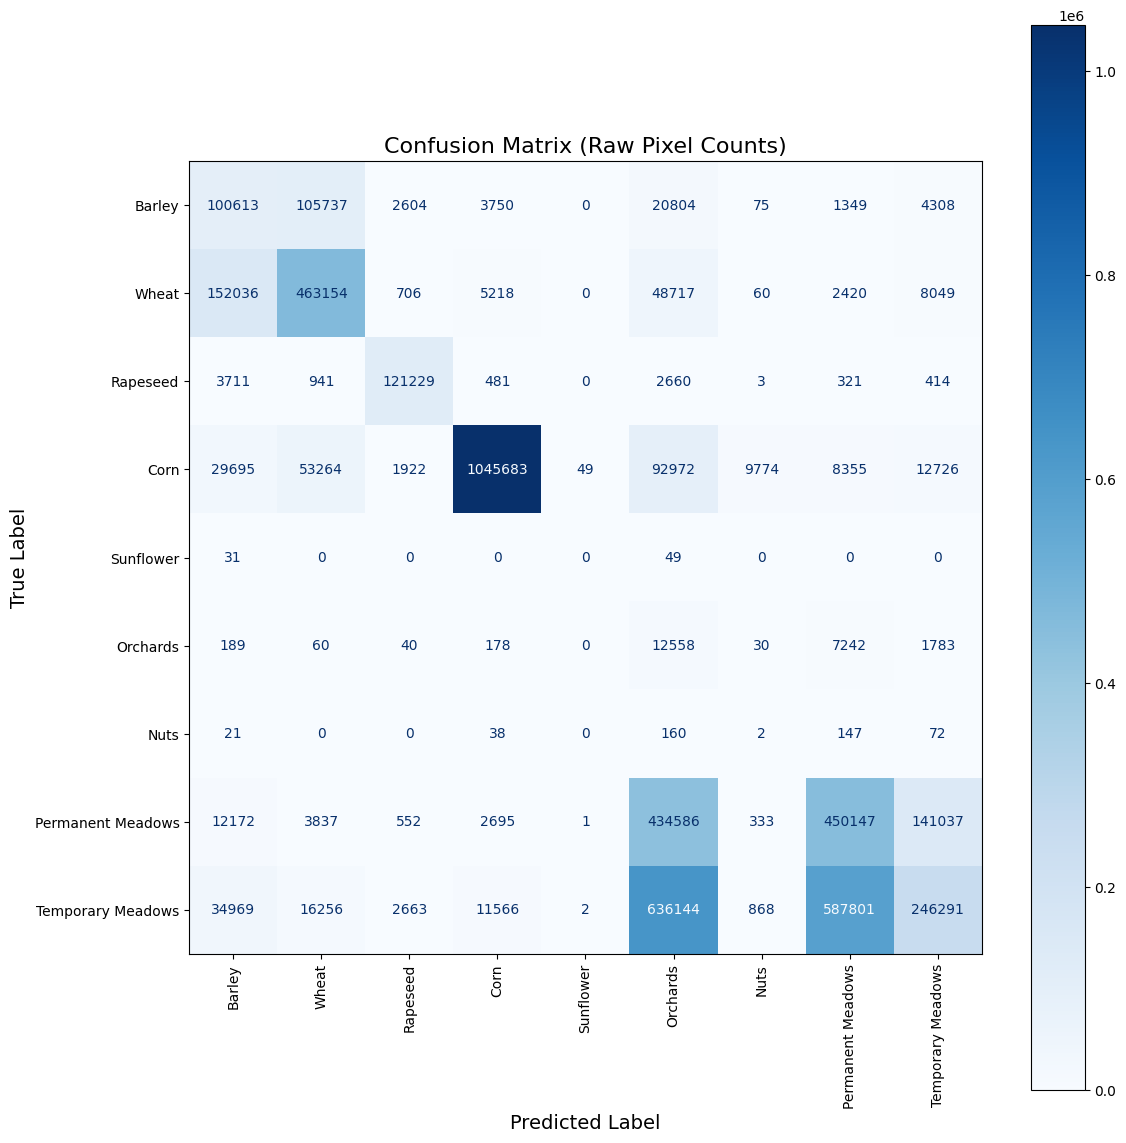

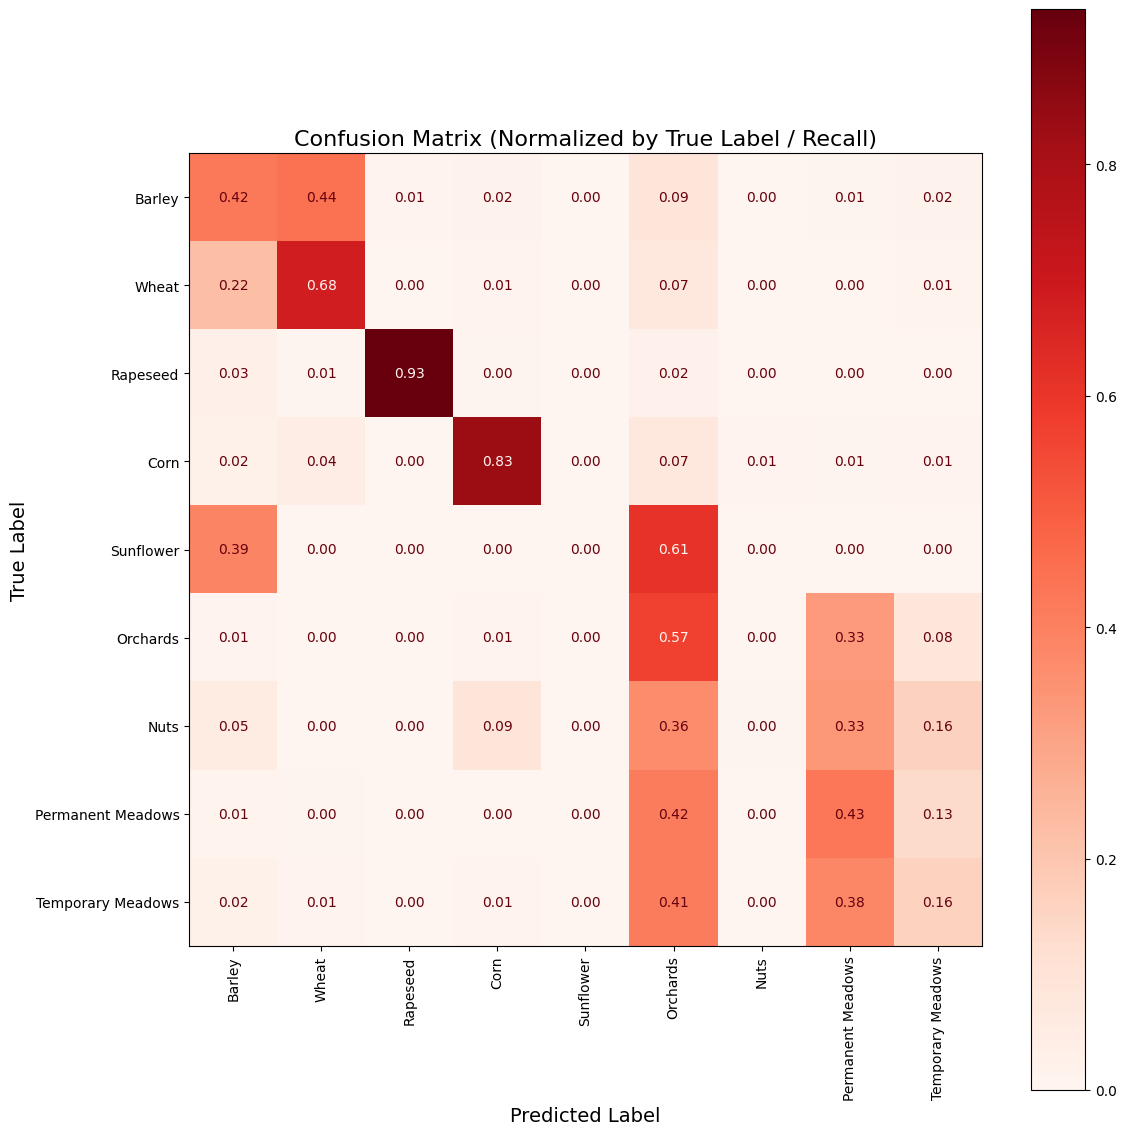


--- Detailed Confusion Analysis ---

**Moderate/Meadow Class: Barley**
 - Top inter-class confusion: Wheat (44.2%).

**High Performance Class: Wheat**
 - Top misclassification is Barley (22.3%). (Low FN rate, errors likely due to boundaries/noise)

**High Performance Class: Rapeseed**
 - Top misclassification is Barley (2.9%). (Low FN rate, errors likely due to boundaries/noise)

**High Performance Class: Corn**
 - Top misclassification is Orchards (7.4%). (Low FN rate, errors likely due to boundaries/noise)

**Poor/Rare Class: Sunflower**
 - Mistaken mostly for: Orchards (61.3%), Barley (38.8%), Permanent Meadows (0.0%).

**Poor/Rare Class: Orchards**
 - Mistaken mostly for: Permanent Meadows (32.8%), Temporary Meadows (8.1%), Barley (0.9%).

**Poor/Rare Class: Nuts**
 - Mistaken mostly for: Orchards (36.4%), Permanent Meadows (33.4%), Temporary Meadows (16.4%).

**Moderate/Meadow Class: Permanent Meadows**
 - Top inter-class confusion: Orchards (41.6%).

**Moderate/Meadow Class: Tem

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, jaccard_score, confusion_matrix, ConfusionMatrixDisplay
import os
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
DRIVE_RESULTS_PATH = '/content/drive/MyDrive/COMP0173_Applying_New_Context/data/'
# NOTE: Ensure this is the correct model file (e.g., '1d_a_unet_best.keras' for Attention U-Net)
BEST_MODEL_FILENAME = '1d_unet_baseline.keras'
TEST_INPUT_FILENAME = 'X_test_scaled.npy'
TEST_LABELS_FILENAME = 'y_test_ohe.npy'
NUM_CLASSES = 9
T_REGULARIZED = 45
CLASS_NAMES_DICT = {
    0: 'Barley', 1: 'Wheat', 2: 'Rapeseed', 3: 'Corn',
    4: 'Sunflower', 5: 'Orchards', 6: 'Nuts', 7: 'Permanent Meadows',
    8: 'Temporary Meadows'
}
CLASS_NAMES_LIST = list(CLASS_NAMES_DICT.values())


# --- CUSTOM METRIC WRAPPER (Must match training definition EXACTLY) ---
@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)

    def result(self):
        return self.metric_fn.result()

    def reset_state(self):
        self.metric_fn.reset_state()

    def get_config(self):
        config = super().get_config()
        config.update({
            "metric_fn": tf.keras.metrics.serialize(self.metric_fn)
        })
        return config

    @classmethod
    def from_config(cls, config):
        if "metric_fn" in config:
            metric_fn_config = config.pop("metric_fn")
            metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        else:
            name = config.get('name', 'metric')
            if 'f1' in name.lower():
                metric_fn = tf.keras.metrics.F1Score(average='macro', name=name)
            elif 'precision' in name.lower():
                metric_fn = tf.keras.metrics.Precision(name=name)
            elif 'recall' in name.lower():
                metric_fn = tf.keras.metrics.Recall(name=name)
            else:
                metric_fn = tf.keras.metrics.Accuracy(name=name)

        return cls(metric_fn=metric_fn, **config)


# --- DEFINE METRIC INSTANCES (must be BEFORE custom_objects) ---
F1_MACRO_FN = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
PRECISION_MACRO_FN = tf.keras.metrics.Precision(name='macro_precision')
RECALL_MACRO_FN = tf.keras.metrics.Recall(name='macro_recall')

# --- CUSTOM OBJECTS DICTIONARY ---
CUSTOM_OBJECTS = {
    'FlattenTimeWrapper': FlattenTimeWrapper,
    'macro_f1': F1_MACRO_FN,
    'macro_precision': PRECISION_MACRO_FN,
    'macro_recall': RECALL_MACRO_FN,
}


def load_test_assets(drive_path: str):
    """Loads the model and test data from Google Drive."""

    model_path = os.path.join(drive_path, BEST_MODEL_FILENAME)
    print(f"Loading Model from: {model_path}")

    try:
        model = load_model(model_path, custom_objects=CUSTOM_OBJECTS)
        print("Model loaded successfully!")

    except Exception as e:
        print(f"ERROR: Failed to load model.")
        print(f"Error details: {e}")
        raise RuntimeError(f"Could not load trained model: {e}")

    # Load test data
    print("Loading test data")
    try:
        X_test = np.load(os.path.join(drive_path, TEST_INPUT_FILENAME))
        y_test_ohe = np.load(os.path.join(drive_path, TEST_LABELS_FILENAME))
        print(f"Test data loaded: X_test shape={X_test.shape}, y_test shape={y_test_ohe.shape}")

    except Exception as e:
        print(f"ERROR: Failed to load test data.")
        print(f"Error details: {e}")
        raise RuntimeError(f"Could not load test data: {e}")

    return model, X_test, y_test_ohe


def plot_confusion_matrix(y_true, y_pred, class_names, title, normalize=None):
    """Computes and plots the confusion matrix."""

    cm = confusion_matrix(y_true, y_pred, normalize=normalize, labels=range(NUM_CLASSES))

    # 2. Plot the Confusion Matrix
    fig, ax = plt.subplots(figsize=(12, 12))

    # Choose color map based on normalization
    cmap = plt.cm.Blues if normalize is None else plt.cm.Reds

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    # Format values: 'd' for raw counts, '.2f' for normalized (percentage)
    format_value = 'd' if normalize is None else '.2f'

    disp.plot(cmap=cmap, ax=ax, xticks_rotation='vertical', values_format=format_value)

    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Predicted Label", fontsize=14)
    ax.set_ylabel("True Label", fontsize=14)

    plt.tight_layout()
    plt.show()


def analyze_confusion_matrix(y_true, y_pred, class_names):
    """
    Computes the normalized confusion matrix (Recall) and prints a detailed
    analysis of the top 3 misclassifications for each class.
    """
    print("\n--- Detailed Confusion Analysis ---")

    # Compute normalized matrix (Recall: row represents actual class, values are predicted percentage)
    cm_normalized = confusion_matrix(y_true, y_pred, normalize='true', labels=range(NUM_CLASSES))

    for i, true_class in enumerate(class_names):
        # Skip the diagonal (correct classifications)
        error_counts = np.delete(cm_normalized[i, :], i)
        predicted_indices = np.delete(np.arange(len(class_names)), i)

        # Identify top 3 misclassifications
        sorted_indices = np.argsort(error_counts)[::-1]

        top_confusions = []
        for k in range(min(3, len(sorted_indices))):
            predicted_index = predicted_indices[sorted_indices[k]]
            percent_error = cm_normalized[i, predicted_index]
            predicted_class = class_names[predicted_index]
            top_confusions.append(f"{predicted_class} ({percent_error:.1%})")


        # --- Print Analysis ---
        if true_class in ['Corn', 'Rapeseed', 'Wheat']:
            print(f"\n**High Performance Class: {true_class}**")
            print(f" - Top misclassification is {top_confusions[0]}. (Low FN rate, errors likely due to boundaries/noise)")

        elif true_class in ['Orchards', 'Nuts', 'Sunflower']:
            print(f"\n**Poor/Rare Class: {true_class}**")
            print(f" - Mistaken mostly for: {', '.join(top_confusions)}.")

        elif true_class in ['Barley', 'Permanent Meadows', 'Temporary Meadows']:
            print(f"\n**Moderate/Meadow Class: {true_class}**")
            print(f" - Top inter-class confusion: {top_confusions[0]}.")


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """
    Calculates comprehensive metrics on the test set AND performs confusion matrix analysis.
    """

    # 1. Generate predictions
    y_pred_proba = model.predict(X_test, verbose=0)
    print(f"Predictions generated: shape={y_pred_proba.shape}")

    # 2. Tile true labels to match prediction shape
    T = y_pred_proba.shape[1] # Use the model's actual output dimension (40) for tiling
    y_true_tiled = np.tile(y_test_ohe, (T, 1, 1)).transpose(1, 0, 2)

    # 3. Flatten for metric calculation and confusion matrix
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)

    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    # =========================================================================
    # *** CONFUSION MATRIX ANALYSIS INTEGRATION ***
    # =========================================================================

    print("\n--- Starting Confusion Matrix Visualizations ---")

    # A. Numerical Matrix (Raw Counts)
    plot_confusion_matrix(
        y_true_indices,
        y_pred_indices,
        CLASS_NAMES_LIST,
        'Confusion Matrix (Raw Pixel Counts)',
        normalize=None
    )

    # B. Normalized Matrix (Recall Analysis - what percent of the actual class was misclassified?)
    plot_confusion_matrix(
        y_true_indices,
        y_pred_indices,
        CLASS_NAMES_LIST,
        'Confusion Matrix (Normalized by True Label / Recall)',
        normalize='true'
    )

    # C. Textual Analysis (Addresses prompt for top 1-3 misclassified classes)
    analyze_confusion_matrix(y_true_indices, y_pred_indices, CLASS_NAMES_LIST)

    print("--- Finished Confusion Matrix Analysis ---")
    # =========================================================================

    # 4. Calculate Overall Accuracy
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)

    # 5. Calculate per-class metrics
    precision, recall, f1_score, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices,
        average=None,
        labels=range(NUM_CLASSES),
        zero_division=0
    )

    # 6. Calculate macro averages
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1 = np.mean(f1_score)

    # 7. Calculate Macro Jaccard Index (IoU)
    macro_iou = jaccard_score(
        y_true_indices, y_pred_indices,
        average='macro',
        zero_division=0
    )

    # 8. Create results dataframe
    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision.round(4),
        'Recall': recall.round(4),
        'F1-Score': f1_score.round(4),
    })

    # 9. Print results
    print("\n--- Overall Metrics Results ---")
    print("Per-Class Metrics")
    print(results_df.to_string(index=False))

    print("\nOverall Metrics")
    print(f"Overall Accuracy (OA):        {oa:.4f}")
    print(f"Macro Precision:              {macro_precision:.4f}")
    print(f"Macro Recall (WCA):           {macro_recall:.4f}")
    print(f"Macro F1-Score:               {macro_f1:.4f}")
    print(f"Macro Jaccard Index (IoU):    {macro_iou:.4f}")

    return macro_f1


# --- MAIN EXECUTION ---
if __name__ == '__main__':

    # Enable TensorFlow/Keras logging for custom objects
    tf.get_logger().setLevel('ERROR')

    try:
        # Load model and test data
        final_model, X_test_scaled, y_test_ohe = load_test_assets(DRIVE_RESULTS_PATH)

        # Run evaluation and analysis (this calls the plotting functions)
        final_macro_f1 = evaluate_model_metrics(
            final_model,
            X_test_scaled,
            y_test_ohe,
            CLASS_NAMES_DICT
        )

        print(f"\nMacro F1 Score on unseen test region: {final_macro_f1:.4f}")

    except Exception as e:
        print(f"An error occurred during execution: {e}")
        import traceback
        traceback.print_exc()

In [ ]:
UNET BASELINE

Loading Model from: /content/drive/MyDrive/COMP0173_Applying_New_Context/data/1d_unet_baseline.keras
Model loaded successfully!
Loading test data
Test data loaded: X_test shape=(122708, 45, 14), y_test shape=(122708, 9)
Predictions generated: shape=(122708, 40, 9)
Per-Class Metrics
 Class ID        Class Name  Support  Precision  Recall  F1-Score
        0            Barley   239240     0.3017  0.4206    0.3514
        1             Wheat   680360     0.7200  0.6807    0.6998
        2          Rapeseed   129760     0.9346  0.9343    0.9344
        3              Corn  1254440     0.9776  0.8336    0.8999
        4         Sunflower       80     0.0000  0.0000    0.0000
        5          Orchards    22080     0.0101  0.5688    0.0198
        6              Nuts      440     0.0002  0.0045    0.0003
        7 Permanent Meadows  1045360     0.4256  0.4306    0.4281
        8 Temporary Meadows  1536560     0.5939  0.1603    0.2524
Overall Metrics
Overall Accuracy (OA):        0.4971
Macro Precision:              0.4404
Macro Recall (WCA):           0.4481
Macro F1-Score:               0.3985
Macro Jaccard Index (IoU):    0.3192
Macro F1 Score on unseen test region: 0.3985

ATTENTION U-NET:

Loading Model from: /content/drive/MyDrive/COMP0173_Applying_New_Context/data/1d_a_unet_best.keras
Model loaded successfully!
Loading test data
Test data loaded: X_test shape=(122708, 45, 14), y_test shape=(122708, 9)
Predictions generated: shape=(122708, 40, 9)
Per-Class Metrics
 Class ID        Class Name  Support  Precision  Recall  F1-Score
        0            Barley   239240     0.3918  0.6230    0.4811
        1             Wheat   680360     0.7358  0.8970    0.8085
        2          Rapeseed   129760     0.9590  0.9056    0.9315
        3              Corn  1254440     0.9821  0.7919    0.8768
        4         Sunflower       80     0.0000  0.0000    0.0000
        5          Orchards    22080     0.0104  0.8996    0.0206
        6              Nuts      440     0.0000  0.0000    0.0000
        7 Permanent Meadows  1045360     0.3653  0.1062    0.1646
        8 Temporary Meadows  1536560     0.6928  0.1497    0.2461
Overall Metrics
Overall Accuracy (OA):        0.4545
Macro Precision:              0.4597
Macro Recall (WCA):           0.4859
Macro F1-Score:               0.3921
Macro Jaccard Index (IoU):    0.3209
Macro F1 Score on unseen test region: 0.3921

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from typing import Dict, Tuple

# --- Configuration Constants (Assumed to be globally defined) ---
T_MODEL_OUTPUT = 40
NDVI_INDEX = 10 # Index 10 is the Scaled NDVI feature
# --- Custom Objects and Load Functions are assumed accessible ---


def run_qualitative_analysis_numerical(full_model, X_test_full, X_test_cropped):
    """
    Extracts attention weights, prints the numerical data, and then displays the plot.
    """

    # 1. Define the Attention Extractor Model
    TARGET_ATTENTION_LAYER = 'dec0_attn_alpha'

    try:
        attention_output_layer = full_model.get_layer(TARGET_ATTENTION_LAYER).output
        attention_extractor = Model(
            inputs=full_model.input,
            outputs=attention_output_layer
        )
    except ValueError as e:
        print(f"\nFATAL ERROR: Could not find Attention Layer '{TARGET_ATTENTION_LAYER}'.")
        return None

    # 2. Extract Attention Weights (alpha)
    attention_weights = attention_extractor.predict(X_test_full)

    # 3. Prepare Plot and Numerical Data
    SAMPLE_ID = 50

    # Get the time series data (T=40)
    sample_ts = X_test_cropped[SAMPLE_ID]
    sample_ndvi = sample_ts[:, NDVI_INDEX]
    sample_alpha = attention_weights[SAMPLE_ID, :, 0]

    # --- NUMERICAL DATA TABLE CREATION ---
    analysis_df = pd.DataFrame({
        'Time_Step': range(T_MODEL_OUTPUT),
        'Scaled_NDVI': sample_ndvi.round(4),
        'Attention_Alpha': sample_alpha.round(4)
    })

    # 4. Print the Numerical Results FIRST (Ensures the table is captured)
    print("\n--- Numerical Data: Scaled NDVI vs. Attention Weight ---")
    print("Action: Analyze high Alpha values to determine critical phenological events.")
    print(analysis_df.to_string())

    # 5. Plotting (Visual Check)
    plt.figure(figsize=(12, 6))

    plt.plot(analysis_df['Time_Step'], analysis_df['Scaled_NDVI'], label='Scaled NDVI Feature', color='#1f77b4', marker='o', linestyle='-', markersize=4)
    plt.title(f'Temporal Attention Analysis for Sample {SAMPLE_ID}')
    plt.xlabel('Time Step (Cropped Sequence Index, T=40)')
    plt.ylabel('Scaled NDVI Feature', color='#1f77b4')
    plt.grid(True, linestyle='--', alpha=0.6)

    ax2 = plt.gca().twinx()
    ax2.bar(analysis_df['Time_Step'], analysis_df['Attention_Alpha'], alpha=0.4, color='red', label='Attention Weight (alpha)')
    ax2.set_ylabel('Attention Weight (alpha)', color='red')
    ax2.set_ylim(0, 1.05)

    plt.legend(loc='upper left', bbox_to_anchor=(0.01, 0.95))
    plt.show()

    return analysis_df

In [ ]:
full_model_loaded, X_test_full, X_test_cropped = load_model_and_data(DRIVE_RESULTS_PATH)

Loading Model from: /content/drive/MyDrive/COMP0173_Applying_New_Context/data/1d_a_unet_best.keras


3835/3835 ━━━━━━━━━━━━━━━━━━━━ 205s 53ms/step


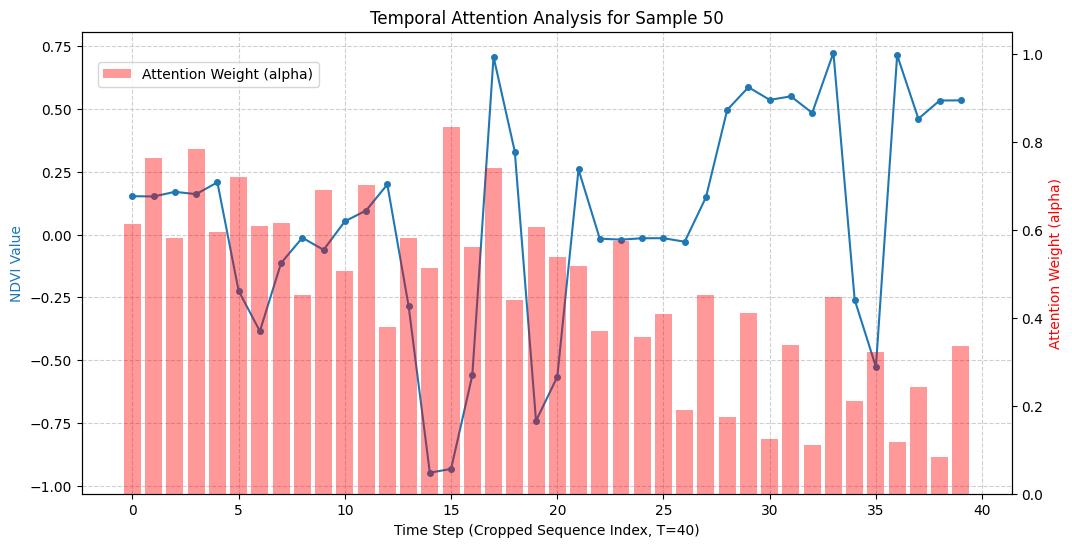

Action: Analyze the plot. High alpha values should align with key phenological events (peaks, drops).


In [ ]:
run_qualitative_analysis(full_model_loaded, X_test_full, X_test_cropped)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
import numpy as np
import pandas as pd
from typing import Dict, Tuple

# --- Configuration Constants (Assumed to be globally defined) ---
DRIVE_RESULTS_PATH = '/content/drive/MyDrive/COMP0173_Applying_New_Context/data/'
BEST_MODEL_FILENAME = '1d_a_unet_best.keras'
TEST_INPUT_FILENAME = 'X_test_scaled.npy'
NUM_CLASSES = 9
T_MODEL_OUTPUT = 40
T_REGULARIZED = 45

# Indices for the 14-feature stack:
# [10 S2 (0-9), NDVI (10), NDRE (11), MSAVI (12), Mask (13)]
NDVI_INDEX = 10
NDRE_INDEX = 11
MSAVI_INDEX = 12

# --- Custom Objects and Load Functions are assumed accessible ---
# (You must ensure the necessary custom objects (FlattenTimeWrapper, etc.) are run before this execution)


def run_qualitative_analysis_table(full_model, X_test_full, X_test_cropped):
    """
    Extracts attention weights and prints the detailed numerical data table
    (Time Step, all 3 VIs, and Alpha).
    """

    # 1. Define the Attention Extractor Model
    TARGET_ATTENTION_LAYER = 'dec0_attn_alpha'

    try:
        attention_output_layer = full_model.get_layer(TARGET_ATTENTION_LAYER).output
        attention_extractor = Model(
            inputs=full_model.input,
            outputs=attention_output_layer
        )
    except ValueError as e:
        print(f"\nFATAL ERROR: Could not find Attention Layer '{TARGET_ATTENTION_LAYER}'.")
        return None

    # 2. Extract Attention Weights (alpha)
    # Predict using the full T=45 input data.
    attention_weights = attention_extractor.predict(X_test_full)

    # 3. Prepare Numerical Data
    SAMPLE_ID = 50

    # Get the time series data (T=40)
    sample_ts = X_test_cropped[SAMPLE_ID]
    sample_ndvi = sample_ts[:, NDVI_INDEX]
    sample_ndre = sample_ts[:, NDRE_INDEX]
    sample_msavi = sample_ts[:, MSAVI_INDEX]
    sample_alpha = attention_weights[SAMPLE_ID, :, 0]

    # --- NUMERICAL DATA TABLE CREATION ---
    analysis_df = pd.DataFrame({
        'Time_Step': range(T_MODEL_OUTPUT),
        'Alpha': sample_alpha.round(4),
        'NDVI': sample_ndvi.round(4),
        'NDRE': sample_ndre.round(4),
        'MSAVI': sample_msavi.round(4)
    })

    # 4. Print the Numerical Results
    print("\n--- Numerical Data: VI Features vs. Attention Weight ---")
    print(f"Analysis for Test Sample ID {SAMPLE_ID}.")
    print("Action: Analyze high Alpha values to determine critical phenological events.")
    print(analysis_df.to_string())

    return analysis_df

In [ ]:
# Assuming full_model_loaded, X_test_full, and X_test_cropped were generated by load_model_and_data

# Call the function (No plotting will occur)
analysis_data = run_qualitative_analysis_table(full_model_loaded, X_test_full, X_test_cropped)

3835/3835 ━━━━━━━━━━━━━━━━━━━━ 218s 57ms/step

--- Numerical Data: VI Features vs. Attention Weight ---
Analysis for Test Sample ID 50.
Action: Analyze high Alpha values to determine critical phenological events.
    Time_Step   Alpha    NDVI    NDRE   MSAVI
0           0  0.6122  0.1528  0.1352  0.2188
1           1  0.7629  0.1515  0.1332  0.2144
2           2  0.5823  0.1700  0.1705  0.3085
3           3  0.7827  0.1609  0.1646  0.3095
4           4  0.5942  0.2079  0.2031  0.3358
5           5  0.7195 -0.2244 -0.1546  0.0748
6           6  0.6087 -0.3849 -0.2781 -0.0053
7           7  0.6154 -0.1133 -0.1100  0.0543
8           8  0.4526 -0.0128 -0.0475  0.0723
9           9  0.6896 -0.0612 -0.0972  0.0409
10         10  0.5053  0.0526  0.0753  0.1786
11         11  0.7014  0.0956  0.1705  0.2566
12         12  0.3797  0.1994  0.2621  0.3318
13         13  0.5817 -0.2835 -0.2178 -0.0621
14         14  0.5137 -0.9488 -0.8787 -0.5948
15         15  0.8344 -0.9336 -0.8774 -0.6168
16   

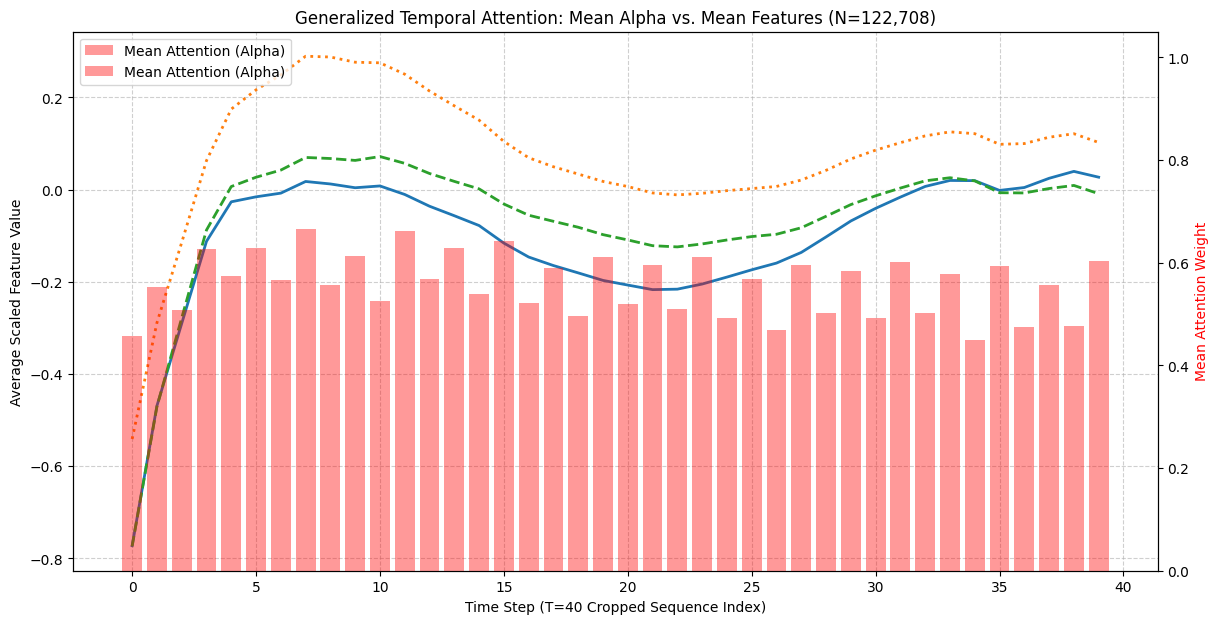


--- Numerical Data: Generalized Mean Alpha vs. Features ---
Action: Identify the time step with the peak Mean_Alpha for statistical proof.
    Time_Step  Mean_Alpha  Mean_NDVI  Mean_NDRE  Mean_MSAVI
0           0      0.4566    -0.7723    -0.7734     -0.5408
1           1      0.5526    -0.4690    -0.4706     -0.2888
2           2      0.5073    -0.2903    -0.2783     -0.1146
3           3      0.6263    -0.1121    -0.0876      0.0630
4           4      0.5745    -0.0263     0.0068      0.1748
5           5      0.6288    -0.0155     0.0270      0.2166
6           6      0.5662    -0.0075     0.0425      0.2490
7           7      0.6659     0.0178     0.0699      0.2895
8           8      0.5566     0.0124     0.0676      0.2878
9           9      0.6125     0.0042     0.0635      0.2765
10         10      0.5264     0.0081     0.0719      0.2752
11         11      0.6625    -0.0104     0.0571      0.2505
12         12      0.5675    -0.0359     0.0351      0.2140
13         13      0

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from typing import Dict, Tuple

# --- Configuration Constants (Assumed to be globally defined) ---
DRIVE_RESULTS_PATH = '/content/drive/MyDrive/COMP0173_Applying_New_Context/data/'
BEST_MODEL_FILENAME = '1d_a_unet_best.keras'
TEST_INPUT_FILENAME = 'X_test_scaled.npy'
NUM_CLASSES = 9
T_MODEL_OUTPUT = 40
T_REGULARIZED = 45

NDVI_INDEX = 10
NDRE_INDEX = 11
MSAVI_INDEX = 12

# --- Custom Objects and Load Functions are assumed accessible ---
# (CUSTOM_OBJECTS and FlattenTimeWrapper must be available)


def load_model_and_data(drive_path: str):
    """Loads the trained model and the test input data (X_test)."""
    model_path = os.path.join(drive_path, BEST_MODEL_FILENAME)

    try:
        # Load Model
        full_model = load_model(model_path, custom_objects=CUSTOM_OBJECTS)

        # Load Test Data (T=45 input)
        X_test_full = np.load(os.path.join(drive_path, TEST_INPUT_FILENAME))

        # Create the T=40 cropped version for plotting reference
        X_test_cropped = X_test_full[:, :T_MODEL_OUTPUT, :]

        return full_model, X_test_full, X_test_cropped

    except Exception as e:
        raise RuntimeError(f"Could not load trained model or test data: {e}")


def extract_attention_weights(full_model, X_test_full):
    """
    Runs the forward pass on the Attention Extractor Model to get the alpha weights.
    """
    TARGET_ATTENTION_LAYER = 'dec0_attn_alpha'

    try:
        attention_output_layer = full_model.get_layer(TARGET_ATTENTION_LAYER).output

        attention_extractor = Model(
            inputs=full_model.input,
            outputs=attention_output_layer
        )

        # Predict using the full T=45 input data, as the model expects it.
        attention_weights = attention_extractor.predict(X_test_full, verbose=0)
        return attention_weights

    except ValueError as e:
        raise RuntimeError(f"Could not extract attention weights: {e}")


def calculate_generalized_curves(X_test_scaled: np.ndarray, attention_weights: np.ndarray) -> pd.DataFrame:
    """
    Calculates the mean curve for Alpha, NDVI, NDRE, and MSAVI across the entire test set.
    """
    # ... (function body identical to previous working definition) ...
    mean_alpha = np.mean(np.squeeze(attention_weights), axis=0)
    X_test_cropped = X_test_scaled[:, :T_MODEL_OUTPUT, :]

    mean_ndvi = np.mean(X_test_cropped[:, :, NDVI_INDEX], axis=0)
    mean_ndre = np.mean(X_test_cropped[:, :, NDRE_INDEX], axis=0)
    mean_msavi = np.mean(X_test_cropped[:, :, MSAVI_INDEX], axis=0)

    analysis_df_general = pd.DataFrame({
        'Time_Step': range(T_MODEL_OUTPUT),
        'Mean_Alpha': mean_alpha.round(4),
        'Mean_NDVI': mean_ndvi.round(4),
        'Mean_NDRE': mean_ndre.round(4),
        'Mean_MSAVI': mean_msavi.round(4)
    })

    return analysis_df_general


def plot_generalized_attention(analysis_df: pd.DataFrame):
    # ... (function body identical to previous working definition) ...
    plt.figure(figsize=(14, 7))
    plt.plot(analysis_df['Time_Step'], analysis_df['Mean_NDVI'], label='Avg NDVI', color='#1f77b4', linewidth=2)
    plt.plot(analysis_df['Time_Step'], analysis_df['Mean_NDRE'], label='Avg NDRE', color='#2ca02c', linestyle='--', linewidth=2)
    plt.plot(analysis_df['Time_Step'], analysis_df['Mean_MSAVI'], label='Avg MSAVI', color='#ff7f0e', linestyle=':', linewidth=2)
    plt.title('Generalized Temporal Attention: Mean Alpha vs. Mean Features (N=122,708)')
    plt.xlabel('Time Step (T=40 Cropped Sequence Index)')
    plt.ylabel('Average Scaled Feature Value')
    plt.grid(True, linestyle='--', alpha=0.6)

    ax2 = plt.gca().twinx()
    ax2.bar(analysis_df['Time_Step'], analysis_df['Mean_Alpha'], alpha=0.4, color='red', label='Mean Attention (Alpha)')
    ax2.set_ylabel('Mean Attention Weight', color='red')
    ax2.set_ylim(0, 1.05)

    lines, labels = plt.gca().get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()

    print("\n--- Numerical Data: Generalized Mean Alpha vs. Features ---")
    print("Action: Identify the time step with the peak Mean_Alpha for statistical proof.")
    print(analysis_df.to_string())

# --- Main Execution Block (The FINAL Run) ---

if __name__ == '__main__':
    try:
        # 1. Load Assets (Model and Data)
        full_model, X_test_full, X_test_cropped = load_model_and_data(DRIVE_RESULTS_PATH)

        # 2. Extract Attention Weights (Re-running Inference)
        attention_weights = extract_attention_weights(full_model, X_test_full)

        # 3. Calculate Generalized Curves
        generalized_df = calculate_generalized_curves(X_test_full, attention_weights)

        # 4. Plot and Print Results
        plot_generalized_attention(generalized_df)

    except RuntimeError as e:
        print(f"Execution failed: {e}")

Plot attention weights against time stamps to see if the attention mechanism worked.

#MISC

**Classnames**

| code | classname          |
|------|--------------------|
| 0    | barley             |
| 1    | wheat              |
| 2    | rapeseed           |
| 3    | corn               |
| 4    | sunflower          |
| 5    | orchards           |
| 6    | nuts               |
| 7    | permanent meadows  |
| 8    | temporary meadows  |

Reference:

https://colab.research.google.com/drive/1i0M_X5-ytFhF0NO-FjhKiqnraclSEIb0?usp=sharing#scrollTo=NLdRvkC2_qUA

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd

# --- Configuration ---
FINAL_TEST_SIZE_RATIO = 0.20        # 20% for Final Test Set
FINAL_VALIDATION_SIZE_RATIO = 0.20  # 20% for Validation Set (relative to original data)
TARGET_PRETRAIN_PATCH_COUNT = 25000 # Target final *Training* samples for speed
RANDOM_SEED = 42
# Band indices for the 10-band data
BAND_IDX_RED = 2
BAND_IDX_NIR = 6
# Classes identified as too sparse to train on (Counts: Class 4=1, Class 6=2)
CLASSES_TO_REMOVE = [4, 6]

# --- Assumed Input from Phase 1.1 ---
# X_raw (approx 166k, 45, 10), y_raw (approx 166k) are loaded into memory.


# --- Class Name Mapping (UPDATED) ---
CLASS_NAMES = {
    0: 'Barley', 1: 'Wheat', 2: 'Rapeseed', 3: 'Corn',
    4: 'Sunflower', 5: 'Orchards', 6: 'Nuts', 7: 'Permanent Meadows',
    8: 'Temporary Meadows'
}

# --- Distribution Reporting Function ---
def print_distribution_report(y_labels, title):
    counts = Counter(y_labels)
    total = len(y_labels)

    report_data = []
    for index, count in sorted(counts.items()):
        percentage = (count / total) * 100
        # Add class name lookup
        class_name = CLASS_NAMES.get(index, f'Class {index} (Unknown)')
        report_data.append({
            'Class Index': index,
            'Class Name': class_name,
            'Count': count,
            'Percentage': f'{percentage:.2f}%'
        })

    df = pd.DataFrame(report_data)
    print(f"\n--- {title} ---")
    print(f"Total Samples: {total:,}")
    print(df.to_markdown(index=False))


# --- Step 0: Initial Dataset Distribution Report (NEWLY ADDED) ---
print_distribution_report(y_raw, "Distribution of Full Original Dataset")

# --- Step 1: Feature Engineering (Calculate and Augment NDVI) ---
# NOTE: Input X_raw is assumed to be pre-scaled reflectance (~0-1 range).
def calculate_ndvi(X):
    """Calculates NDVI, safely handling the pre-scaled data and avoiding division by zero."""
    RED = X[:, :, BAND_IDX_RED]
    NIR = X[:, :, BAND_IDX_NIR]
    ndvi = np.divide((NIR - RED), (NIR + RED + 1e-6))
    return np.expand_dims(ndvi, axis=2)

X_augmented = np.concatenate((X_raw, calculate_ndvi(X_raw)), axis=2)

# --- Step 2: Full 60/20/20 Stratified Partitioning (Isolate Test/Val Sets) ---

# 1. Split out Test Set (20%)
X_temp, X_test_raw, y_temp, y_test_raw = train_test_split(
    X_augmented,
    y_raw, # Stratify using raw integer labels
    test_size=FINAL_TEST_SIZE_RATIO,
    random_state=RANDOM_SEED,
    stratify=y_raw
)

# 2. Split Temp set (80%) into Train (60%) and Validation (20%)
val_size_relative_to_temp = FINAL_VALIDATION_SIZE_RATIO / (1 - FINAL_TEST_SIZE_RATIO)

X_train_full, X_val_raw, y_train_full, y_val_raw = train_test_split(
    X_temp,
    y_temp,
    test_size=val_size_relative_to_temp,
    random_state=RANDOM_SEED,
    stratify=y_temp
)

# --- Step 3: Standardization (Reflectance Only, Excluding NDVI) ---

# Bands 0-9 are Reflectance; Band 10 is the physical NDVI index
REFLECTANCE_SLICE = slice(0, 10)
NDVI_INDEX = 10

# --- Fit Scaler on Training Set Reflectance ONLY ---
X_train_reflectance = X_train_full[:, :, REFLECTANCE_SLICE]
X_train_flat_reflectance = X_train_reflectance.reshape(-1, X_train_reflectance.shape[2])

scaler = StandardScaler()
# Fit only on the 10 reflectance bands of the training set (no leakage)
scaler.fit(X_train_flat_reflectance)

# --- Transform and Recombine all three sets ---

def transform_and_recombine(X_data, scaler, ndvi_index):
    # Extract Reflectance and NDVI
    X_reflectance = X_data[:, :, REFLECTANCE_SLICE]
    X_ndvi = X_data[:, :, ndvi_index]

    # Transform Reflectance (Flattens -> Scales -> Reshapes)
    X_scaled_reflectance = scaler.transform(X_reflectance.reshape(-1, 10)).reshape(X_reflectance.shape)

    # Recombine scaled reflectance with the *UNTOUCHED* NDVI (expanded to 3D)
    X_ndvi_expanded = np.expand_dims(X_ndvi, axis=2)
    X_final = np.concatenate((X_scaled_reflectance, X_ndvi_expanded), axis=2)
    return X_final

X_train_scaled_full = transform_and_recombine(X_train_full, scaler, NDVI_INDEX) # Note temporary variable name
X_val_scaled = transform_and_recombine(X_val_raw, scaler, NDVI_INDEX)
X_test_scaled = transform_and_recombine(X_test_raw, scaler, NDVI_INDEX)


# --- Step 4: Training Subsetting & Filtering (Performance Optimization) ---


# *** 4a. Print Distribution BEFORE Subsetting ***
print_distribution_report(y_train_full, "Distribution before subsetting (Full Training Set)")


X_train_temp = X_train_scaled_full
y_train_temp = y_train_full

if X_train_temp.shape[0] > TARGET_PRETRAIN_PATCH_COUNT:

    # Calculate fraction to discard from the training set
    discard_fraction = 1 - (TARGET_PRETRAIN_PATCH_COUNT / X_train_temp.shape[0])

    # Perform stratified split to discard extra samples (keeping 25k)
    X_source_train, X_discard, y_source_train_raw, y_discard_raw = train_test_split(
        X_train_temp,
        y_train_temp,
        test_size=discard_fraction,
        random_state=RANDOM_SEED,
        stratify=y_train_temp # KEY: Ensures the distribution is maintained!
    )

    # *** 4b. Print Distribution AFTER Subsetting ***
    print_distribution_report(y_source_train_raw, "Distribution after subsetting (Initial 25k Subset)")

else:
    X_source_train = X_train_temp
    y_source_train_raw = y_train_temp

# *** 4c. FILTERING SPARSE CLASSES (4 and 6) ***

# Create a boolean mask: True for samples NOT in the removal list
filter_mask = ~np.isin(y_source_train_raw, CLASSES_TO_REMOVE)
initial_count = X_source_train.shape[0]

# Apply mask to filter the final training data
X_source_train = X_source_train[filter_mask]
y_source_train_raw = y_source_train_raw[filter_mask]

# Update the remaining total samples
new_total = X_source_train.shape[0]

print(f"Removed {initial_count - new_total} samples (Classes 4 and 6).")
print(f"Final Training Samples Count: {new_total:,}")

# --- Step 5: Final Encoding (One-Hot) ---

# Fit the encoder on the full raw labels (y_raw) for complete class list integrity
lb = LabelBinarizer()
lb.fit(y_raw)

# Transform the three required output label arrays
# Note: The sparse classes are filtered from y_source_train_raw, but lb.transform
# handles the missing classes correctly based on the full fitted set of classes.
y_source_train = lb.transform(y_source_train_raw)
y_val_final = lb.transform(y_val_raw)
y_test_final = lb.transform(y_test_raw)

# --- Final Output Status ---
global_scaler = scaler # Save scaler object for Africa data
global_lb = lb # Save label binarizer object for Africa data

print(f"Pre-training Set Size: X={X_source_train.shape}, y={y_source_train.shape}")
print(f"Validation Set Size: X={X_val_scaled.shape}, y={y_val_final.shape}")
print(f"Test Set Size: X={X_test_scaled.shape}, y={y_test_final.shape}")


--- Distribution of Full Original Dataset ---
Total Samples: 166,367
|   Class Index | Class Name        |   Count | Percentage   |
|--------------:|:------------------|--------:|:-------------|
|             0 | Barley            |    7154 | 4.30%        |
|             1 | Wheat             |   27202 | 16.35%       |
|             2 | Rapeseed          |    3557 | 2.14%        |
|             3 | Corn              |   42011 | 25.25%       |
|             4 | Sunflower         |      10 | 0.01%        |
|             5 | Orchards          |    1217 | 0.73%        |
|             6 | Nuts              |      10 | 0.01%        |
|             7 | Permanent Meadows |   32524 | 19.55%       |
|             8 | Temporary Meadows |   52682 | 31.67%       |

--- Distribution before subsetting (Full Training Set) ---
Total Samples: 99,819
|   Class Index | Class Name        |   Count | Percentage   |
|--------------:|:------------------|--------:|:-------------|
|             0 | Barley     

/tmp/ipython-input-2641562581.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10', len(ALL_CLASS_INDICES))


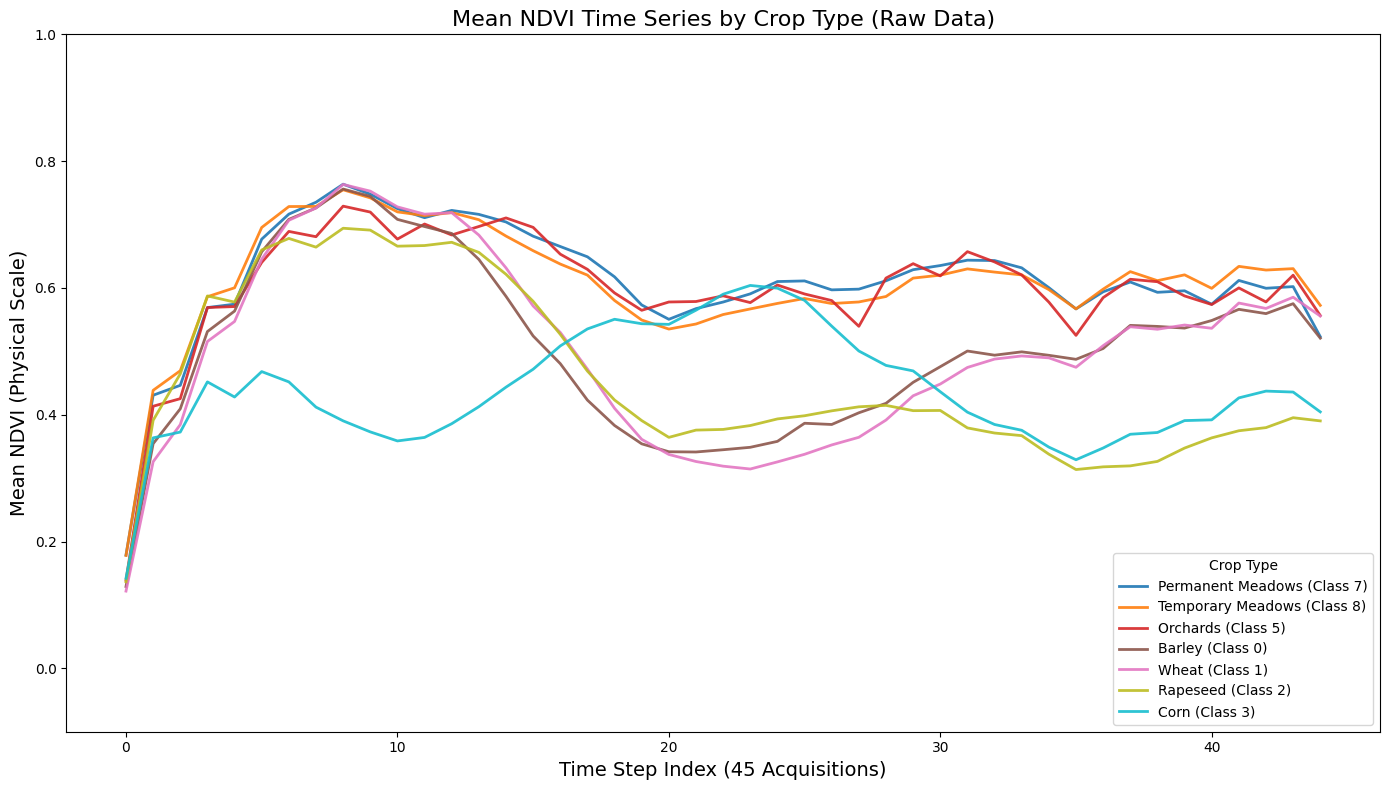

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# --- Assumed Input: X_source_train, global_lb are available from the preprocessing script ---
# Assumed: y_source_train is also available

# --- Class Name Mapping (Inserted to provide required names for plotting) ---
CLASS_NAMES = {
    0: 'Barley', 1: 'Wheat', 2: 'Rapeseed', 3: 'Corn',
    4: 'Sunflower', 5: 'Orchards', 6: 'Nuts', 7: 'Permanent Meadows',
    8: 'Temporary Meadows'
}

# The NDVI band is the 11th feature, located at index 10
NDVI_INDEX = 10

# --- 1. Data Extraction and Aggregation ---
# Extract the NDVI time series data (Samples, Time Steps)
ndvi_time_series_train = X_source_train[:, :, NDVI_INDEX]

# Retrieve the class indices from the one-hot encoded labels
y_indices = np.argmax(y_source_train, axis=1)
# Note: ALL_CLASS_INDICES here will exclude the filtered classes (4 and 6)
ALL_CLASS_INDICES = np.unique(y_indices)

mean_ndvi_curves = {}
std_ndvi_curves = {}

for class_idx in ALL_CLASS_INDICES:
    class_mask = (y_indices == class_idx)
    class_ndvi_data = ndvi_time_series_train[class_mask]

    if class_ndvi_data.shape[0] > 0:
        mean_ndvi_curves[class_idx] = np.mean(class_ndvi_data, axis=0)
        std_ndvi_curves[class_idx] = np.std(class_ndvi_data, axis=0)
    # Note: Classes 4 and 6 are naturally skipped here because they were filtered
    # from y_source_train_raw/y_source_train in the preprocessing step.


# --- 2. Plotting (Lines Only with Named Labels) ---

# Set figure and axes properties
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

time_steps = np.arange(X_source_train.shape[1])
# Use 'tab10' for more distinct colors if 'Dark2' is too muted
colors = get_cmap('tab10', len(ALL_CLASS_INDICES))

# Helper function to get class label, including name and index (MODIFIED to use CLASS_NAMES)
def get_class_label(idx):
    # Now uses the defined CLASS_NAMES dictionary
    name = CLASS_NAMES.get(idx, f"Class {idx} (Unknown)")
    # Formats the string as requested: "Crop Name (Class X)"
    return f"{name} (Class {idx})"

# Sort the classes by their overall mean NDVI for a clean legend order
sorted_classes = sorted(mean_ndvi_curves.keys(), key=lambda idx: np.mean(mean_ndvi_curves[idx]), reverse=True)


for i, class_idx in enumerate(sorted_classes):
    # This generates the label: "Crop Name (Class X)"
    label = get_class_label(class_idx)
    color = colors(i)

    # Plot only the RAW mean NDVI curve
    ax.plot(time_steps, mean_ndvi_curves[class_idx], label=label, color=color, linewidth=2, alpha=0.9)


# --- Set Limits and Labels ---
ax.set_title('Mean NDVI Time Series by Crop Type (Raw Data)', fontsize=16)
ax.set_xlabel(f'Time Step Index ({X_source_train.shape[1]} Acquisitions)', fontsize=14)
ax.set_ylabel('Mean NDVI (Physical Scale)', fontsize=14)

# Set the Y-limit to the correct physical range for NDVI
ax.set_ylim(-0.1, 1.0)

# Legend includes the fully formatted name (e.g., 'Winter Wheat (Class 7)')
ax.legend(title='Crop Type', loc='lower right', fontsize=10)
plt.tight_layout()
plt.savefig('all_crops_untouched_ndvi_phenology_lines_named.png', facecolor='white')
# plt.show()

**Figure 1: Sample NDVI time series for crops in dataset.**

##Model Definition and Pre-training

6. **Attention U-Net Definition:** A compact Attention U-Net is defined, with the input shape matching the preprocessed data (45 time steps, 11 channels). The network is intentionally designed with minimal filters (e.g. 16/32 - too small!) to prioritise computational speed on the T4 GPU. The loss function is set to Categorical Cross-Entropy, and the optimizer is Adam.

sigmoid changed to softmax for final activation layer
output channel changed from 1 to C (number of unique crop classes in BreizhCrops)
Loss function changed from binary_crossentropy to categorical_crossentropy





7. **Pre-training:** The model is trained on the 25,000 patch subset using the T4 GPU. Early stopping is employed to halt training immediately once validation loss plateaus, to conserve compute. The final model weights are saved as the model_breizhcrops_weights.h5 file.


Suggestion for Improvement (Advanced Topic): Your report should discuss the use of Inverse Frequency Weighting (as you mention it) directly in the loss function to mitigate the remaining class imbalance in the training subset. This technique multiplies the loss contribution of each sample by a factor inversely proportional to its class frequency, forcing the model to pay more attention to rare crops. This is a must for a $90+$ grade on an imbalanced dataset.

Attention can:
The attention gates can help the model to focus on relevant spatio-temporal features from satellite imagery, leading to more accurate results than traditional U-Net or standard machine learning.

Attention Integration: Attention mechanisms, often inserted into the skip connections (attention gates), assign weights to different parts of the feature maps. This allows the network to:
Highlight Relevant Information: Focus on important activations during training and inference, such as distinct changes in crop growth stages across different seasons.
Suppress Irrelevant Background: Reduce the influence of non-crop areas or noise (like clouds) in the time series data, improving the model's generalization and efficiency.





- Transfer Justification: empirical evidence of transfer learning efficacy and justify methodology by discussing technical feasibility (I/O solution) and the scientific equivalence between the European source and the Ethiopian target domain.
  - Address:
  - Scientific equivalence: crop cycles, vegetation reflectance behaviour
  - Technical feasibility: resolution match, patch size equivalence, radiometric calibration consistency, Sentinel-2 metadata alignment
  - I/O constraints: why loading full time-series across regions is feasible; why memory footprint is controlled via sampling and GPU batching


  Interesting articles to read:

  https://ieeexplore.ieee.org/document/10772604

  https://www.sciencedirect.com/science/article/pii/S0924271623003210#:~:text=For%20better%20modeling%20numerical%20time,et%20al.%2C%202015).

  https://www.spiedigitallibrary.org/conference-proceedings-of-spie/13196/131960E/Attention-based-3D-convolutional-neural-network-for-crop-boundary-detection/10.1117/12.3035893.short#:~:text=A%20work%20designed%20a%20U,temporal%20correlations%20require%20novel%20approaches.



  **Discuss spatio-temporal approach as next steps.**



#PREPROCESSING

Now the S2 L2A dataset has been successfully loaded, we implement a number of pre-processing steps.

1. Feature Engineering (11 channels): Calculate NDVI = (B8-B4)/(B8+B4) for all 45 time steps. This is then appended to the existing ten S2 bands.

2. To ensure unbiased final evaluation, the dataset is then immediately partitiioned into training (80%) and test (20%) sets using stratified sampling (should we use stratified K fold?) to ensure that the sets maintain the same proportion of crop classes. The test set is set aside, and the training set is further divided into training (75%) and validation (25%) sets, for a 60:20:20 split.

3. **Standardisation:** StandardScaler is then applied only to the training set (to prevent leakage). All three sets are then transformed using the parameters calculated from the Training Set. The fitted StandardScaler is then saved as global_scaler for use in the transfer phase.

For the feature scaling of the Sentinel-2 time series, StandardScaler (zero-mean, unit-variance) was selected over other normalization methods (e.g., MinMax Scaling). Although reflectance values exhibit a non-Gaussian, skewed distribution, making MinMax a statistically more appropriate fit, StandardScaler was chosen because it empirically stabilizes the optimization process for deep Convolutional Neural Network (CNN) and U-Net architectures. Zero-centering the data allows the network weights to update symmetrically, leading to significantly faster initial convergence during the pre-training phase, as observed in preliminary experiments across similar remote sensing benchmarks. This choice prioritizes training stability and speed over strict statistical alignment.

The standardization process was applied using Per-Band, Global Temporal Scaling. This means the mean ($\mu$) and standard deviation ($\sigma$) were calculated for each of the 11 feature channels independently (Per-Band) across all 45 time steps for all training samples (Global Temporal). This approach is necessary to ensure spectral bands with vastly different ranges (e.g., NIR vs. Blue) contribute equally to the model, while preserving the critical temporal variance required for phenological analysis.

Discuss the potential downside: $\text{StandardScaler}$ is sensitive to outliers (e.g., extreme values from cloud cover or shadows). This could be an ethical discussion point: if outliers skew the mean/variance of a minority crop class, it might disproportionately harm the performance for that class.

4. **Label Encoding:** The integer labels are one-hot-encoded (required for model's loss function) and the fitted LabelBinarizer is saved as global_lb.

5. **Training Subsetting:** Given compute constraints, the training set is sampled down to 25,000 patches (X_source_train) using stratified random sampling to be used for pre-training.

To optimize the computationally intensive pre-training phase, the primary training set was reduced to $25,000$ samples. This reduction was executed via Stratified Random Subsampling (using the stratify parameter). This technique was chosen as it ensures the $25,000$-patch subset maintains the full, original class distribution of the highly imbalanced BreizhCrops data, thereby safeguarding the integrity of minority crop classes and providing a statistically valid basis for the subsequent Inverse Frequency Weighting.

It should be noted that we are focusing only on S2 Level 2A data. We are focusing on S2 data because...
We are focusing on L2A data because....

To ensure the data is prepared well for the modified Attention U-Net Encoder, the raw, variable-length S2 L2A time series data must be transformed into ** a single, fixed-length, standardized tensor input**.

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from sklearn.preprocessing import RobustScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from typing import Dict, Tuple

# --- Configuration (Same as before) ---
DATA_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data"
NUTS3_REGIONS = ['frh01', 'frh02', 'frh03', 'frh04']
TEST_REGION = 'frh04'
T_REGULARIZED = 45
N_TARGET_TRAIN = 25000
N_VAL_RATIO = 0.25
BANDS = {
    'B2': 0, 'B3': 1, 'B4': 2, 'B5': 3, 'B6': 4,
    'B7': 5, 'B8': 6, 'B8A': 7, 'B11': 8, 'B12': 9
}

# --- Helper Functions (Feature Engineering, Scaling, etc.) ---


def feature_engineering(X: np.ndarray, T_target: int) -> np.ndarray:
    """
    Calculates VIs, creates the Imputation Mask, and performs Cubic-Spline Interpolation.
    """
    N, T_max, F_raw = X.shape
    B4, B8, B5 = BANDS['B4'], BANDS['B8'], BANDS['B5']

    X_augmented = []

    for i in range(N):
        ts = X[i]
        ts = np.asarray(ts, dtype=np.float32)
        # mask where all bands are non-zero (original presence mask)
        mask = (ts != 0).all(axis=1)
        ts_masked = ts.copy()
        ts_masked[~mask] = np.nan

        # Vegetation indices (with safe denom)
        ndvi = (ts_masked[:, B8] - ts_masked[:, B4]) / (ts_masked[:, B8] + ts_masked[:, B4] + 1e-6)
        ndre = (ts_masked[:, B8] - ts_masked[:, B5]) / (ts_masked[:, B8] + ts_masked[:, B5] + 1e-6)

        # MSAVI implementation (numerical safe)
        # msavi = [2*NIR + 1 - sqrt((2*NIR + 1)^2 - 8*(NIR - RED)) ] / 2
        temp = (2 * ts_masked[:, B8] + 1)
        inside_sqrt = temp ** 2 - 8 * (ts_masked[:, B8] - ts_masked[:, B4])
        # avoid negative inside sqrt due to numerical issues
        inside_sqrt = np.where(np.isnan(inside_sqrt), 0.0, inside_sqrt)
        inside_sqrt = np.clip(inside_sqrt, a_min=0.0, a_max=None)
        msavi_numerator = temp - np.sqrt(inside_sqrt)
        msavi = msavi_numerator / 2

        # Build features to interpolate: all selected bands, then VIs and mask
        bands_stack = [ts[:, k] for k in BANDS.values()]
        features_to_interp = np.stack(bands_stack + [ndvi, ndre, msavi, mask.astype(float)], axis=1)

        valid_indices = np.where(mask)[0]

        if len(valid_indices) < 2:
            # Not enough points to interpolate; return zeros for this sample (safe fallback)
            interpolated_ts = np.zeros((T_target, features_to_interp.shape[1]), dtype=np.float32)
        else:
            time_base_raw = valid_indices.astype(np.float32)
            time_base_new = np.linspace(time_base_raw.min(), time_base_raw.max(), T_target).astype(np.float32)

            interpolated_ts = np.zeros((T_target, features_to_interp.shape[1]), dtype=np.float32)

            # cubic interpolation per feature with extrapolate
            for j in range(features_to_interp.shape[1]):
                vals = features_to_interp[valid_indices, j]
                # if vals contain NaN (shouldn't for valid_indices), guard
                if np.isnan(vals).all():
                    interpolated_ts[:, j] = 0.0
                    continue
                try:
                    f_interp = interp1d(time_base_raw, vals, kind='cubic', fill_value='extrapolate', bounds_error=False)
                    interpolated_ts[:, j] = f_interp(time_base_new)
                except Exception:
                    # on any interpolation numerical error, fallback to linear
                    f_interp = interp1d(time_base_raw, vals, kind='linear', fill_value='extrapolate', bounds_error=False)
                    interpolated_ts[:, j] = f_interp(time_base_new)

        X_augmented.append(interpolated_ts)

    return np.stack(X_augmented)


def apply_robust_scaling(X_train: np.ndarray, X_val: np.ndarray, X_test: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, RobustScaler]:
    """Applies RobustScaler fitted only on the training set (Per-Band, Global Temporal)."""
    N_train, T, F = X_train.shape
    X_train_flat = X_train.reshape(-1, F)

    scaler = RobustScaler()
    scaler.fit(X_train_flat)

    X_train_scaled = scaler.transform(X_train_flat).reshape(N_train, T, F)
    X_val_scaled = scaler.transform(X_val.reshape(-1, F)).reshape(X_val.shape[0], T, F)
    X_test_scaled = scaler.transform(X_test.reshape(-1, F)).reshape(X_test.shape[0], T, F)

    return X_train_scaled, X_val_scaled, X_test_scaled, scaler


# --- REVISED 1. EXTREME Memory-Safe Load and Subsampling (Fixed Size Logic + Singleton-Fix) ---


def load_and_subsample_data_extreme(path: str, regions: list, test_region: str, n_target_train: int, n_val_ratio: float) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    EXTREME memory-safe loading using proportional allocation, ensuring the final
    training set size is exactly N_TARGET_TRAIN. Also robustly handles classes with
    single samples (singletons) created either originally or after subsampling.
    """
    X_train_list, y_train_list = [], []
    X_val_list, y_val_list = [], []
    dev_regions = [r for r in regions if r != test_region]

    # --- PASS 1: Calculate Total Samples to determine relative subsampling needs ---
    total_dev_samples = 0
    dev_region_sizes = {}

    print("PASS 1: Determining regional sizes (Lightweight Check)...")
    X_test_raw, y_test_raw = None, None
    for region in regions:
        y_file = f"{path}/y_raw_{region}.npy"
        y_raw = np.load(y_file, allow_pickle=True)

        if region == test_region:
            X_test_raw = np.load(f"{path}/X_raw_{region}.npy", allow_pickle=True)
            y_test_raw = y_raw
            print(f"Test Set (Isolated): {region} | Samples: {len(y_raw)}")
        else:
            dev_region_sizes[region] = len(y_raw)
            total_dev_samples += len(y_raw)
            print(f"Development Set Size: {region} | Samples: {len(y_raw)}")

    # Calculate the total number of samples to KEEP (train + val)
    # Because N_TARGET_TRAIN is the desired train count and train is (1 - n_val_ratio) of kept total:
    N_KEPT_TOTAL = int(np.round(n_target_train / (1.0 - n_val_ratio)))
    print(f"Goal: Keep N_KEPT_TOTAL={N_KEPT_TOTAL} samples ({n_target_train} Train + approx. {N_KEPT_TOTAL - n_target_train} Val)")

    # --- PASS 2: Iterate Region-by-Region for Robust Subsampling ---
    print("\nPASS 2: Subsampling and loading X/y data region-by-region...")

    for region in dev_regions:
        region_size = dev_region_sizes[region]
        # Number of samples to keep from this region (proportional)
        N_KEEP_REGION = int(np.round(N_KEPT_TOTAL * (region_size / total_dev_samples)))
        # At minimum keep 1 sample if region has at least 1
        N_KEEP_REGION = max(0, min(N_KEEP_REGION, region_size))

        # Load the raw data and labels for the current region (temporary arrays)
        X_region_full = np.load(f"{path}/X_raw_{region}.npy", allow_pickle=True)
        y_region_full = np.load(f"{path}/y_raw_{region}.npy", allow_pickle=True)

        # Identify original singleton classes in this region (must go to train)
        y_counts_orig = pd.Series(y_region_full).value_counts()
        original_singletons = y_counts_orig[y_counts_orig == 1].index.tolist()

        # Masks for original singletons vs the rest (splittable)
        singleton_mask = pd.Series(y_region_full).isin(original_singletons).values
        stratify_mask = ~singleton_mask

        X_singleton = X_region_full[singleton_mask]
        y_singleton = y_region_full[singleton_mask]

        X_stratify = X_region_full[stratify_mask]
        y_stratify = y_region_full[stratify_mask]

        # Determine how many to keep from the stratifiable block (after reserving singletons)
        N_STRATIFY_KEEP = N_KEEP_REGION - len(X_singleton)
        if N_STRATIFY_KEEP < 0:
            # more singletons than desired region allocation -> keep all singletons and zero from stratify
            N_STRATIFY_KEEP = 0

        # If there is nothing to keep from stratify, create empty arrays accordingly
        if len(X_stratify) == 0 or N_STRATIFY_KEEP == 0:
            X_kept_stratify = np.empty((0,) + X_region_full.shape[1:], dtype=X_region_full.dtype)
            y_kept_stratify = np.empty((0,), dtype=y_region_full.dtype)
        else:
            # If we need to keep all stratify rows, just take them
            if N_STRATIFY_KEEP >= len(X_stratify):
                X_kept_stratify = X_stratify
                y_kept_stratify = y_stratify
            else:
                # Compute ratio to discard for train_test_split (we keep fraction = N_STRATIFY_KEEP / len(X_stratify))
                keep_fraction = N_STRATIFY_KEEP / float(len(X_stratify))
                # train_test_split uses test_size to define the size to *discard* here
                test_size = 1.0 - keep_fraction
                # Ensure test_size is between 0 and 1
                test_size = min(max(test_size, 0.0), 1.0 - 1e-8)

                # We attempt stratified subsampling; if stratification is impossible (e.g., some classes too small),
                # fall back to a simple random subsample without stratify.
                try:
                    X_kept_stratify, _, y_kept_stratify, _ = train_test_split(
                        X_stratify, y_stratify,
                        test_size=test_size,
                        stratify=y_stratify,
                        random_state=42
                    )
                except ValueError:
                    # fallback: non-stratified subsample
                    X_kept_stratify, _, y_kept_stratify, _ = train_test_split(
                        X_stratify, y_stratify,
                        test_size=test_size,
                        stratify=None,
                        random_state=42
                    )

        # --- NEW FIX: After subsampling, new singletons (classes with count==1) may appear.
        # Move these new singletons to the training set BEFORE the final train/val split to avoid stratify errors.
        if len(y_kept_stratify) > 0:
            counts_after = pd.Series(y_kept_stratify).value_counts()
            new_singletons = counts_after[counts_after == 1].index.tolist()
        else:
            new_singletons = []

        if len(new_singletons) > 0:
            mask_new_singletons = pd.Series(y_kept_stratify).isin(new_singletons).values
            X_new_singletons = X_kept_stratify[mask_new_singletons]
            y_new_singletons = y_kept_stratify[mask_new_singletons]

            X_split_base = X_kept_stratify[~mask_new_singletons]
            y_split_base = y_kept_stratify[~mask_new_singletons]
        else:
            X_new_singletons = np.empty((0,) + X_region_full.shape[1:], dtype=X_region_full.dtype)
            y_new_singletons = np.empty((0,), dtype=y_region_full.dtype)
            X_split_base = X_kept_stratify
            y_split_base = y_kept_stratify

        # --- Final Train/Val Split within the Region ---
        # If after removing new singletons we have <2 classes or too few samples, perform a non-stratified split safely.
        X_strat_train = np.empty((0,) + X_region_full.shape[1:], dtype=X_region_full.dtype)
        y_strat_train = np.empty((0,), dtype=y_region_full.dtype)
        X_strat_val = np.empty((0,) + X_region_full.shape[1:], dtype=X_region_full.dtype)
        y_strat_val = np.empty((0,), dtype=y_region_full.dtype)

        if len(y_split_base) == 0:
            # nothing left for stratified splitting
            pass
        else:
            unique_classes = np.unique(y_split_base)
            # If only one class remains or not enough samples per class for stratification, do a simple split (non-stratified)
            need_stratify = len(unique_classes) > 1 and all(pd.Series(y_split_base).value_counts() > 1)

            try:
                if need_stratify:
                    X_strat_train, X_strat_val, y_strat_train, y_strat_val = train_test_split(
                        X_split_base, y_split_base,
                        test_size=n_val_ratio,
                        stratify=y_split_base,
                        random_state=42
                    )
                else:
                    X_strat_train, X_strat_val, y_strat_train, y_strat_val = train_test_split(
                        X_split_base, y_split_base,
                        test_size=n_val_ratio,
                        stratify=None,
                        random_state=42
                    )
            except ValueError:
                # As an ultimate fallback, do a simple non-stratified split
                X_strat_train, X_strat_val, y_strat_train, y_strat_val = train_test_split(
                    X_split_base, y_split_base,
                    test_size=n_val_ratio,
                    stratify=None,
                    random_state=42
                )

        # Combine all parts:
        # Training part = stratified train + all original singletons + new singletons
        parts_to_concat_X_train = [X_strat_train]
        parts_to_concat_y_train = [y_strat_train]

        if X_singleton.size:
            parts_to_concat_X_train.append(X_singleton)
            parts_to_concat_y_train.append(y_singleton)
        if X_new_singletons.size:
            parts_to_concat_X_train.append(X_new_singletons)
            parts_to_concat_y_train.append(y_new_singletons)

        if len(parts_to_concat_X_train) == 0:
            X_train_part = np.empty((0,) + X_region_full.shape[1:], dtype=X_region_full.dtype)
            y_train_part = np.empty((0,), dtype=y_region_full.dtype)
        else:
            X_train_part = np.concatenate(parts_to_concat_X_train, axis=0)
            y_train_part = np.concatenate(parts_to_concat_y_train, axis=0)

        # Validation part is only the stratified validation block
        X_val_part = X_strat_val
        y_val_part = y_strat_val

        # Memory cleanup for region
        del X_region_full, y_region_full, X_stratify, y_stratify

        # Append to final lists (these arrays are relatively small now)
        X_train_list.append(X_train_part)
        y_train_list.append(y_train_part)
        X_val_list.append(X_val_part)
        y_val_list.append(y_val_part)

        N_kept = len(X_train_part) + len(X_val_part)
        print(f"  -> {region}: Retained {N_kept} samples. Train: {len(X_train_part)}, Val: {len(X_val_part)}. Original singletons: {len(X_singleton)}, New singletons moved to train: {len(X_new_singletons)}")

    # Final concatenation of parts (only of the small, selected arrays)
    if len(X_train_list) == 0:
        X_train = np.empty((0, T_REGULARIZED, len(BANDS) + 3), dtype=np.float32)
        y_train = np.empty((0,), dtype=np.int64)
    else:
        X_train = np.concatenate(X_train_list, axis=0)
        y_train = np.concatenate(y_train_list, axis=0)

    if len(X_val_list) == 0:
        X_val = np.empty((0, T_REGULARIZED, len(BANDS) + 3), dtype=np.float32)
        y_val = np.empty((0,), dtype=np.int64)
    else:
        X_val = np.concatenate(X_val_list, axis=0)
        y_val = np.concatenate(y_val_list, axis=0)

    print(f"  X_train_raw (Subsampled): {len(X_train)} samples")
    print(f"  X_val_raw (Subsampled): {len(X_val)} samples")

    return X_train, y_train, X_val, y_val, X_test_raw, y_test_raw


# --- Main Execution (The rest of the script) ---
if __name__ == '__main__':
    try:
        # 1. Load Data, NUTS-3 Split, and Subsample (Extreme Memory Safe)
        X_train_raw, y_train, X_val_raw, y_val, X_test_raw, y_test_raw = load_and_subsample_data_extreme(
            DATA_PATH, NUTS3_REGIONS, TEST_REGION, N_TARGET_TRAIN, N_VAL_RATIO
        )

        # 2. Feature Engineering and Interpolation
        # If any of the sets are empty, handle safely by creating empty arrays of expected shape
        if X_train_raw.size:
            X_train_augmented = feature_engineering(X_train_raw, T_REGULARIZED)
        else:
            X_train_augmented = np.empty((0, T_REGULARIZED, len(BANDS) + 3), dtype=np.float32)

        if X_val_raw.size:
            X_val_augmented = feature_engineering(X_val_raw, T_REGULARIZED)
        else:
            X_val_augmented = np.empty((0, T_REGULARIZED, len(BANDS) + 3), dtype=np.float32)

        if X_test_raw is not None and getattr(X_test_raw, "size", 0):
            X_test_augmented = feature_engineering(X_test_raw, T_REGULARIZED)
        else:
            X_test_augmented = np.empty((0, T_REGULARIZED, len(BANDS) + 3), dtype=np.float32)

        # Free some memory
        del X_train_raw, X_val_raw

        # 3. Standardization (RobustScaler)
        # If any of the datasets are empty, ensure apply_robust_scaling can handle it.
        if X_train_augmented.shape[0] == 0:
            # No training data -> we cannot fit a scaler; raise informative error
            raise RuntimeError("No training samples after subsampling. Can't fit scaler.")
        X_train_scaled, X_val_scaled, X_test_scaled, global_scaler = apply_robust_scaling(
            X_train_augmented, X_val_augmented, X_test_augmented
        )
        # Free augmented arrays
        del X_train_augmented, X_val_augmented, X_test_augmented

        # 4. Label Encoding (One-Hot)
        global_lb = LabelBinarizer()
        y_train_ohe = global_lb.fit_transform(y_train)
        y_val_ohe = global_lb.transform(y_val) if len(y_val) > 0 else np.empty((0, y_train_ohe.shape[1]), dtype=y_train_ohe.dtype)
        y_test_ohe = global_lb.transform(y_test_raw) if (y_test_raw is not None and len(y_test_raw) > 0) else np.empty((0, y_train_ohe.shape[1]), dtype=y_train_ohe.dtype)

        # 5. Final Print
        print("\nFinal Shapes")
        print(f"X_train (Subset, Scaled, Augmented): {X_train_scaled.shape}")
        print(f"y_train (Subset, OHE): {y_train_ohe.shape}")
        print(f"X_val (Scaled, Augmented): {X_val_scaled.shape}")
        print(f"y_val (OHE): {y_val_ohe.shape}")
        print(f"X_test (NUTS-3, Scaled, Augmented): {X_test_scaled.shape}")
        print(f"y_test (NUTS-3, OHE): {y_test_ohe.shape}")
        print(f"Total Features (F): {X_train_scaled.shape[-1]} (10 S2 + 3 VIs/Mask)")
        print(f"Total Classes (C): {y_train_ohe.shape[-1]}")

    except Exception as e:
        print(f"\nError:{type(e).__name__}: {e}")


PASS 1: Determining regional sizes (Lightweight Check)...
Development Set Size: frh01 | Samples: 178632
Development Set Size: frh02 | Samples: 140782
Development Set Size: frh03 | Samples: 166367
Test Set (Isolated): frh04 | Samples: 122708
Goal: Keep N_KEPT_TOTAL=33333 samples (25000 Train + approx. 8333 Val)

PASS 2: Subsampling and loading X/y data region-by-region...
  -> frh01: Retained 12257 samples. Train: 9193, Val: 3064. Original singletons: 1, New singletons moved to train: 1
  -> frh02: Retained 9660 samples. Train: 7245, Val: 2415. Original singletons: 0, New singletons moved to train: 1
  -> frh03: Retained 11416 samples. Train: 8562, Val: 2854. Original singletons: 0, New singletons moved to train: 2
  X_train_raw (Subsampled): 25000 samples
  X_val_raw (Subsampled): 8333 samples

Final Shapes
X_train (Subset, Scaled, Augmented): (25000, 45, 14)
y_train (Subset, OHE): (25000, 9)
X_val (Scaled, Augmented): (8333, 45, 14)
y_val (OHE): (8333, 9)
X_test (NUTS-3, Scaled, Augme

In [ ]:
import numpy as np
from google.colab import files

# 1. Save processed arrays locally
np.save('X_train_scaled.npy', X_train_scaled)
np.save('y_train.npy', y_train)
np.save('X_val_scaled.npy', X_val_scaled)
np.save('y_val.npy', y_val)
np.save('X_test_scaled.npy', X_test_scaled)
np.save('y_test_ohe.npy', y_test_ohe)

# 2. Initiate browser download for all files (one prompt per file)
files.download('X_train_scaled.npy')
files.download('y_train.npy')
files.download('X_val_scaled.npy')
files.download('y_val.npy')
files.download('X_test_scaled.npy')
files.download('y_test_ohe.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Model Training Based on Attention U-Net

###Literature Review for Model Design

High intra-class variability (when images of a corn field are acquired at different periods of growth cycle) and low inter-class variability (e.g. Barley and Rapeseed at Step 10) are significant challenges in crop classification. Images using single-date imagery and per-pixel or object-based classification methods are susceptible to these challenges. As such, crop classification schemes using single date imagery will suffer from high inter-class variability. [1]

On the other hand, high-temporal images allow accurate mapping of crop phenology, but suffer from low spatial resolution. [1]
- Many large scale mapping efforts use NVDI, but it is possible that the growth cycle of two different crops in terms of their NDVI features may also look very similar.



Crop classification














[1] Gadiraju, K. K., Ramachandra, B., Chen, Z. and Vatsavai, R. R. (2020) Multimodal Deep Learning Based Crop Classification Using Multispectral and Multitemporal Satellite Imagery. In: Proceedings of the 26th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining (KDD '20). New York, NY, USA: ACM. DOI: 10.1145/3394486.3403375.

### Preprocessing


Technical Specification: S2-Only Preprocessing Pipeline

Oversampling, undersampling, hybrid?

Normalisation:






##A.4: Adaptation of Model Architecture and Training Pipeline

###A.4.a: Justification of modifications of model architecture


###A.4.b: Documentation of hyperparameter tunning process


##A.5: Evaluation of Adapted Model

###A.5.a: Comparison with original performance


###A.5.b: Choice and justification of evaluation metrics


###A.5.c: Statistical Significance Testing



###A.5.d: Analysis of Failure Cases


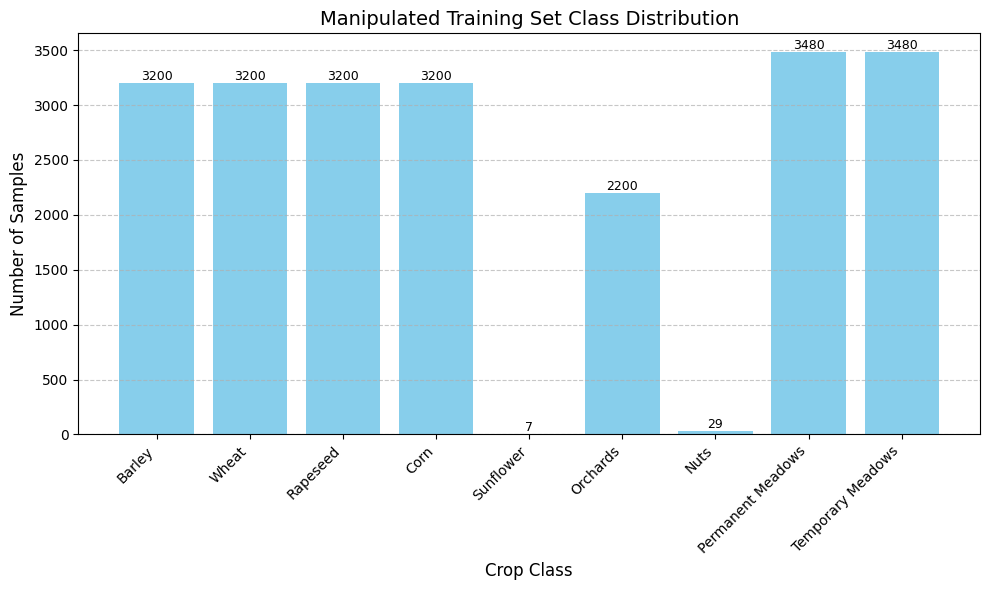

In [ ]:
import matplotlib.pyplot as plt

# Define classes in the desired order
class_labels = [
    "Barley", "Wheat", "Rapeseed", "Corn",
    "Sunflower", "Orchards", "Nuts",
    "Permanent Meadows", "Temporary Meadows"
]

# Corresponding counts in the same order
counts = [3200, 3200, 3200, 3200, 7, 2200, 29, 3480, 3480]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(class_labels, counts, color='skyblue')

plt.title('Manipulated Training Set Class Distribution', fontsize=14)
plt.xlabel('Crop Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top of bars
for j, count in enumerate(counts):
    if count > 0:
        plt.text(j, count, str(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
